| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github for more information:  https://github.com/edgi-govdata-archiving/
#### The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

## How to Run this Notebook
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# Analysis of the Climate and Economic Justice Screening Tool

The Biden-Harris administration has long championed a "Justice40" approach to spending climate/environment investments. In early 2021, Biden signed Executive Order XXXXXXX that called on government agencies to prioritize investments in disadvantaged communities. To aid in this effort, the White House Environmental Justiece Advisory Council met to recommend items to be considered in determining what counts as a "disadvatnaged community" (May 2021 final reccommendations report). In February 2022, the Council on Environmental Quality (CEQ) released its draft analysis for the tool, drawing on similar approaches taken by EPA in its EJScreen tool and California's CalEnviroScren (see Github repo for the tool here: XXXXXX).

Here's how the tool works to select "disadvantaged" communities and prioritize them for federal investments. A variety of demographic and environmental indicators were gathered from sources such as the EPA and the Census. These indicators include climate risks (to agriculture), exposure to pollution from traffic, and community-level educational attainment figures. These indicators are assesed at the census tract level, a fairly coarse geographic unit - census tracts comprise block groups, which in turn comprise blocks, the smallest census unit. A tract is identified as disadvantaged if it scores at the 65th percentile or greater on at least three environmental indicators, and at the 80th precentile or greater on one or more demographic indicators. In other words, for each indicator, each census tract is ranked against all others. If it has, for instance, a higher level of wastewater discharge than 65% of all other tracts, then it could qualify as "disdavantaged" (depending on if it met the demographic thresholds). 

In this data science notebook, EDGI's Environmental Enforcement Watch (EEW) presents an analysis of the draft tool, in support of our public comment on it. We believe Justice40 is an important opportunity to address the ongoing legacies of environmental racism. Although the tool does not explicitly consider race, we find (as have others) that it does disproportaiontely identify racialized communities as disadvantaged. 

However, EDGI takes concern with three aspects of the CEJST:
- the tool has no direct indicators of industry compliance with environmental protection laws like the Clean Air Act, nor any measures of state and federal enforcement of these laws. These are fundamental aspects of environmental racism, and hence must be addressed for environmental justice. It is well known that industries act with greater impunity in "disadvantaged" communities that lack political clout (CITE). It is also well known that government agencies at all levels have tended to direct enforcement actions such as penalties and written notices to facilities in wealthier, whiter neighborhoods (CITE). If we are serious about addressing what *causes* higher rates of toxic exposures, climate risks, etc. then we must highlight some of their roots in limited enforcement and compliance. USEPA provides this data (however, here, we have also shown that there are major gaps in EPA's records). A community that has particularly high exposures or risks while also not being served by government seems like a priority for investment and action.
- the tool overemphasizes communities (really, census tracts). It is important to direct federal spending to these communities in just ways. But beyond redressing harm, we must seek to highlight not just communities but structural causes, industries, sectors, driving the problem in the first place. We suggest ways of utilizing USEPA to do this.
- finally, while we are skeptical of an approach reliant on prioritization (of 'scarce' monies that are only artifiically scarce), for very practical purposes we suggest ways CEQ could "prioritize the priorities" so that the most marginalized communities remain in the sights and that Justice40 doesn't get watered down: https://www.eenews.net/articles/congress-earmarks-climate-grants-for-rich-white-areas/

In the analysis that follows, we show how the tool could be adjusted to:
- incorproate indicators of industry compliance and EPA enforcement
- highlight systemic factors *causing* environmental inequalities, instead of *just* redressing harms
- prioritize the priorities

## 1. Get started

In [1]:
# Here we import some extra sources of Python code to help with the analysis
import pandas
import urllib
import numpy
print("Done!")

Done!


In [2]:
# Parameters for graphing results later on
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8, 5]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
# In a separate analysis, available here: https://colab.research.google.com/github/edgi-govdata-archiving/CEJST_Analysis/blob/main/CEJST_prep.ipynb
# we accessed archives of EPA ECHO data through our mirrored copy of it at the Stony Brook University.
# We processed ECHO's historical recorcds to summarize total CWA, CAA, and RCRA violations and inspections per Census tract
# since 2001. We also calculated the violations per facility and inspections per facility in each tract.
echo_data = pandas.read_csv("https://github.com/edgi-govdata-archiving/CEJST_Analysis/raw/main/echo_data.csv", dtype={"FAC_DERIVED_CB2010": str}) # Switch to loading from Github repo # Load as strings to preserve Census tract numbering
echo_data.set_index("FAC_DERIVED_CB2010", inplace=True)
echo_data

CWA Violations  CAA Violations  RCRA Violations  \
FAC_DERIVED_CB2010                                                    
01001020700                   21.0             0.0              5.0   
01001020801                    1.0             0.0              0.0   
01001021000                    2.0             0.0              0.0   
01003010300                   11.0             0.0             16.0   
01003010500                   51.0             0.0             12.0   
...                            ...             ...              ...   
72151950600                    0.0             0.0              0.0   
72151951000                  569.0             0.0              0.0   
72151951300                  183.0             0.0              0.0   
72153750300                    0.0             1.0              3.0   
72153750601                 1274.0             0.0              0.0   

                    SDWA Violations  CWA Inspections  CAA Inspections  \
FAC_DERIVED_CB2010                                                      
01001020700                     0.0             29.0             31.0   
01001020801                     0.0             32.0             89.0   
01001021000                     0.0              8.0             82.0   
01003010300                     0.0             11.0              0.0   
01003010500                     0.0             37.0             18.0   
...                             ...              ...              ...   
72151950600                     0.0              0.0              8.0   
72151951000                     0.0             36.0              0.0   
72151951300                     1.0             17.0             84.0   
72153750300                     0.0              0.0             18.0   
72153750601                     0.0             34.0              0.0   

                    RCRA Inspections  SDWA Inspections  Facilities  \
FAC_DERIVED_CB2010                                                   
01001020700                      5.0               0.0           2   
01001020801                      1.0              11.0           2   
01001021000                      0.0               0.0           1   
01003010300                     37.0               0.0           1   
01003010500                     39.0               0.0           2   
...                              ...               ...         ...   
72151950600                      0.0               0.0           2   
72151951000                      0.0               0.0           1   
72151951300                      0.0               0.0           1   
72153750300                     17.0               0.0           1   
72153750601                      0.0               0.0           1   

                                                      FAC_NAICS_CODES  \
FAC_DERIVED_CB2010                                                      
01001020700                               326112 323111 326111 221320   
01001020801         221112 22111 322130 325194 32519 322121 325191...   
01001021000                                             221112 237990   
01003010300                                                    325199   
01003010500                                                nan 321114   
...                                                               ...   
72151950600                                             311311 324191   
72151951000                                                     22132   
72151951300            324110 81112 32411 324191 424710 493110 492210   
72153750300                               333999 339999 325221 325220   
72153750601                                                     22132   

                    Total Violations Since 2001  \
FAC_DERIVED_CB2010                                
01001020700                                26.0   
01001020801                                 1.0   
01001021000                                 2.0   
01003010300                   

## Bring in CEJST's draft data
Here, we access the CEJST's calculations in order to add our own analysis of government enforcement (inspections) and compliance (quarters in non-compliance) trends.

In [4]:
# Load CEJST data
# Available at https://d3jqyw10j8e7p9.cloudfront.net/data-pipeline/data/score/downloadable/Screening_Tool_Data.zip

import requests, zipfile, io, json

# Load and unzip the data files
url = "https://d3jqyw10j8e7p9.cloudfront.net/data-pipeline/data/score/downloadable/Screening_Tool_Data.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

# Add in the CSV spreadsheet
cejst = pandas.read_csv("/content/communities-2022-03-30-0033GMT.csv", dtype={"Census tract ID": str}) # Looks like this filename may change with each download! # We need to load the data as "strings" to avoid 0-leading Census tract IDs from being rendered incorrectly as 1-leading integers.
cejst.set_index("Census tract ID", inplace=True)
cejst

County Name State/Territory  \
Census tract ID                                   
01001020100      Autauga County         Alabama   
01001020200      Autauga County         Alabama   
01001020300      Autauga County         Alabama   
01001020400      Autauga County         Alabama   
01001020500      Autauga County         Alabama   
...                         ...             ...   
78030960900                 NaN  Virgin Islands   
78030961000                 NaN  Virgin Islands   
78030961100                 NaN  Virgin Islands   
78030961200                 NaN  Virgin Islands   
78030990000                 NaN  Virgin Islands   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01001020100                                      0                          0   
01001020200                                      0                          0   
01001020300                                      0                          0   
01001020400                                      0                          0   
01001020500                                      0                          0   
...                                            ...                        ...   
78030960900                                      0                          0   
78030961000                                      0                          0   
78030961100                                      0                          0   
78030961200                                      1                          1   
78030990000                                      0                          0   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01001020100                            False            1923.0   
01001020200                            False            2028.0   
01001020300                            False            3476.0   
01001020400                            False            3831.0   
01001020500                            False            9883.0   
...                                      ...               ...   
78030960900                            False               NaN   
78030961000                            False               NaN   
78030961100                            False               NaN   
78030961200                             True               NaN   
78030990000                            False               NaN   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01001020100                                                  False            
01001020200                                                   True            
01001020300                                                  False            
01001020400                                                  False            
01001020500                                                  False            
...                                                            ...            
78030960900                                                  False            
78030961000                                                  False            
78030961100                                                  False            
78030961200                                                  False            
78030990000                                                  False            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01001020100                                                  False                           

In [5]:
# We join the ECHO data to the CEJST data
# Again, the output will be a preview (first and last 5 rows) of the new data.
# You may notice some NaNs in the new columns that were added to the CEJST data, and this is likely because that Census tract has no facilities information in ECHO.
joined = cejst.join(echo_data)
joined[~joined["Violations Per Facility Since 2001"].isna()] # Instead, we can preview the tracts that do have information

County Name State/Territory  \
Census tract ID                                      
01001020700         Autauga County         Alabama   
01001020801         Autauga County         Alabama   
01001021000         Autauga County         Alabama   
01003010300         Baldwin County         Alabama   
01003010500         Baldwin County         Alabama   
...                            ...             ...   
72151950600      Yabucoa Municipio     Puerto Rico   
72151951000      Yabucoa Municipio     Puerto Rico   
72151951300      Yabucoa Municipio     Puerto Rico   
72153750300        Yauco Municipio     Puerto Rico   
72153750601        Yauco Municipio     Puerto Rico   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01001020700                                      0                          0   
01001020801                                      0                          0   
01001021000                                      0                          0   
01003010300                                      0                          0   
01003010500                                      0                          0   
...                                            ...                        ...   
72151950600                                      2                          1   
72151951000                                      3                          3   
72151951300                                      3                          1   
72153750300                                      2                          1   
72153750601                                      3                          1   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01001020700                            False            4029.0   
01001020801                            False            2826.0   
01001021000                            False            2550.0   
01003010300                            False            9413.0   
01003010500                            False            5444.0   
...                                      ...               ...   
72151950600                             True            5605.0   
72151951000                             True            2833.0   
72151951300                             True            5204.0   
72153750300                             True            3960.0   
72153750601                             True            4107.0   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01001020700                                                   True            
01001020801                                                  False            
01001021000                                                   True            
01003010300                                                  False            
01003010500                                                  False            
...                                                            ...            
72151950600                                                   True            
72151951000                                                   True            
72151951300                                                   True            
72153750300                                                   True            
72153750601                                                   True            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01001020700                                              

In [6]:
# Now we have the CEJST data, ECHO enforcement/compliance info from EPA, and we're going to add additional Census data on race
# CEJST does not include race information, but much research has shown how important it is to describe environmental inequality.
# We will test how CEJST performs in terms of race - whether it directs monies to communities we know have borne the brunt of environmental hazards.
# We have to manually download/upload the data for this, since existing tools like the Census API can't deliver Census tract info for the entire US
census = pandas.read_csv("https://github.com/edgi-govdata-archiving/CEJST_Analysis/raw/main/DECENNIALSF12010.P5_data_with_overlays_2022-03-30T170415.csv") # Original source: https://data.census.gov/cedsci/table?q=United%20States&t=Race%20and%20Ethnicity&g=0100000US%241400000&y=2010&d=DEC%20Summary%20File%201&tid=DECENNIALSF12010.P5
census = census.drop([0]) # Remove column descriptors
census = census.drop([census.shape[0]]) # Remove last summmary row #census.iloc[74002,]
census["GEO_ID"] = census["GEO_ID"].str.slice(9, 20) # Translate the GEO_ID into the Census tract ID
census = census[["GEO_ID", "P005003"]] # Select the "non-hispanic white population" measure. From this we will calculate the % nonwhite in each tract
census.set_index("GEO_ID", inplace=True)

joined = joined.join(census)
joined["PCT_WHITE"] = (joined["P005003"].astype(numpy.float).astype('Int64')/joined["Total population"].astype(numpy.float).astype('Int64'))*100 # Percent White calculation
joined

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


County Name State/Territory  \
Census tract ID                                   
01001020100      Autauga County         Alabama   
01001020200      Autauga County         Alabama   
01001020300      Autauga County         Alabama   
01001020400      Autauga County         Alabama   
01001020500      Autauga County         Alabama   
...                         ...             ...   
78030960900                 NaN  Virgin Islands   
78030961000                 NaN  Virgin Islands   
78030961100                 NaN  Virgin Islands   
78030961200                 NaN  Virgin Islands   
78030990000                 NaN  Virgin Islands   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01001020100                                      0                          0   
01001020200                                      0                          0   
01001020300                                      0                          0   
01001020400                                      0                          0   
01001020500                                      0                          0   
...                                            ...                        ...   
78030960900                                      0                          0   
78030961000                                      0                          0   
78030961100                                      0                          0   
78030961200                                      1                          1   
78030990000                                      0                          0   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01001020100                            False            1923.0   
01001020200                            False            2028.0   
01001020300                            False            3476.0   
01001020400                            False            3831.0   
01001020500                            False            9883.0   
...                                      ...               ...   
78030960900                            False               NaN   
78030961000                            False               NaN   
78030961100                            False               NaN   
78030961200                             True               NaN   
78030990000                            False               NaN   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01001020100                                                  False            
01001020200                                                   True            
01001020300                                                  False            
01001020400                                                  False            
01001020500                                                  False            
...                                                            ...            
78030960900                                                  False            
78030961000                                                  False            
78030961100                                                  False            
78030961200                                                  False            
78030990000                                                  False            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01001020100                                                  False                           

In [7]:
# Some basic diagnostics
#joined[joined['Violations Per Facility Since 2001'].isna()] #59973 tracts without violations
#joined[joined['Inspections Per Facility Since 2001'].isna()] #59973 tracts without inspections
#joined[joined['Facilities'].isna()] #59973 tracts without major facilities
joined[joined['Facilities']>0] #14161 tracts with major facilities

County Name State/Territory  \
Census tract ID                                      
01001020700         Autauga County         Alabama   
01001020801         Autauga County         Alabama   
01001021000         Autauga County         Alabama   
01003010300         Baldwin County         Alabama   
01003010500         Baldwin County         Alabama   
...                            ...             ...   
72151950600      Yabucoa Municipio     Puerto Rico   
72151951000      Yabucoa Municipio     Puerto Rico   
72151951300      Yabucoa Municipio     Puerto Rico   
72153750300        Yauco Municipio     Puerto Rico   
72153750601        Yauco Municipio     Puerto Rico   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01001020700                                      0                          0   
01001020801                                      0                          0   
01001021000                                      0                          0   
01003010300                                      0                          0   
01003010500                                      0                          0   
...                                            ...                        ...   
72151950600                                      2                          1   
72151951000                                      3                          3   
72151951300                                      3                          1   
72153750300                                      2                          1   
72153750601                                      3                          1   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01001020700                            False            4029.0   
01001020801                            False            2826.0   
01001021000                            False            2550.0   
01003010300                            False            9413.0   
01003010500                            False            5444.0   
...                                      ...               ...   
72151950600                             True            5605.0   
72151951000                             True            2833.0   
72151951300                             True            5204.0   
72153750300                             True            3960.0   
72153750601                             True            4107.0   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01001020700                                                   True            
01001020801                                                  False            
01001021000                                                   True            
01003010300                                                  False            
01003010500                                                  False            
...                                                            ...            
72151950600                                                   True            
72151951000                                                   True            
72151951300                                                   True            
72153750300                                                   True            
72153750601                                                   True            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01001020700                                              

In [8]:
# We will create "scores" - percentage ranks to be specific - for our enforcement and compliance indicators.
# Just like CEJST, we will assign each Census tract percentage ranks. 
# We will do so for "inspections per facility in this tract since 2001" 
# and "violations per facility in this tract since 2001"

# Calculate the scores
joined['Violations_PR'] = joined["Violations Per Facility Since 2001"].rank(pct = True)
joined['Inspections_PR'] = joined["Inspections Per Facility Since 2001"].rank(pct = True)
joined[~joined["Inspections_PR"].isna()] # Show only tracts withs cores

County Name State/Territory  \
Census tract ID                                      
01001020700         Autauga County         Alabama   
01001020801         Autauga County         Alabama   
01001021000         Autauga County         Alabama   
01003010300         Baldwin County         Alabama   
01003010500         Baldwin County         Alabama   
...                            ...             ...   
72151950600      Yabucoa Municipio     Puerto Rico   
72151951000      Yabucoa Municipio     Puerto Rico   
72151951300      Yabucoa Municipio     Puerto Rico   
72153750300        Yauco Municipio     Puerto Rico   
72153750601        Yauco Municipio     Puerto Rico   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01001020700                                      0                          0   
01001020801                                      0                          0   
01001021000                                      0                          0   
01003010300                                      0                          0   
01003010500                                      0                          0   
...                                            ...                        ...   
72151950600                                      2                          1   
72151951000                                      3                          3   
72151951300                                      3                          1   
72153750300                                      2                          1   
72153750601                                      3                          1   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01001020700                            False            4029.0   
01001020801                            False            2826.0   
01001021000                            False            2550.0   
01003010300                            False            9413.0   
01003010500                            False            5444.0   
...                                      ...               ...   
72151950600                             True            5605.0   
72151951000                             True            2833.0   
72151951300                             True            5204.0   
72153750300                             True            3960.0   
72153750601                             True            4107.0   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01001020700                                                   True            
01001020801                                                  False            
01001021000                                                   True            
01003010300                                                  False            
01003010500                                                  False            
...                                                            ...            
72151950600                                                   True            
72151951000                                                   True            
72151951300                                                   True            
72153750300                                                   True            
72153750601                                                   True            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01001020700                                              

## 1. *Expand* CJEST's existing list based on enforcement/compliance metrics

In [9]:
# Generally, here's how CEJST currently selects "disadvantaged" areas":
# Percent higher ed enrollment rate is less than 20% *AND* a significance share of the population qualifies as low income (65th percentile nationally)
# AND the tract scores higher than the 90th percentile in at least one environmental indicator (wastewater discharge, traffic pollution, expected agricultural losses due to climate change)
# There are some exceptions to this (e.g. workforce development). 
# For our purposes, we just use the "Identified as disadvantaged" field to report on what CEJST has already id'd.

# We say an area could be considered "disadvantaged" if it has a higher ed enrollment rate < 20% and significant low income population, 
# AND is in the 90th percentile on either enforcement/compliance measure (high violations per facility since 2001, low inspections per facility since 2001)
not_da = joined.loc[joined['Identified as disadvantaged']==False] # Areas not already id'd as disadvantaged
not_da = not_da.loc[not_da['Is low income and has a low percent of higher ed students?'] == True] # Of those areas, the ones that do meet the socio-economic criteria
potentials = not_da.loc[(not_da["Inspections_PR"] < .1) | (not_da["Violations_PR"] > .9)] # Areas not already id'd as disadvantaged, but our enforcement/compliance index and other factors suggest it could be
potentials

County Name State/Territory  \
Census tract ID                                           
01127020200               Walker County         Alabama   
04013092500             Maricopa County         Arizona   
04015952600               Mohave County         Arizona   
05001480500             Arkansas County        Arkansas   
05007021002               Benton County        Arkansas   
...                                 ...             ...   
53071920200          Walla Walla County      Washington   
54051020900             Marshall County   West Virginia   
56015957900               Goshen County         Wyoming   
72029100503         Canóvanas Municipio     Puerto Rico   
72133953800      Santa Isabel Municipio     Puerto Rico   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01127020200                                      0                          0   
04013092500                                      0                          0   
04015952600                                      0                          0   
05001480500                                      0                          0   
05007021002                                      0                          0   
...                                            ...                        ...   
53071920200                                      0                          0   
54051020900                                      0                          0   
56015957900                                      0                          0   
72029100503                                      0                          0   
72133953800                                      0                          0   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01127020200                            False            4561.0   
04013092500                            False            4915.0   
04015952600                            False            3094.0   
05001480500                            False            3928.0   
05007021002                            False            7492.0   
...                                      ...               ...   
53071920200                            False            4416.0   
54051020900                            False            4853.0   
56015957900                            False            5107.0   
72029100503                            False            6133.0   
72133953800                            False            5298.0   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01127020200                                                   True            
04013092500                                                   True            
04015952600                                                   True            
05001480500                                                   True            
05007021002                                                   True            
...                                                            ...            
53071920200                                                   True            
54051020900                                                   True            
56015957900                                                   True            
72029100503                                                   True            
72133953800                                                   True            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                               

In [10]:
# We describe some aspects of these potential CEJST target tracts
sum = potentials['Total population'].astype(int).sum()
display("Total population in these areas: {:,}".format(sum))

states = potentials.groupby(by="State/Territory")[["State/Territory"]].agg("count")
display("Number of tracts per state/territory: ")
display(states)

'Total population in these areas: 537,584'

'Number of tracts per state/territory: '

State/Territory
State/Territory                 
Alabama                        1
Arizona                        2
Arkansas                       2
California                     3
Connecticut                    1
Florida                        5
Georgia                       15
Hawaii                         1
Idaho                          3
Illinois                       2
Indiana                        2
Iowa                           1
Kentucky                       6
Louisiana                      2
Massachusetts                  1
Michigan                       3
Mississippi                    1
Missouri                       4
New Mexico                     4
New York                       4
North Carolina                 1
Ohio                           6
Oklahoma                       2
Oregon                         2
Pennsylvania                   6
Puerto Rico                    2
Rhode Island                   1
South Carolina                 3
Tennessee                      5
Texas                         12
Utah                           1
Washington                     1
West Virginia                  1
Wyoming                        1

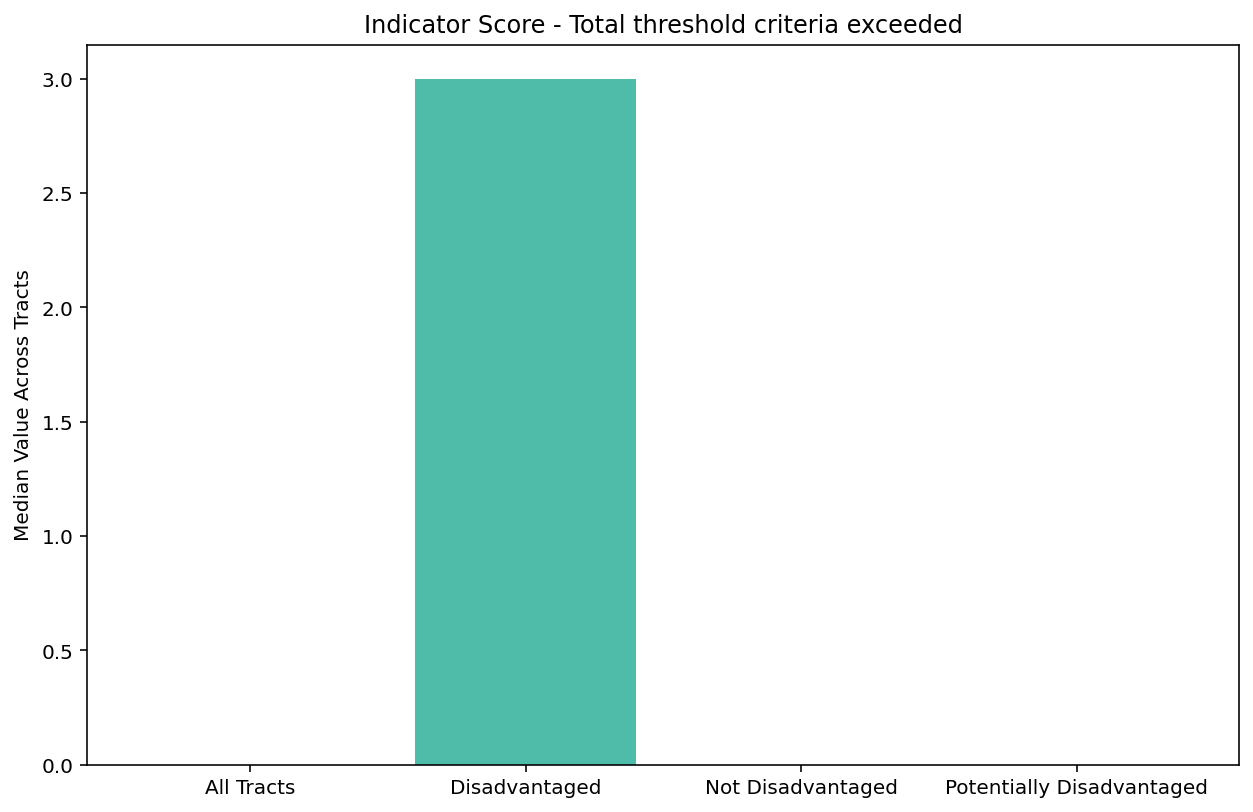

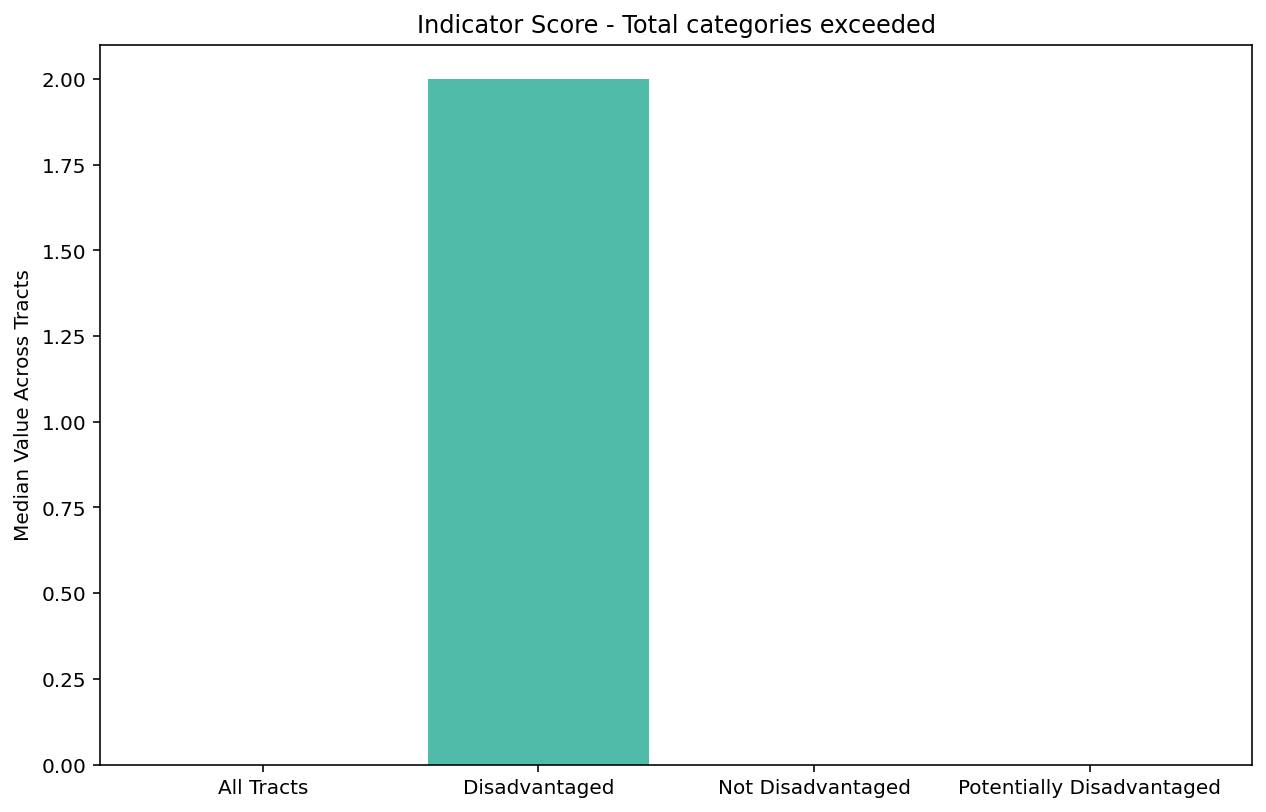

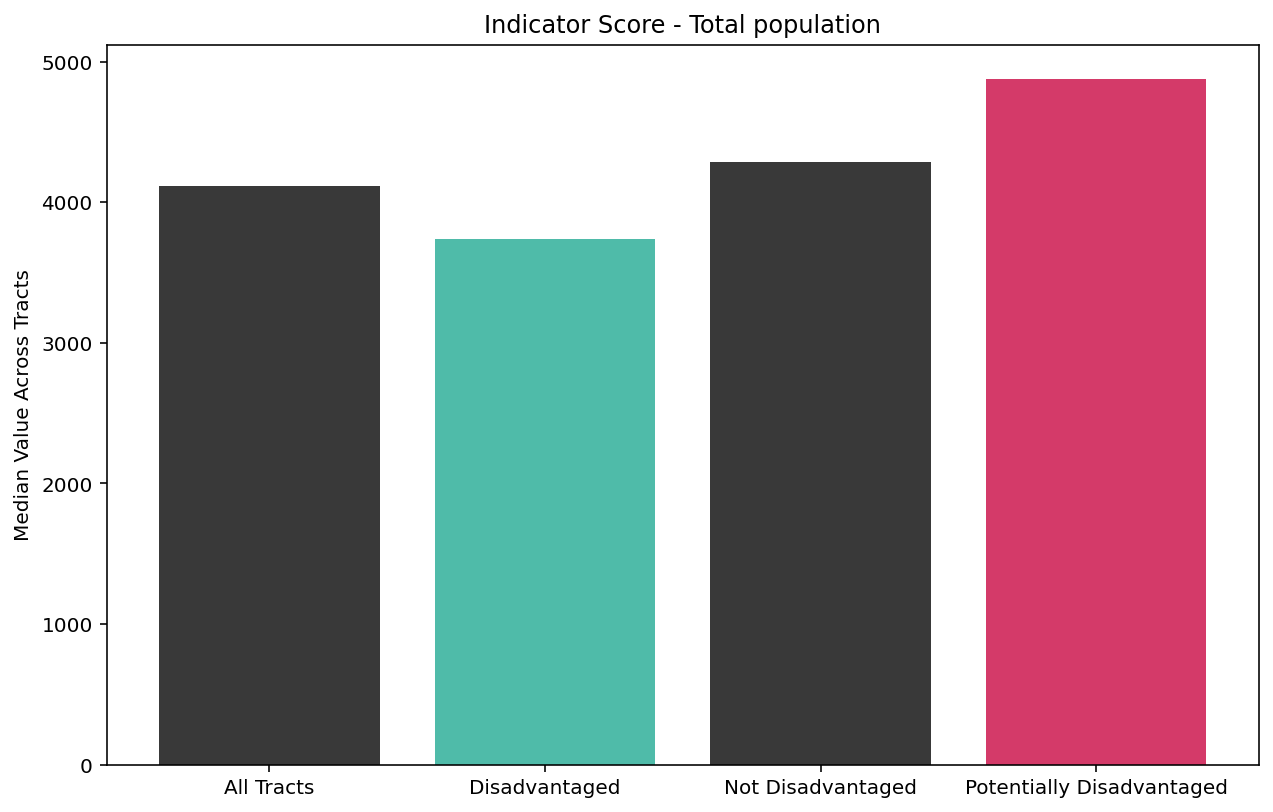

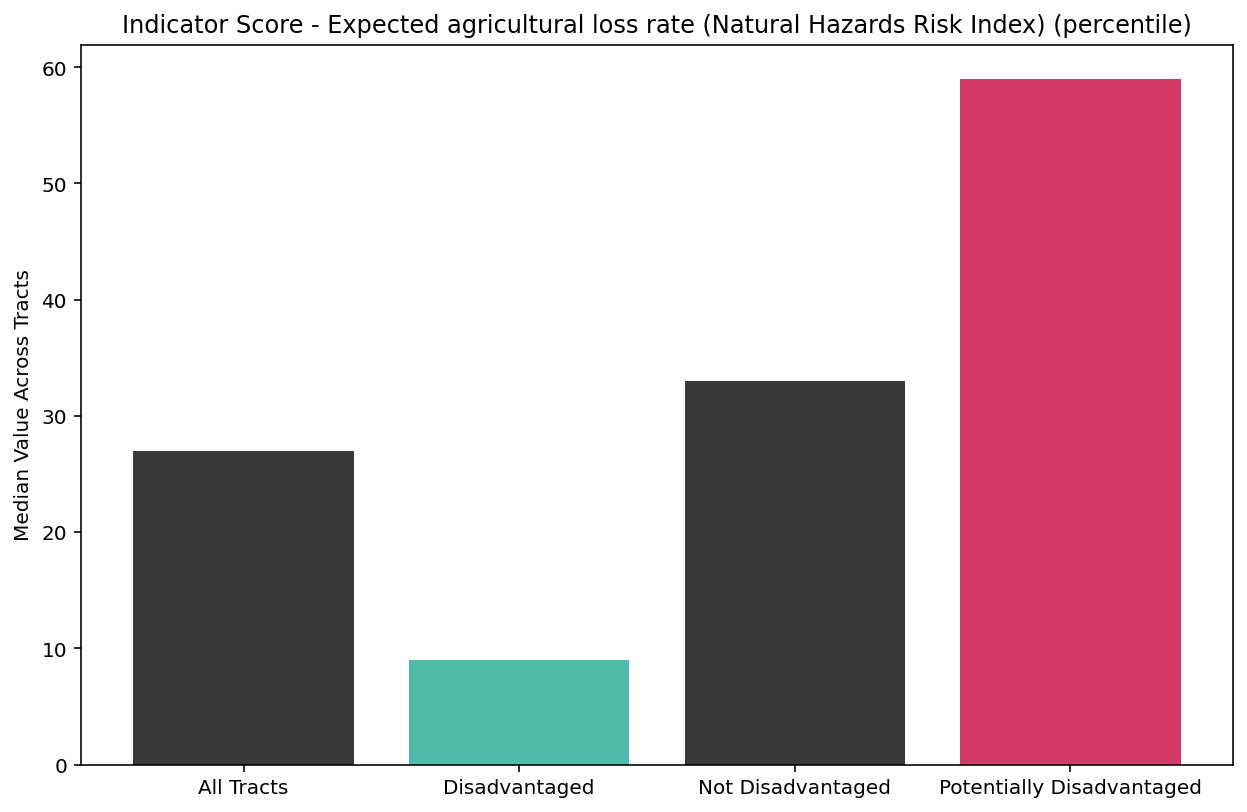

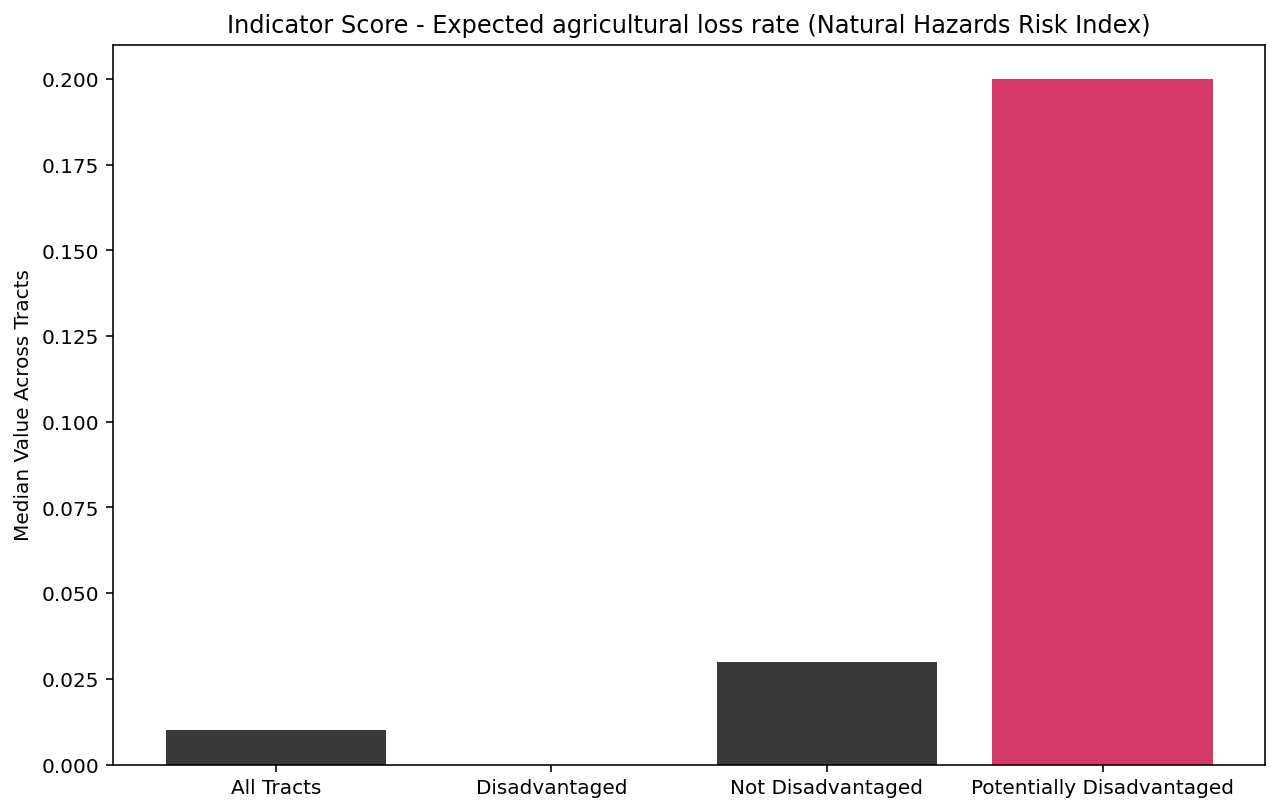

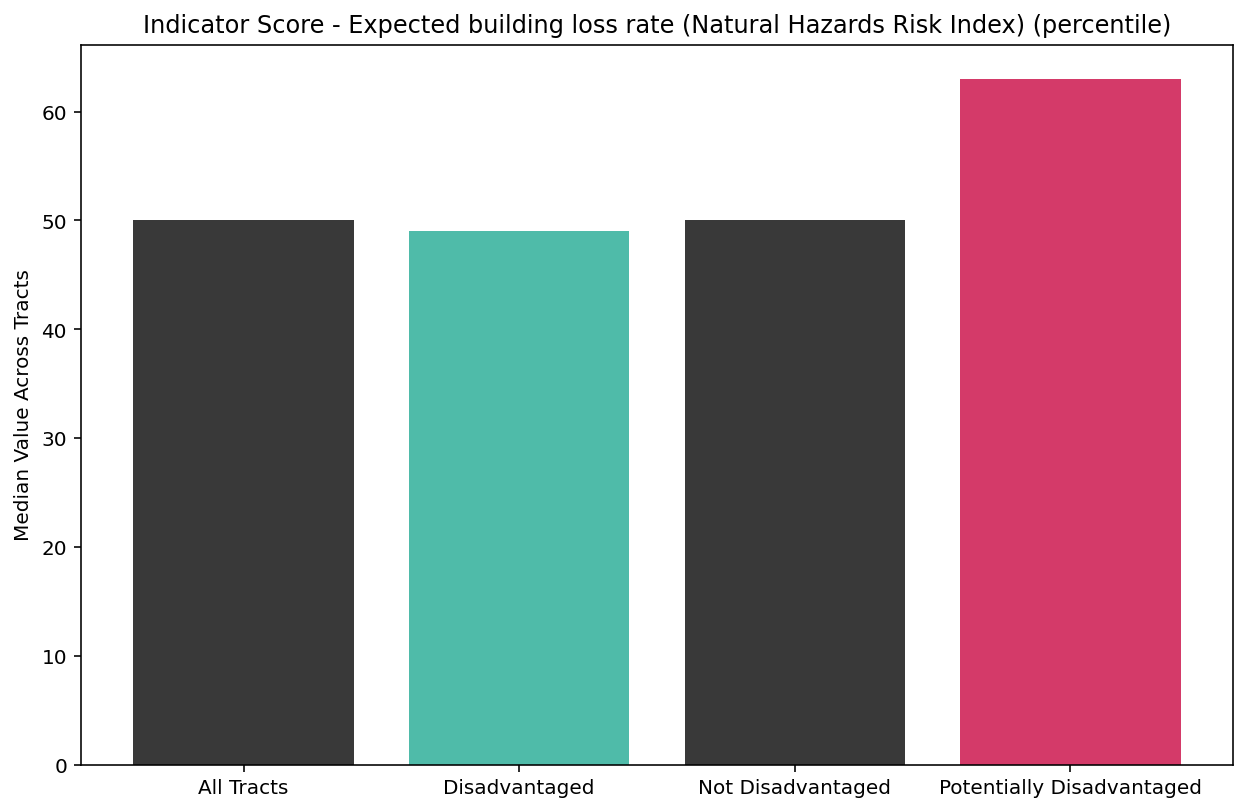

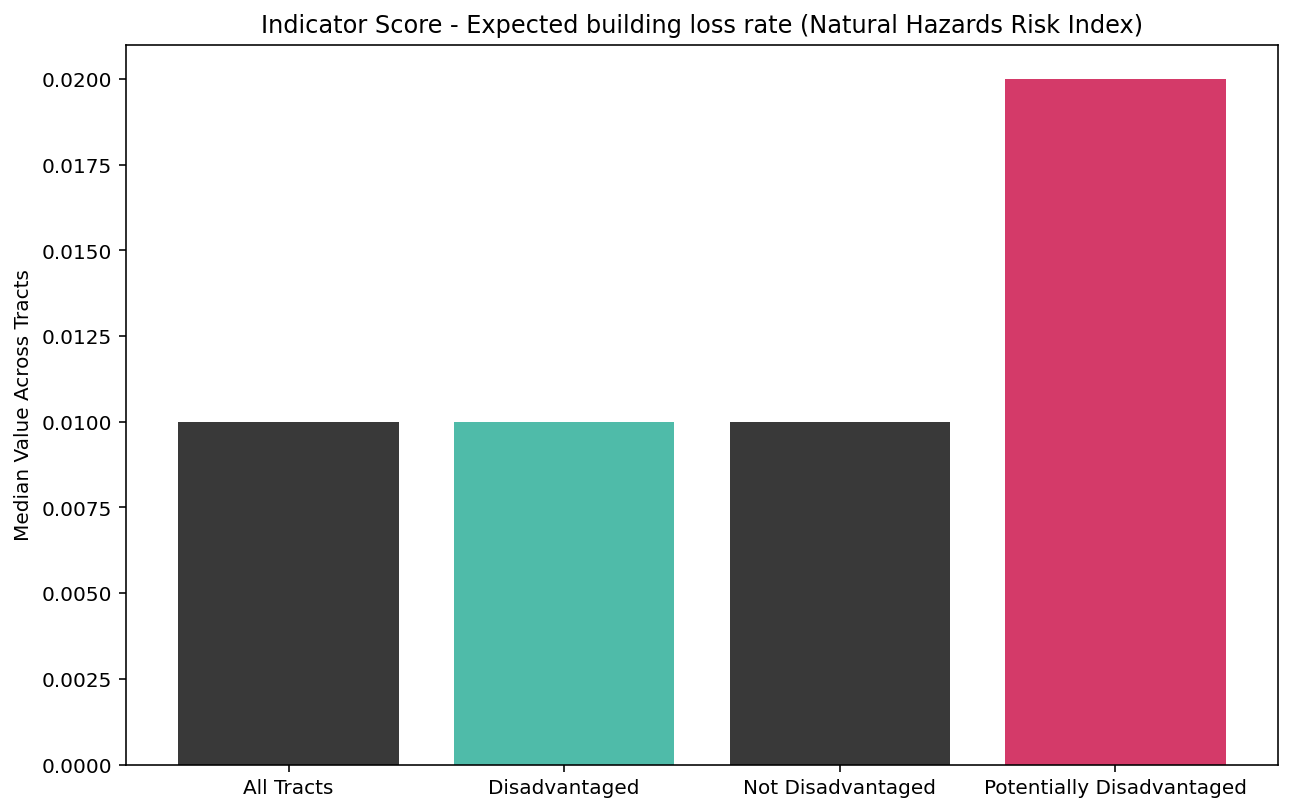

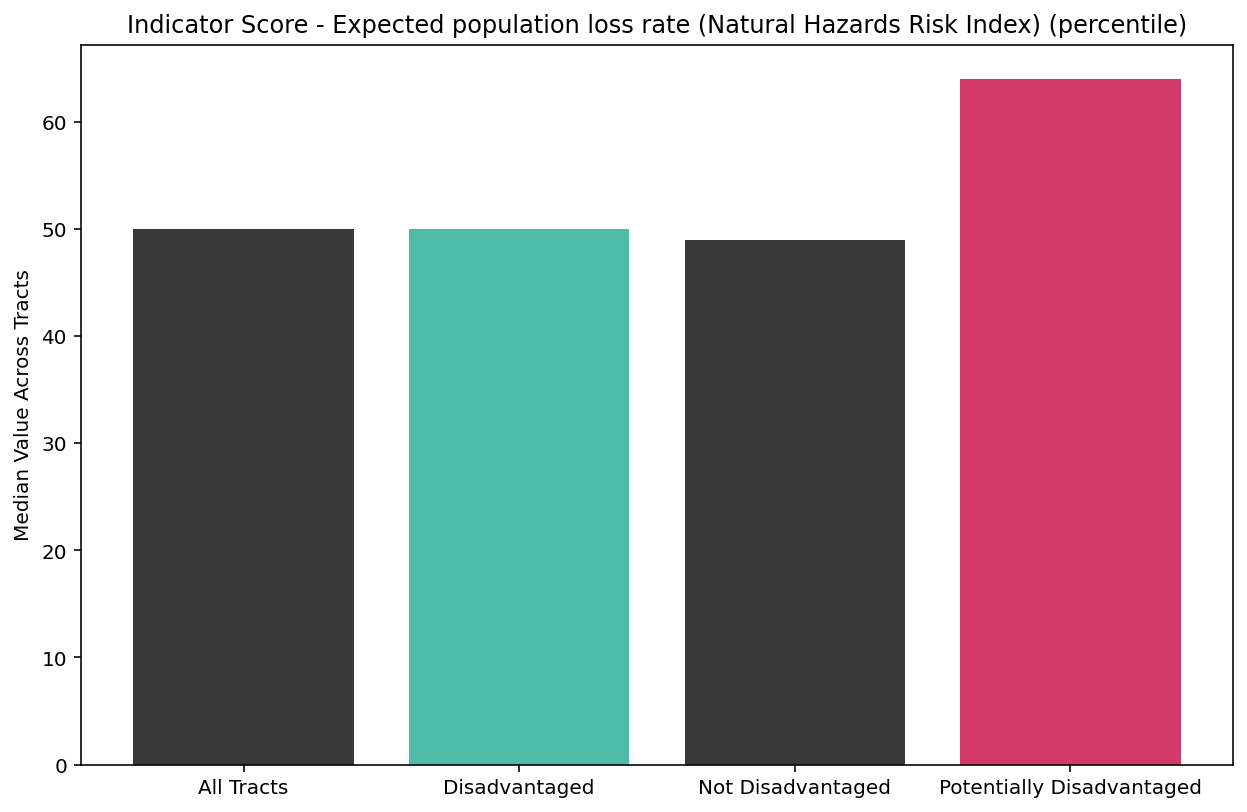

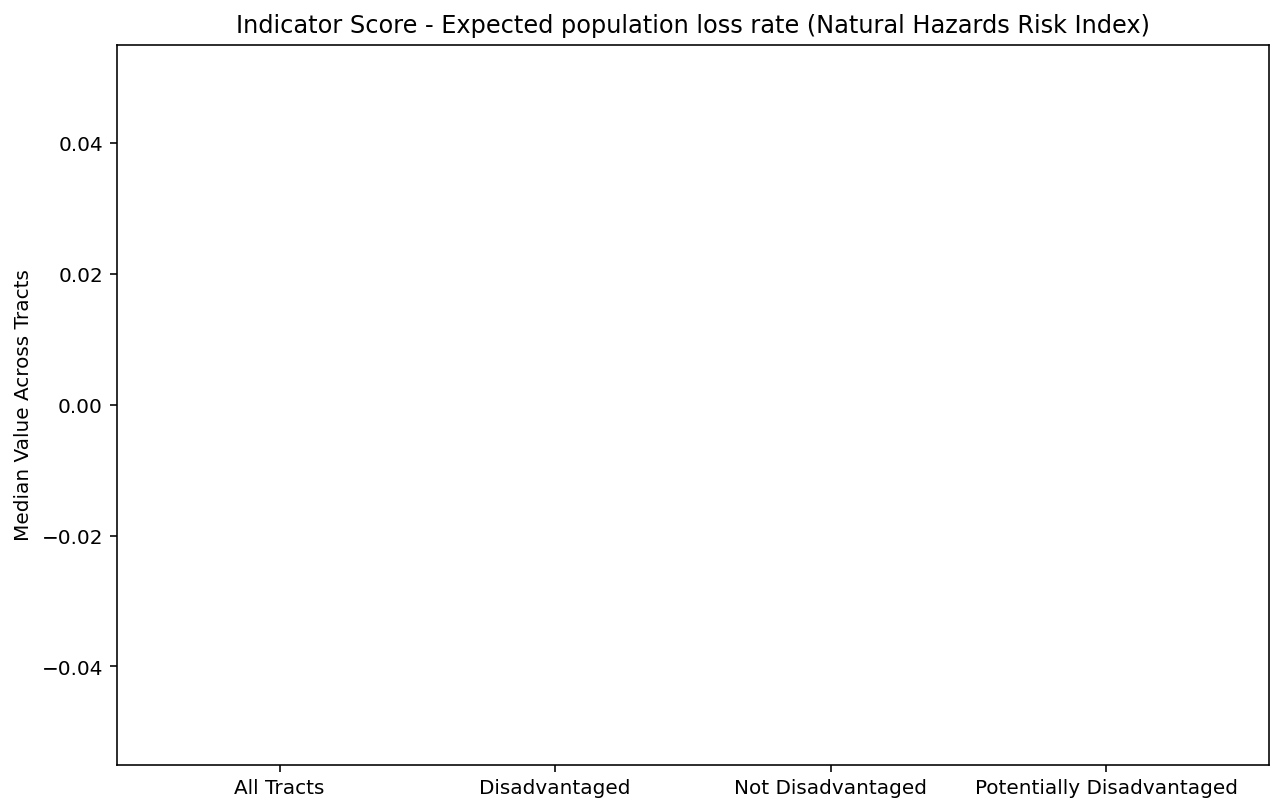

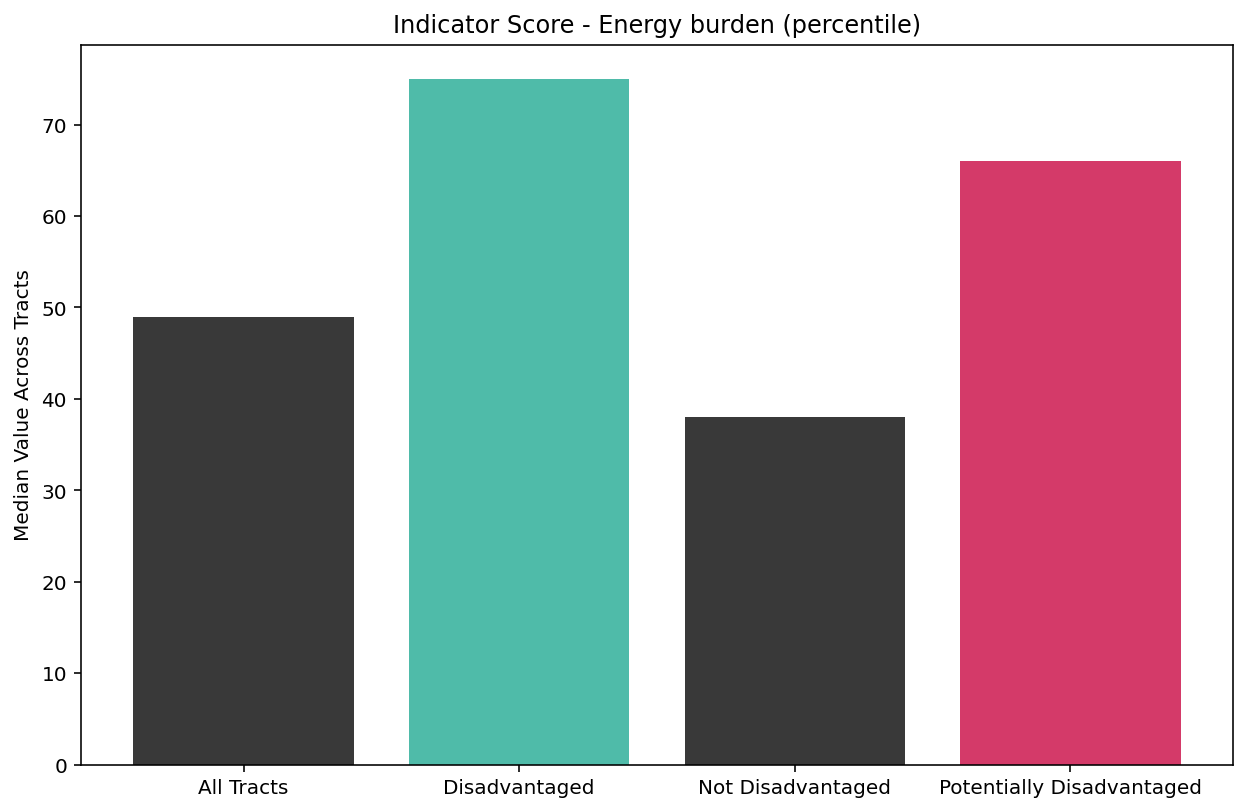

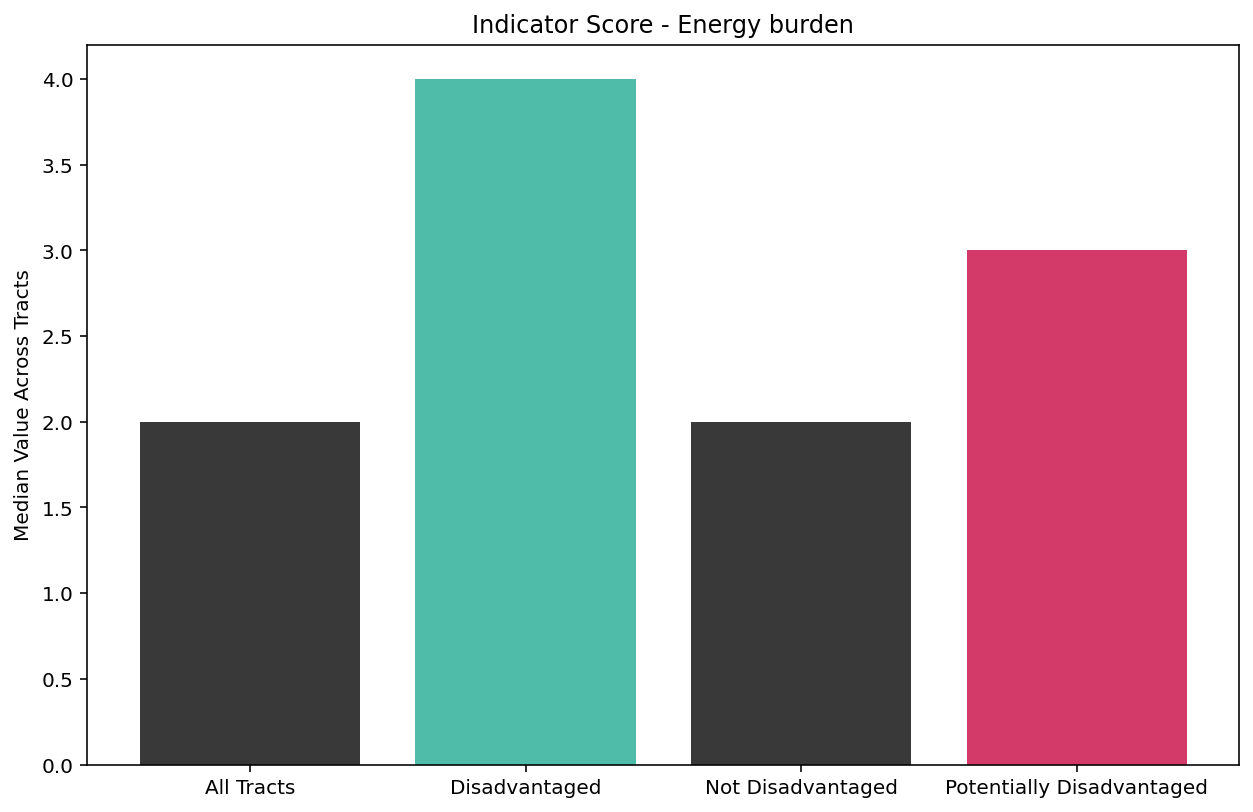

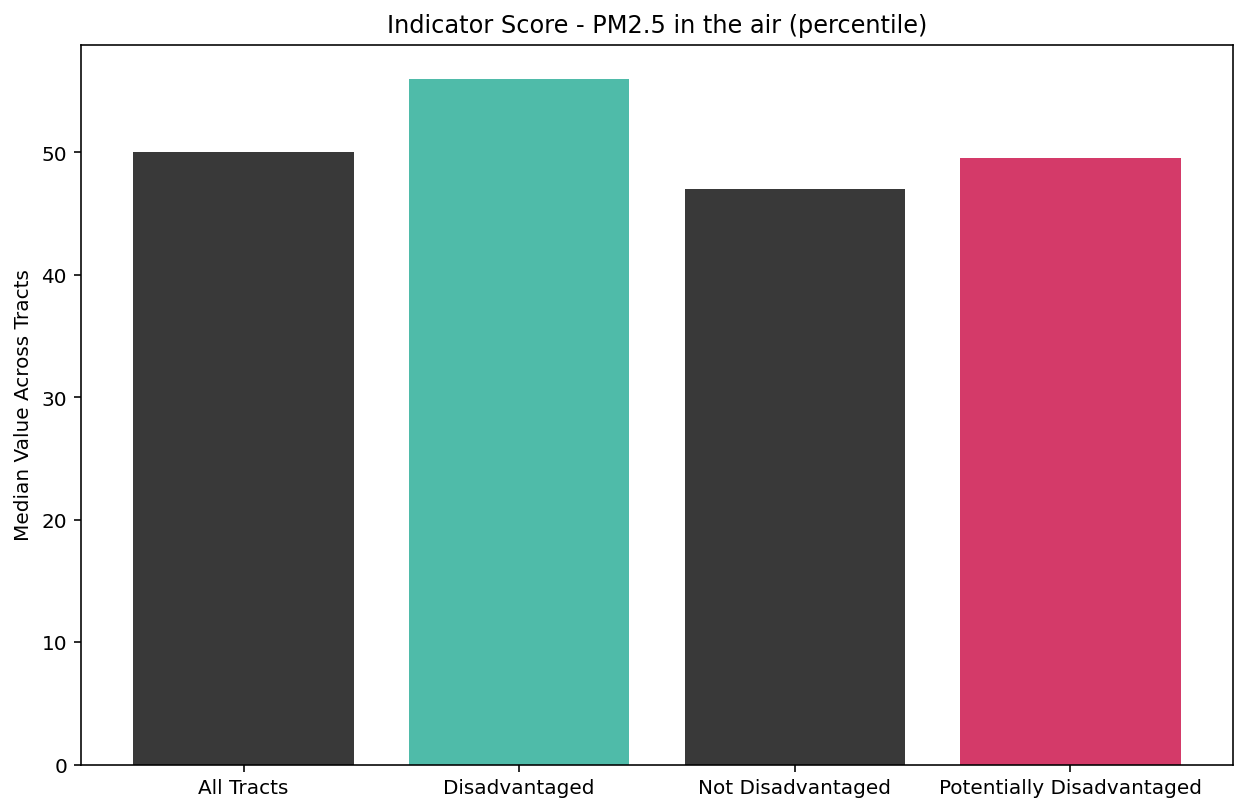

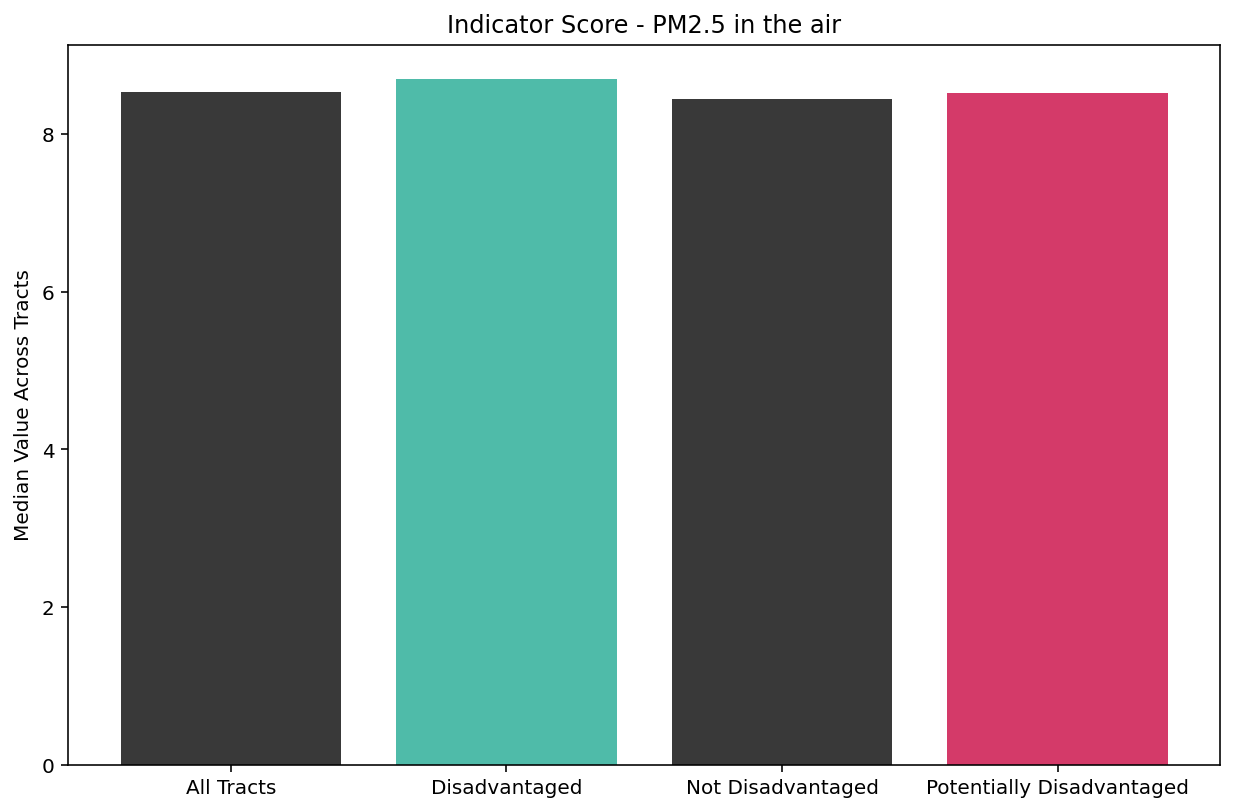

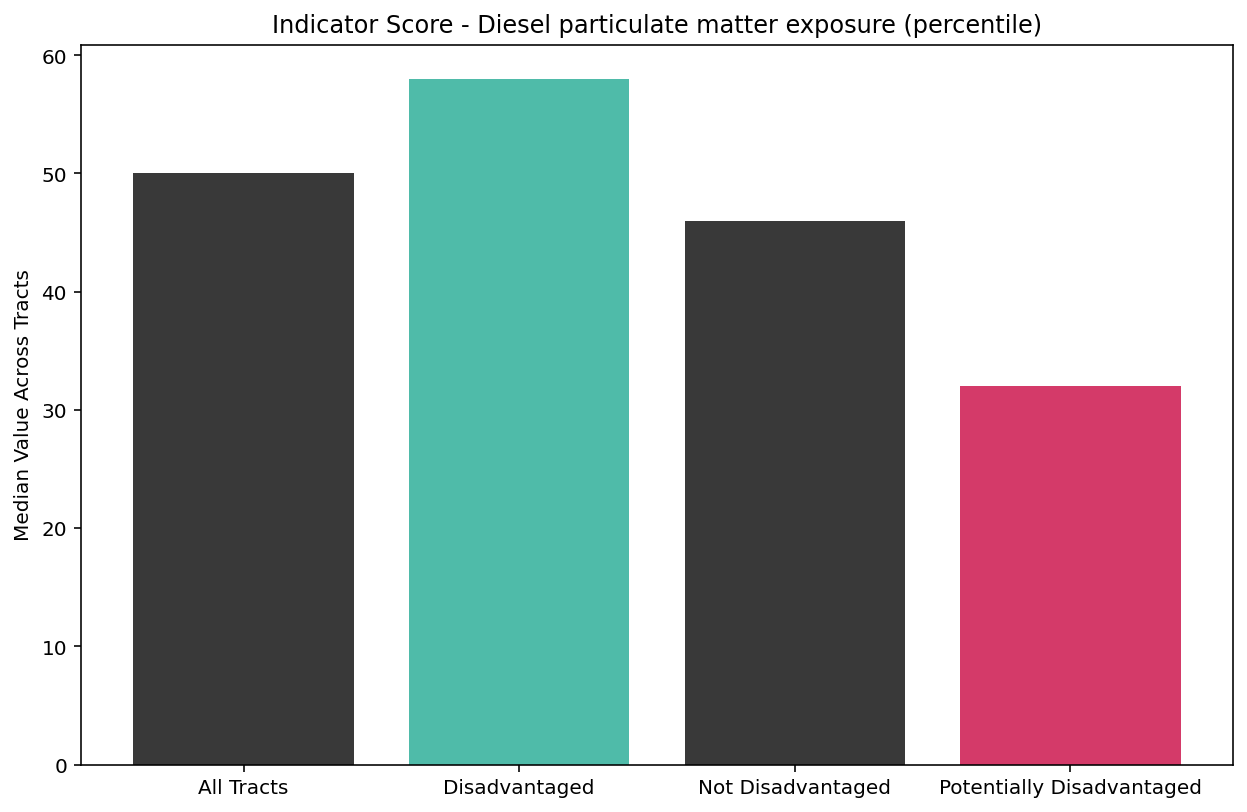

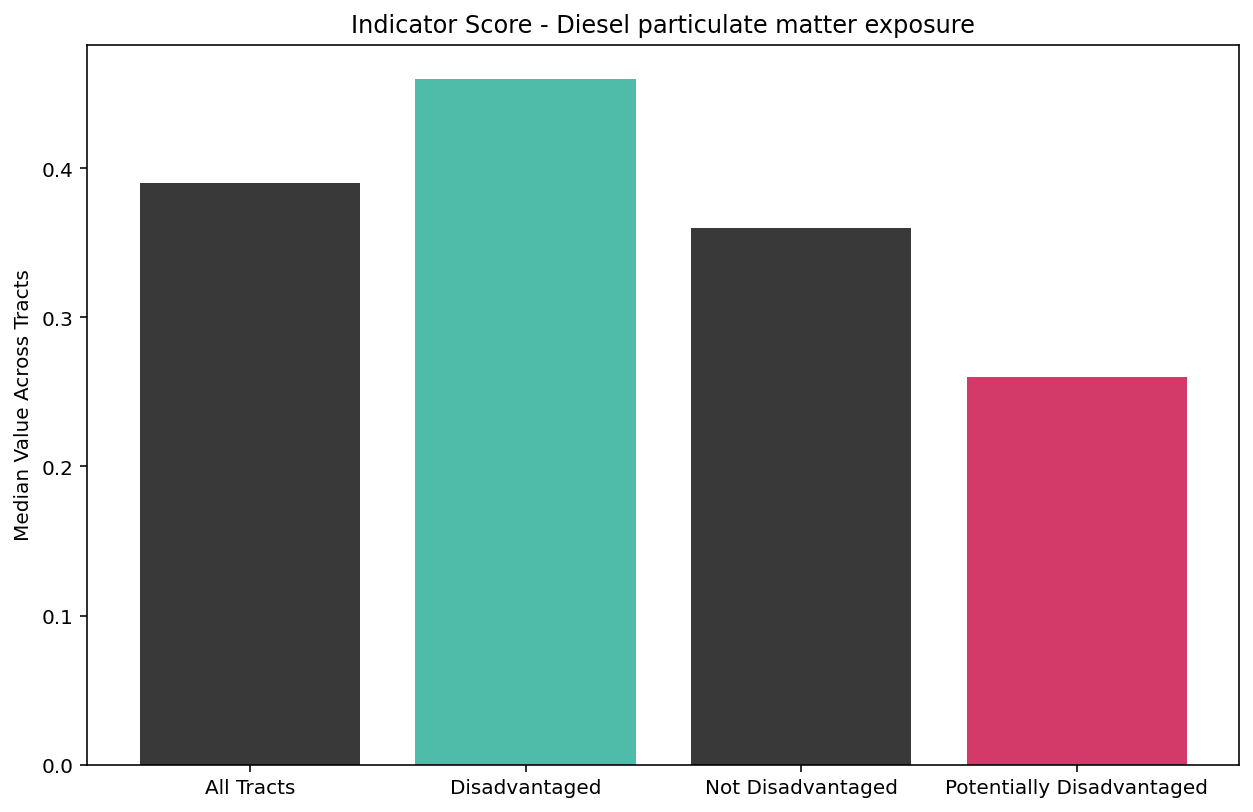

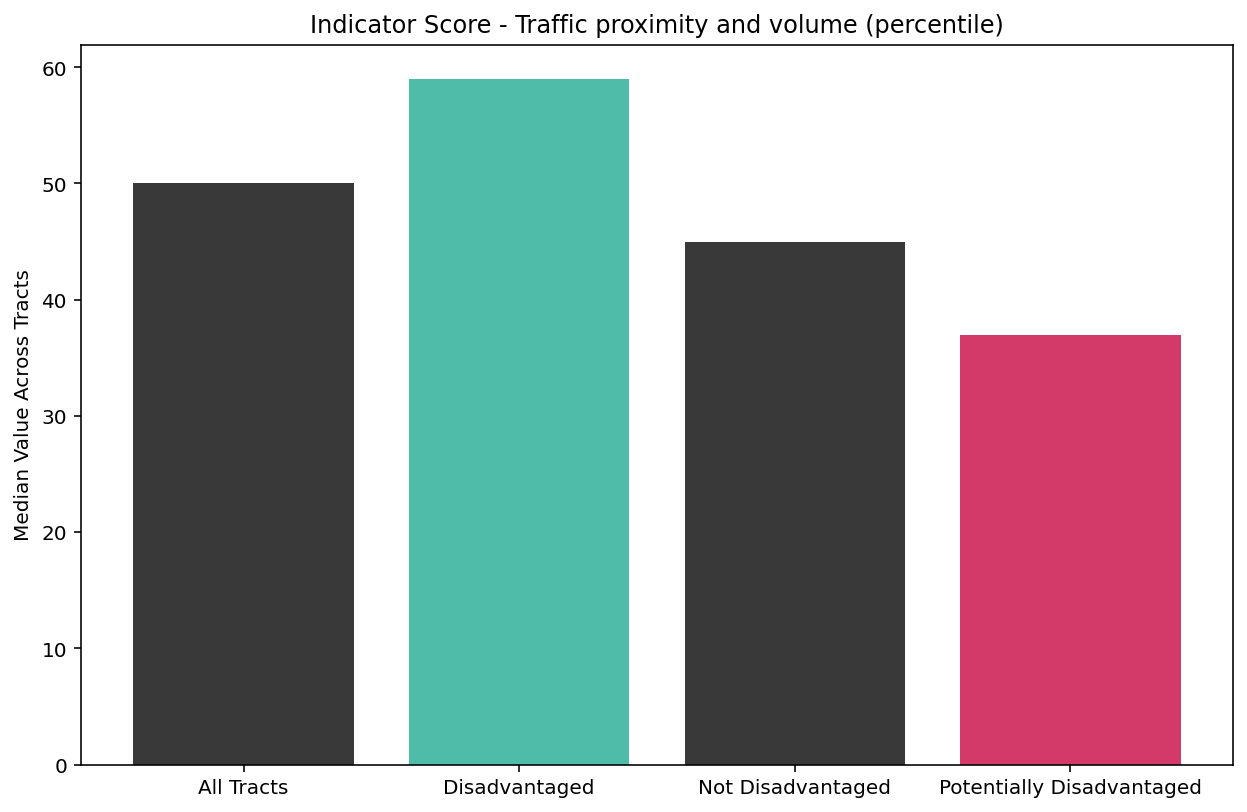

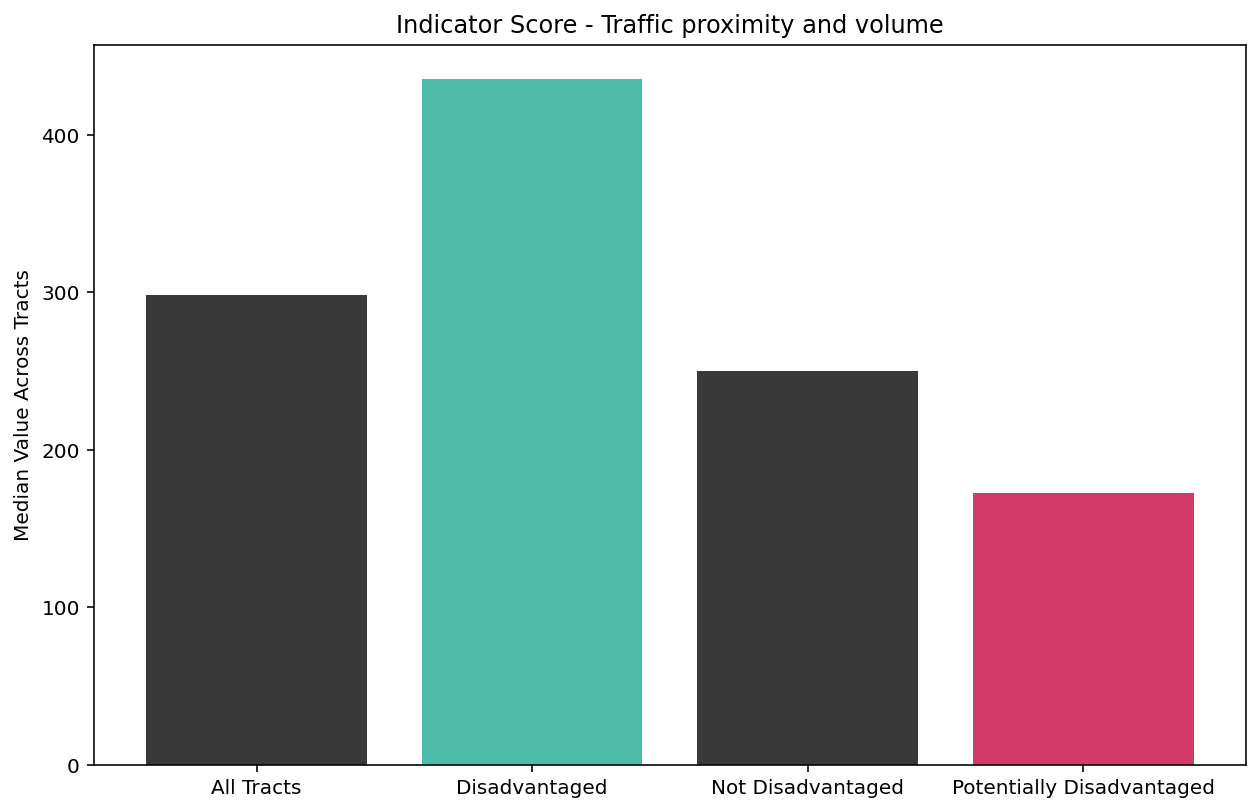

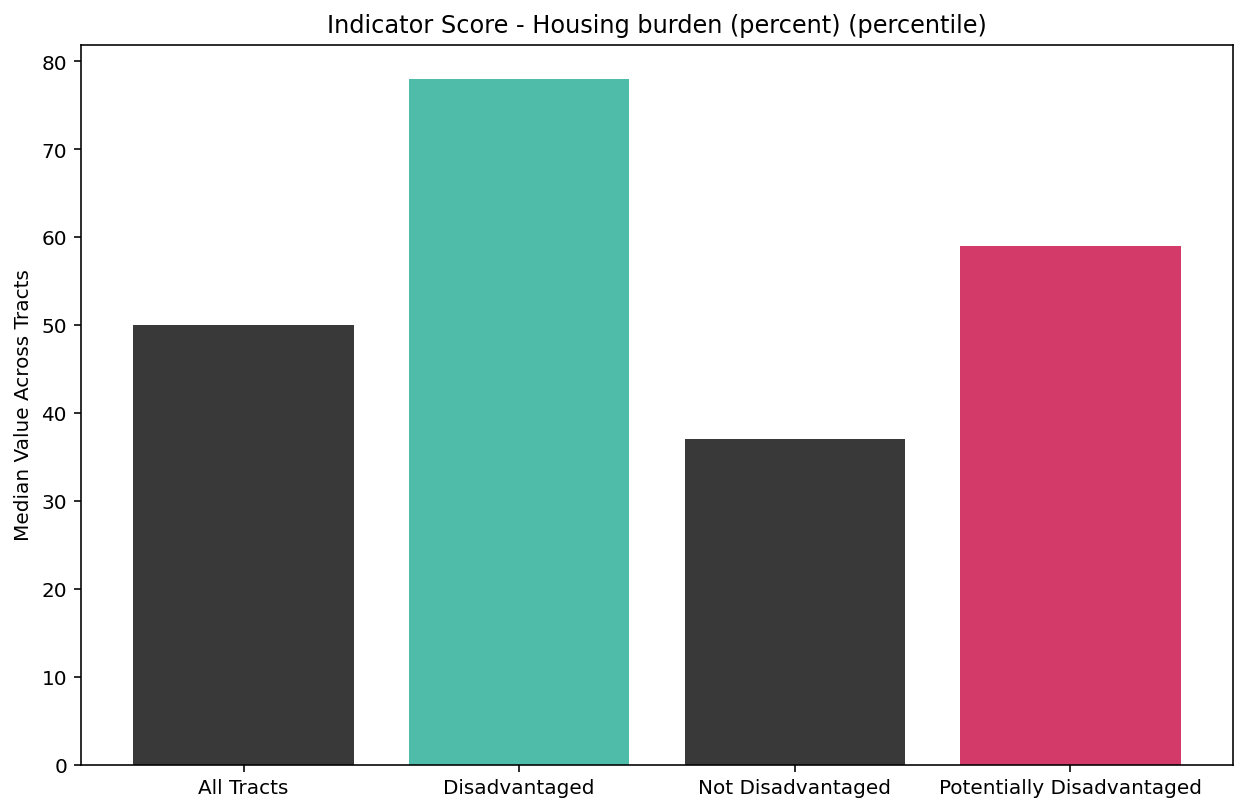

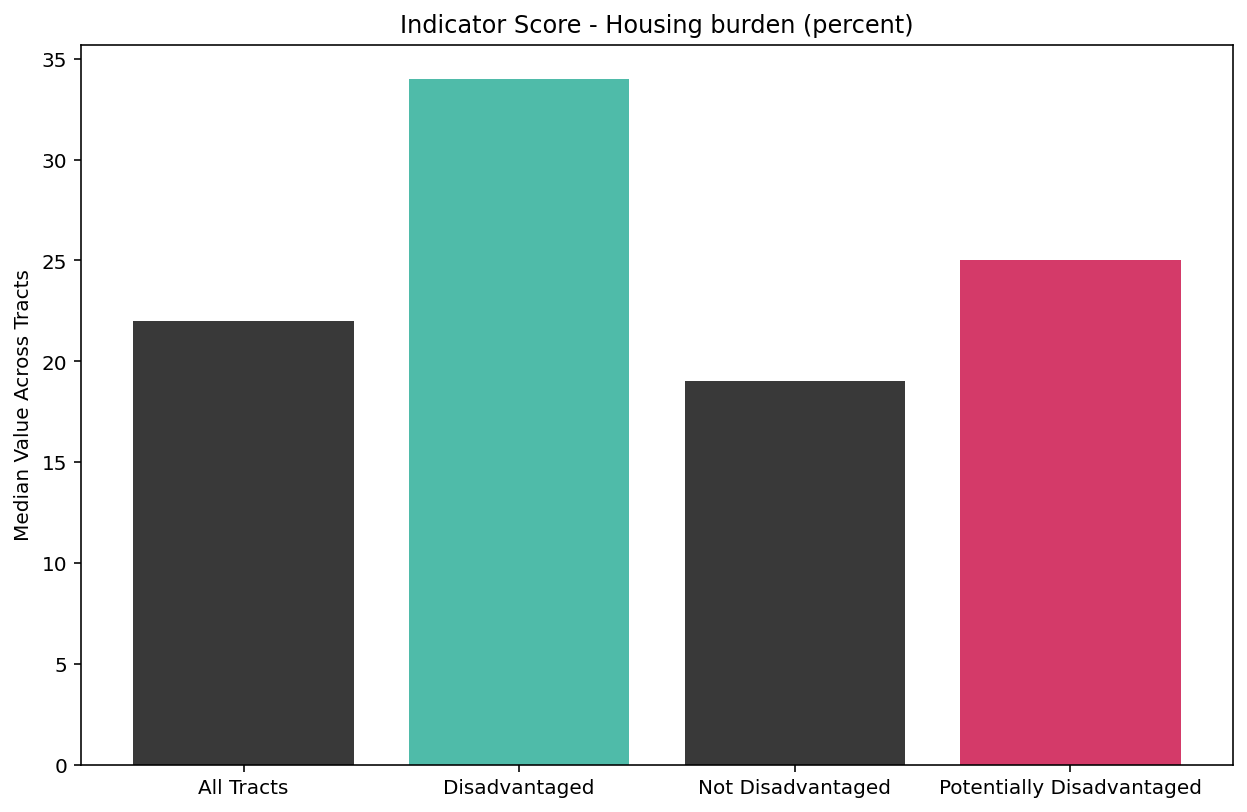

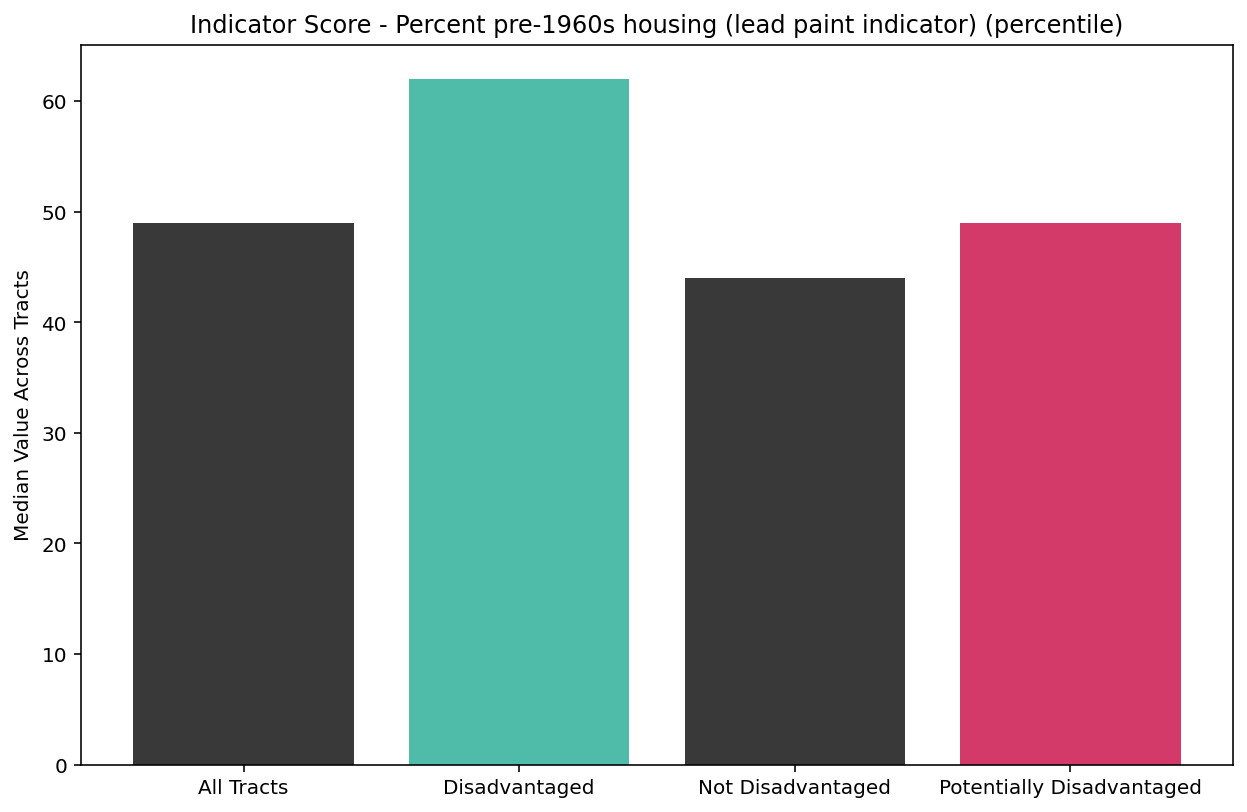

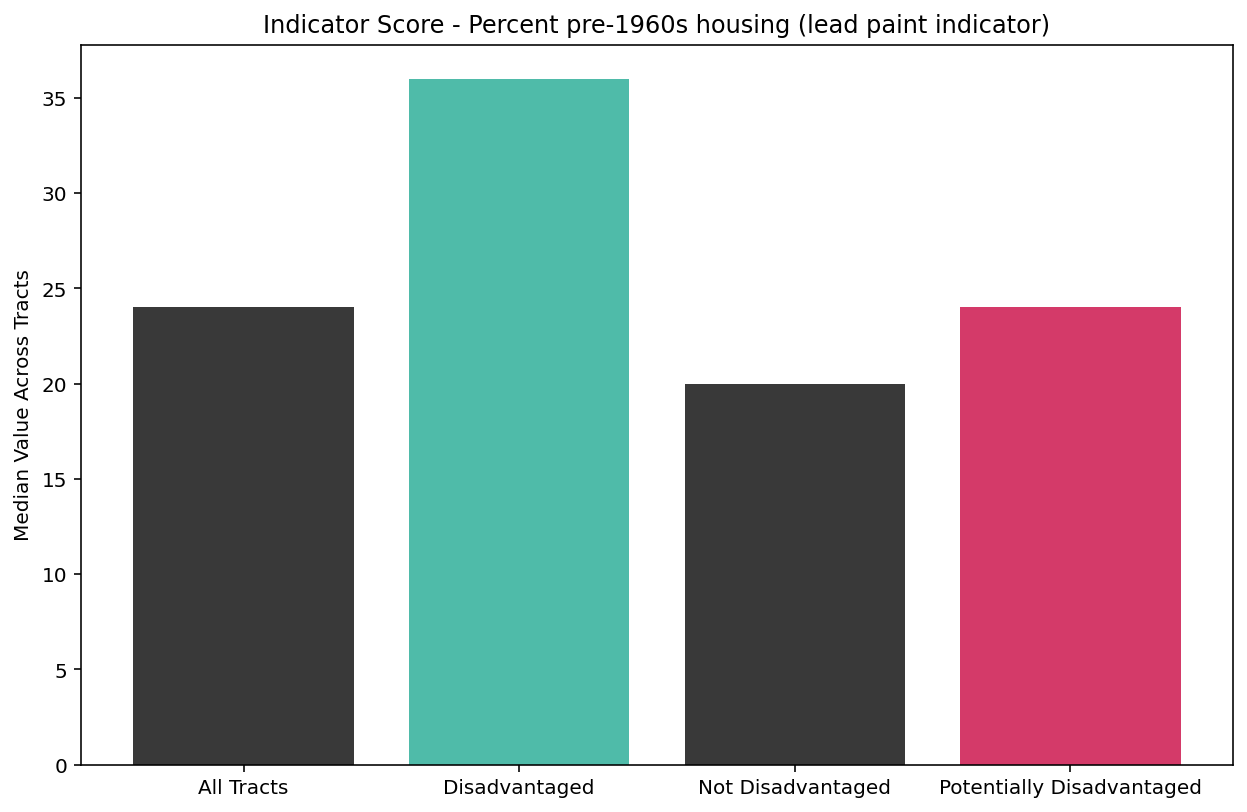

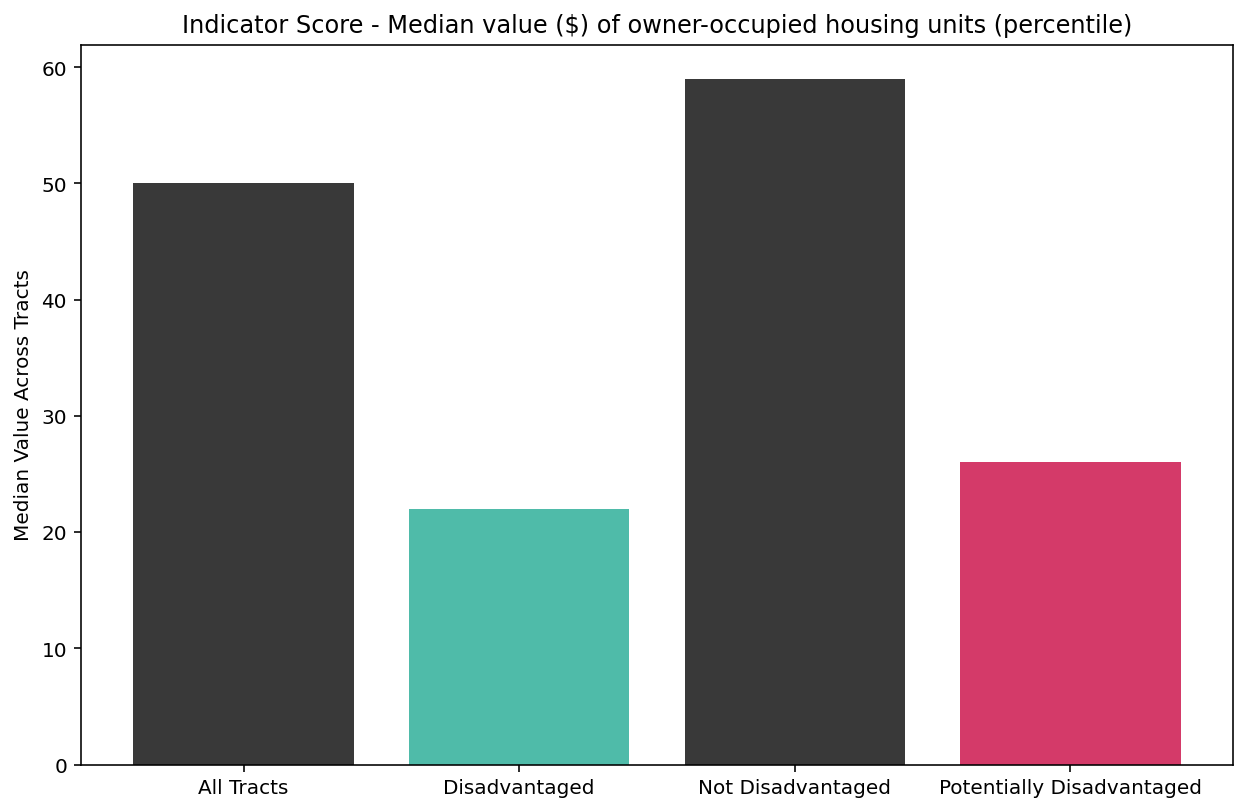

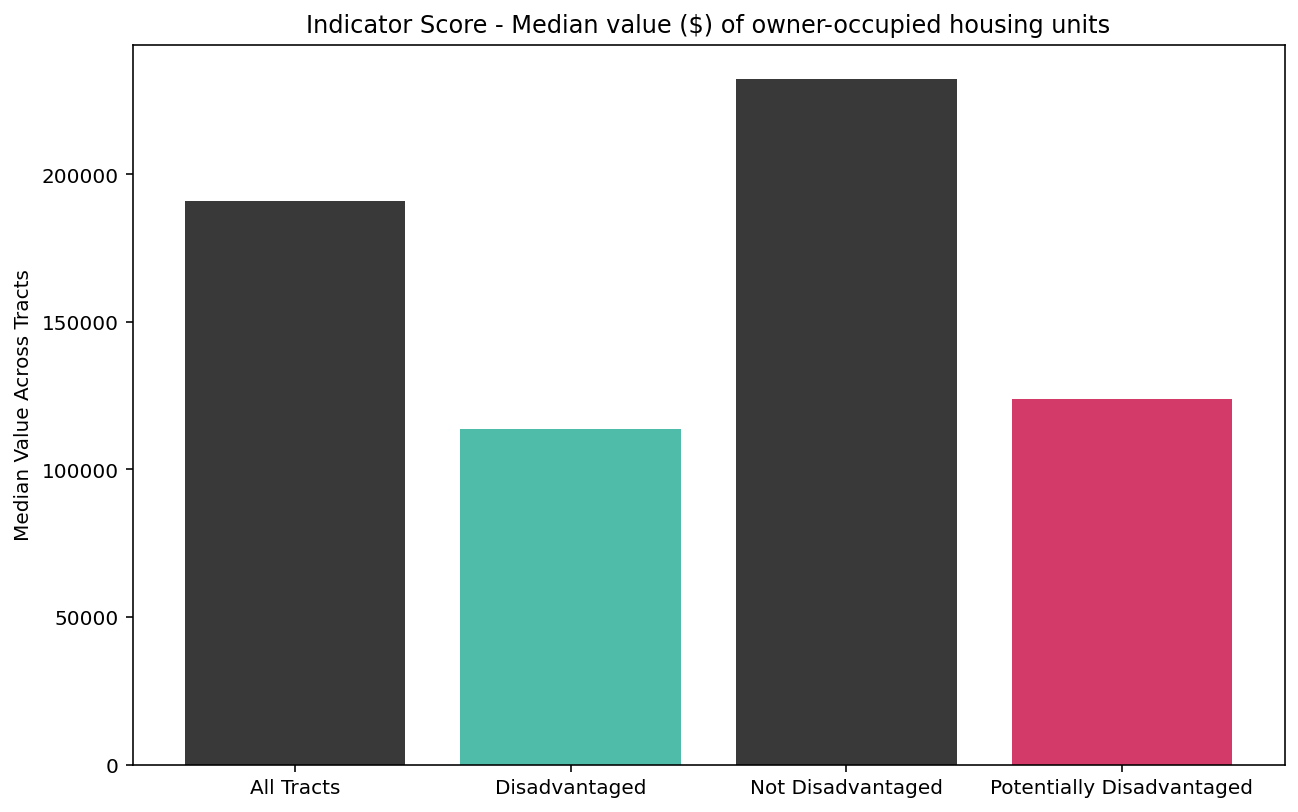

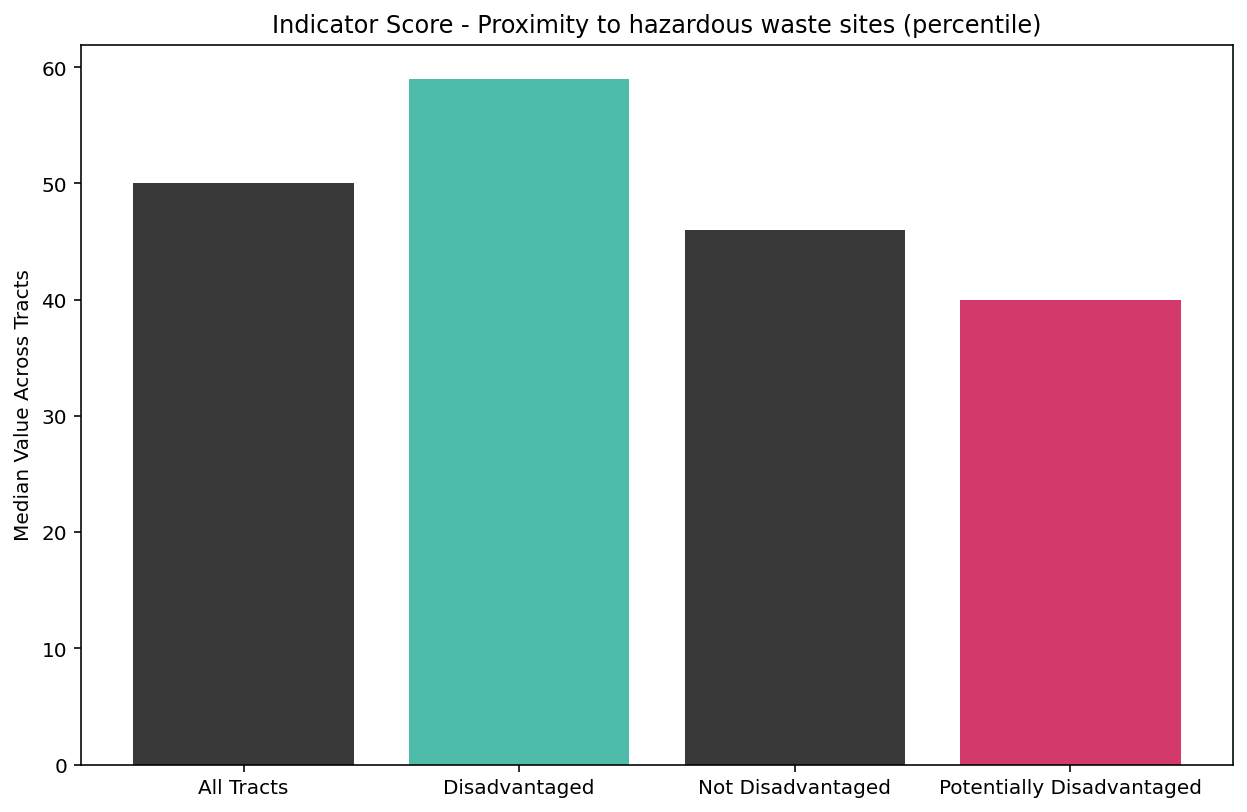

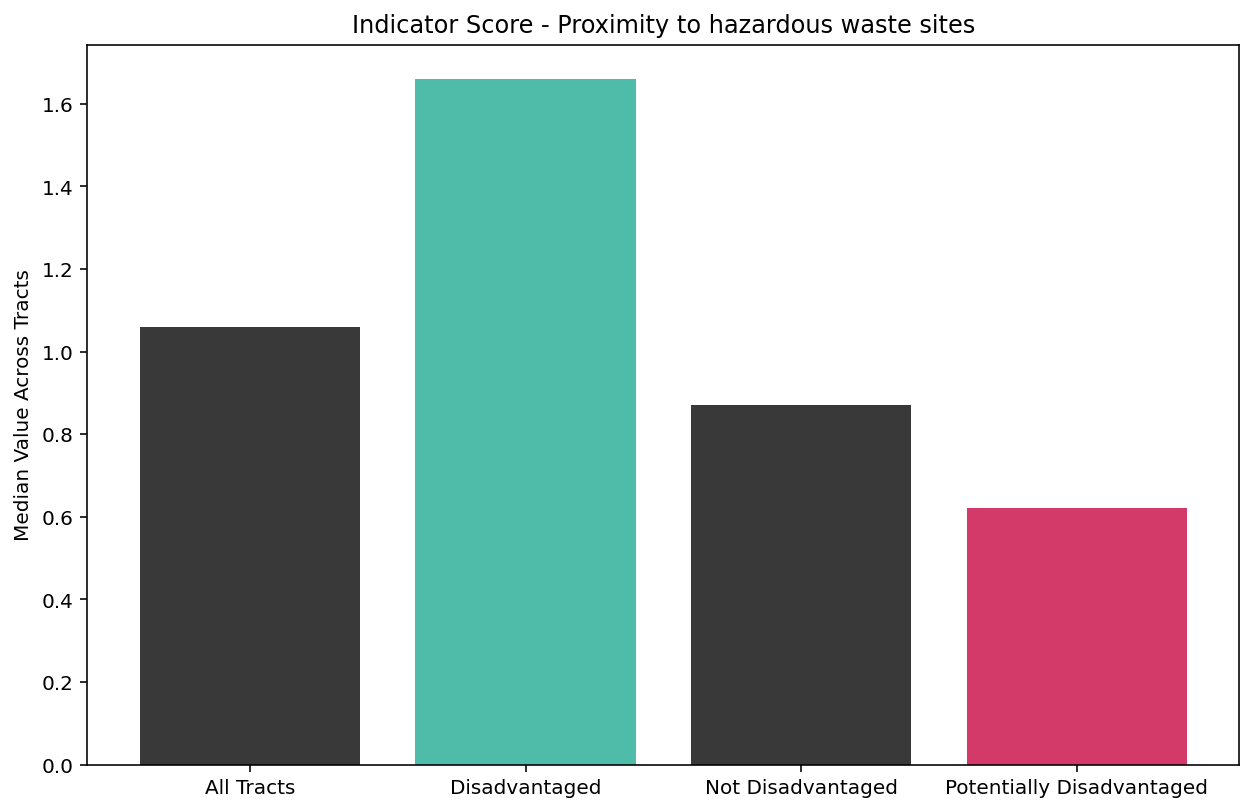

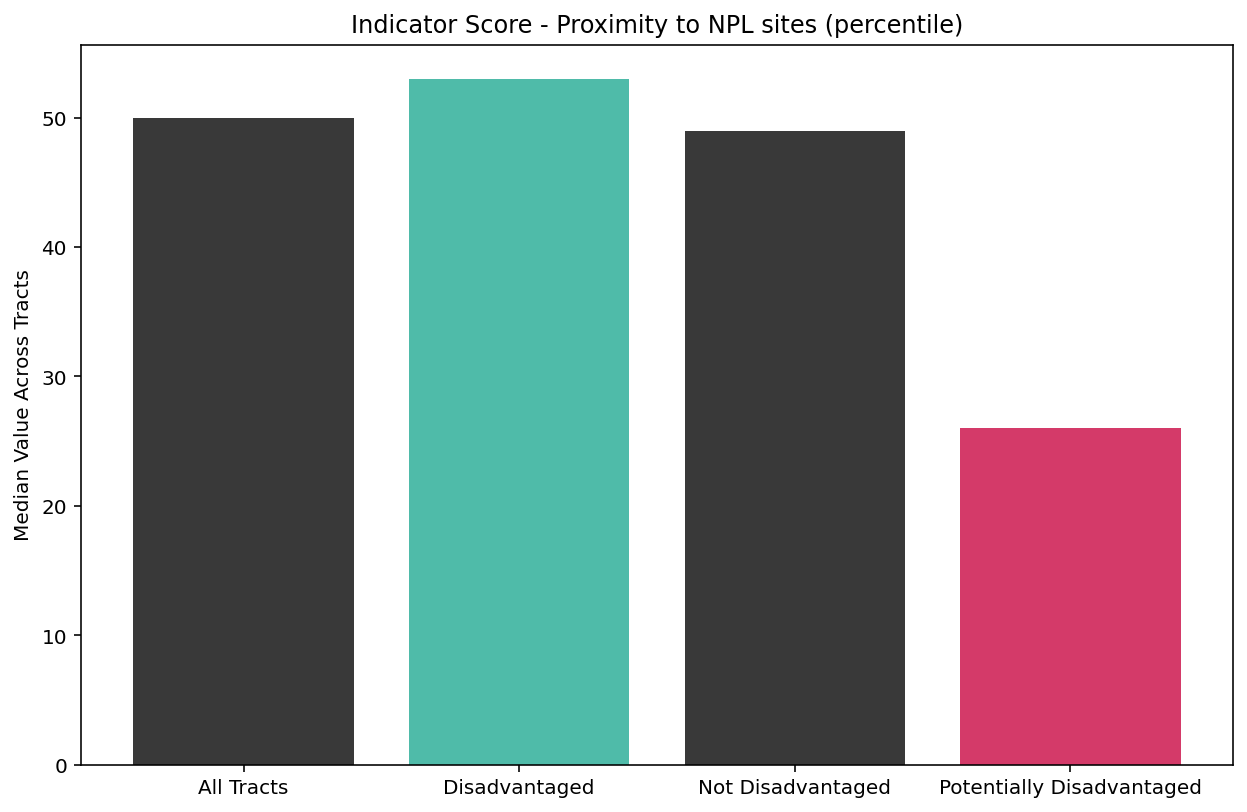

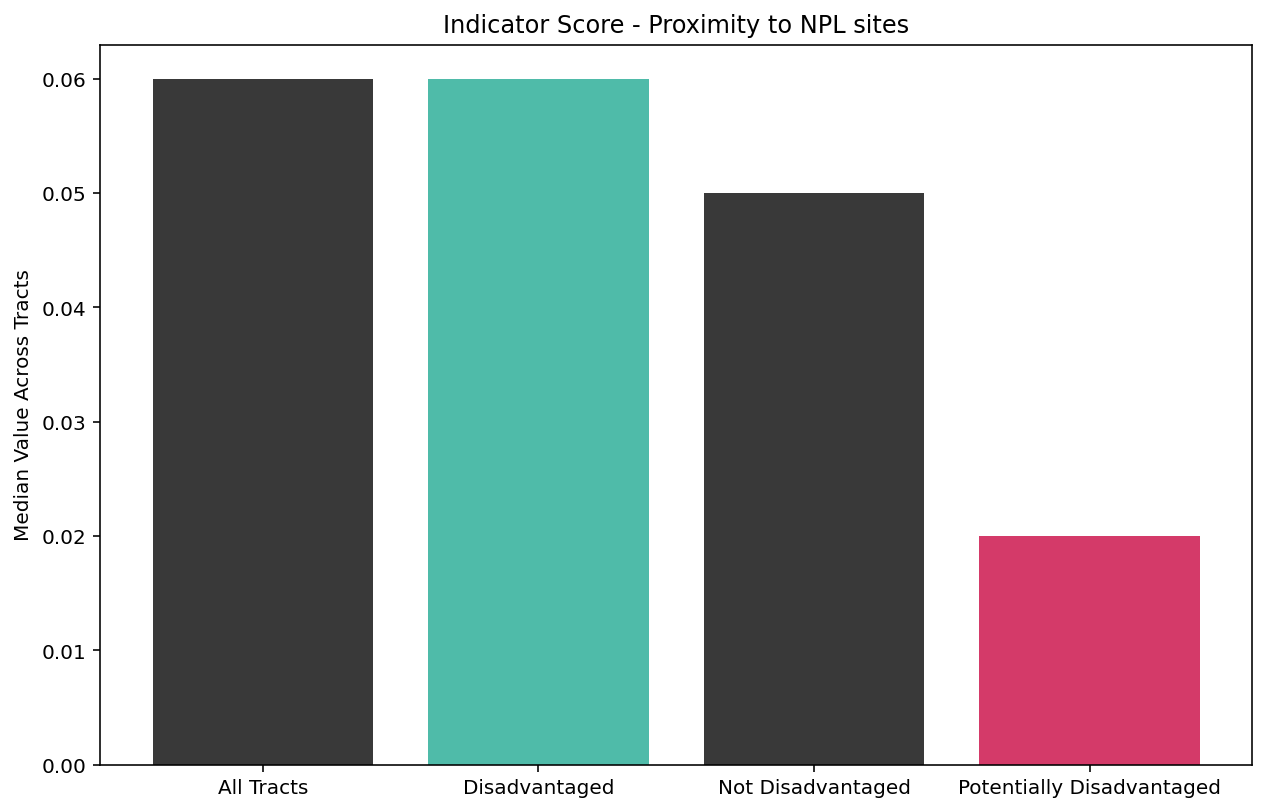

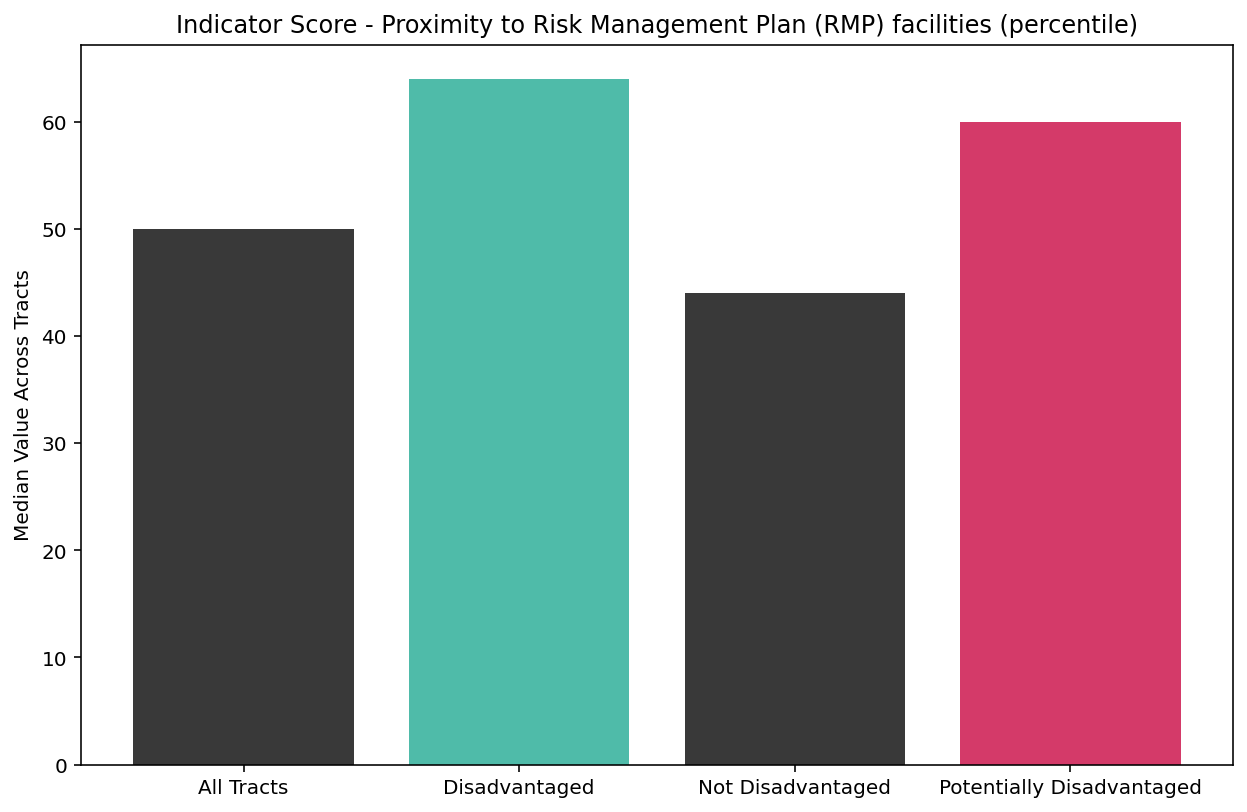

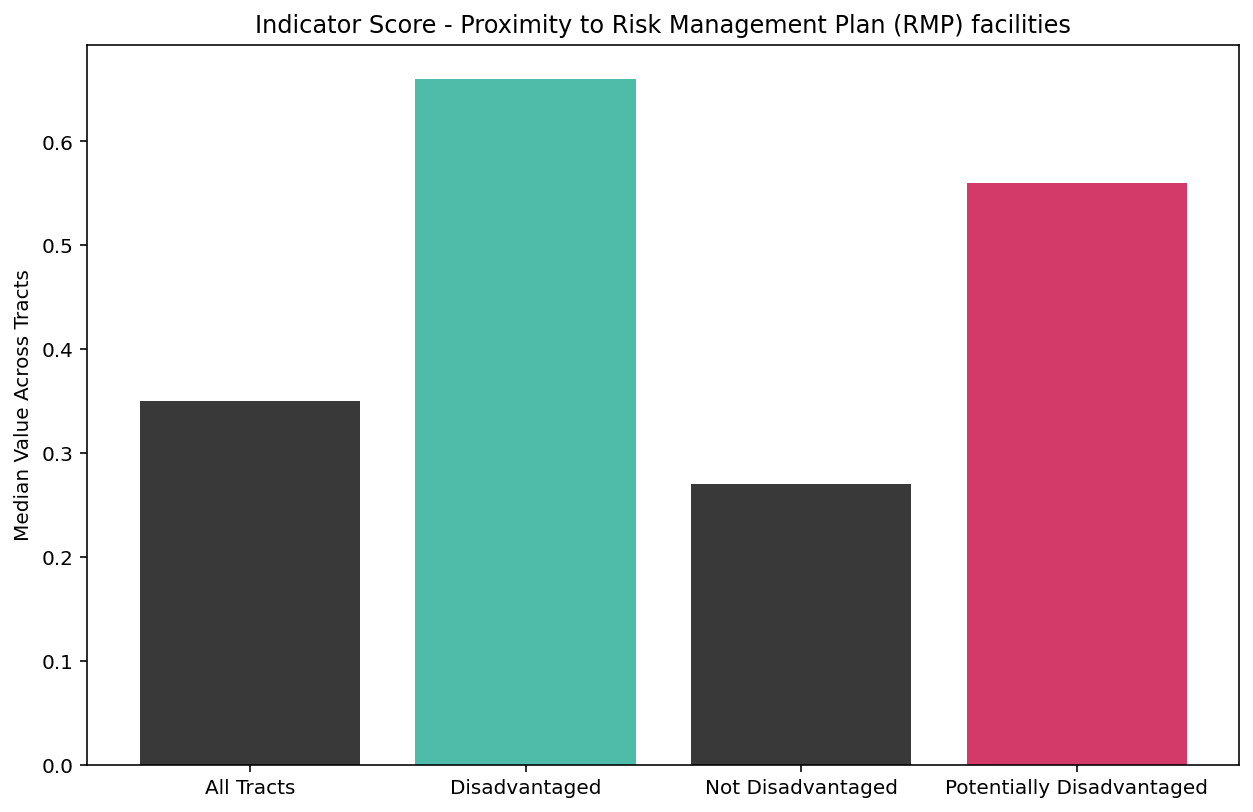

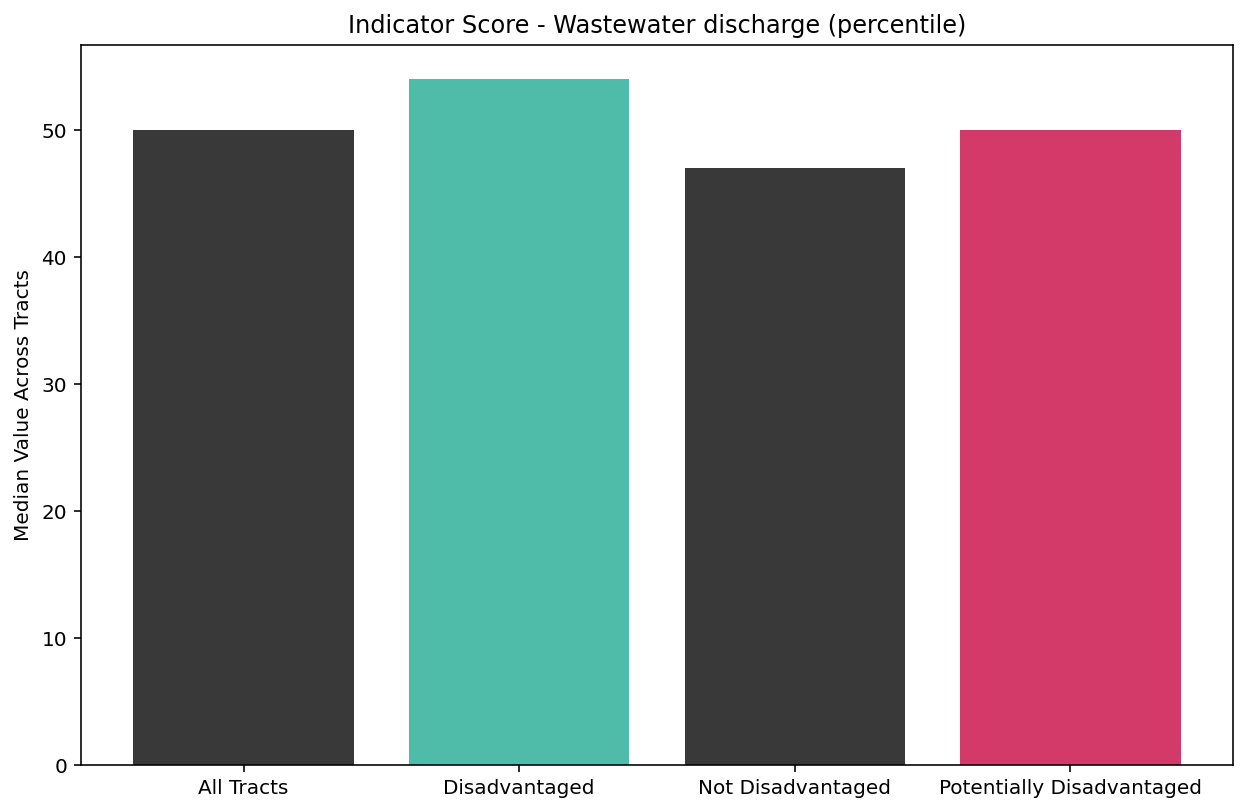

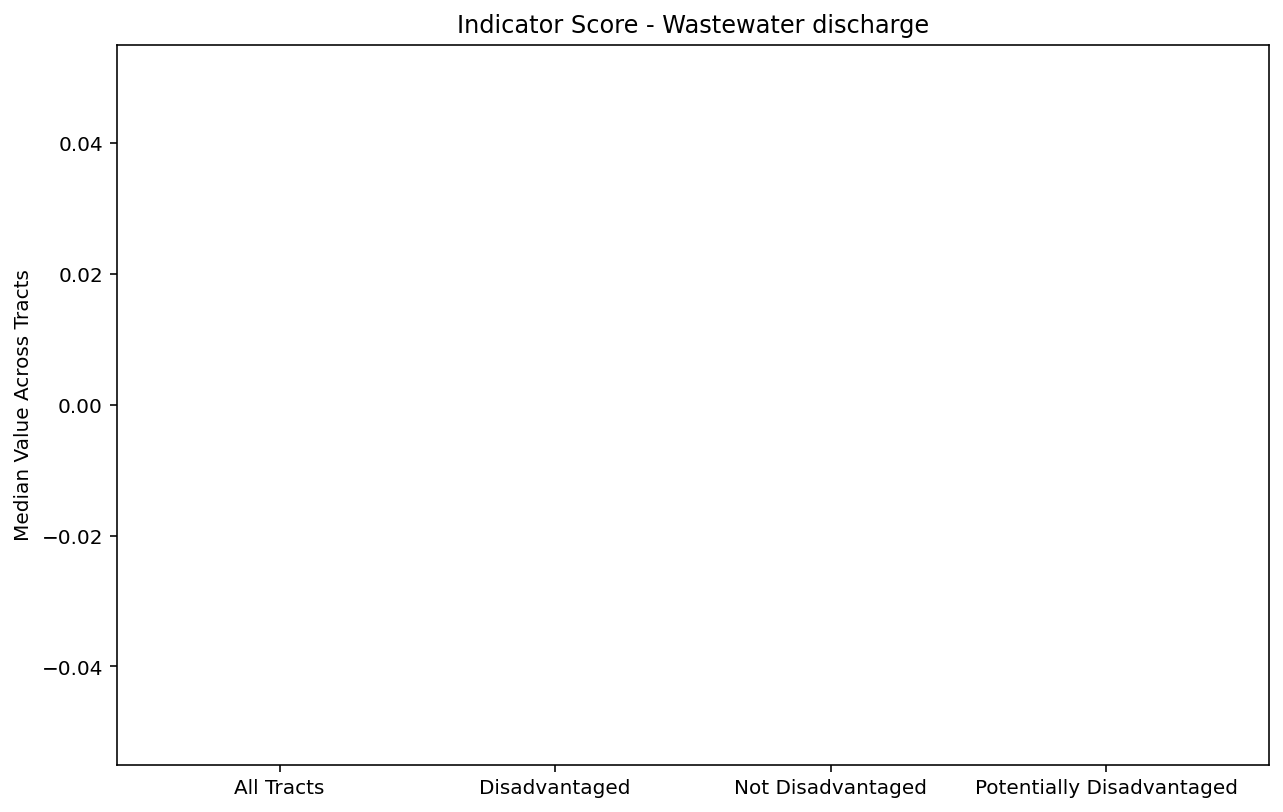

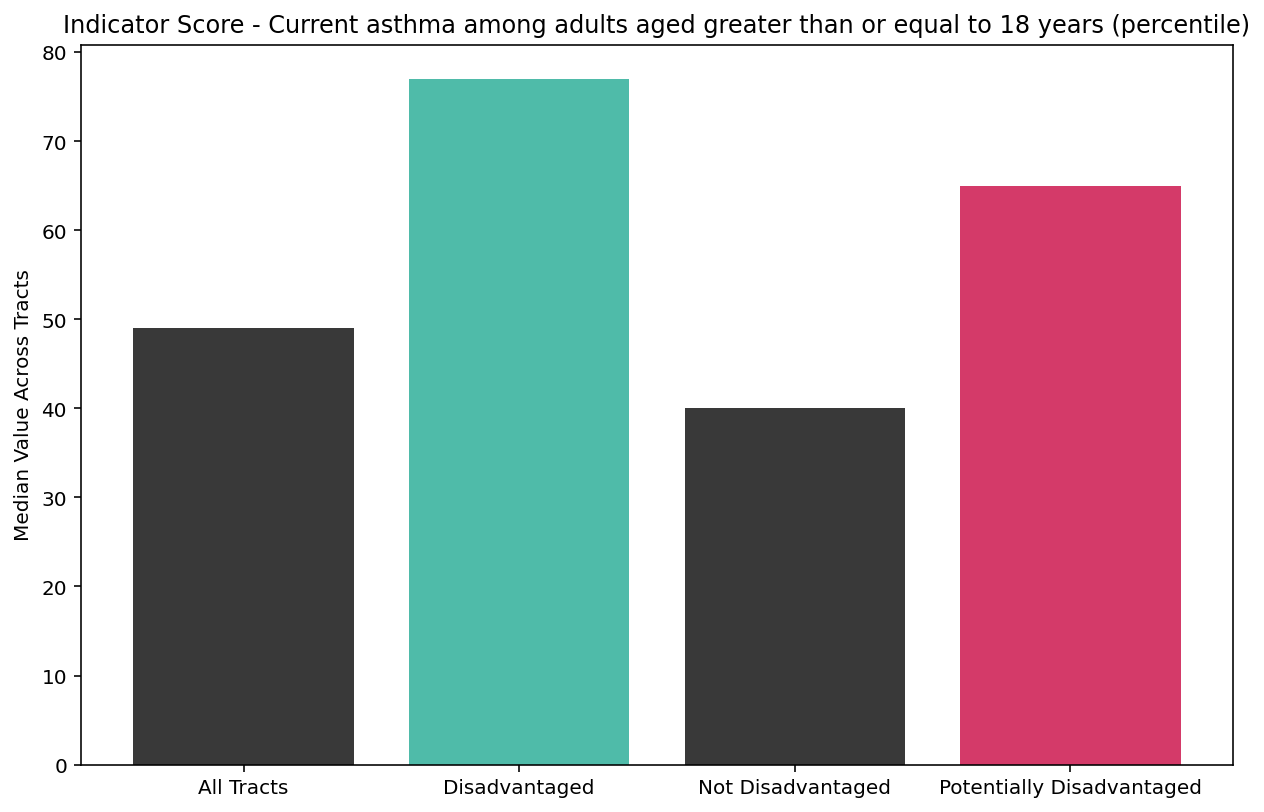

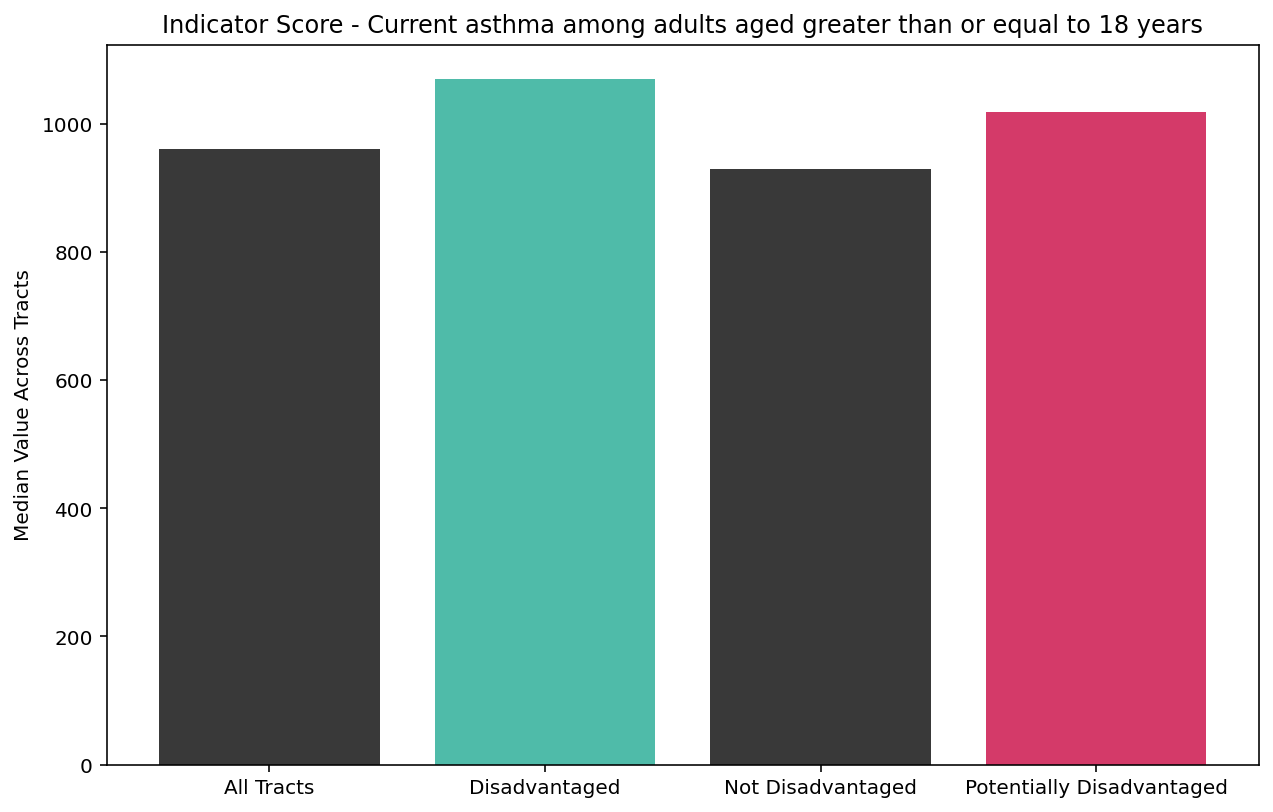

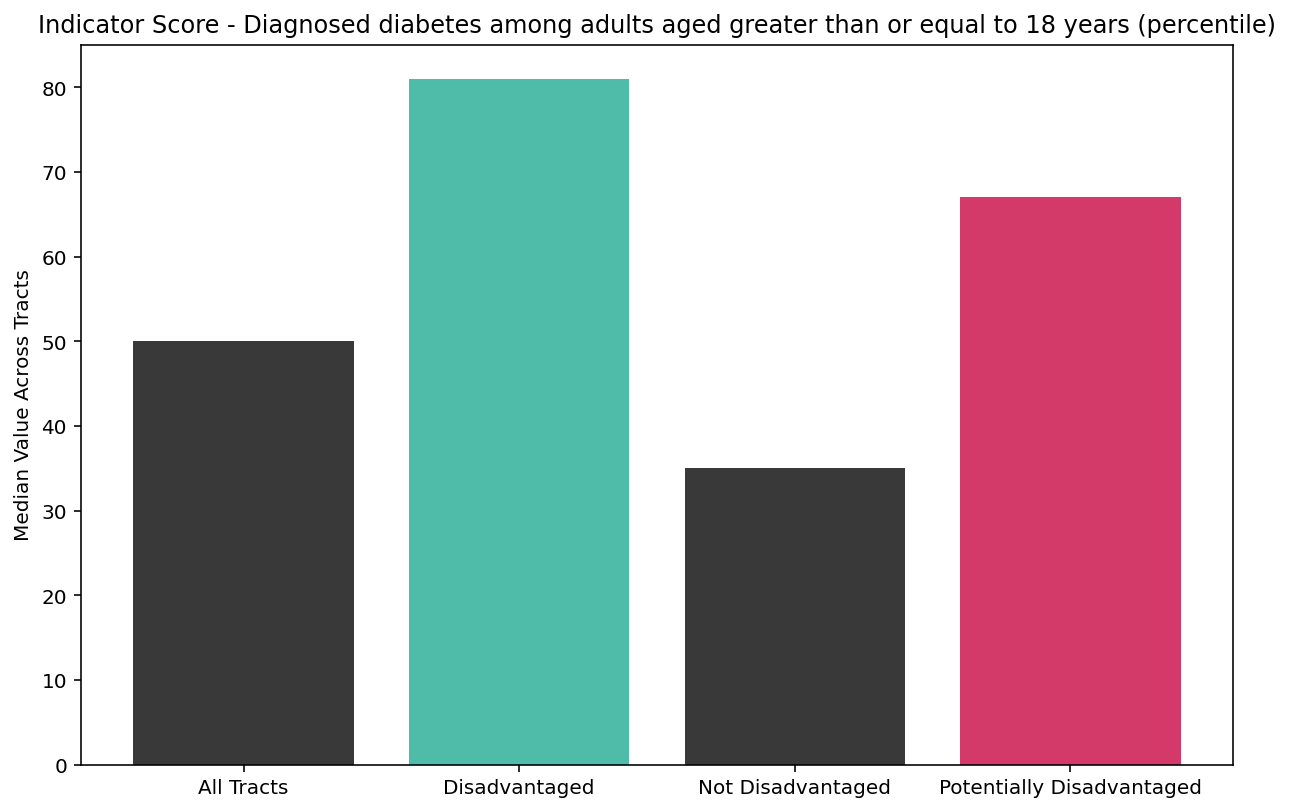

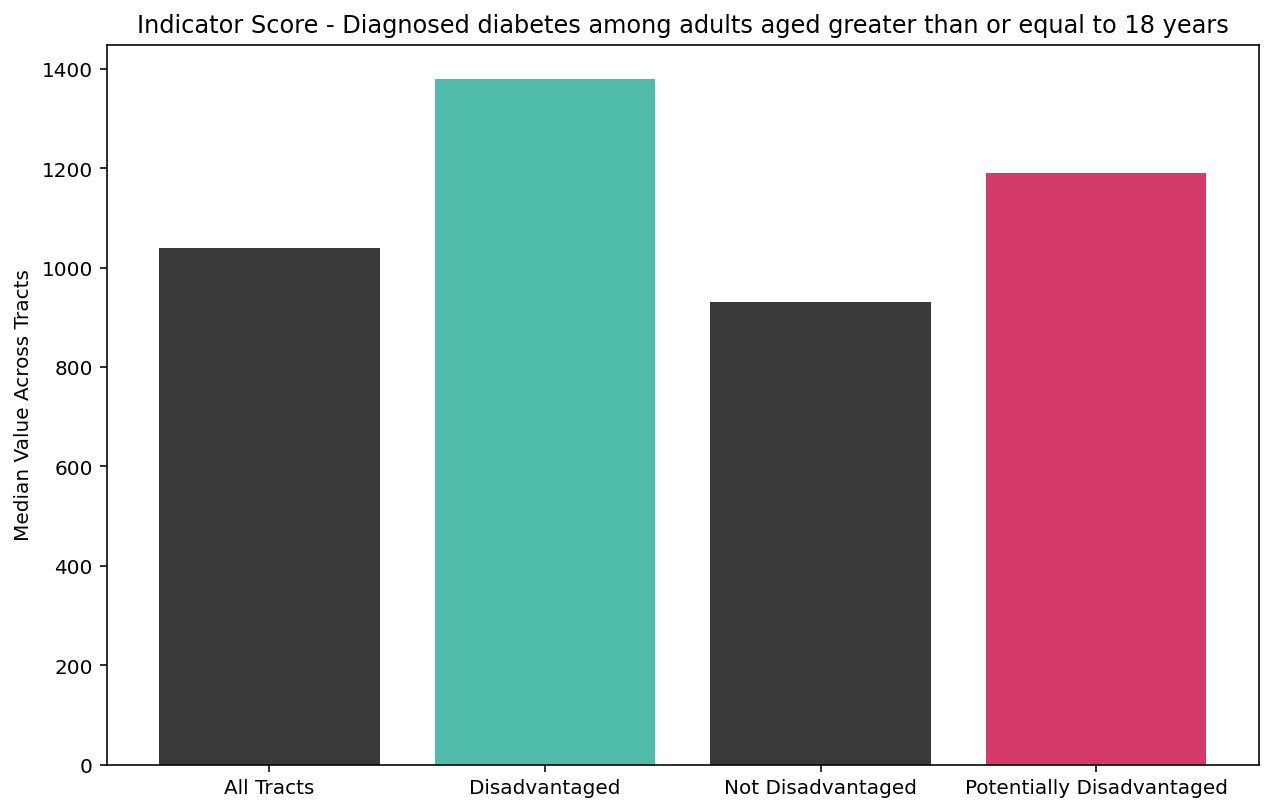

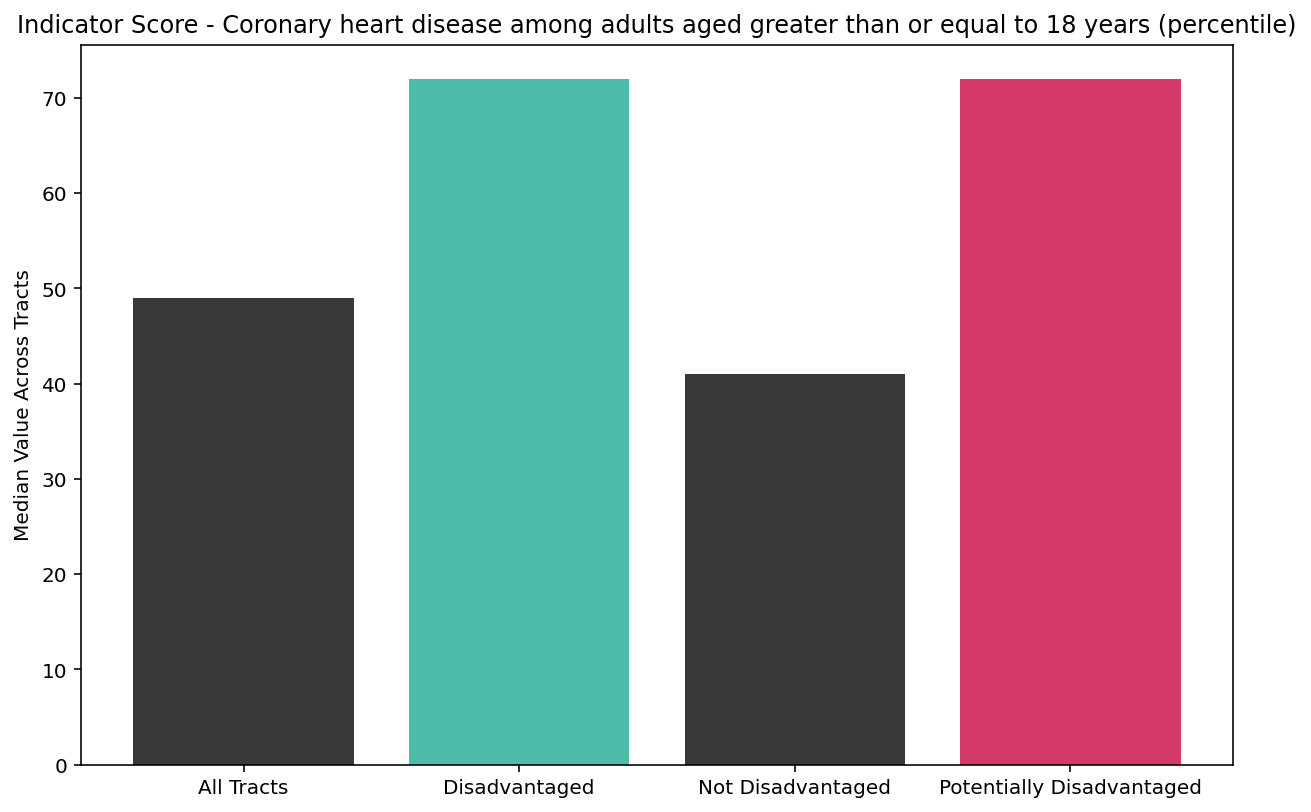

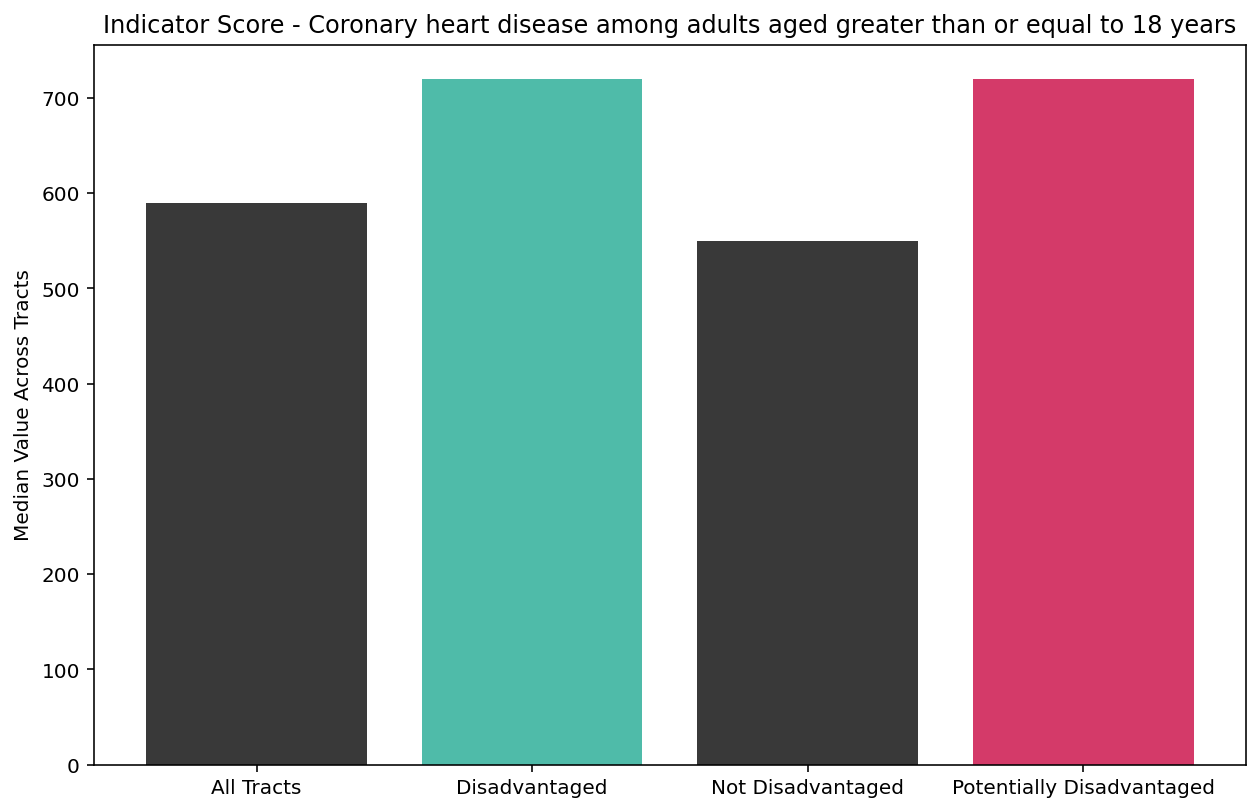

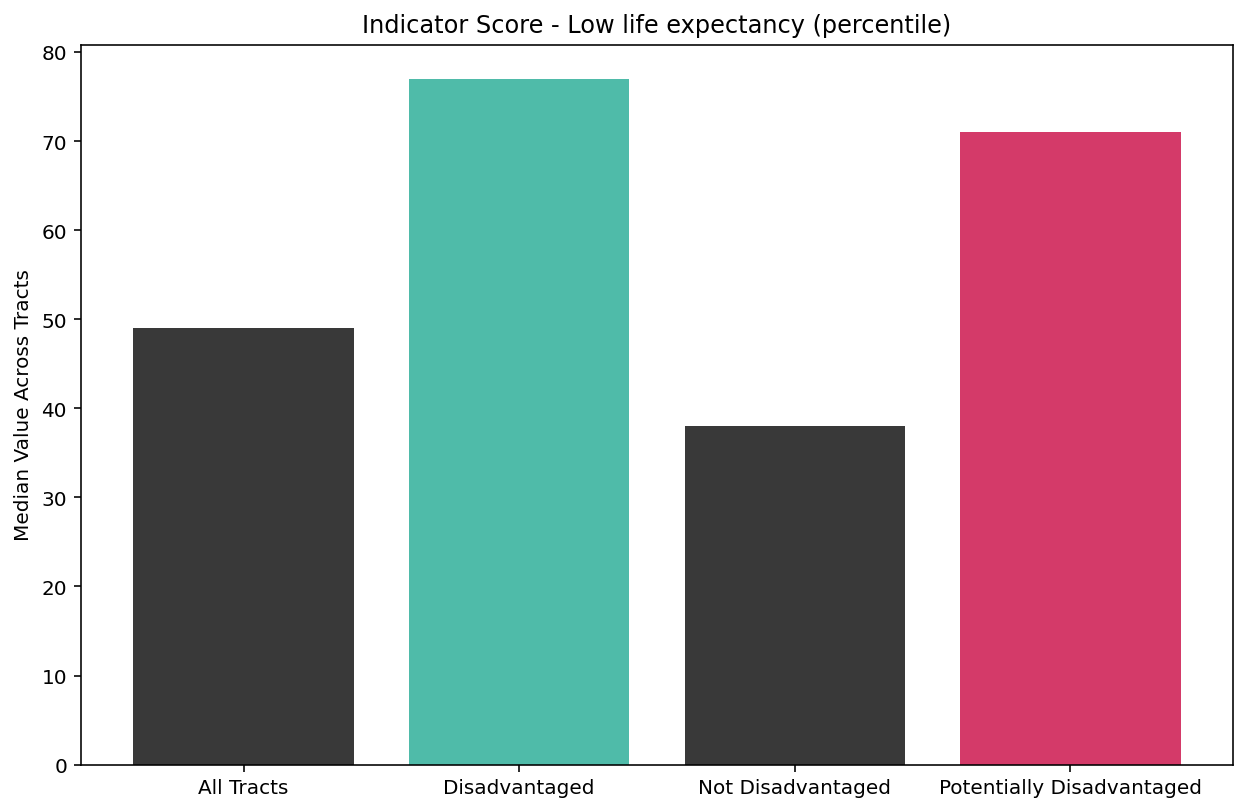

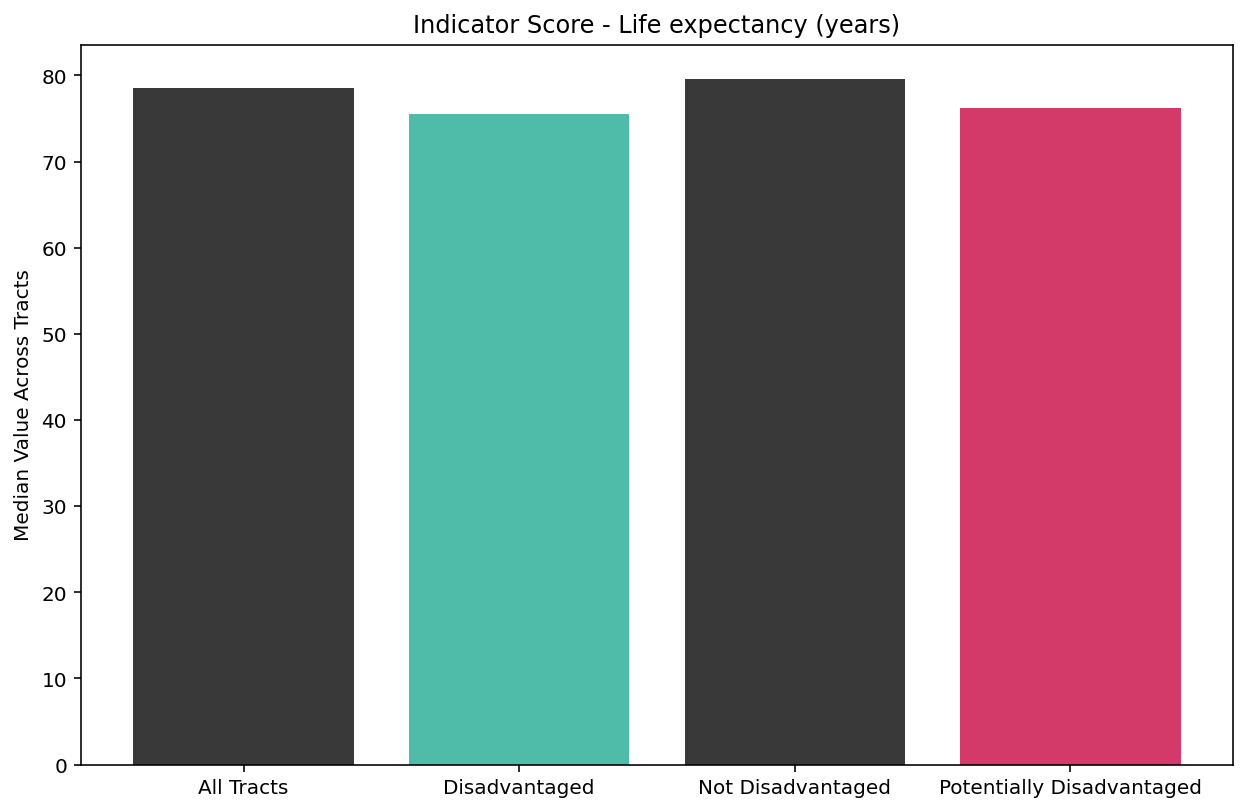

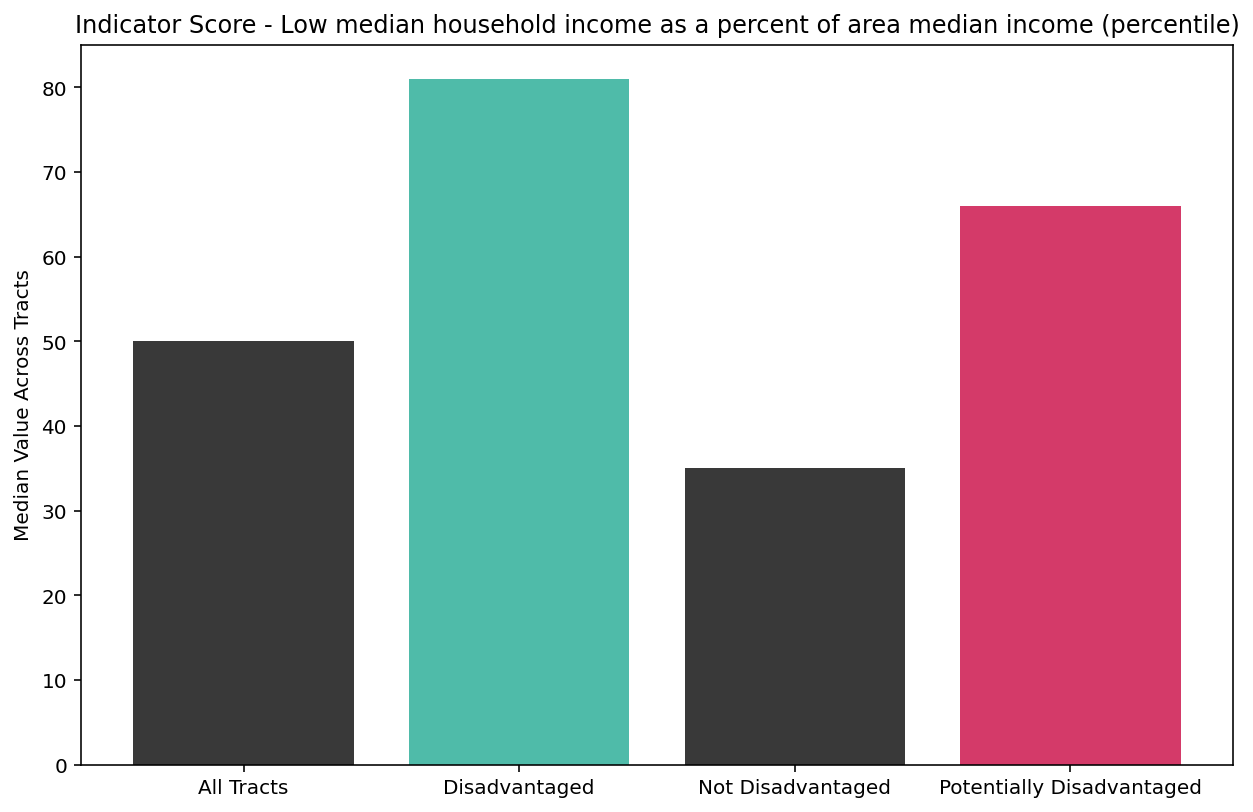

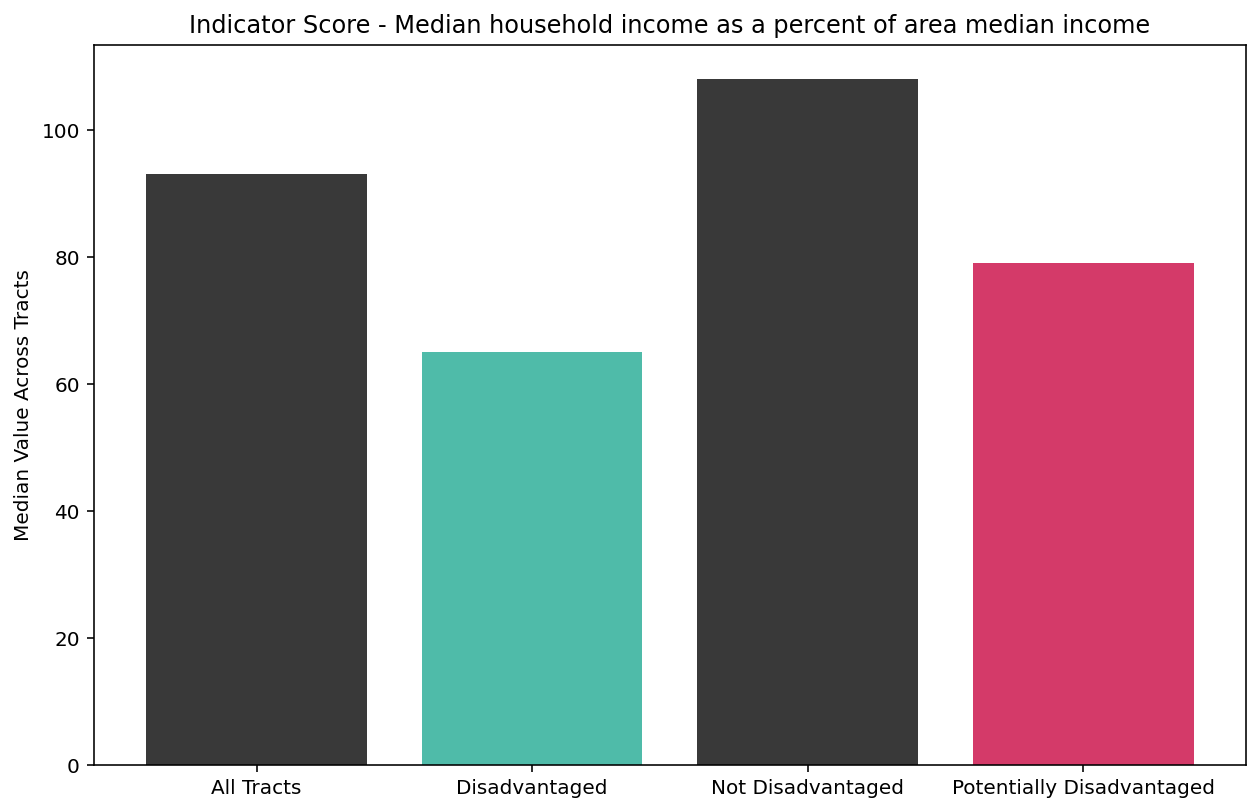

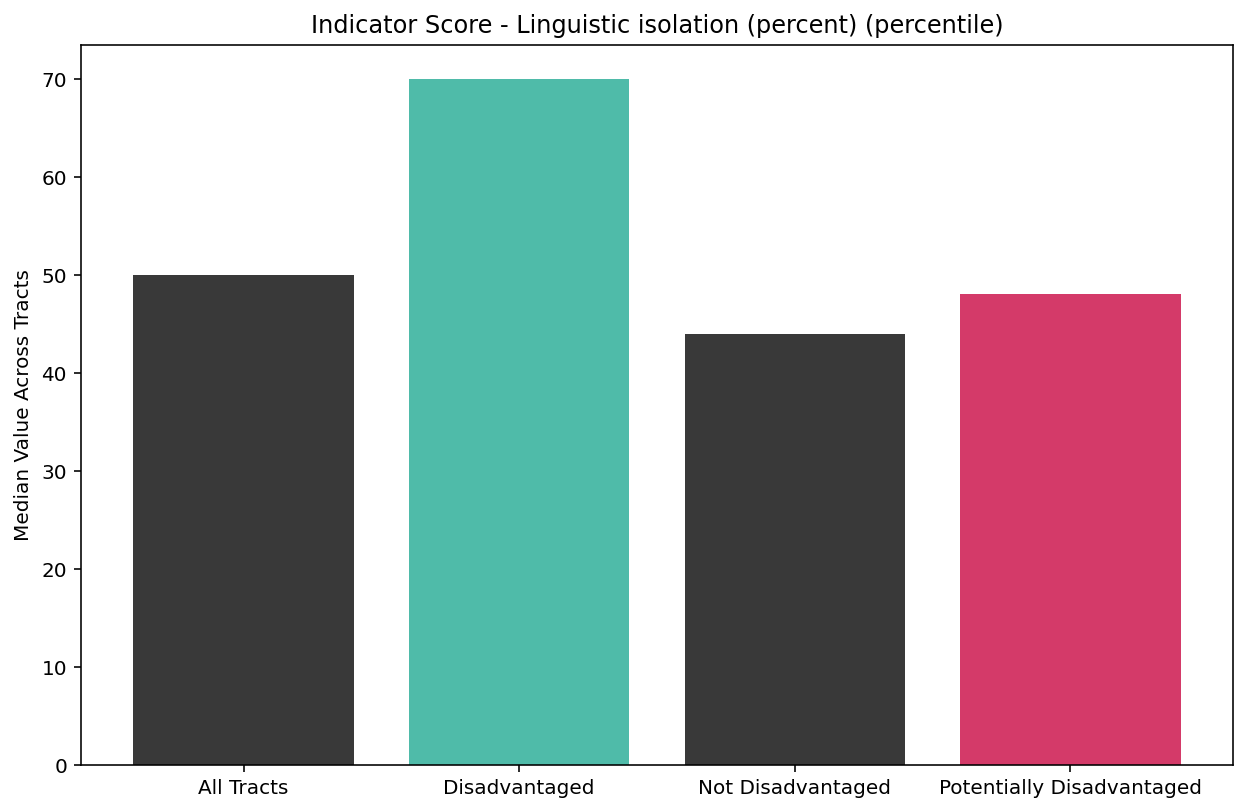

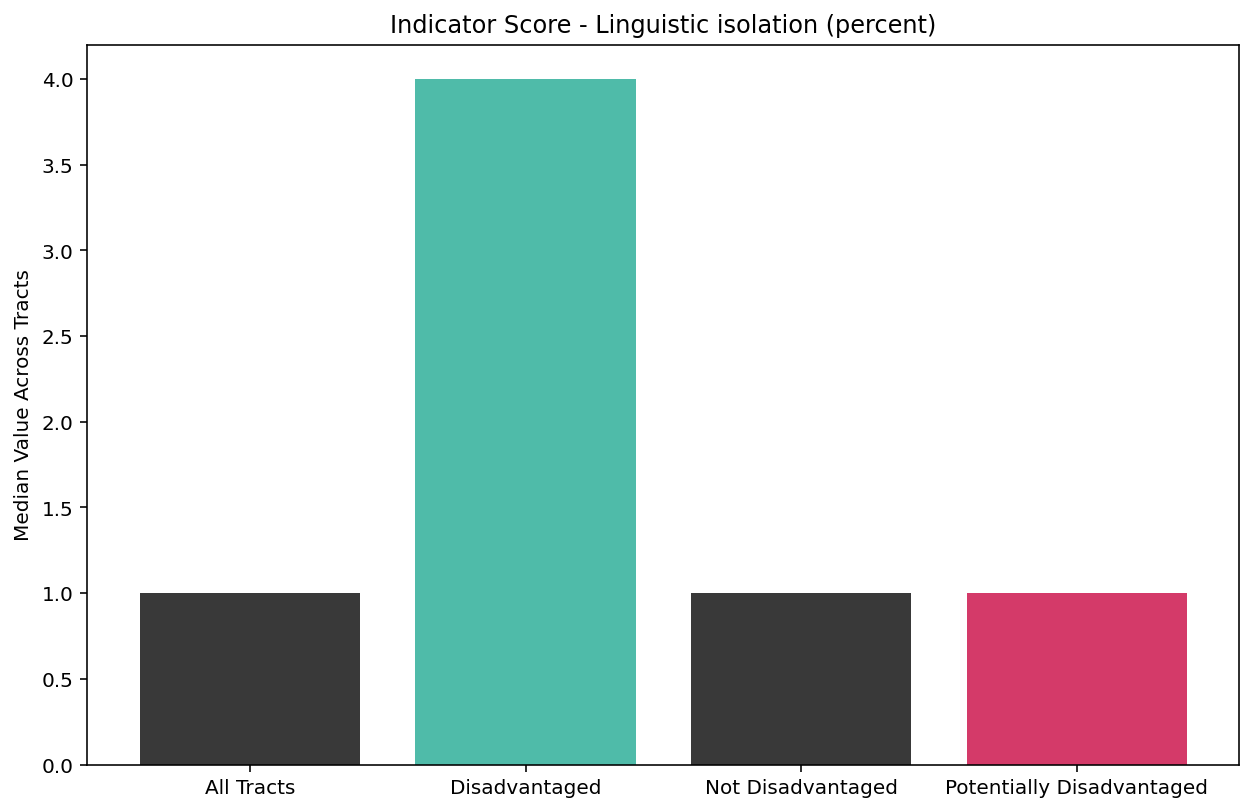

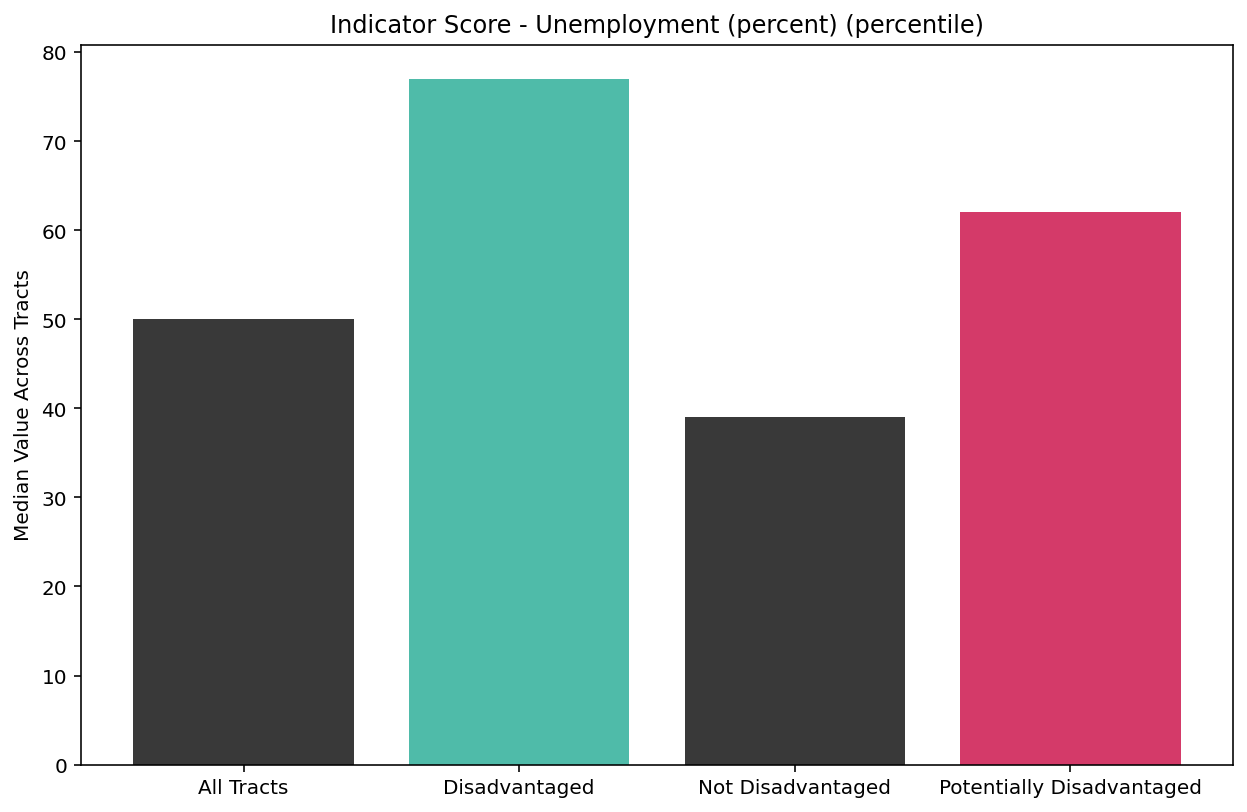

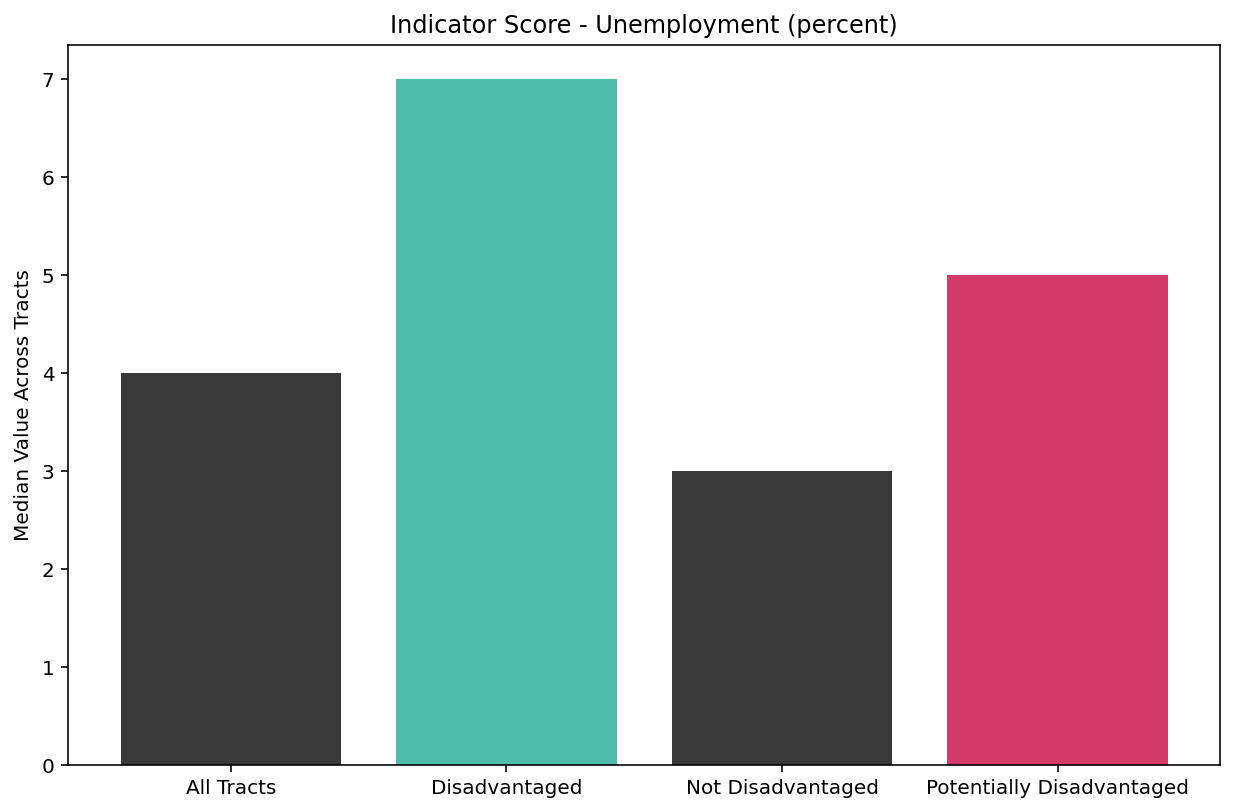

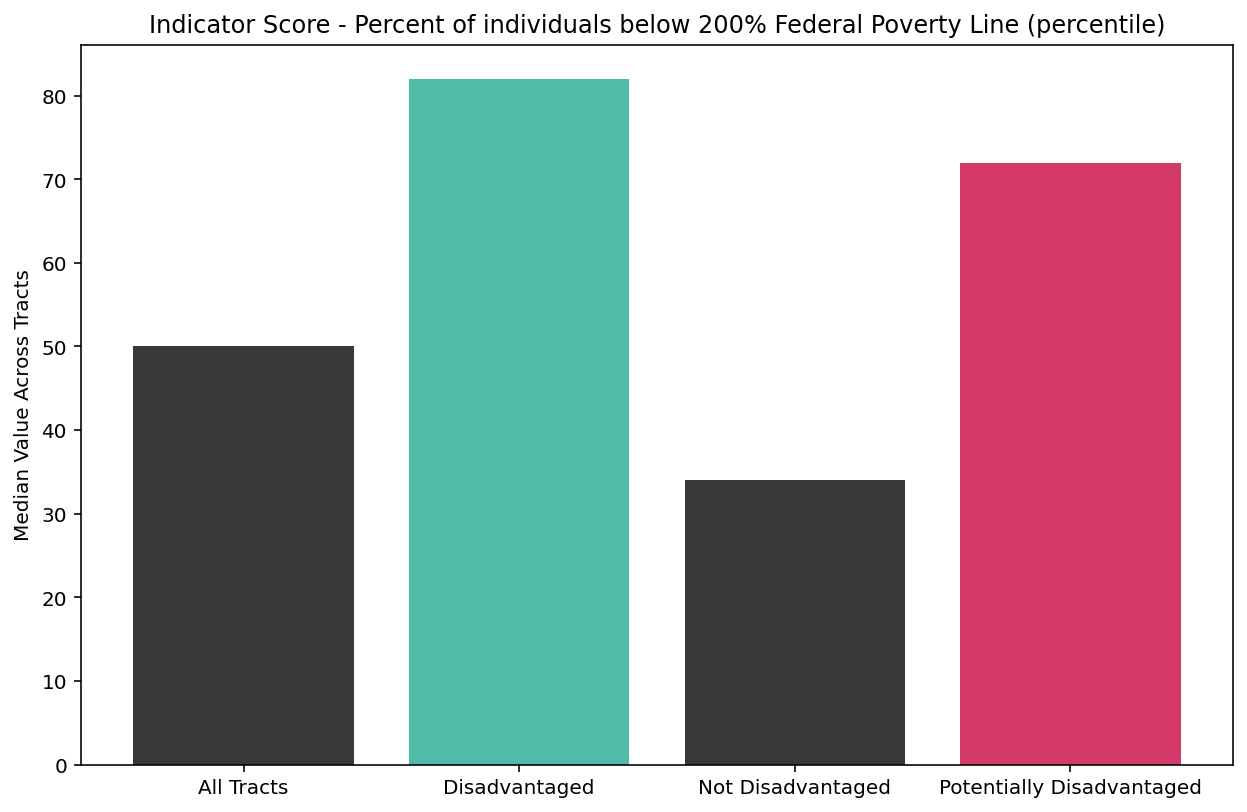

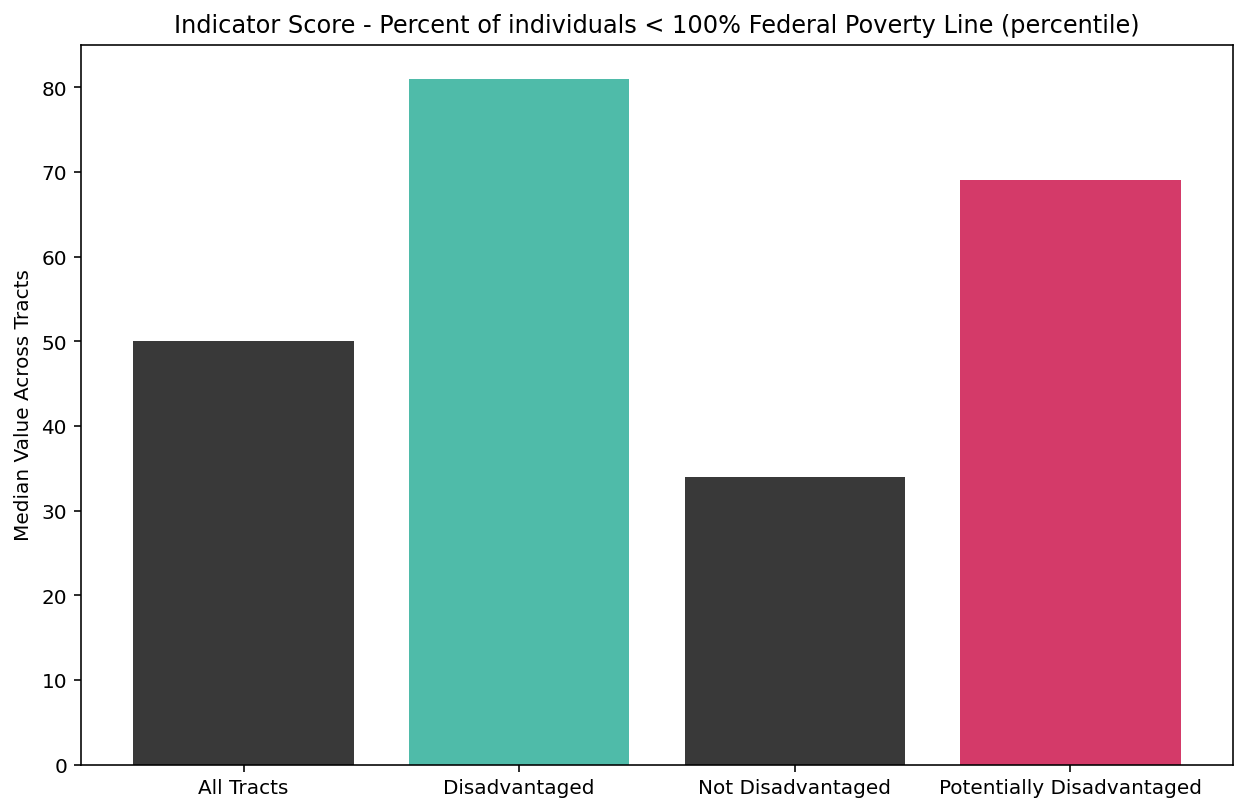

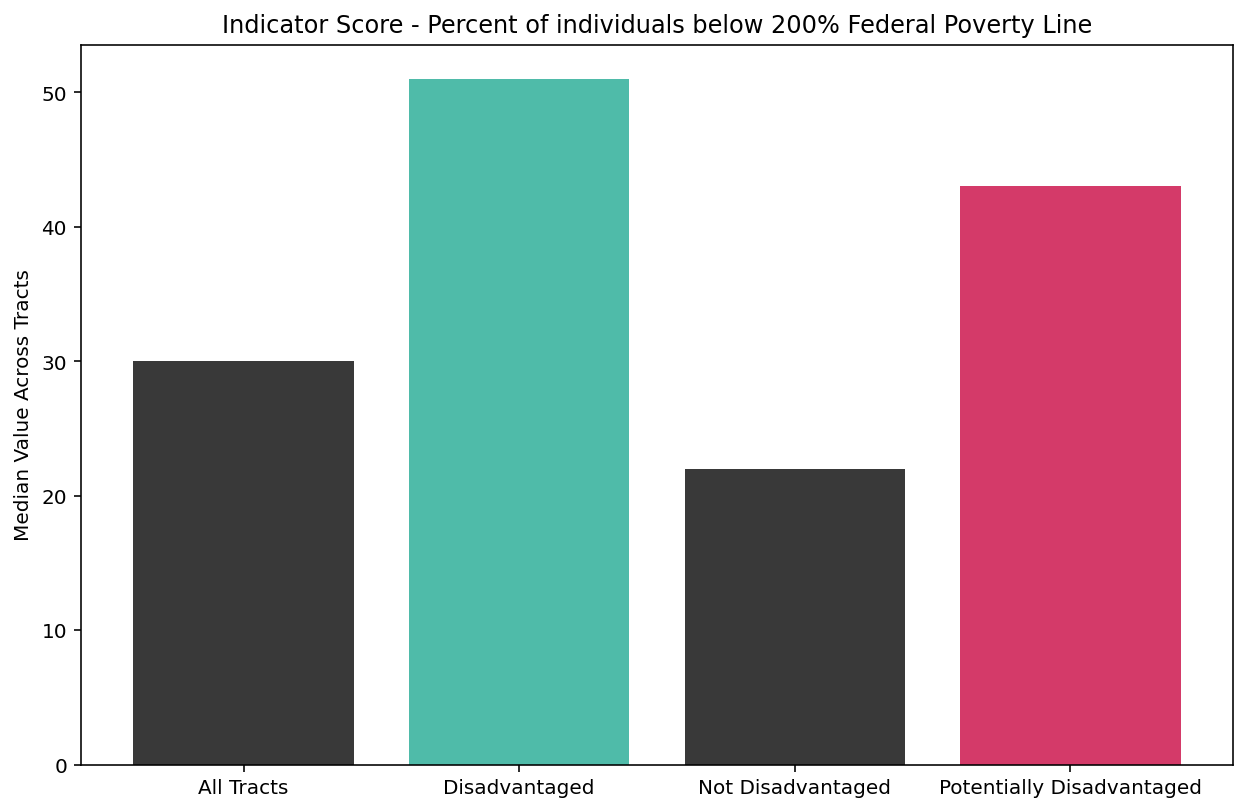

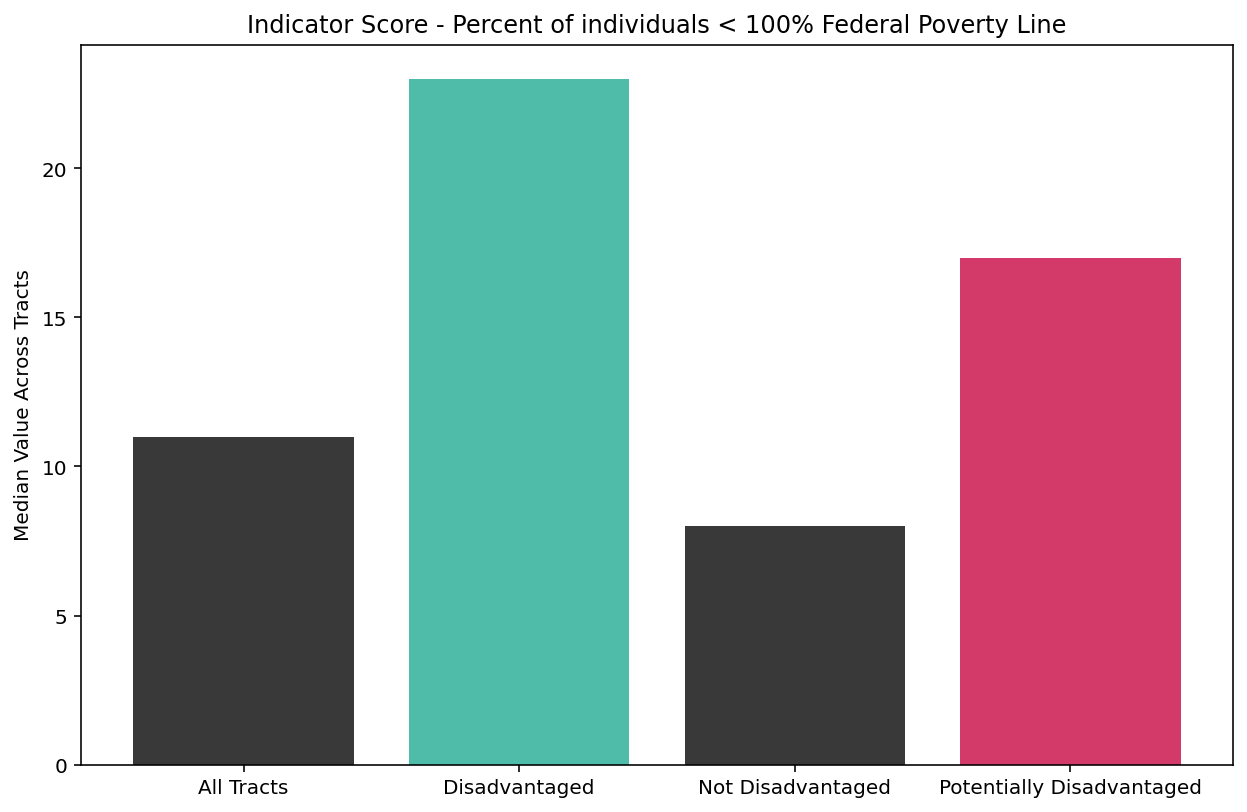

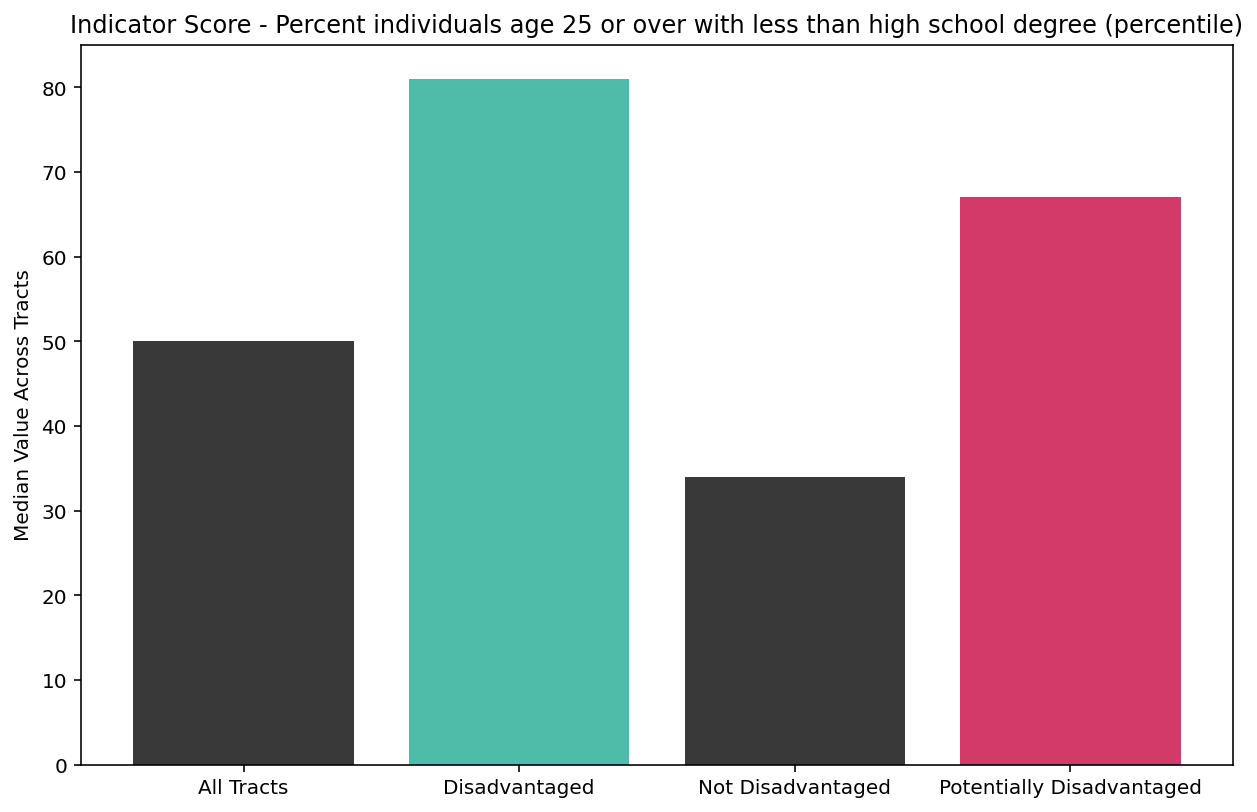

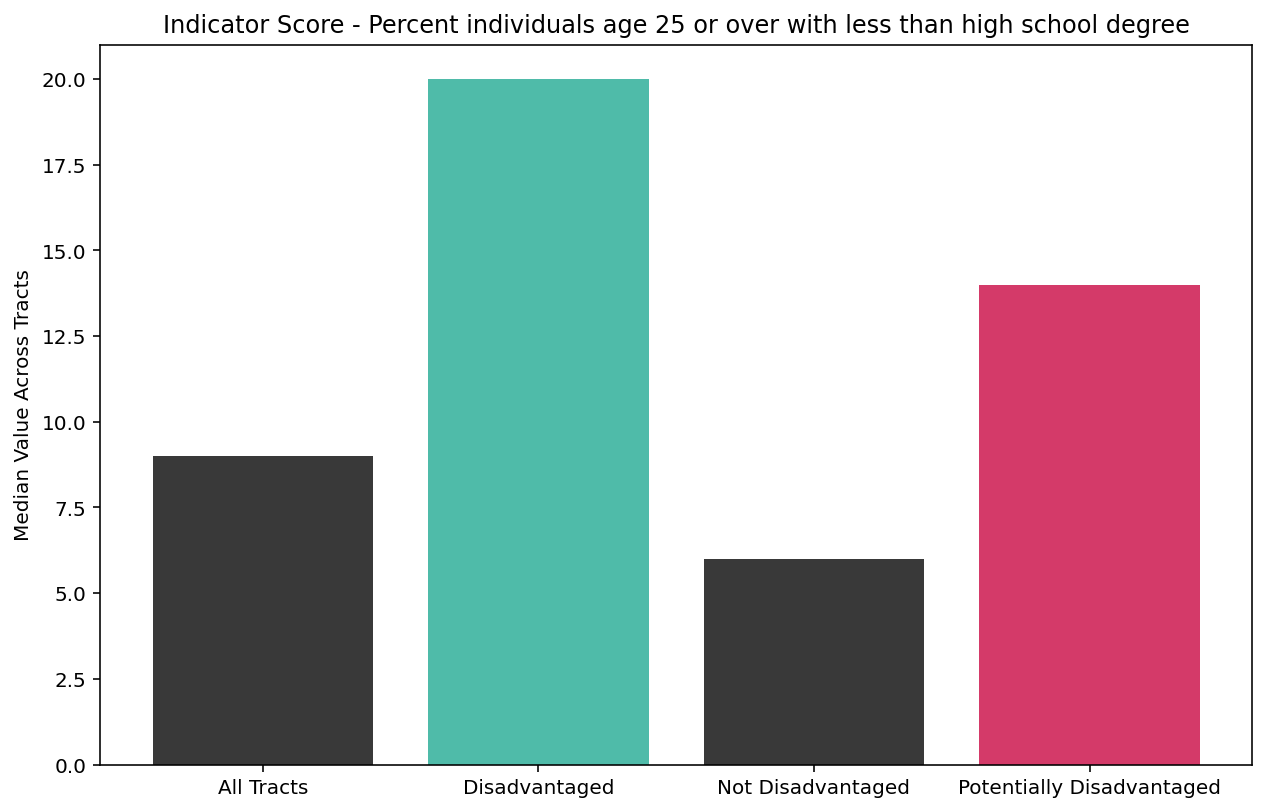

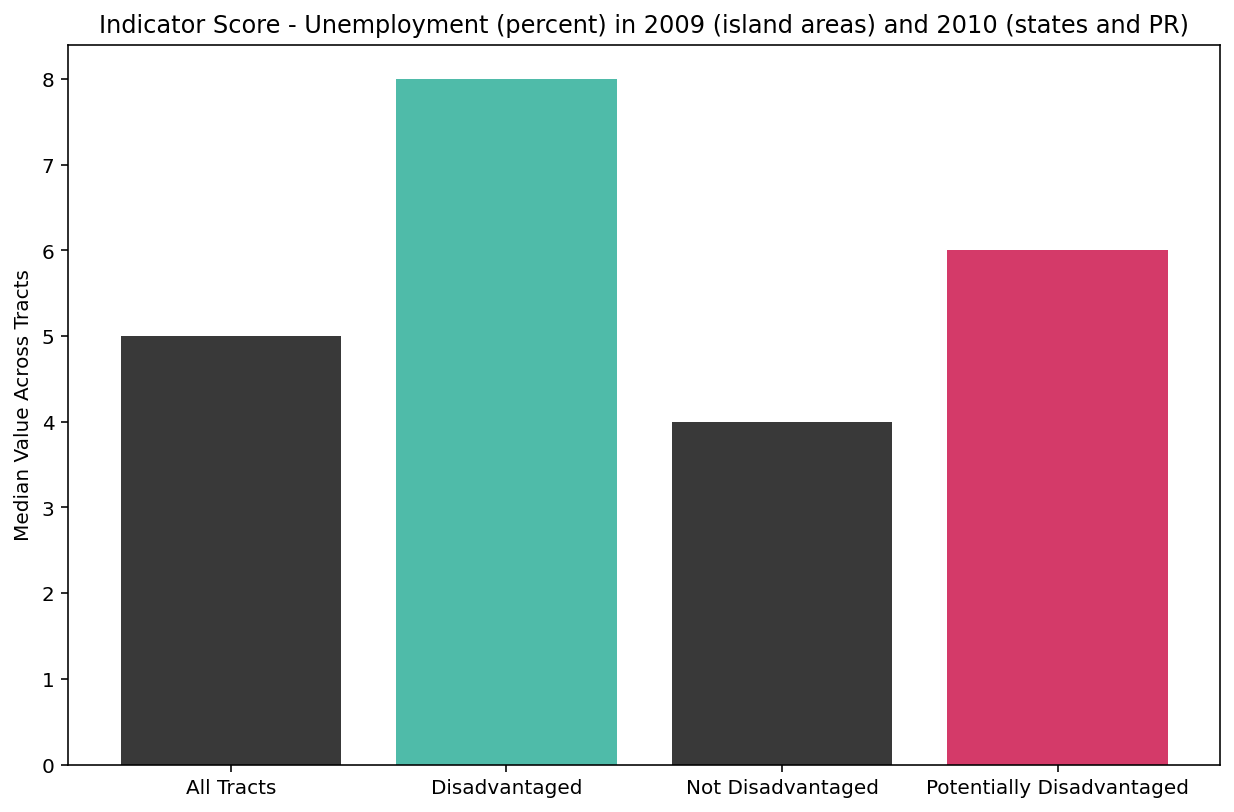

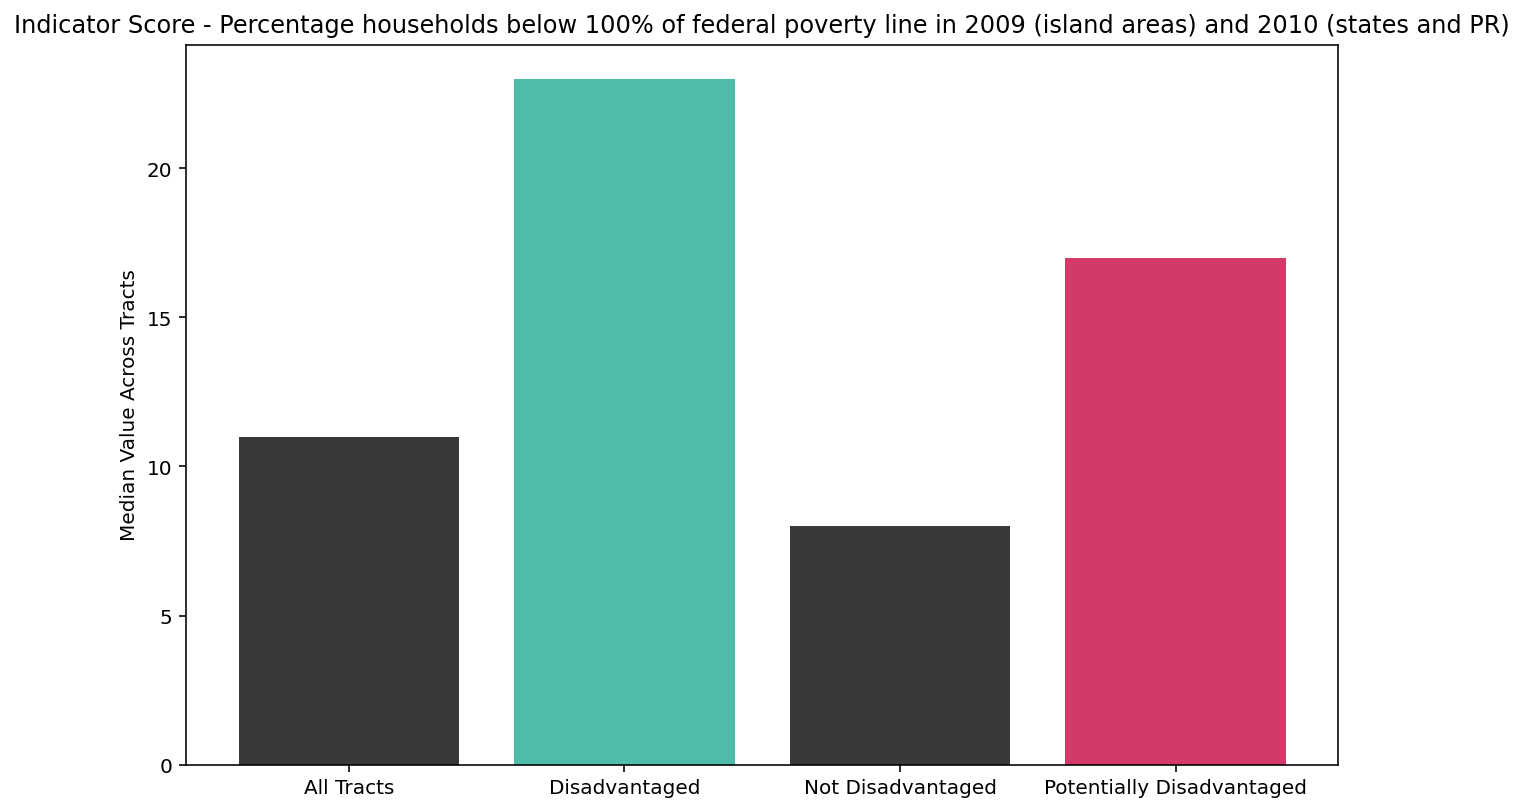

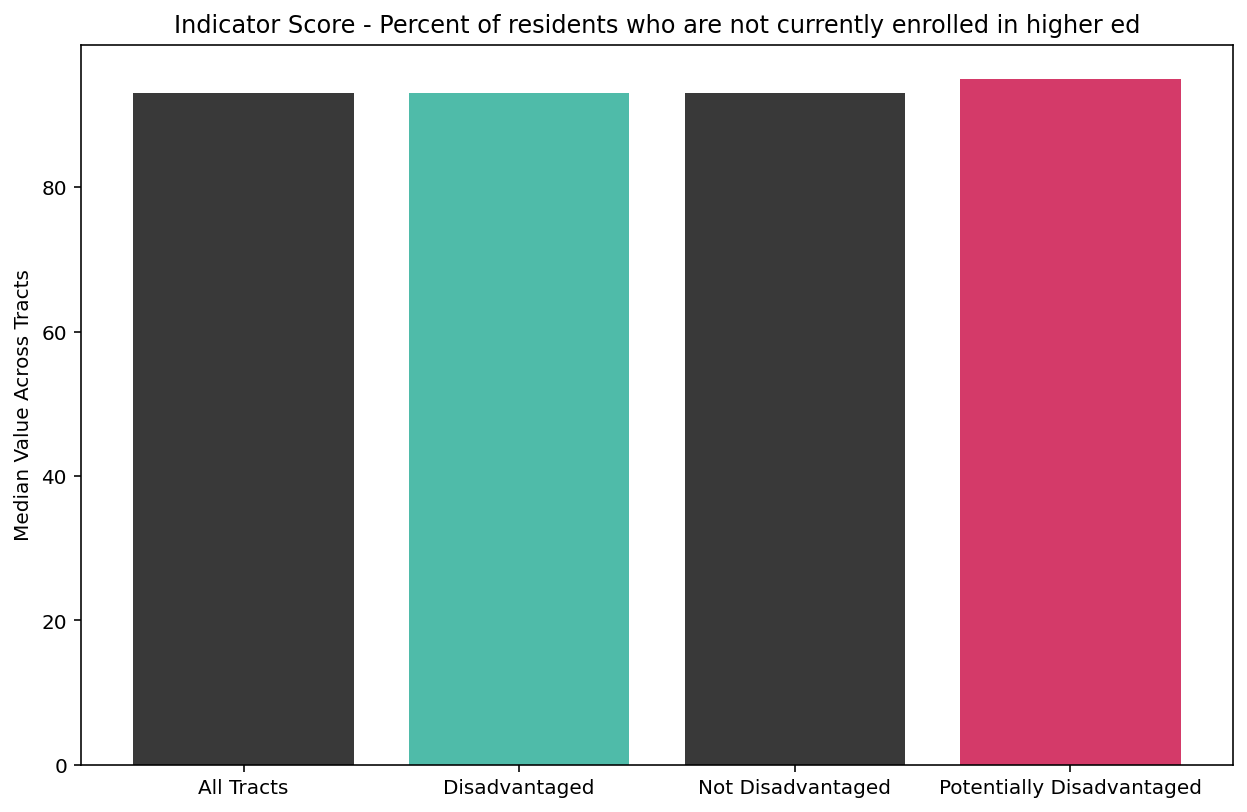

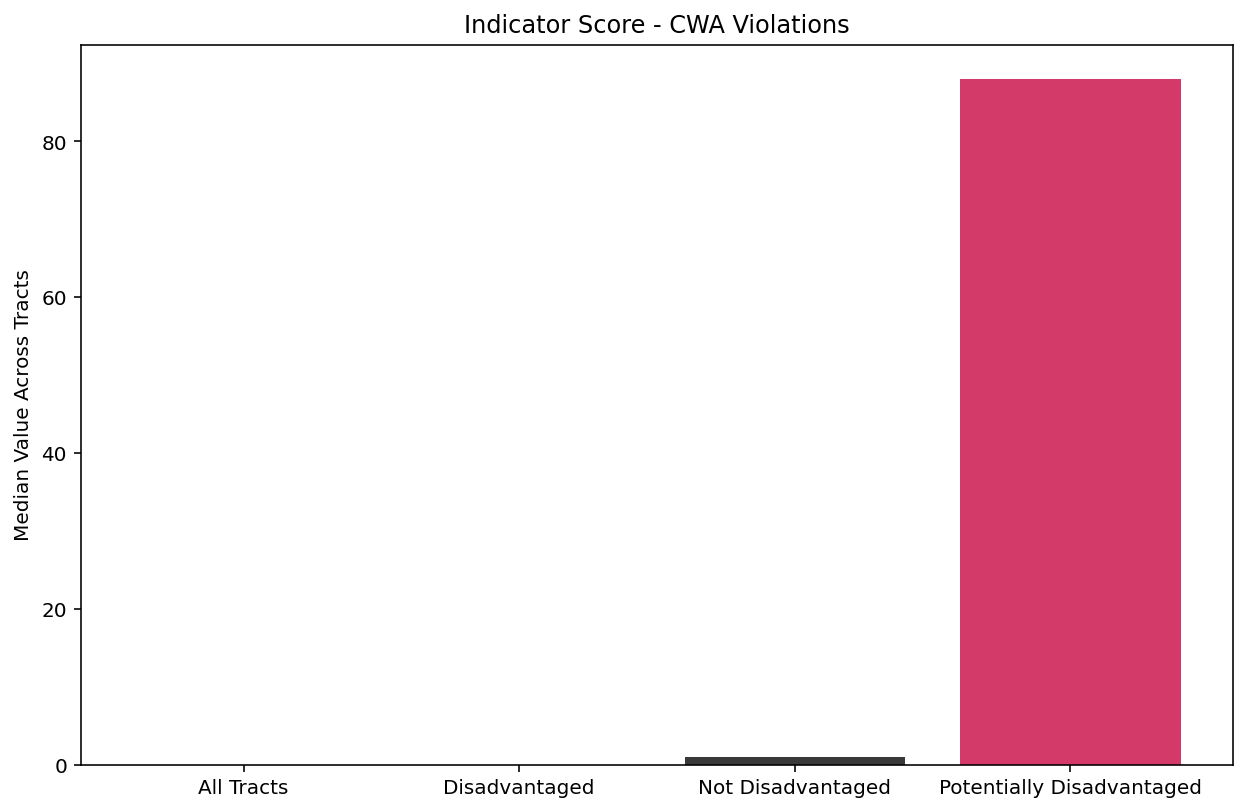

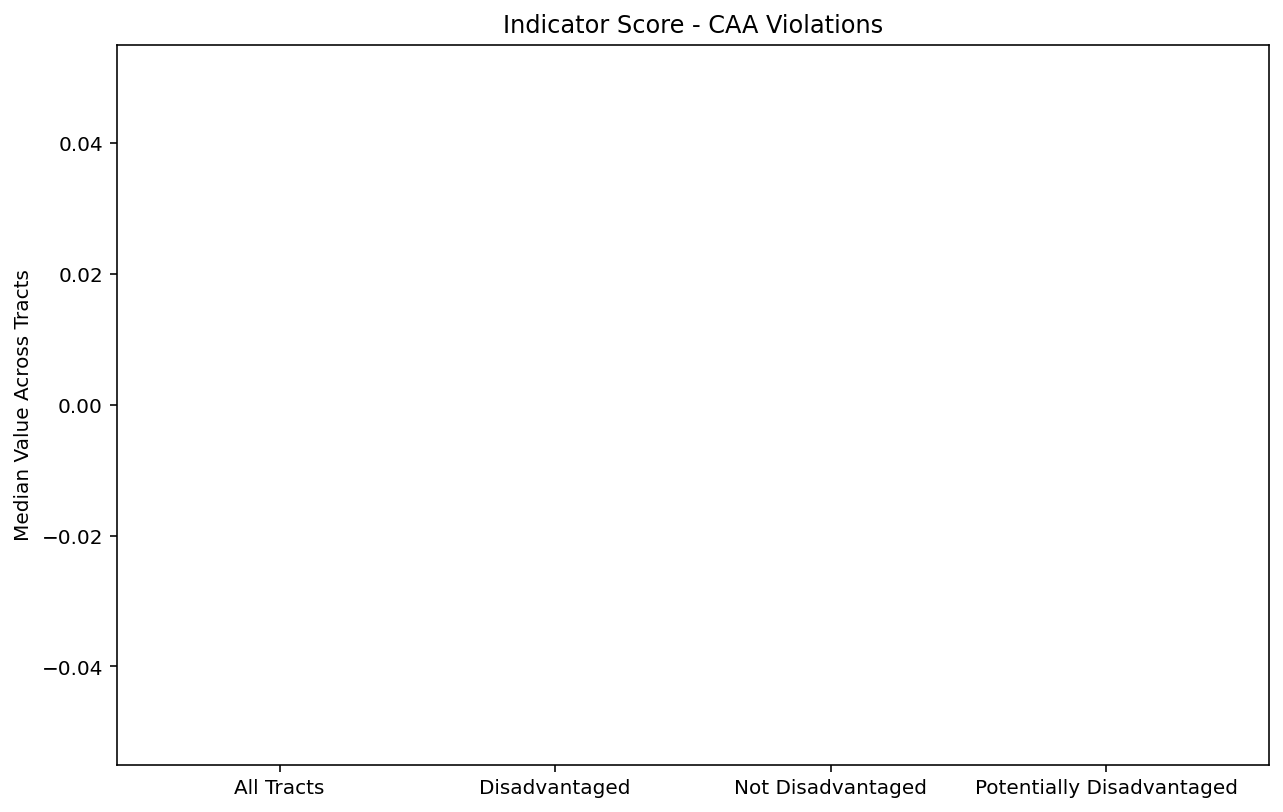

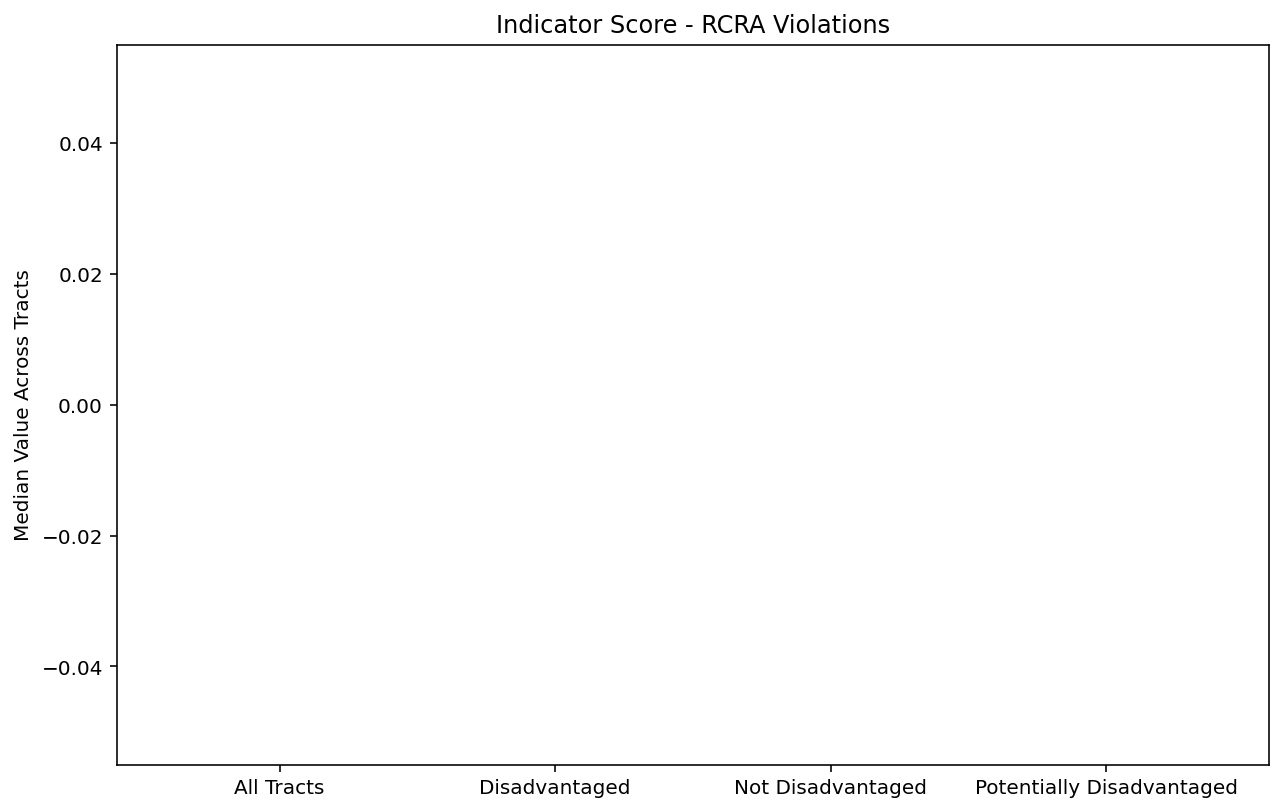

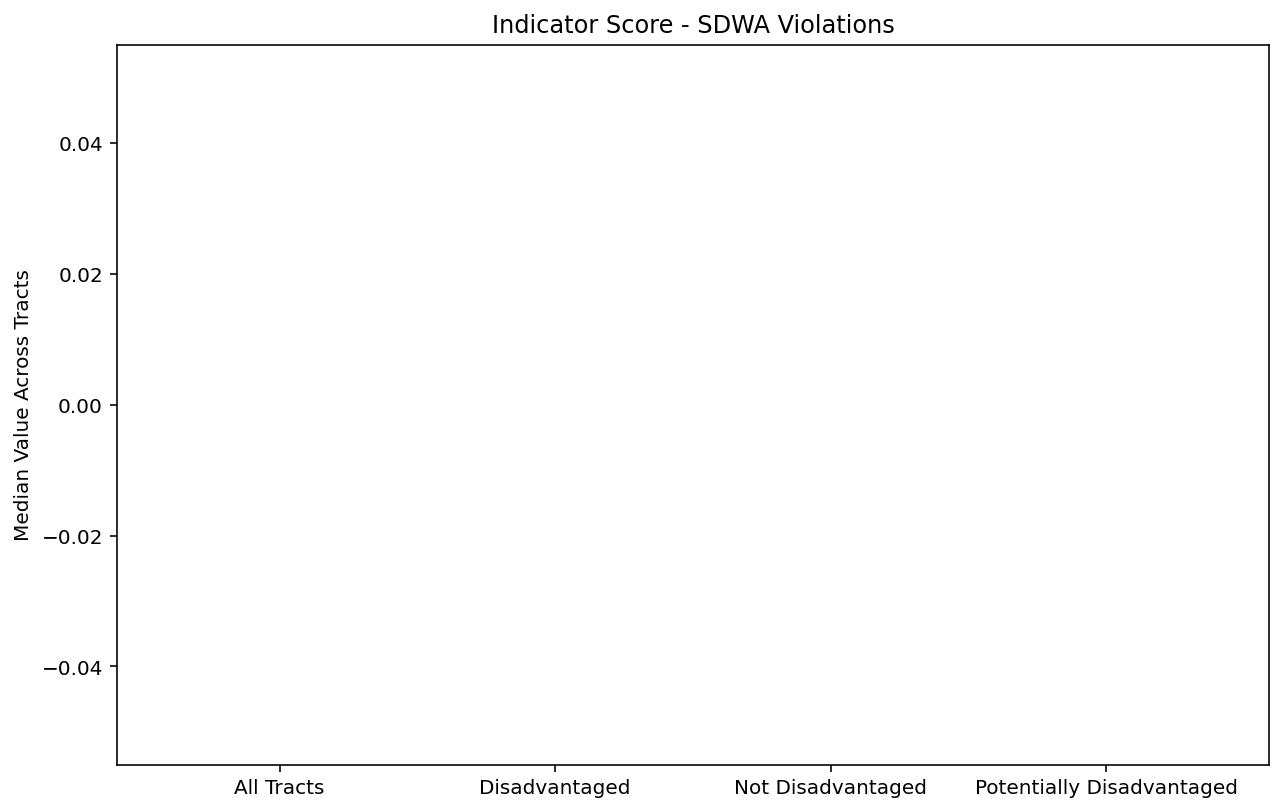

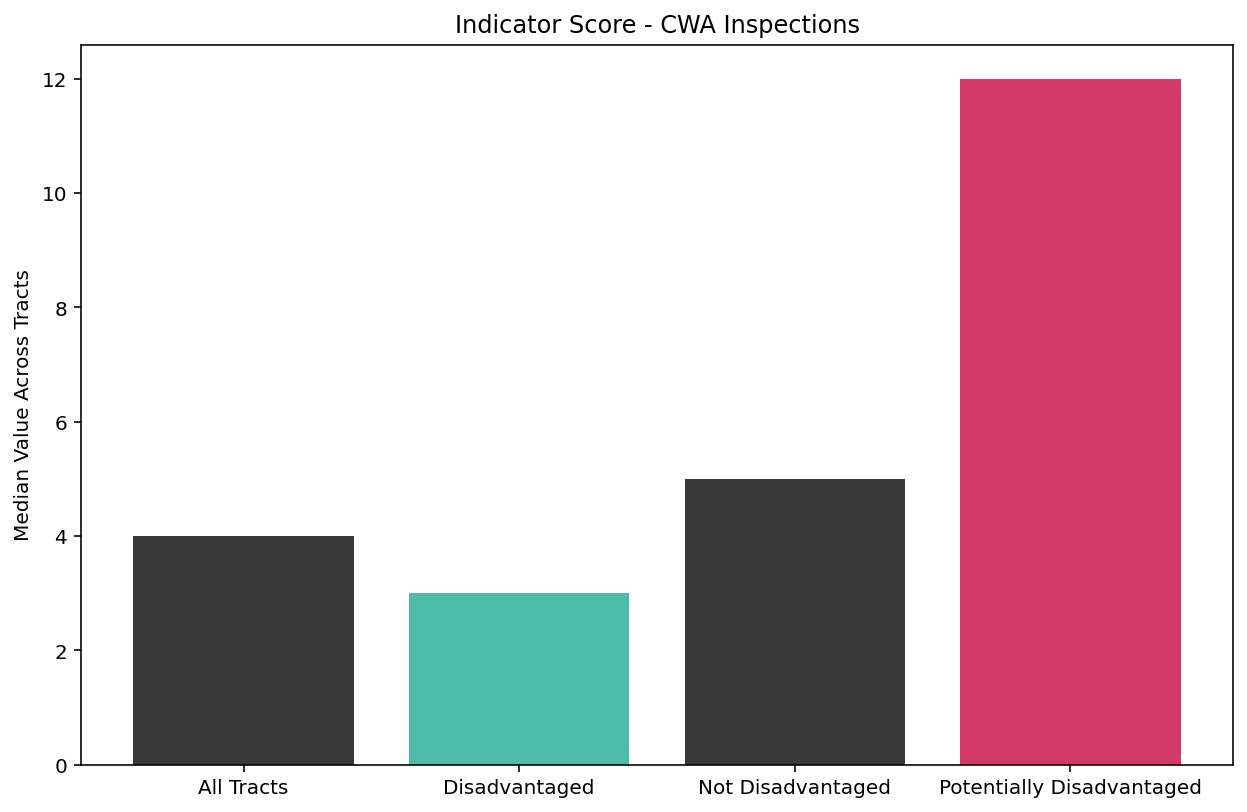

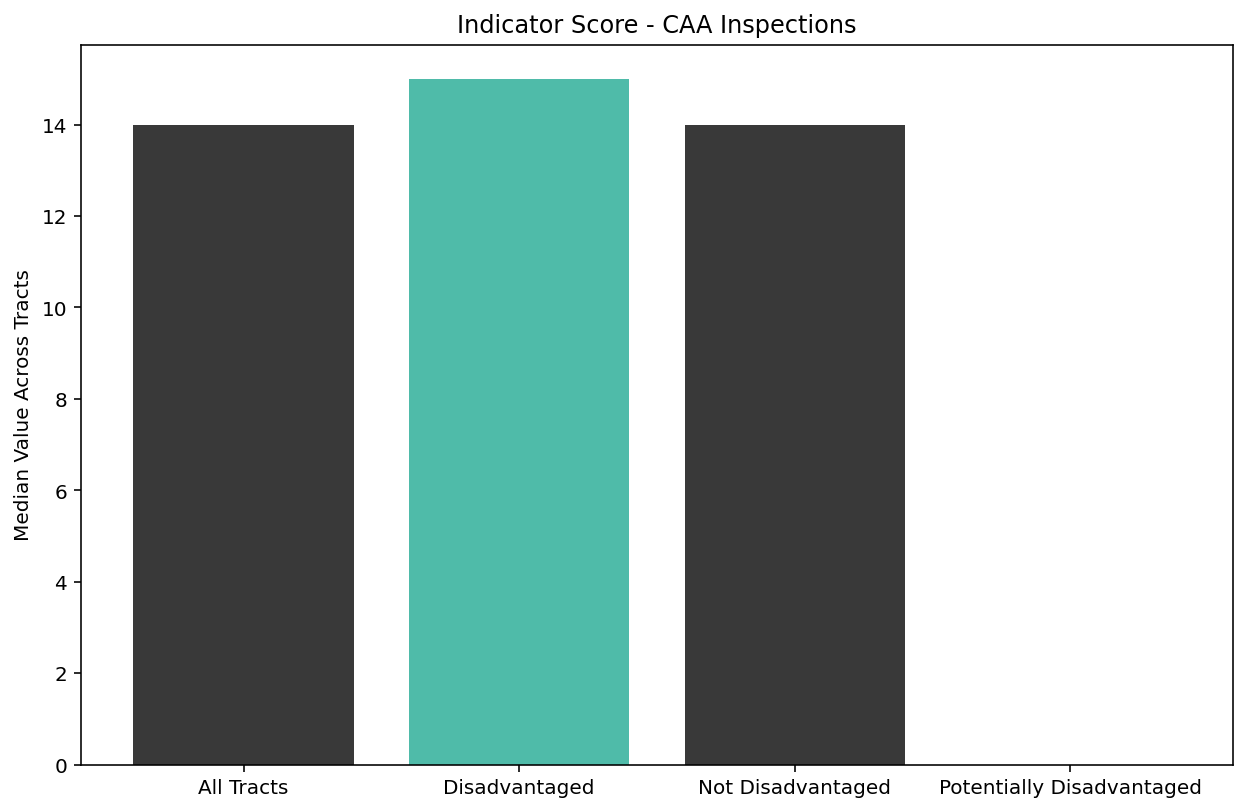

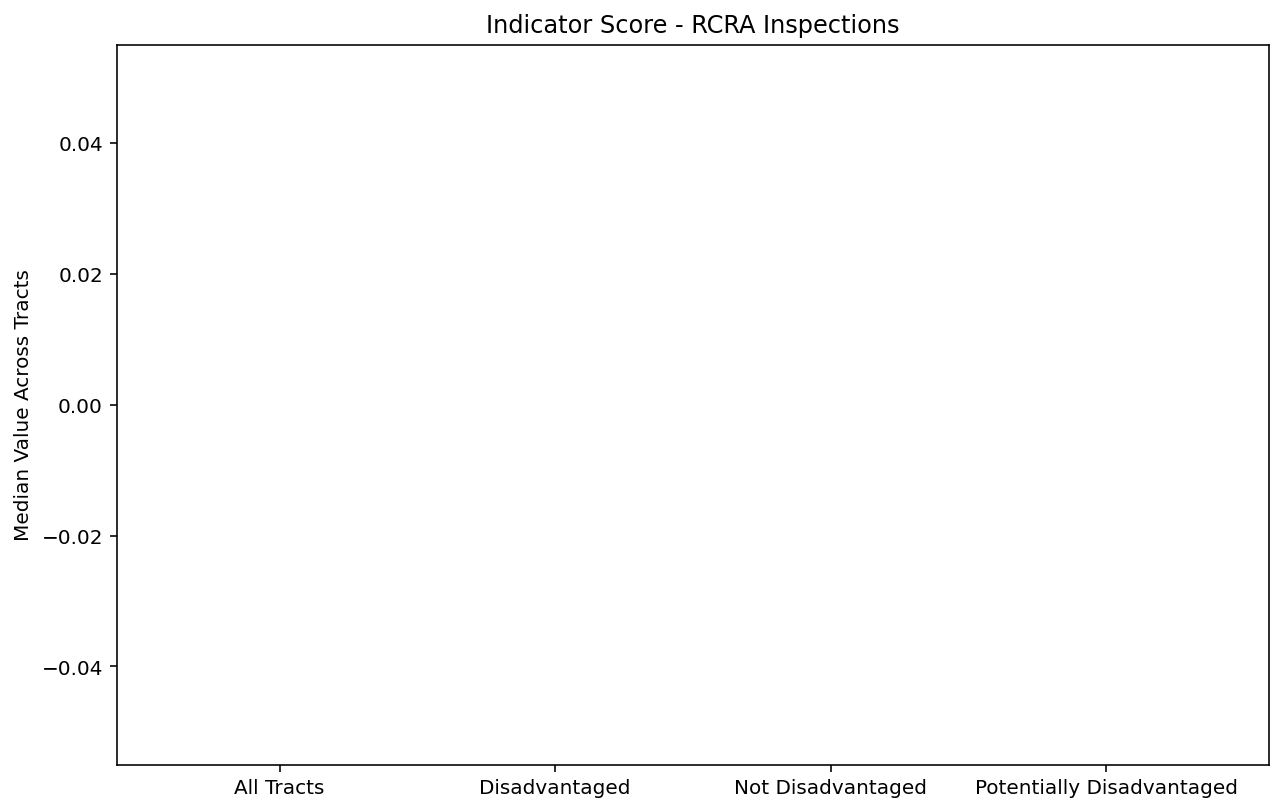

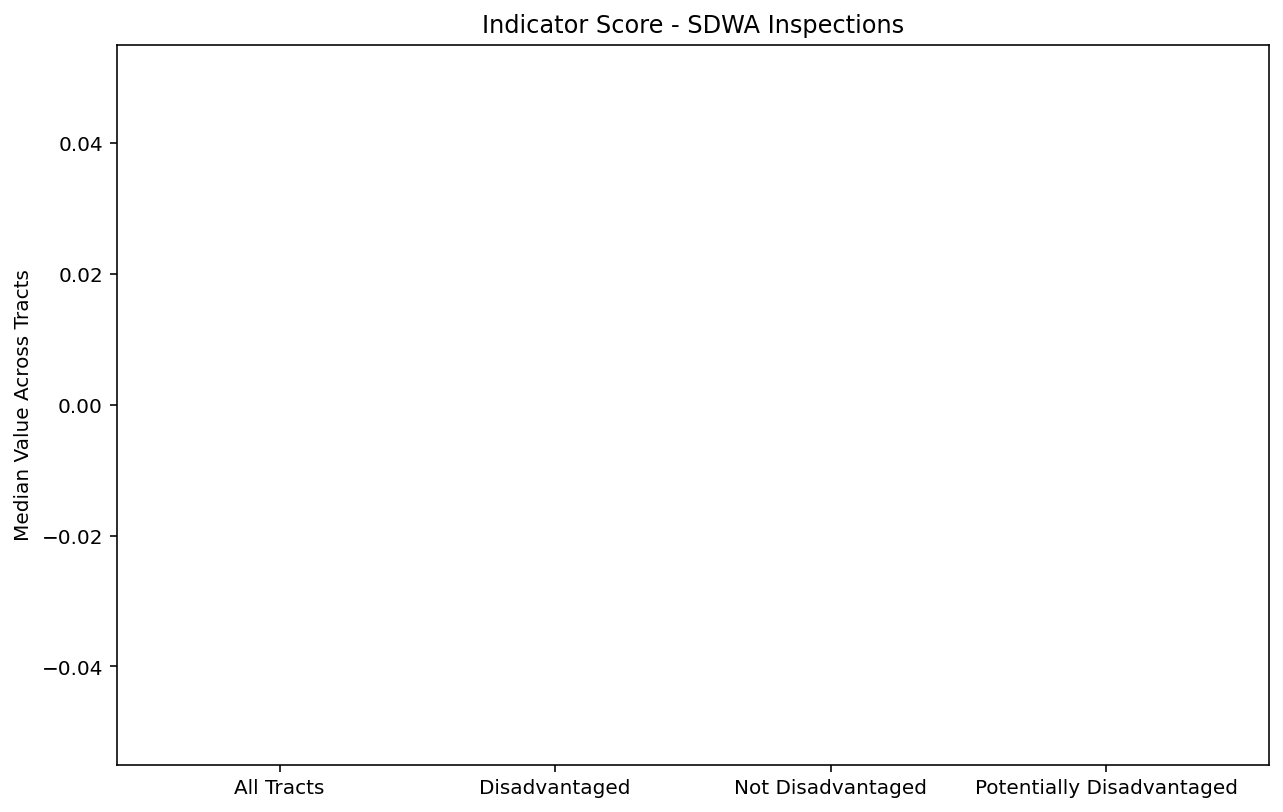

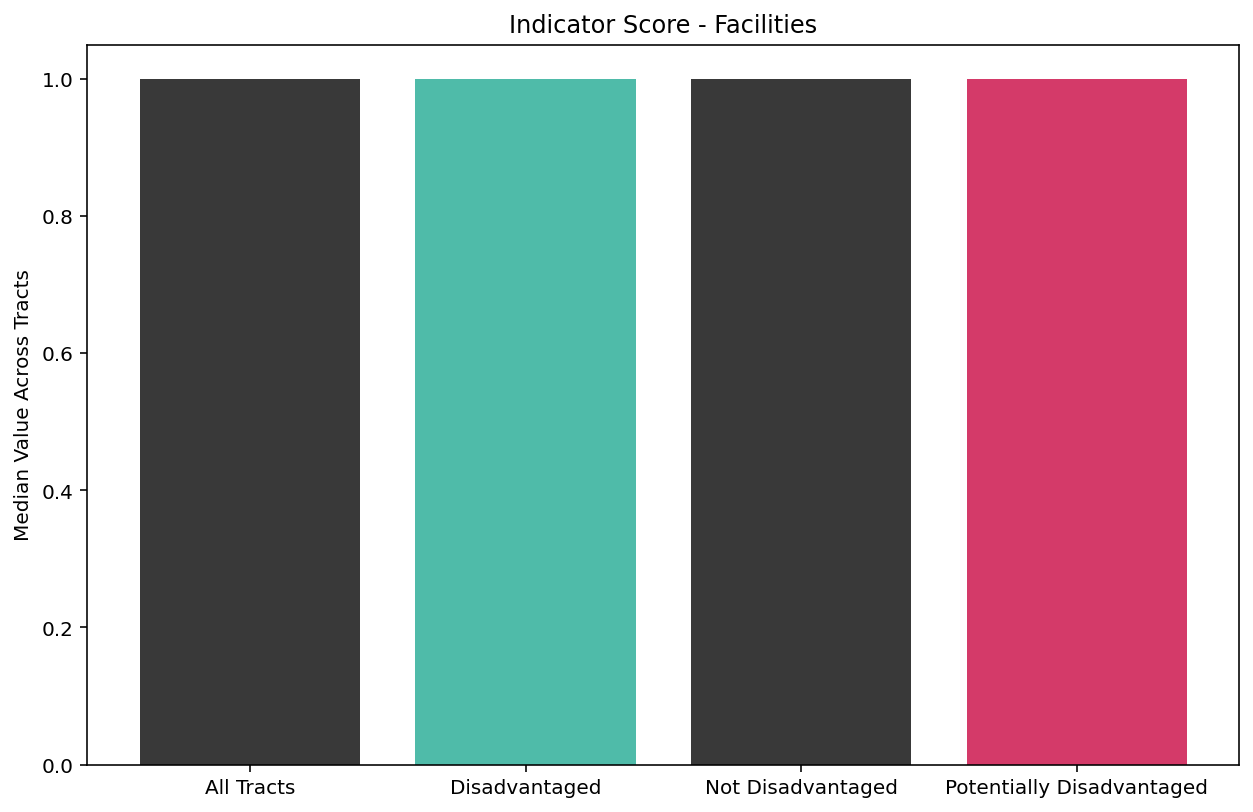

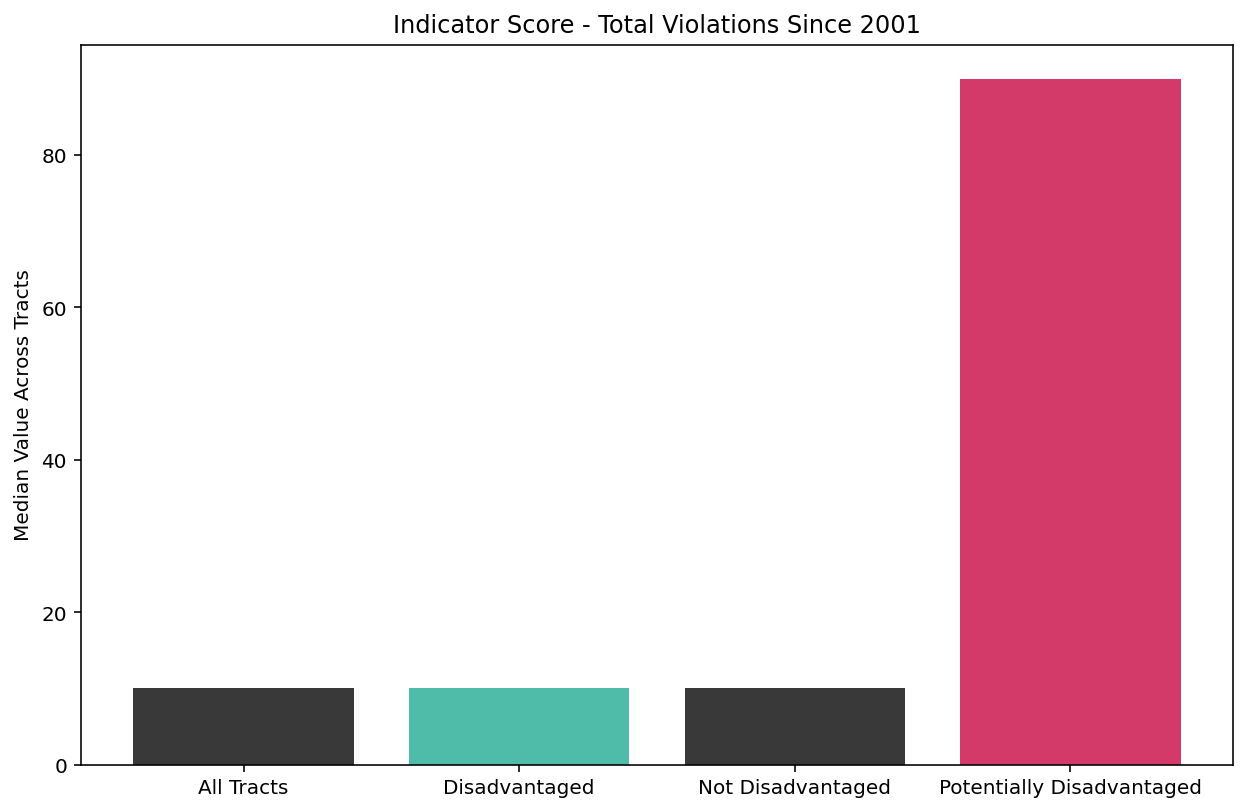

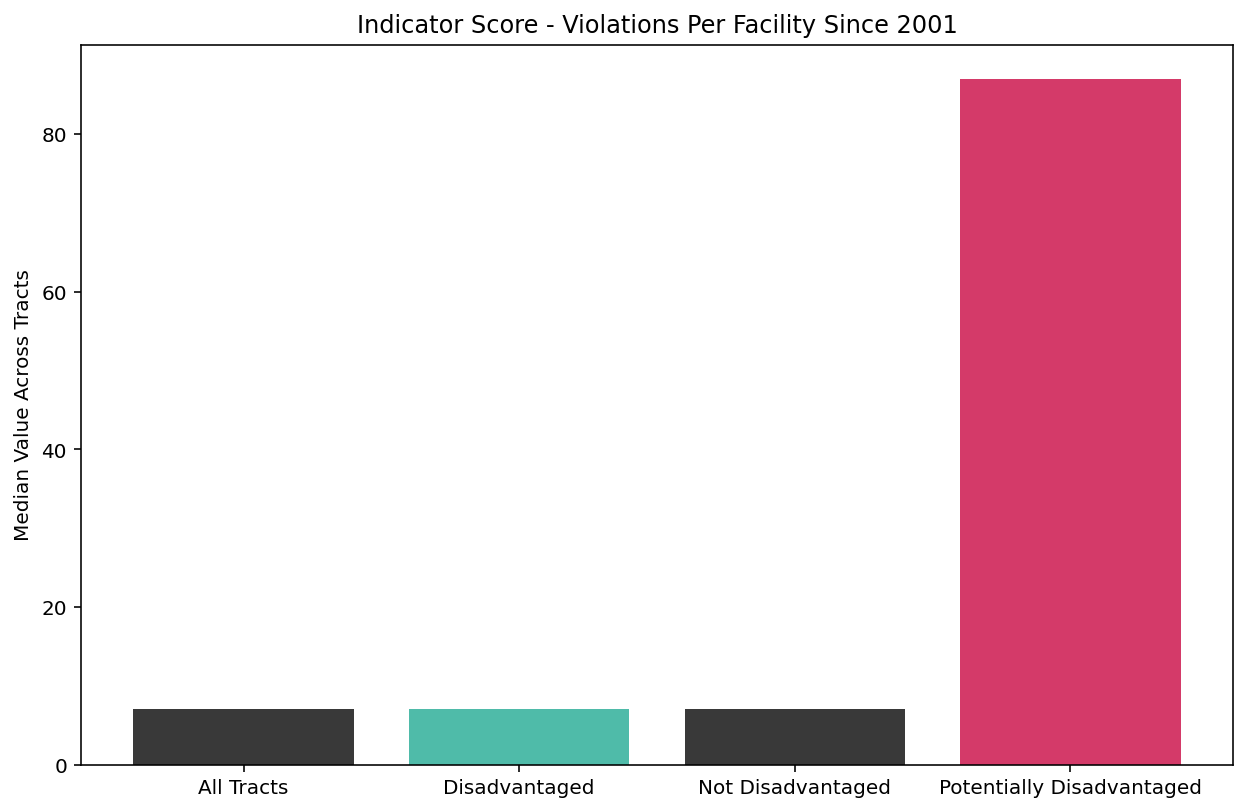

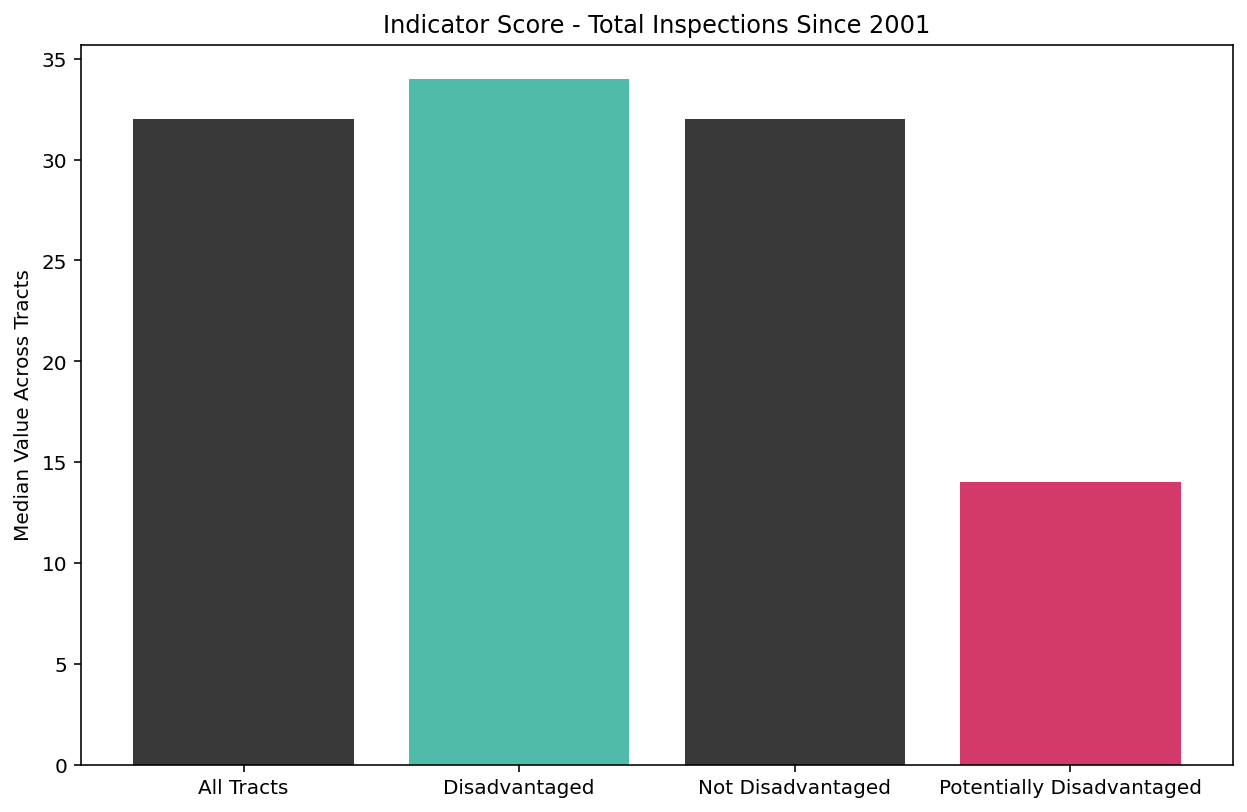

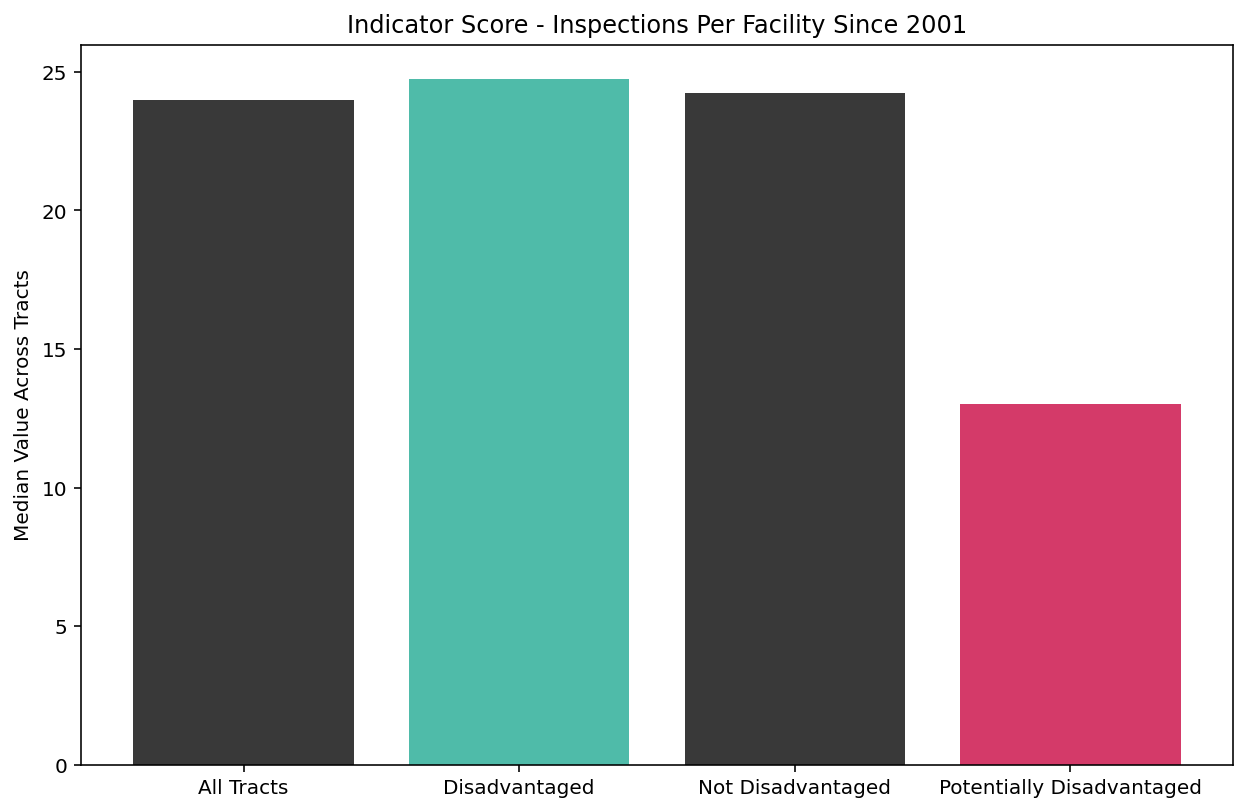

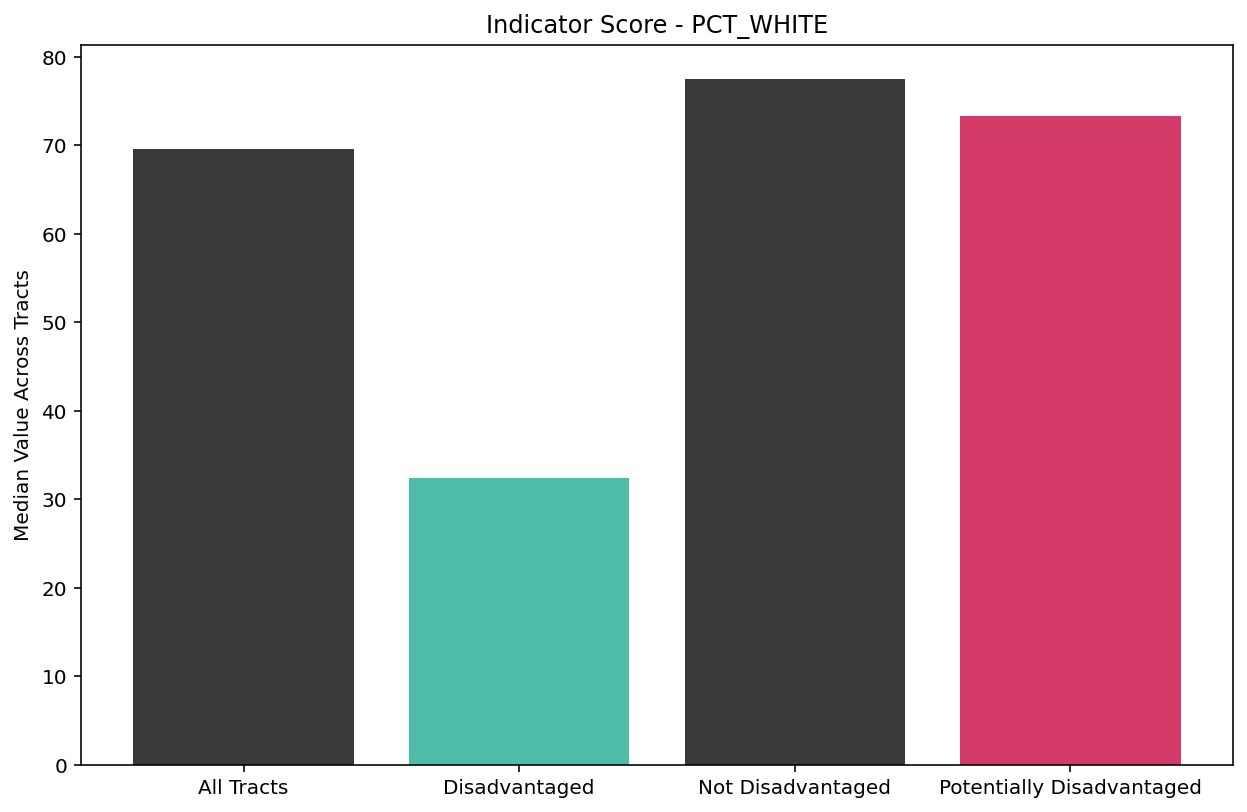

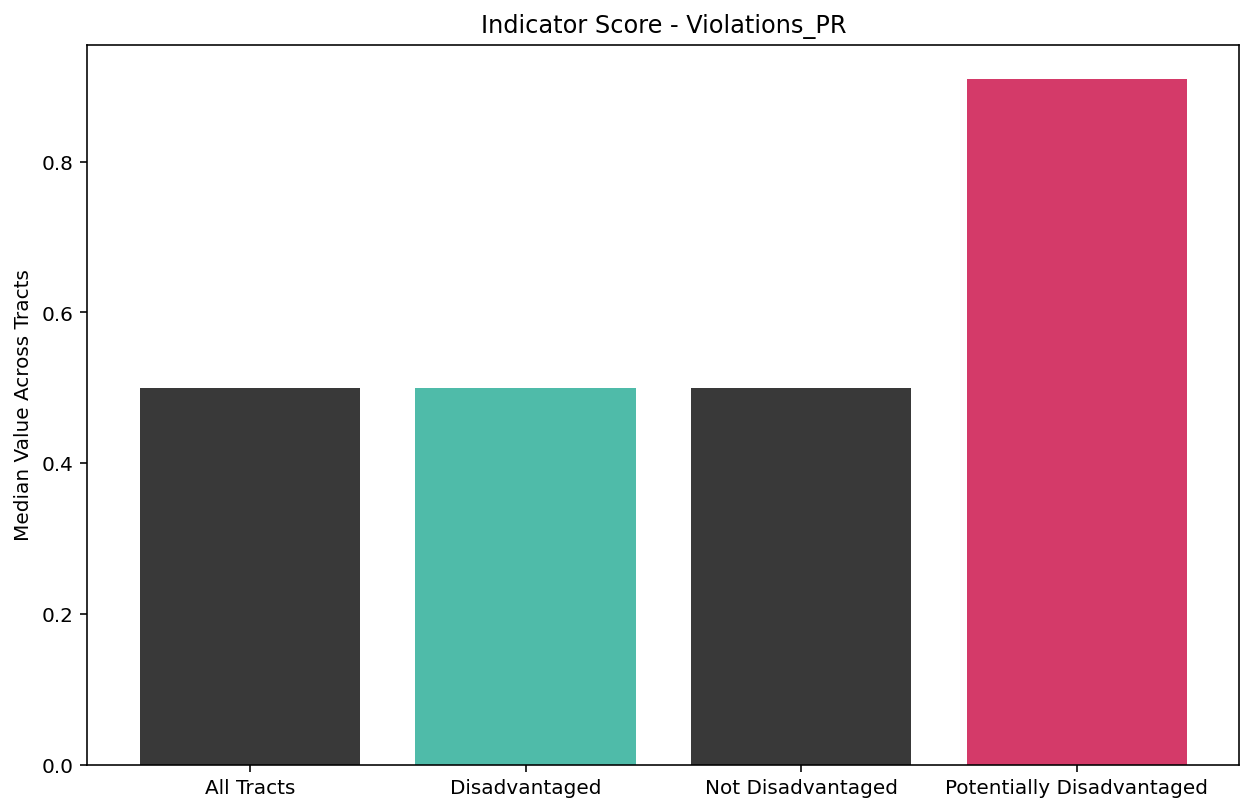

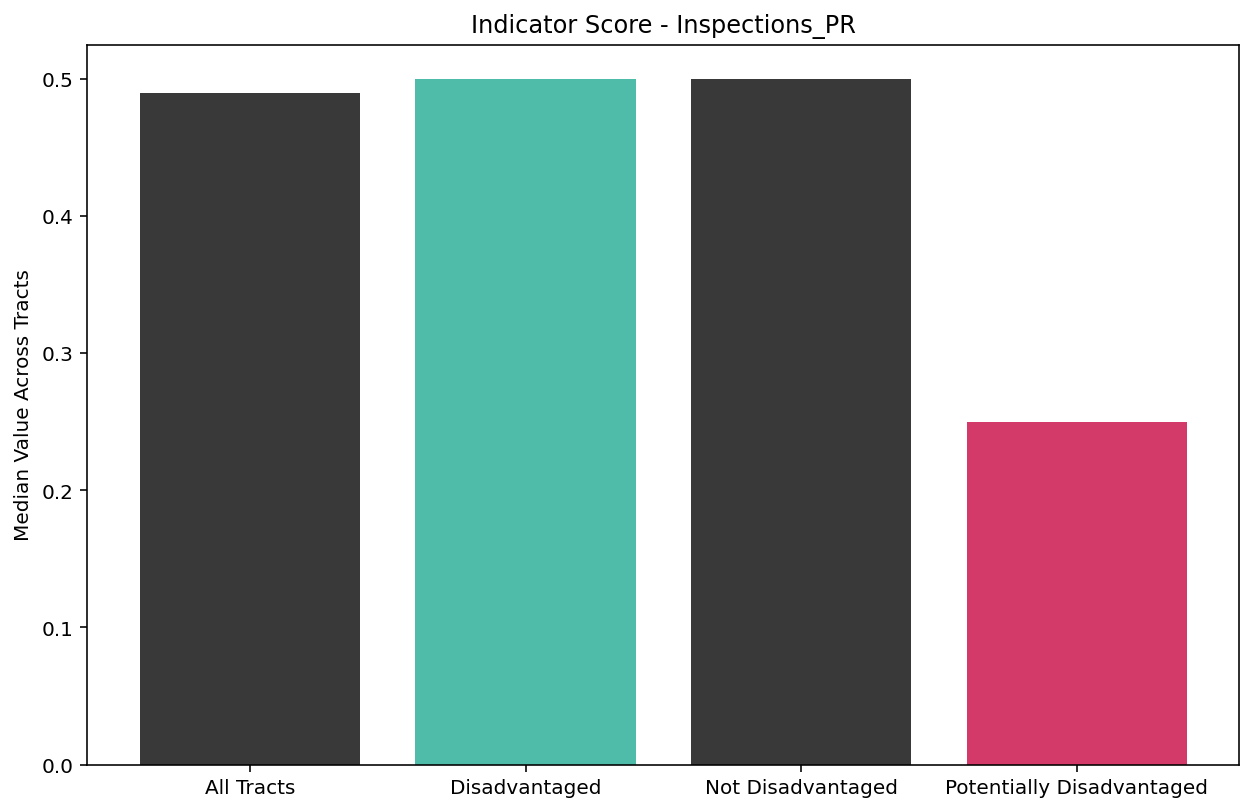

In [11]:
# A more detailed comparison of these potential targets with tracts already identified and those not disadvantaged
idd = joined[joined['Identified as disadvantaged']==True] # Tracts already identified as disdvantaged
nots = joined[(joined['Identified as disadvantaged']==False) & (~(joined.index.isin(list(potentials.index))))] # Tracts not identified as disdvantaged and not targets we have identified

# Calculate the median values for different CEJST indicators
# Report on how these vary across all census tracts, already identified disadvantaged areas, the ones we have identified in our analysis, and not disdavantaged areas
results = []
for c in joined.columns:
  if (joined[c].dtype != bool) & (joined[c].dtype != object): # Skip columns where values are just true/false
    j = round(joined[c].median(), 2) # Round numbers to 2 decimal places
    i = round(idd[c].median(), 2)
    n = round(nots[c].median(), 2)
    p = round(potentials[c].median(),2 )
    results.append({"indicator": c, "All Tracts": j, "Disadvantaged": i, "Not Disadvantaged": n, "Potentially Disadvantaged": p})
results = pandas.DataFrame.from_records(results)
results.set_index("indicator", inplace=True)

for indicator in list(results.index.unique()):
  this = results[results.index == indicator]
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(this.columns, this.values.tolist()[0], color=['#393939', '#4fbba9', '#393939', '#d43a69']) 
  plt.title("Indicator Score - {}".format(indicator))
  plt.ylabel("Median Value Across Tracts")
  plt.show()

In [12]:
# Show where there are significant differences between our approach and CEJST

differences = results.copy() # Make a copy of the results

# Calculate percent differences
for indicator in list(differences.index.unique()): 
  differences.loc[differences.index == indicator, "All Tracts"] = round((differences.loc[differences.index == indicator, "Potentially Disadvantaged"] / 
                                                                   differences.loc[differences.index == indicator, "All Tracts"]) * 100, 2)
  differences.loc[differences.index == indicator, "Disadvantaged"] = round((differences.loc[differences.index == indicator, "Potentially Disadvantaged"] / 
                                                                      differences.loc[differences.index == indicator, "Disadvantaged"]) * 100, 2)
  differences.loc[differences.index == indicator, "Not Disadvantaged"] = round((differences.loc[differences.index == indicator, "Potentially Disadvantaged"] / 
                                                                          differences.loc[differences.index == indicator, "Not Disadvantaged"]) * 100, 2)
  differences.loc[differences.index == indicator, "Potentially Disadvantaged"] = round((differences.loc[differences.index == indicator, "Potentially Disadvantaged"] / 
                                                                          differences.loc[differences.index == indicator, "Potentially Disadvantaged"]) * 100, 2)
differences

All Tracts  Disadvantaged  \
indicator                                                                       
Total threshold criteria exceeded                          NaN           0.00   
Total categories exceeded                                  NaN           0.00   
Total population                                        118.58         130.58   
Expected agricultural loss rate (Natural Hazard...      218.52         655.56   
Expected agricultural loss rate (Natural Hazard...     2000.00            inf   
...                                                        ...            ...   
Total Inspections Since 2001                             43.75          41.18   
Inspections Per Facility Since 2001                      54.17          52.53   
PCT_WHITE                                               105.32         225.83   
Violations_PR                                           182.00         182.00   
Inspections_PR                                           51.02          50.00   

                                                    Not Disadvantaged  \
indicator                                                               
Total threshold criteria exceeded                                 NaN   
Total categories exceeded                                         NaN   
Total population                                               113.76   
Expected agricultural loss rate (Natural Hazard...             178.79   
Expected agricultural loss rate (Natural Hazard...             666.67   
...                                                               ...   
Total Inspections Since 2001                                    43.75   
Inspections Per Facility Since 2001                             53.61   
PCT_WHITE                                                       94.54   
Violations_PR                                                  182.00   
Inspections_PR                                                  50.00   

                                                    Potentially Disadvantaged  
indicator                                                                      
Total threshold criteria exceeded                                         NaN  
Total categories exceeded                                                 NaN  
Total population                                                        100.0  
Expected agricultural loss rate (Natural Hazard...                      100.0  
Expected agricultural loss rate (Natural Hazard...                      100.0  
...                                                                       ...  
Total Inspections Since 2001                                            100.0  
Inspections Per Facility Since 2001                                     100.0  
PCT_WHITE                                                               100.0  
Violations_PR                                                           100.0  
Inspections_PR                                                          100.0  

[70 rows x 4 columns]

In [13]:
# Output shows how much greater or less than the "potentially disadvantaged" median is for each indicator in relation to the other kinds of tracts
# >100 = Potentially disadvantaged areas have a *higher* median (e.g. a higher median population) than all US Census tracts or disadvantaged tracts or not disadvantaged tracts
# <100 = Potentially disadvantaged areas have a *lower* median (e.g. a lower median percent white population)
# NaNs and infs represent situations with 0s as denominators i.e. indicators for which the potentially disdvantaged areas have 0s as the median

# We'll first focus on indicators where potentially disadvantaged areas have higher medians than already identified disadvantaged areas
differences[differences["Disadvantaged"] > 100]

All Tracts  Disadvantaged  \
indicator                                                                       
Total population                                        118.58         130.58   
Expected agricultural loss rate (Natural Hazard...      218.52         655.56   
Expected agricultural loss rate (Natural Hazard...     2000.00            inf   
Expected building loss rate (Natural Hazards Ri...      126.00         128.57   
Expected building loss rate (Natural Hazards Ri...      200.00         200.00   
Expected population loss rate (Natural Hazards ...      128.00         128.00   
Median value ($) of owner-occupied housing unit...       52.00         118.18   
Median value ($) of owner-occupied housing units         64.89         109.11   
Life expectancy (years)                                  97.07         100.93   
Median household income as a percent of area me...       84.95         121.54   
Percent of residents who are not currently enro...      102.15         102.15   
CWA Violations                                             inf            inf   
CWA Inspections                                         300.00         400.00   
Total Violations Since 2001                             900.00         900.00   
Violations Per Facility Since 2001                     1242.86        1242.86   
PCT_WHITE                                               105.32         225.83   
Violations_PR                                           182.00         182.00   

                                                    Not Disadvantaged  \
indicator                                                               
Total population                                               113.76   
Expected agricultural loss rate (Natural Hazard...             178.79   
Expected agricultural loss rate (Natural Hazard...             666.67   
Expected building loss rate (Natural Hazards Ri...             126.00   
Expected building loss rate (Natural Hazards Ri...             200.00   
Expected population loss rate (Natural Hazards ...             130.61   
Median value ($) of owner-occupied housing unit...              44.07   
Median value ($) of owner-occupied housing units                53.38   
Life expectancy (years)                                         95.74   
Median household income as a percent of area me...              73.15   
Percent of residents who are not currently enro...             102.15   
CWA Violations                                                8800.00   
CWA Inspections                                                240.00   
Total Violations Since 2001                                    900.00   
Violations Per Facility Since 2001                            1242.86   
PCT_WHITE                                                       94.54   
Violations_PR                                                  182.00   

                                                    Potentially Disadvantaged  
indicator                                                                      
Total population                                                        100.0  
Expected agricultural loss rate (Natural Hazard...                      100.0  
Expected agricultural loss rate (Natural Hazard...                      100.0  
Expected building loss rate (Natural Hazards Ri...                      100.0  
Expected building loss rate (Natural Hazards Ri...                      100.0  
Expected population loss rate (Natural Hazards ...                      100.0  
Median value ($) of owner-occupied housing unit...                      100.0  
Median value ($) of owner-occupied housing units                        100.0  
Life expectancy (years)                                                 100.0  
Median household income as a percent of area me...                      100.0  
Percent of residents who are not currently enro...                      100.0  
CWA Violations                                                          100.0  
CWA 

In [14]:
# Indicators where our "potentially disadvantaged areas" have lower median scores than already identified disadvantaged areas
differences[differences["Disadvantaged"] < 100 ]

All Tracts  Disadvantaged  \
indicator                                                                       
Total threshold criteria exceeded                          NaN           0.00   
Total categories exceeded                                  NaN           0.00   
Energy burden (percentile)                              134.69          88.00   
Energy burden                                           150.00          75.00   
PM2.5 in the air (percentile)                            99.00          88.39   
PM2.5 in the air                                         99.88          97.93   
Diesel particulate matter exposure (percentile)          64.00          55.17   
Diesel particulate matter exposure                       66.67          56.52   
Traffic proximity and volume (percentile)                74.00          62.71   
Traffic proximity and volume                             57.70          39.54   
Housing burden (percent) (percentile)                   118.00          75.64   
Housing burden (percent)                                113.64          73.53   
Percent pre-1960s housing (lead paint indicator...      100.00          79.03   
Percent pre-1960s housing (lead paint indicator)        100.00          66.67   
Proximity to hazardous waste sites (percentile)          80.00          67.80   
Proximity to hazardous waste sites                       58.49          37.35   
Proximity to NPL sites (percentile)                      52.00          49.06   
Proximity to NPL sites                                   33.33          33.33   
Proximity to Risk Management Plan (RMP) facilit...      120.00          93.75   
Proximity to Risk Management Plan (RMP) facilities      160.00          84.85   
Wastewater discharge (percentile)                       100.00          92.59   
Current asthma among adults aged greater than o...      132.65          84.42   
Current asthma among adults aged greater than o...      106.15          95.23   
Diagnosed diabetes among adults aged greater th...      134.00          82.72   
Diagnosed diabetes among adults aged greater th...      114.42          86.23   
Low life expectancy (percentile)                        144.90          92.21   
Low median household income as a percent of are...      132.00          81.48   
Linguistic isolation (percent) (percentile)              96.00          68.57   
Linguistic isolation (percent)                          100.00          25.00   
Unemployment (percent) (percentile)                     124.00          80.52   
Unemployment (percent)                                  125.00          71.43   
Percent of individuals below 200% Federal Pover...      144.00          87.80   
Percent of individuals < 100% Federal Poverty L...      138.00          85.19   
Percent of individuals below 200% Federal Pover...      143.33          84.31   
Percent of individuals < 100% Federal Poverty Line      154.55          73.91   
Percent individuals age 25 or over with less th...      134.00          82.72   
Percent individuals age 25 or over with less th...      155.56          70.00   
Unemployment (percent) in 2009 (island areas) a...      120.00          75.00   
Percentage households below 100% of federal pov...      154.55          73.91   
CAA Inspections                                           0.00           0.00   
Total Inspections Since 2001                             43.75          41.18   
Inspections Per Facility Since 2001                      54.17          52.53   
Inspections_PR                                           51.02          50.00   

                                                    Not Disadvantaged  \
indicator                                                               
Total threshold criteria exceeded                                 NaN   
Total categories exceeded                                         NaN   
Energy burden (percentile)                                     173.68   
Energy burden                            

## 2. *Evaluate* "disdvantaged areas" in terms of structural factors including industry types present across these areas

In [15]:
# We'll return to the EPA ECHO data to see if we can determine some commonalities in what CEJST has identified as "disadvantaged areas"
# We'll look at NAICS codes for these facilities to see if there are common industries
# First, we'll get the Census tracts id'd as "disadvantaged"
tracts = list(idd.index.unique())
# Look up the disadvantaged tracts
facs_in_tracts = echo_data.loc[echo_data.index.isin(tracts)] ## 4813 tracts out of 23,000 already identified as disadvantaged have major facilities
facs_in_tracts['Facilities'].sum() # 8350 or about 33% of the 25,000 major facilities EPA monitors, are in census tracts CEJST identified as disdavantaged
facs_in_tracts

CWA Violations  CAA Violations  RCRA Violations  \
FAC_DERIVED_CB2010                                                    
01005950200                    0.0             0.0              0.0   
01005950300                    1.0             0.0              1.0   
01005950500                    0.0             0.0              0.0   
01005950600                    0.0             1.0              0.0   
01005950700                   27.0             2.0              0.0   
...                            ...             ...              ...   
72151950600                    0.0             0.0              0.0   
72151951000                  569.0             0.0              0.0   
72151951300                  183.0             0.0              0.0   
72153750300                    0.0             1.0              3.0   
72153750601                 1274.0             0.0              0.0   

                    SDWA Violations  CWA Inspections  CAA Inspections  \
FAC_DERIVED_CB2010                                                      
01005950200                     0.0              1.0              6.0   
01005950300                     0.0              9.0             14.0   
01005950500                     0.0              0.0             46.0   
01005950600                     0.0              3.0             46.0   
01005950700                     0.0              2.0             48.0   
...                             ...              ...              ...   
72151950600                     0.0              0.0              8.0   
72151951000                     0.0             36.0              0.0   
72151951300                     1.0             17.0             84.0   
72153750300                     0.0              0.0             18.0   
72153750601                     0.0             34.0              0.0   

                    RCRA Inspections  SDWA Inspections  Facilities  \
FAC_DERIVED_CB2010                                                   
01005950200                      0.0               0.0           2   
01005950300                      3.0               0.0           1   
01005950500                      0.0               0.0           1   
01005950600                      0.0               0.0           1   
01005950700                      0.0               0.0           1   
...                              ...               ...         ...   
72151950600                      0.0               0.0           2   
72151951000                      0.0               0.0           1   
72151951300                      0.0               0.0           1   
72153750300                     17.0               0.0           1   
72153750601                      0.0               0.0           1   

                                                   FAC_NAICS_CODES  \
FAC_DERIVED_CB2010                                                   
01005950200                                          321219 321219   
01005950300                                          321114 321912   
01005950500                                          327999 327120   
01005950600                                   212324 236210 327124   
01005950700                                          321113 321999   
...                                                            ...   
72151950600                                          311311 324191   
72151951000                                                  22132   
72151951300         324110 81112 32411 324191 424710 493110 492210   
72153750300                            333999 339999 325221 325220   
72153750601                                                  22132   

                    Total Violations Since 2001  \
FAC_DERIVED_CB2010                                
01005950200                                 0.0   
01005950300                                 2.0   
01005950500                                 0.0   
01005950600                                 1.0   
01005950700       

In [97]:
# There are many factors that CEJST uses to determine whether a tract is "disadvantaged" and not all of them are driven by industrial facilities
# For instance, traffic pollution, expected agricultural losses, and workforce development scores can each make a tract "count" as disadvantaged
# But they aren't things driven by industrial polluters EPA regulates and reports on in ECHO

# That said, many of the CEJST categories that count, even ones that don't seem connected to facilities, like asthma rates, are very relevant
# Let's look more closely at the NAICS codes for facilities in identified tracts
# Look up the codes in a NAICS lookup table to determine industries
# We will load in a file that tells us about the type of industry facilities are classified as
codes = pandas.read_excel("https://www.census.gov/naics/2017NAICS/6-digit_2017_Codes.xlsx",
  header = 0, # the row that represents the header
  converters={'2017 NAICS Code':str,'2017 NAICS Title':str}
)
codes = codes[["2017 NAICS Code", "2017 NAICS Title"]]
codes["# of Facilities"] = 0
codes["# of Tracts"] = 0

tractwise=dict((n,[]) for n in list(codes['2017 NAICS Code'].unique())) # For counting the number of tracts that a facility code falls within

ff_tracts = [] # Counting the unique number of tracts home to any fossil fuel-related industries
ff = ["Fossil Fuel Electric Power Generation ","Pipeline Transportation of Natural Gas", "All Other Plastics Product Manufacturing ",
      "Natural Gas Extraction ", "Petroleum Bulk Stations and Terminals ", "Plastics Material and Resin Manufacturing ",
      "Petrochemical Manufacturing", "Petroleum Refineries", "Plastics Packaging Film and Sheet (including Laminated) Manufacturing"]

# Now we will replace each facility's NAICS code with its NAICS title
# This may take some time!
def counter(row):
  n = row["FAC_NAICS_CODES"]
  n = str(n).split(" ")
  for c in n:
    codes.loc[codes["2017 NAICS Code"] == c, "# of Facilities"] += 1 # Is the code in the NAICS lookup? If so, count it
    if codes.loc[codes["2017 NAICS Code"] == c].shape[0] > 0: # Is the code in the NAICS lookup? Record it as in this tract
      tractwise[c].append(row.name) #["FAC_DERIVED_CB2010"]
      if (list(codes.loc[codes["2017 NAICS Code"] == c]["2017 NAICS Title"])[0] in ff):
        ff_tracts.append(row.name)
    #return codes.loc[codes["2017 NAICS Code"] == c]["2017 NAICS Title"]

  #display(codes.loc[codes["2017 NAICS Code"].isin(n)]) # Debugging
echo_data.apply (lambda row: counter(row), axis=1)

for code, ts in tractwise.items():
  count = len(set(ts)) #[ (i,tracts.count(i)) for i in set(tracts) ]
  codes.loc[codes['2017 NAICS Code'] == code, "# of Tracts"] = count

codes

2017 NAICS Code                                   2017 NAICS Title  \
0                NaN                                                NaN   
1             111110                                    Soybean Farming   
2             111120                  Oilseed (except Soybean) Farming    
3             111130                          Dry Pea and Bean Farming    
4             111140                                      Wheat Farming   
...              ...                                                ...   
1053          926140  Regulation of Agricultural Marketing and Commo...   
1054          926150  Regulation, Licensing, and Inspection of Misce...   
1055          927110                     Space Research and Technology    
1056          928110                                 National Security    
1057          928120                             International Affairs    

      # of Facilities  # of Tracts  
0                   0            0  
1                   5            5  
2                   2            2  
3                   0            0  
4                   1            1  
...               ...          ...  
1053                2            2  
1054                0            0  
1055               13           13  
1056              222          206  
1057                0            0  

[1058 rows x 4 columns]

In [90]:
# Note that the NAICS numbers will add up to more than the number of facilities in disadvantaged tracts
# A facility can have, and often does have, multiple NAICS codes associated with it
# Let's sort and rank these. First, in termsere are the top 20 industry categories:
codes.sort_values(by=["# of Facilities"], ascending=False).head(20)

2017 NAICS Code                                   2017 NAICS Title  \
94            221112             Fossil Fuel Electric Power Generation    
105           221320                       Sewage Treatment Facilities    
666           486210             Pipeline Transportation of Natural Gas   
877           562212                              Solid Waste Landfill    
284           326199          All Other Plastics Product Manufacturing    
251           325199    All Other Basic Organic Chemical Manufacturing    
66            211130                            Natural Gas Extraction    
557           424710             Petroleum Bulk Stations and Terminals    
876           562211            Hazardous Waste Treatment and Disposal    
252           325211         Plastics Material and Resin Manufacturing    
102           221122                       Electric Power Distribution    
273           325998  All Other Miscellaneous Chemical Product and P...   
1046          924110  Administration of Air and Water Resource and S...   
211           321113                                          Sawmills    
245           325110                        Petrochemical Manufacturing   
226           322121                    Paper (except Newsprint) Mills    
248           325180      Other Basic Inorganic Chemical Manufacturing    
240           324110                               Petroleum Refineries   
351           332813  Electroplating, Plating, Polishing, Anodizing,...   
100           221118                   Other Electric Power Generation    

      # of Facilities  # of Tracts  
94               2049         1766  
105              1509         1462  
666              1312          993  
877              1009          964  
284               633          569  
251               530          360  
66                470          295  
557               438          327  
876               436          404  
252               426          314  
102               416          392  
273               345          298  
1046              332          310  
211               313          285  
245               301          198  
226               272          252  
248               249          191  
240               248          186  
351               244          237  
100               233          225

In [18]:
# Then we'll sort it by # of "disadvantaged" tracts that are home to a kind of industry
codes.sort_values(by=["# of Tracts"], ascending=False).head(20)

2017 NAICS Code                                   2017 NAICS Title  \
94            221112             Fossil Fuel Electric Power Generation    
105           221320                       Sewage Treatment Facilities    
666           486210             Pipeline Transportation of Natural Gas   
877           562212                              Solid Waste Landfill    
284           326199          All Other Plastics Product Manufacturing    
876           562211            Hazardous Waste Treatment and Disposal    
102           221122                       Electric Power Distribution    
251           325199    All Other Basic Organic Chemical Manufacturing    
557           424710             Petroleum Bulk Stations and Terminals    
252           325211         Plastics Material and Resin Manufacturing    
1046          924110  Administration of Air and Water Resource and S...   
273           325998  All Other Miscellaneous Chemical Product and P...   
66            211130                            Natural Gas Extraction    
211           321113                                          Sawmills    
226           322121                    Paper (except Newsprint) Mills    
351           332813  Electroplating, Plating, Polishing, Anodizing,...   
100           221118                   Other Electric Power Generation    
236           323111     Commercial Printing (except Screen and Books)    
1056          928110                                 National Security    
350           332812  Metal Coating, Engraving (except Jewelry and S...   

      # of Facilities  # of Tracts  
94               2049         1766  
105              1509         1462  
666              1312          993  
877              1009          964  
284               633          569  
876               436          404  
102               416          392  
251               530          360  
557               438          327  
252               426          314  
1046              332          310  
273               345          298  
66                470          295  
211               313          285  
226               272          252  
351               244          237  
100               233          225  
236               226          219  
1056              222          206  
350               219          204

In [98]:
# Number of different tracts home to selected fossil fuel industries
ff_number = len(list(set(ff_tracts)))
print(ff_number)
# Percent. 4813 tracts are labeled as disdvantaged.
print((ff_number / facs_in_tracts.shape[0]) * 100)

3799
78.93205900685642


## 3. *Prioritize* CJEST's existing list based on enforcement/compliance metrics

In [19]:
# Here we look at *shrinking* the existing list based on our enforcement/compliance metrics
priorities = idd.loc[(idd["Inspections_PR"] < .1) | (idd["Violations_PR"] > .9)]
priorities

County Name State/Territory  \
Census tract ID                                        
01005950200           Barbour County         Alabama   
01013953200            Butler County         Alabama   
01015002300           Calhoun County         Alabama   
01031011300            Coffee County         Alabama   
01037961000             Coosa County         Alabama   
...                              ...             ...   
72145560300      Vega Baja Municipio     Puerto Rico   
72151950600        Yabucoa Municipio     Puerto Rico   
72151951000        Yabucoa Municipio     Puerto Rico   
72151951300        Yabucoa Municipio     Puerto Rico   
72153750601          Yauco Municipio     Puerto Rico   

                 Total threshold criteria exceeded  Total categories exceeded  \
Census tract ID                                                                 
01005950200                                      3                          2   
01013953200                                      2                          2   
01015002300                                      5                          4   
01031011300                                      5                          3   
01037961000                                      2                          2   
...                                            ...                        ...   
72145560300                                      3                          2   
72151950600                                      2                          1   
72151951000                                      3                          3   
72151951300                                      3                          1   
72153750601                                      3                          1   

                 Identified as disadvantaged  Total population  \
Census tract ID                                                  
01005950200                             True            3795.0   
01013953200                             True            3385.0   
01015002300                             True            3622.0   
01031011300                             True            3885.0   
01037961000                             True            3705.0   
...                                      ...               ...   
72145560300                             True            3263.0   
72151950600                             True            5605.0   
72151951000                             True            2833.0   
72151951300                             True            5204.0   
72153750601                             True            4107.0   

                 Is low income and has a low percent of higher ed students?  \
Census tract ID                                                               
01005950200                                                   True            
01013953200                                                   True            
01015002300                                                   True            
01031011300                                                   True            
01037961000                                                   True            
...                                                            ...            
72145560300                                                   True            
72151950600                                                   True            
72151951000                                                   True            
72151951300                                                   True            
72153750601                                                   True            

                 Greater than or equal to the 90th percentile for expected agriculture loss rate, is low income, and has a low percent of higher ed students?  \
Census tract ID                                                                                                                                                 
01005950200                      

In [20]:
# We describe some aspects of these *prioritized* CEJST target tracts
# Out of the 23,000 already identified, there are 1025 that could be priorities based on enforcement/compliance metrics
sum = priorities['Total population'].sum()
display("Total population in 'priority' areas: {:,}".format(sum))

states = priorities.groupby(by="State/Territory")[["State/Territory"]].agg("count")
display("Number of tracts per state/territory: ")
display(states)

"Total population in 'priority' areas: 4,218,258.0"

'Number of tracts per state/territory: '

State/Territory
State/Territory                          
Alabama                                26
American Samoa                          2
Arizona                                13
Arkansas                               26
California                             30
Colorado                                6
Connecticut                            17
District of Columbia                    2
Florida                                83
Georgia                                58
Guam                                    1
Hawaii                                  1
Idaho                                   4
Illinois                               52
Indiana                                19
Iowa                                    4
Kansas                                  8
Kentucky                               33
Louisiana                              52
Maine                                   4
Maryland                                4
Massachusetts                           9
Michigan                               19
Minnesota                               5
Mississippi                            23
Missouri                               32
Nebraska                               11
Nevada                                  4
New Hampshire                           2
New Jersey                              6
New Mexico                             20
New York                               31
North Carolina                         14
North Dakota                            2
Northern Mariana Islands                3
Ohio                                   52
Oklahoma                               15
Oregon                                  7
Pennsylvania                           31
Puerto Rico                            58
Rhode Island                            6
South Carolina                         14
South Dakota                            1
Tennessee                              34
Texas                                 133
Utah                                    1
Vermont                                 1
Virginia                                5
Washington                              9
West Virginia                          23
Wisconsin                               8
Wyoming                                 1

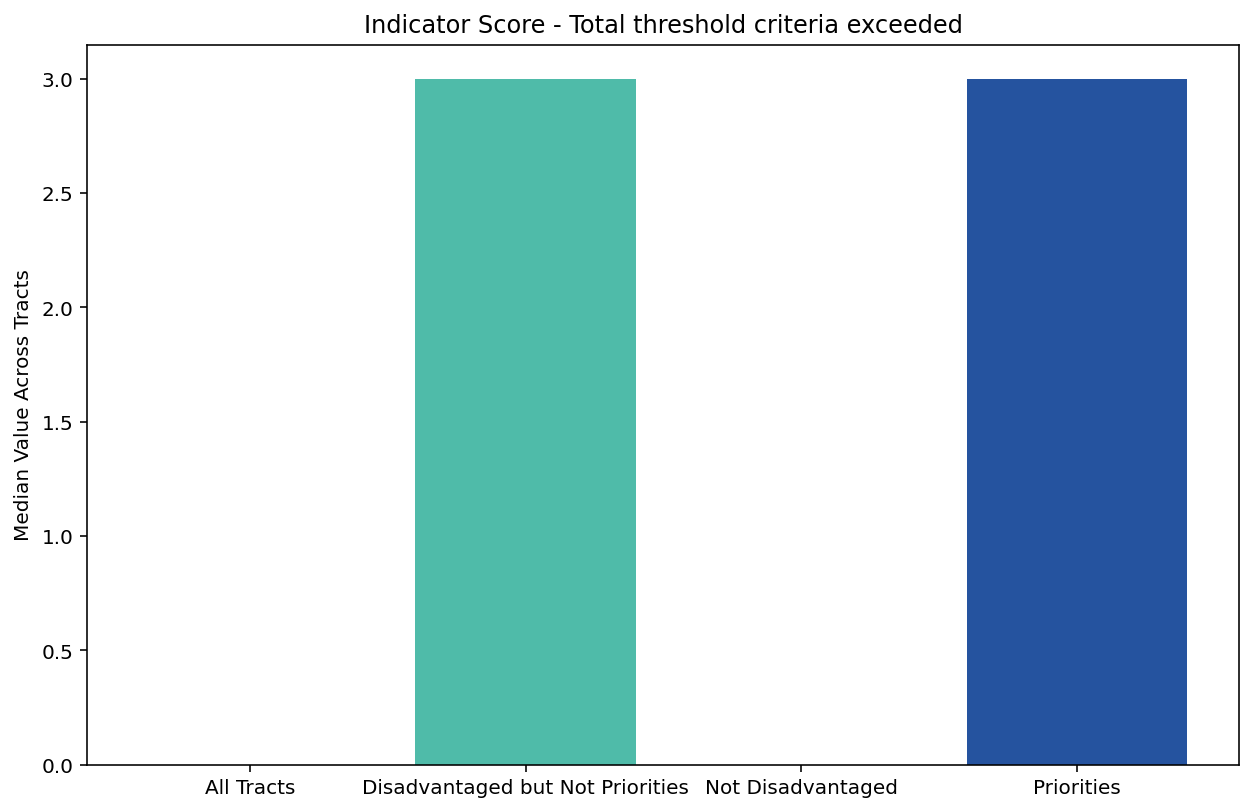

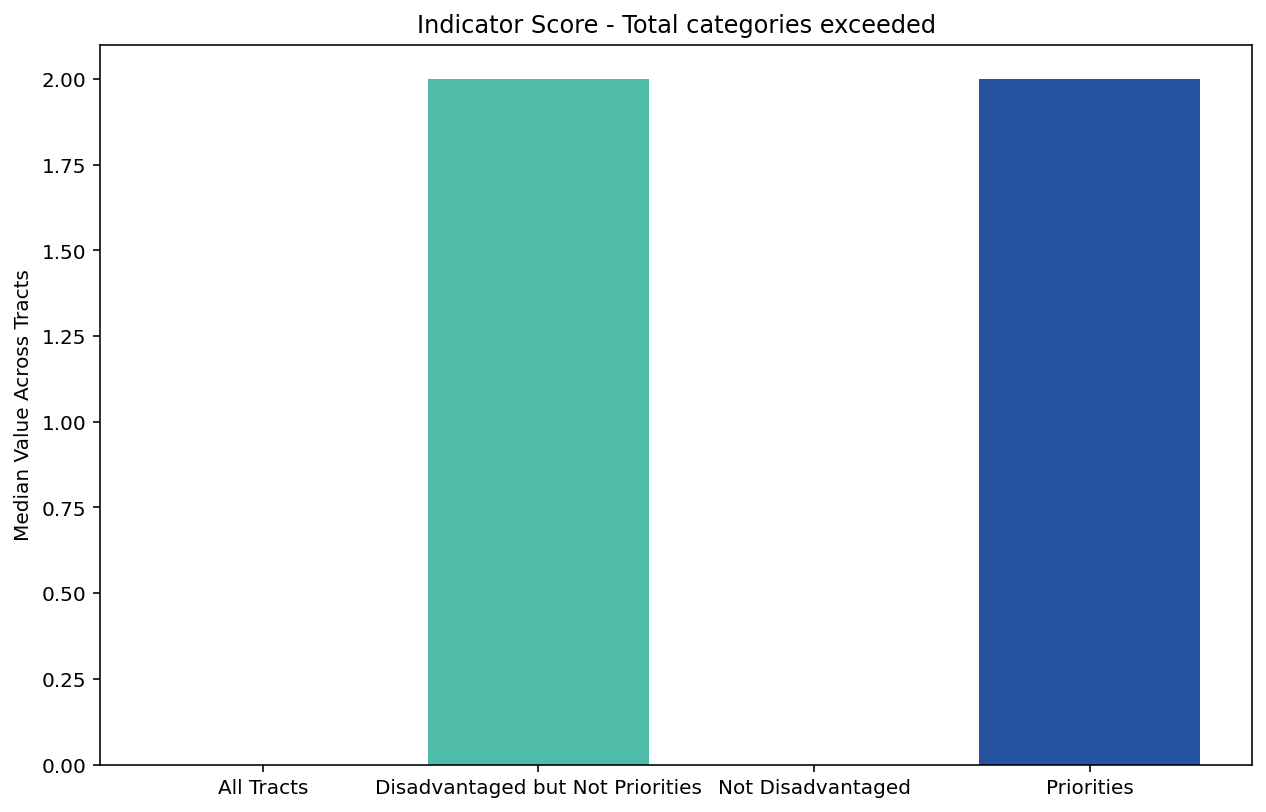

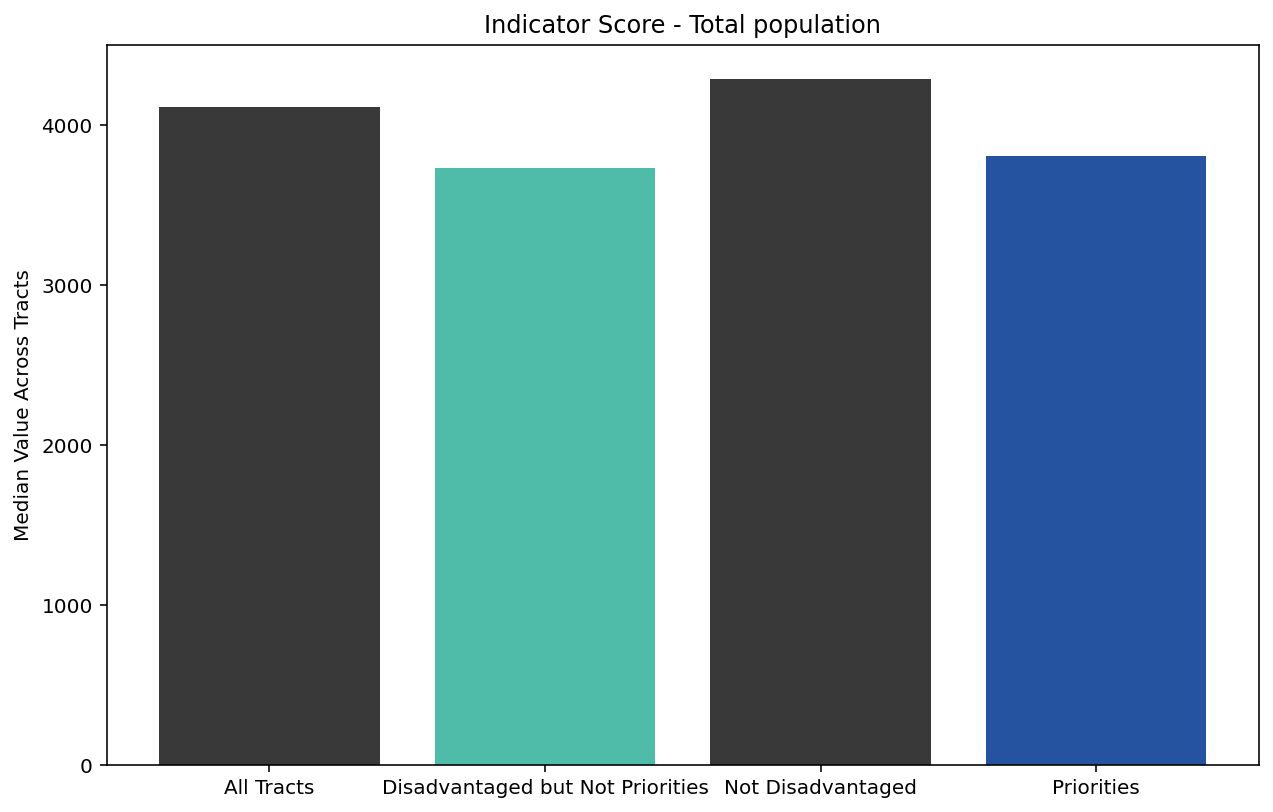

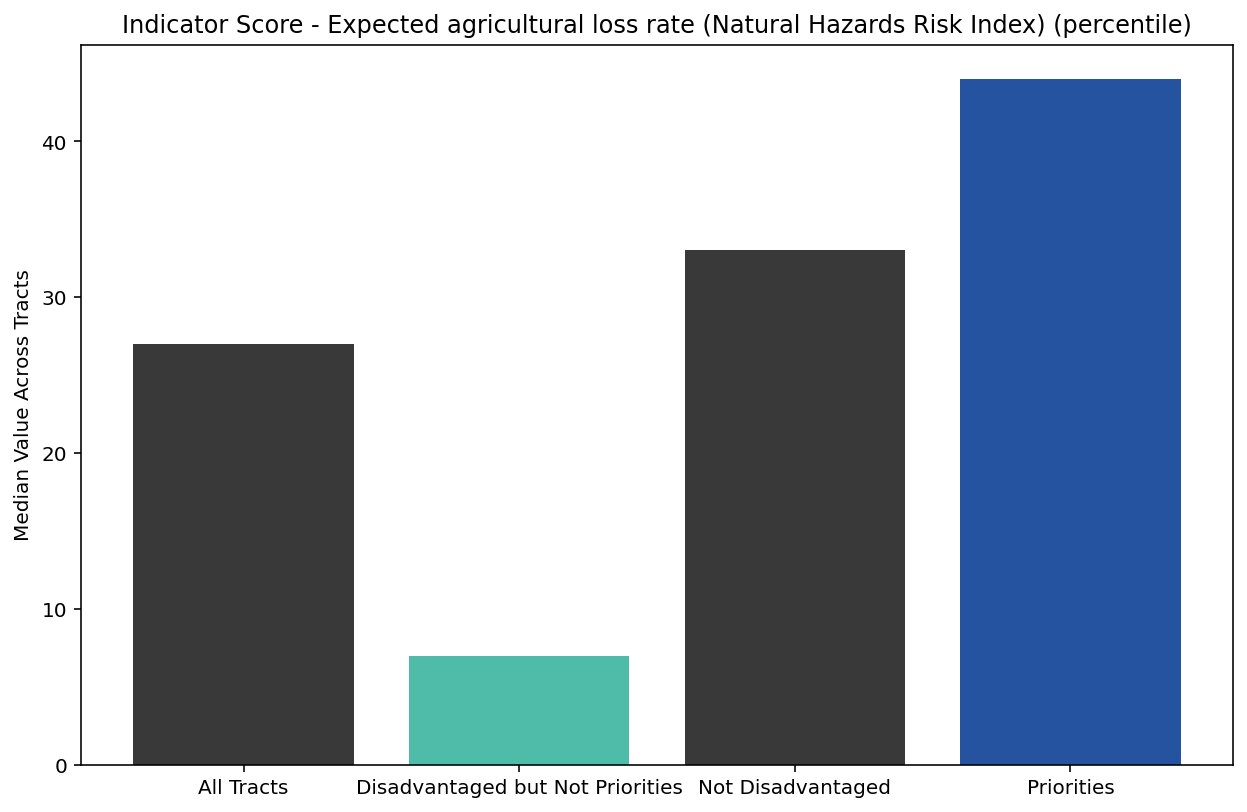

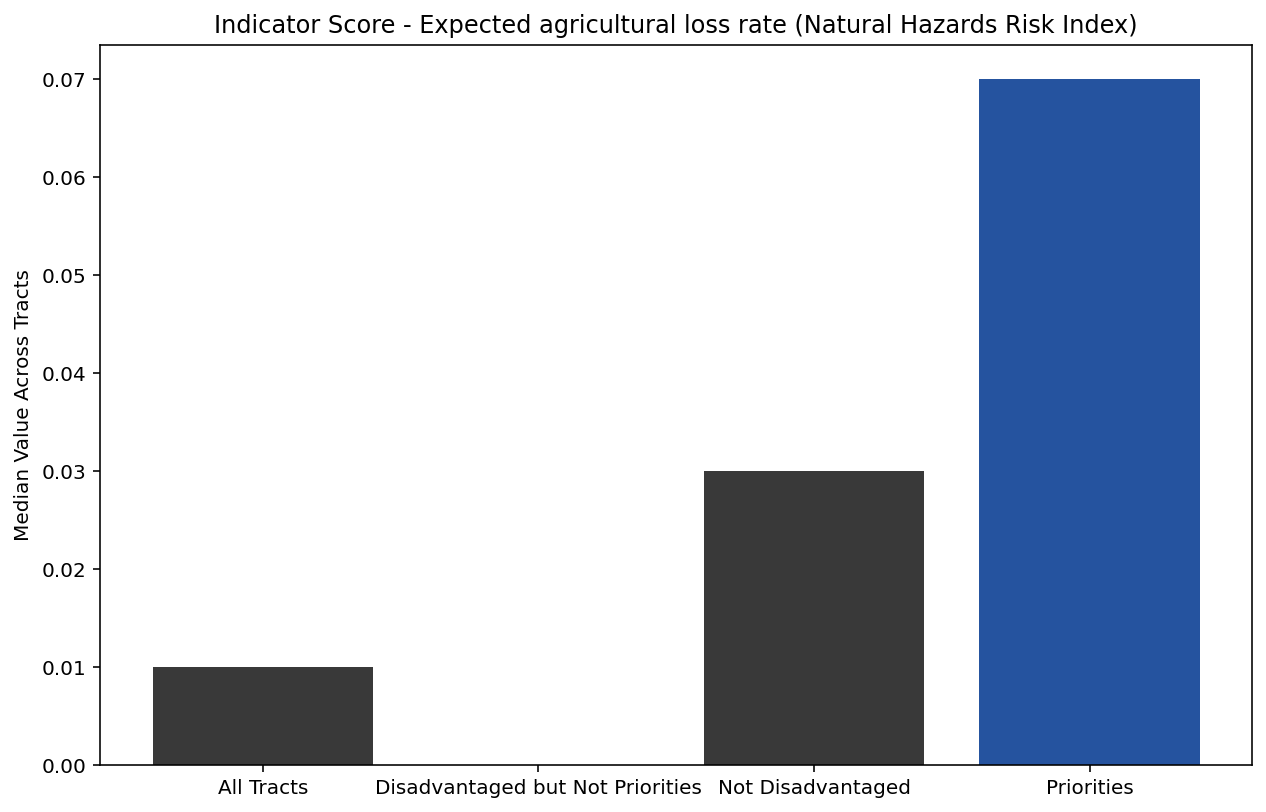

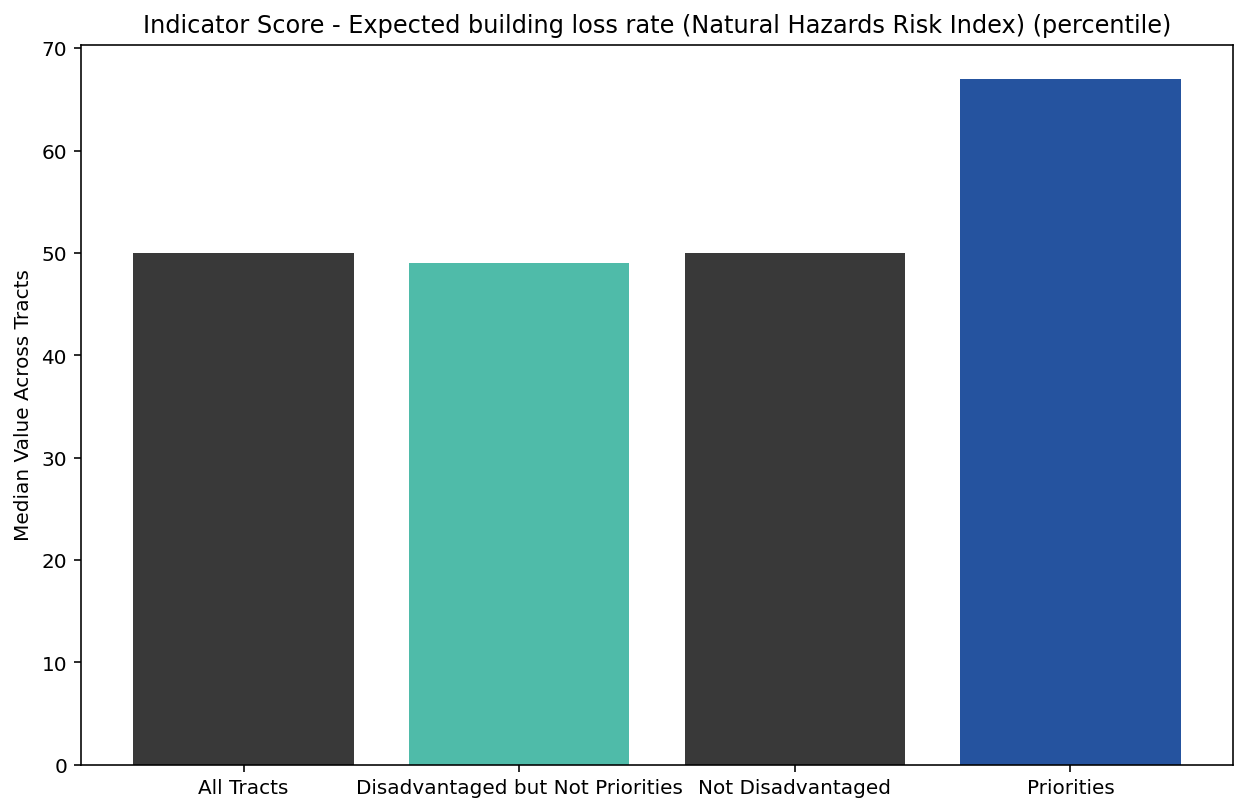

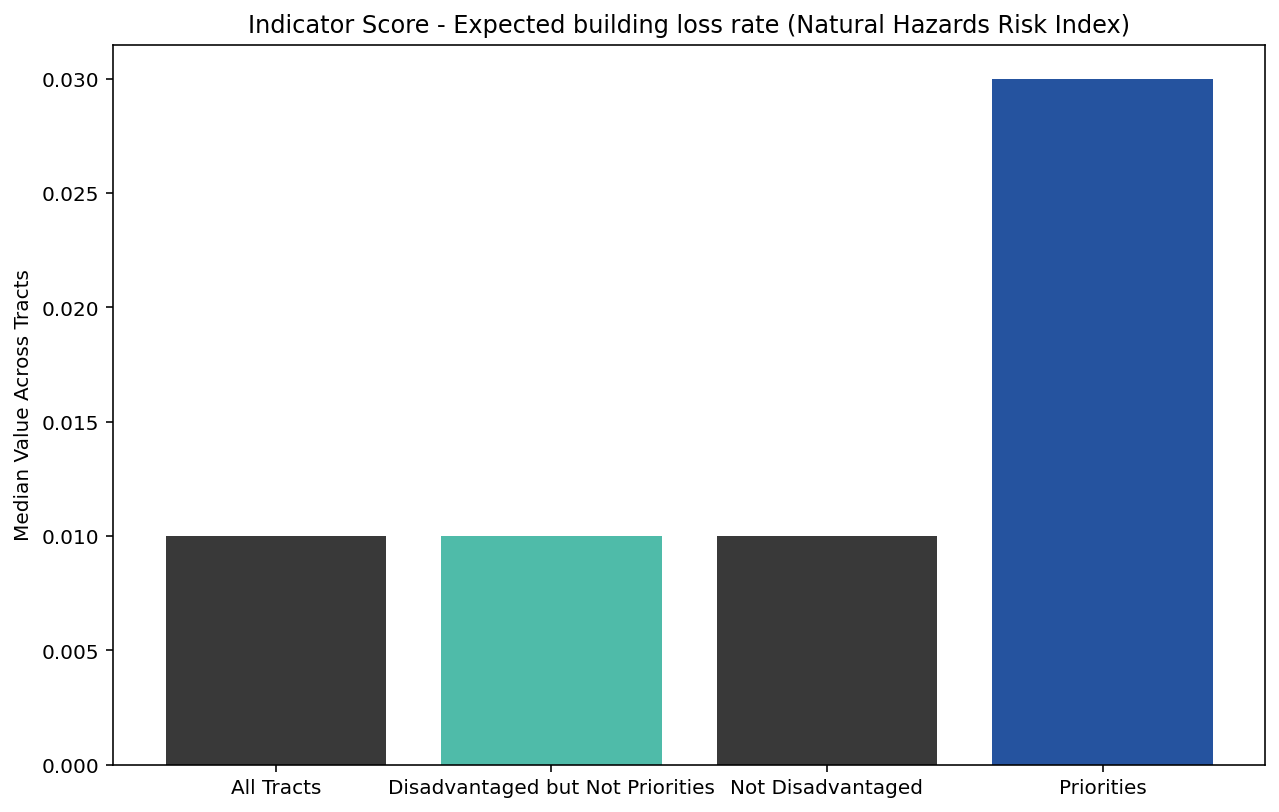

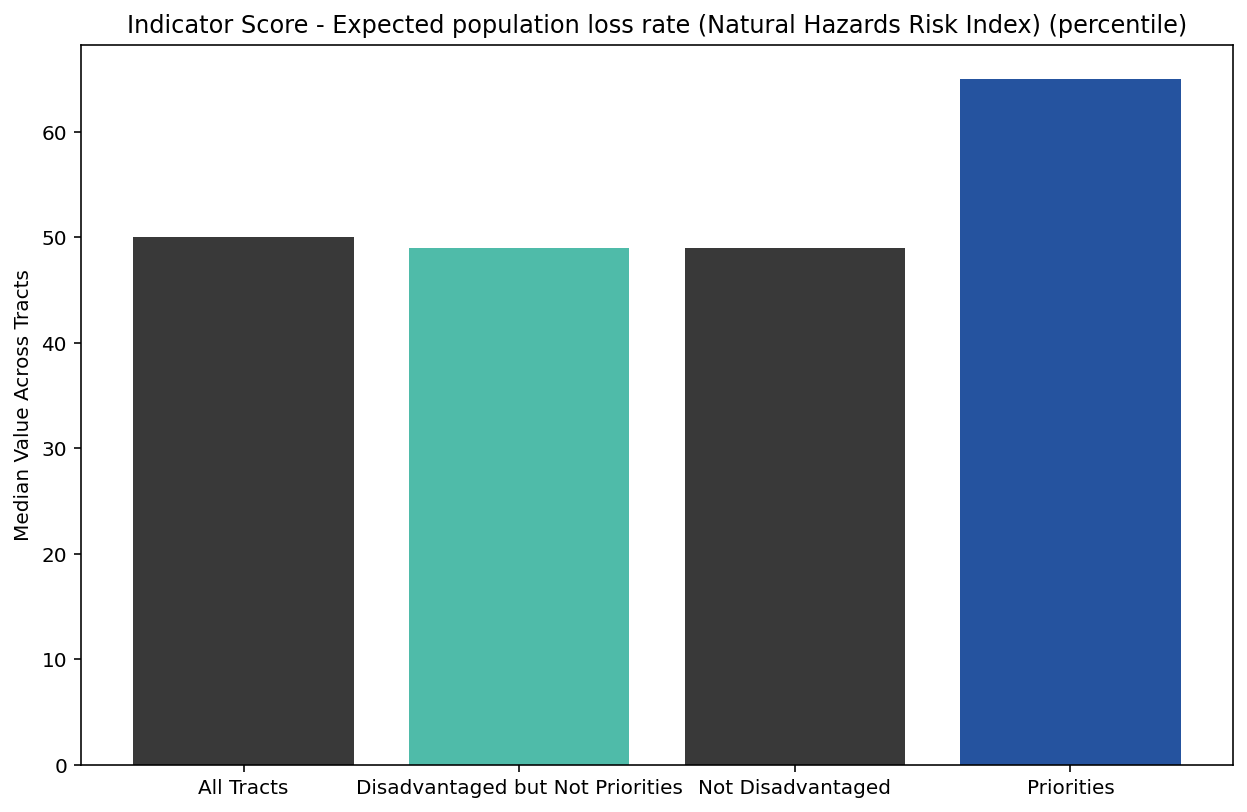

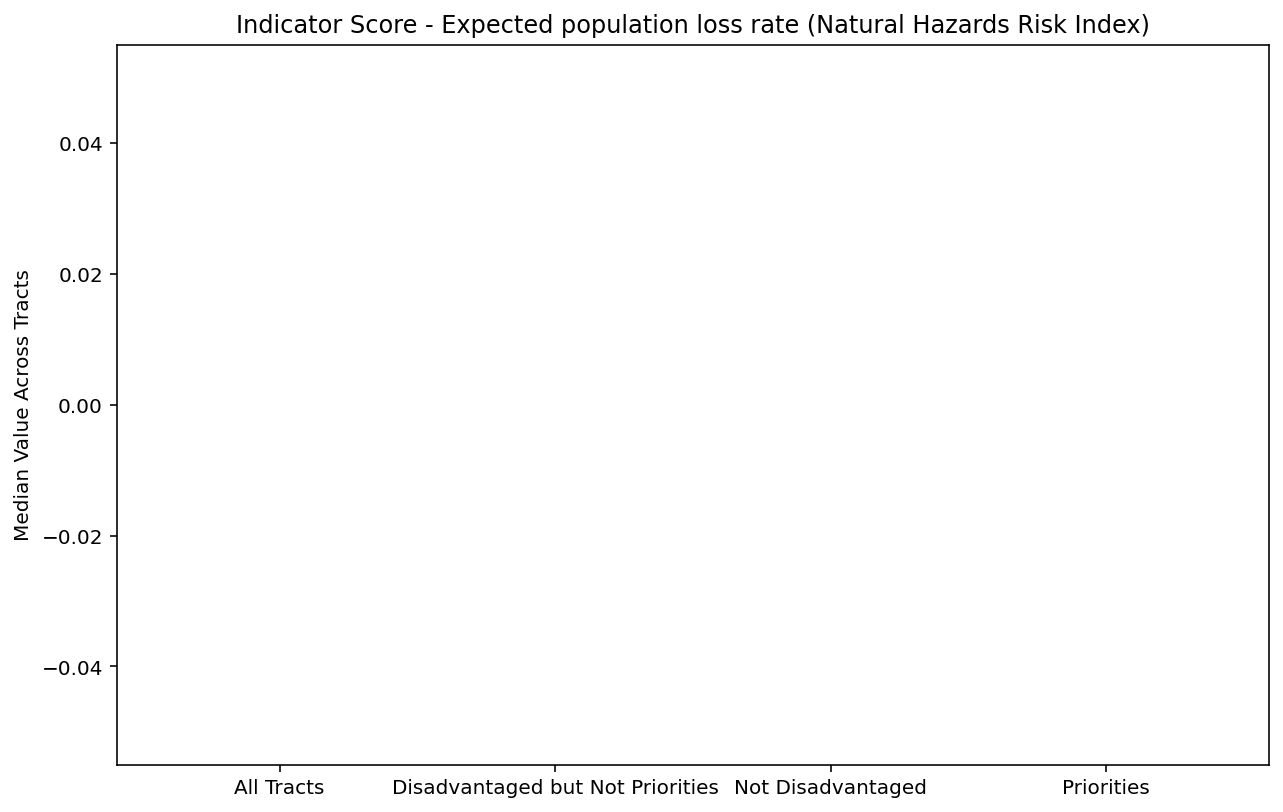

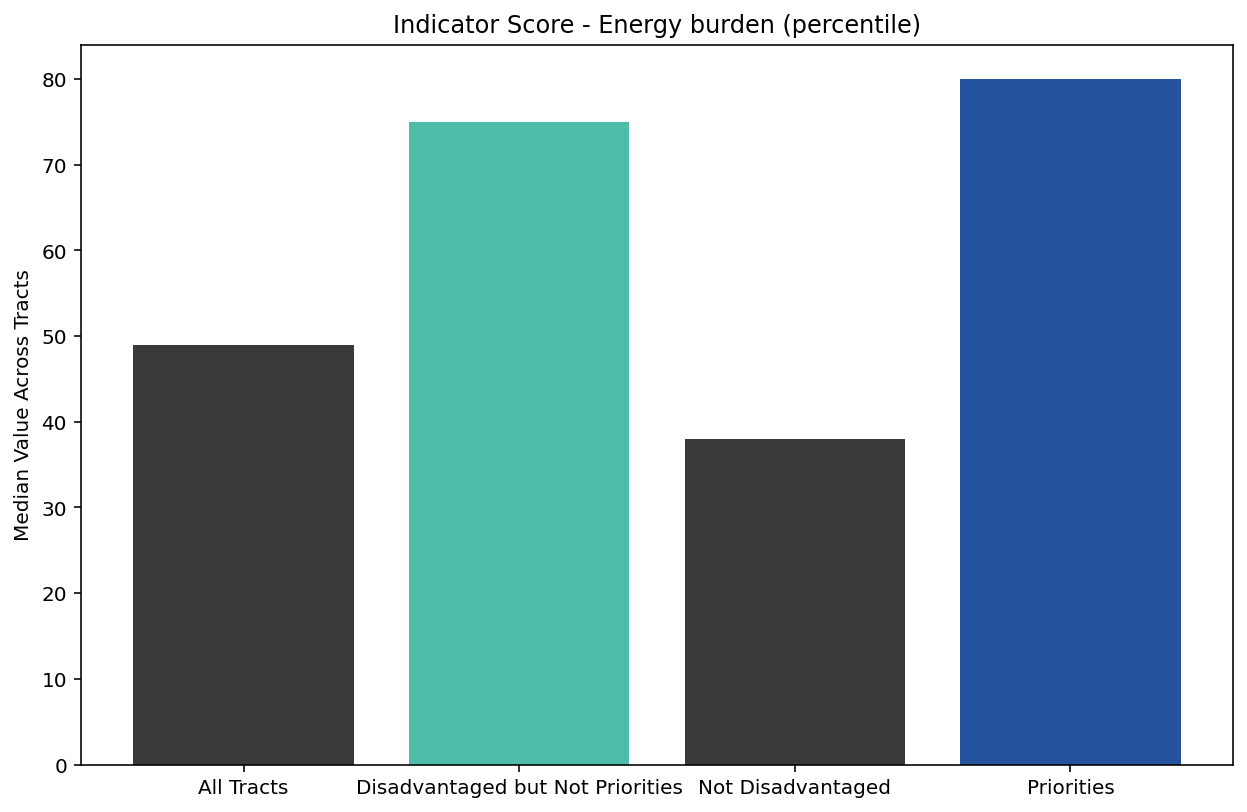

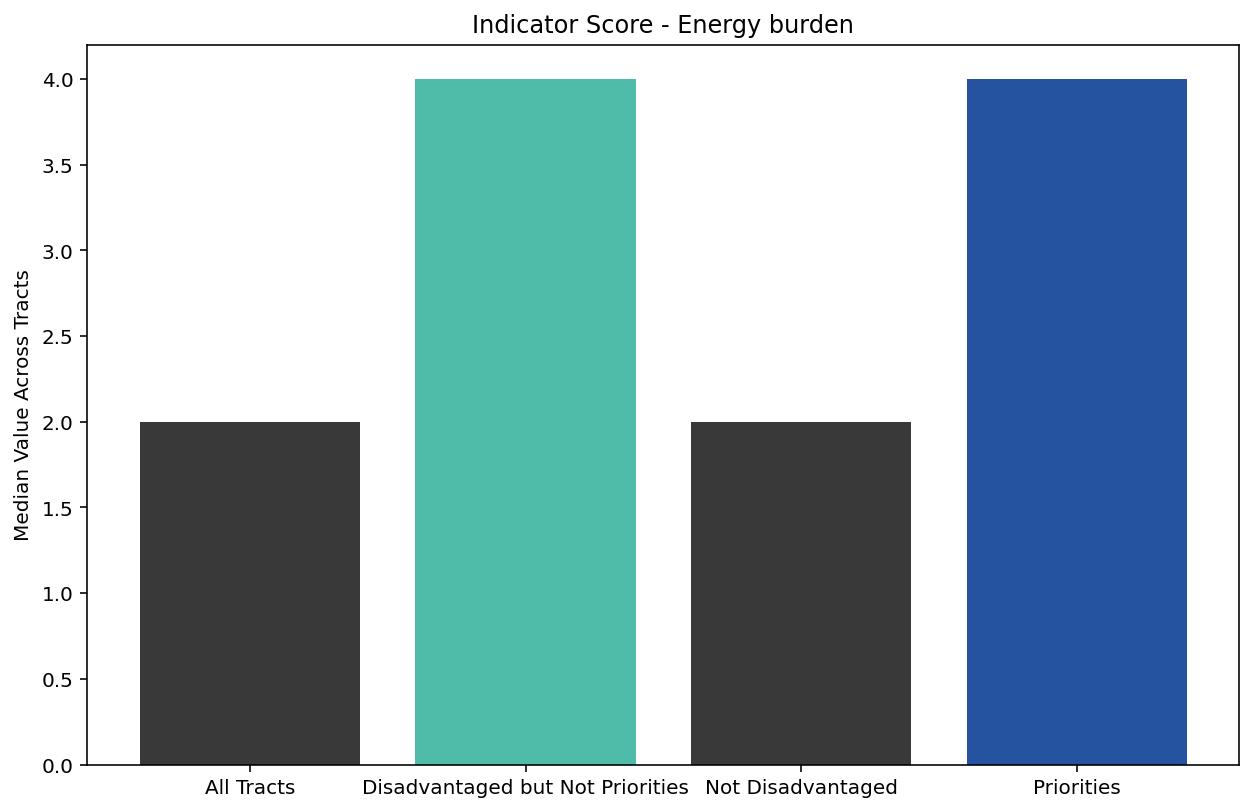

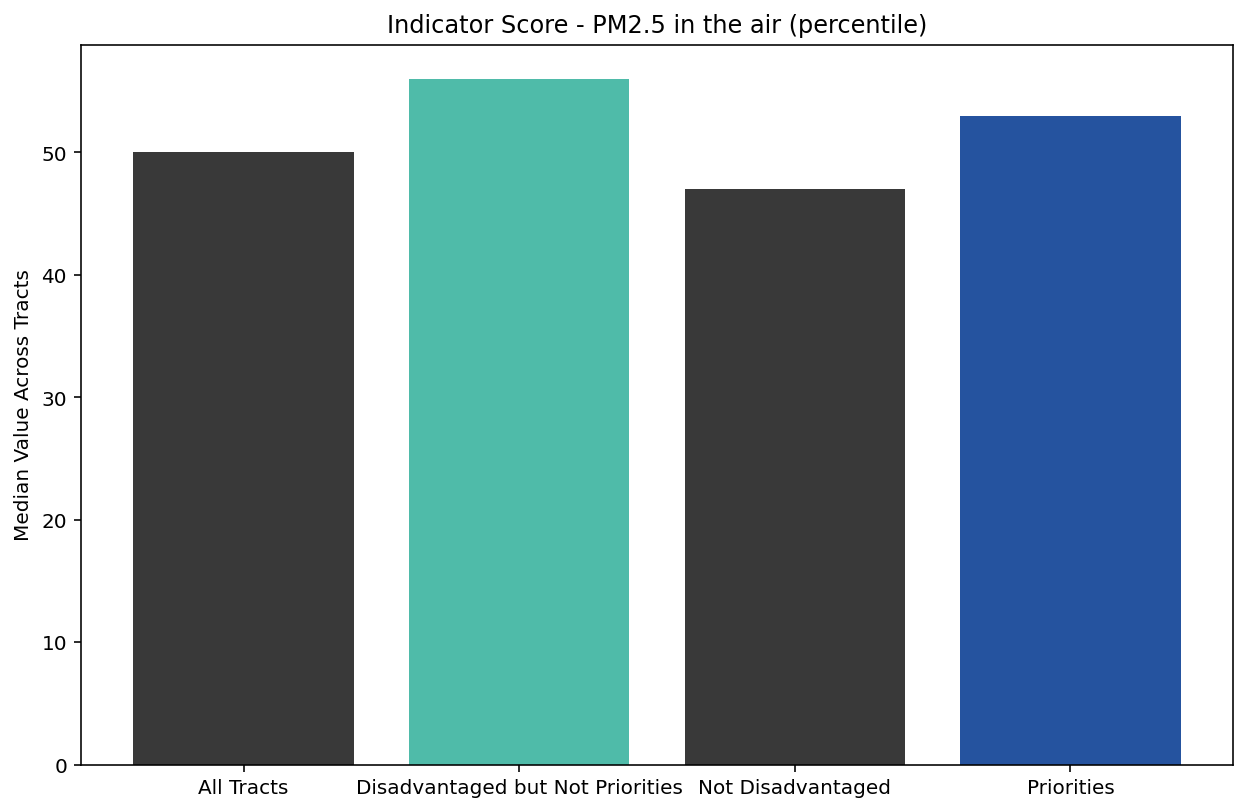

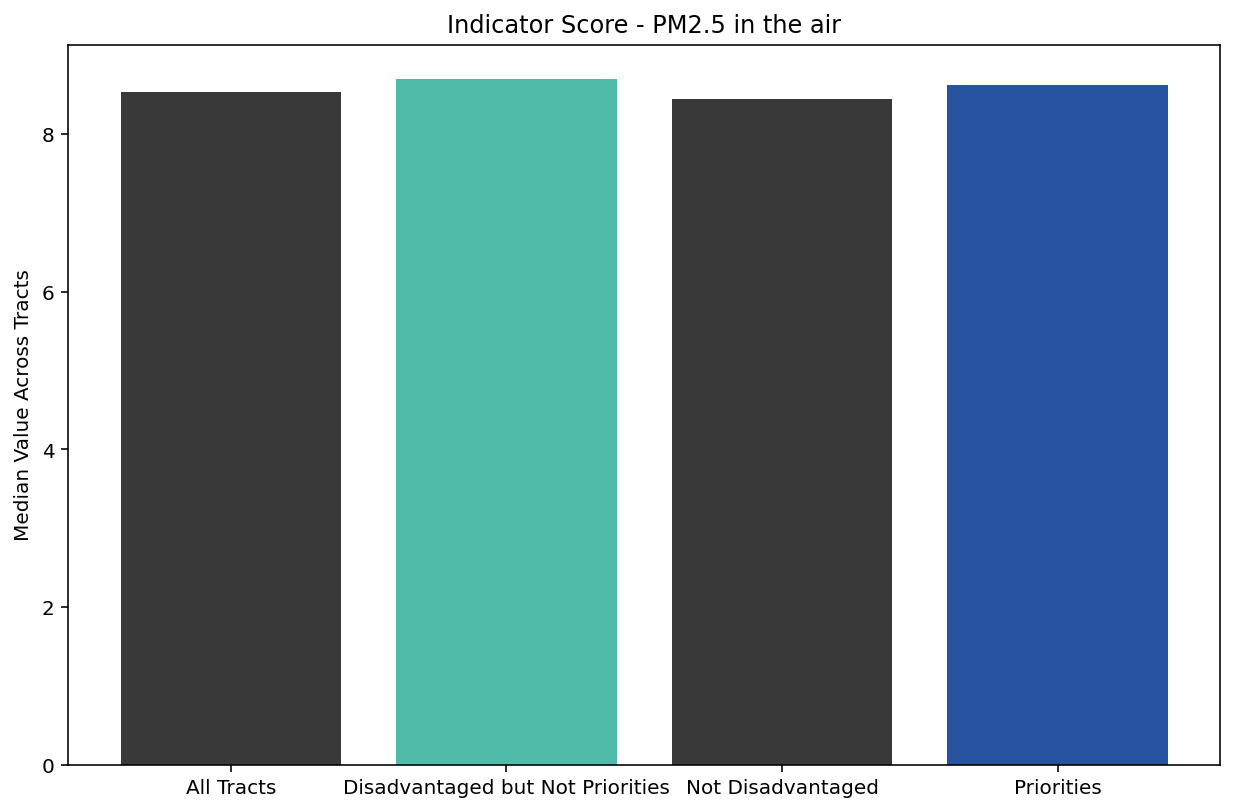

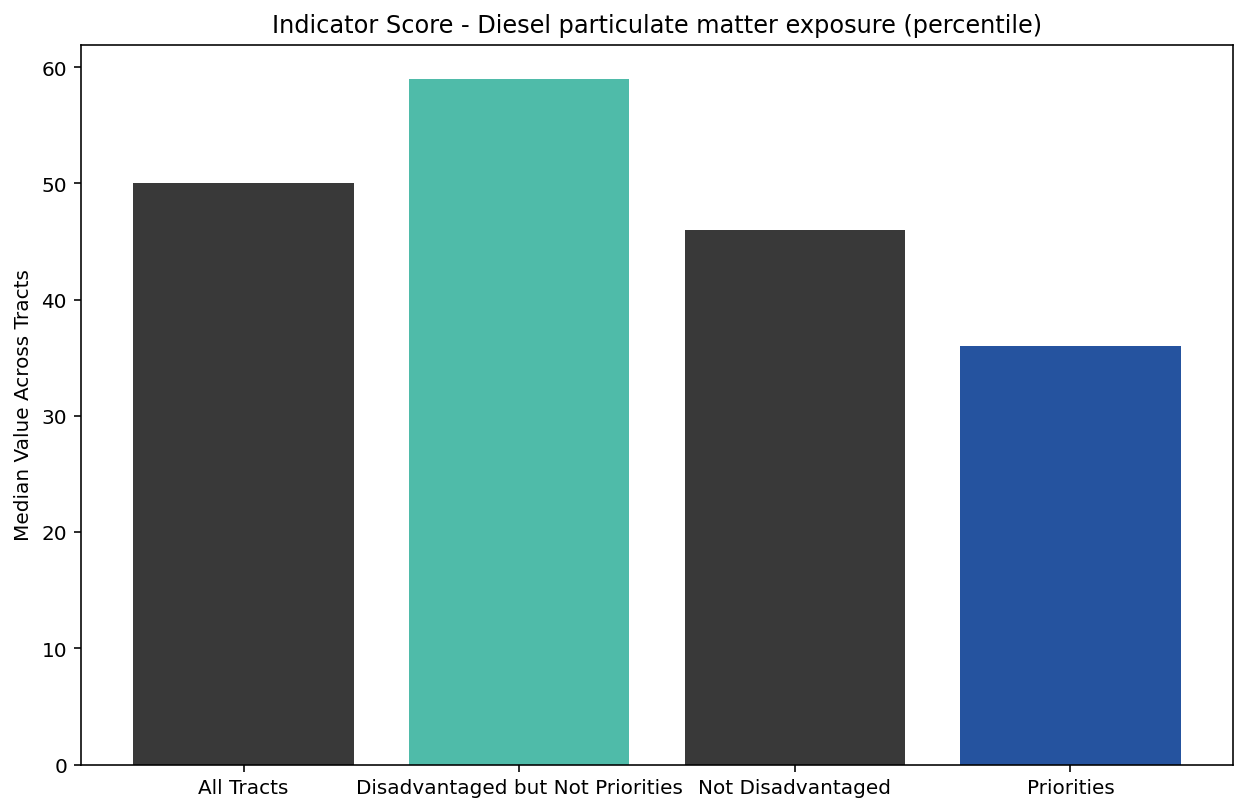

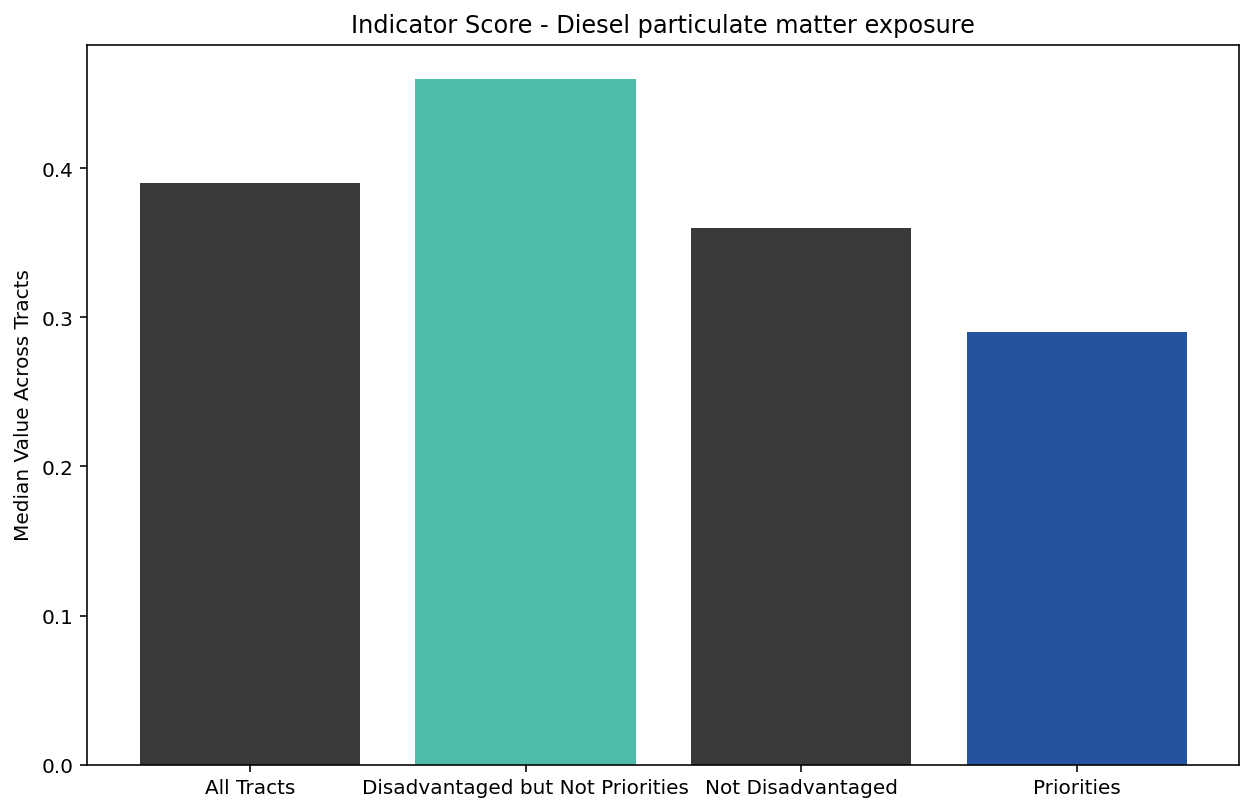

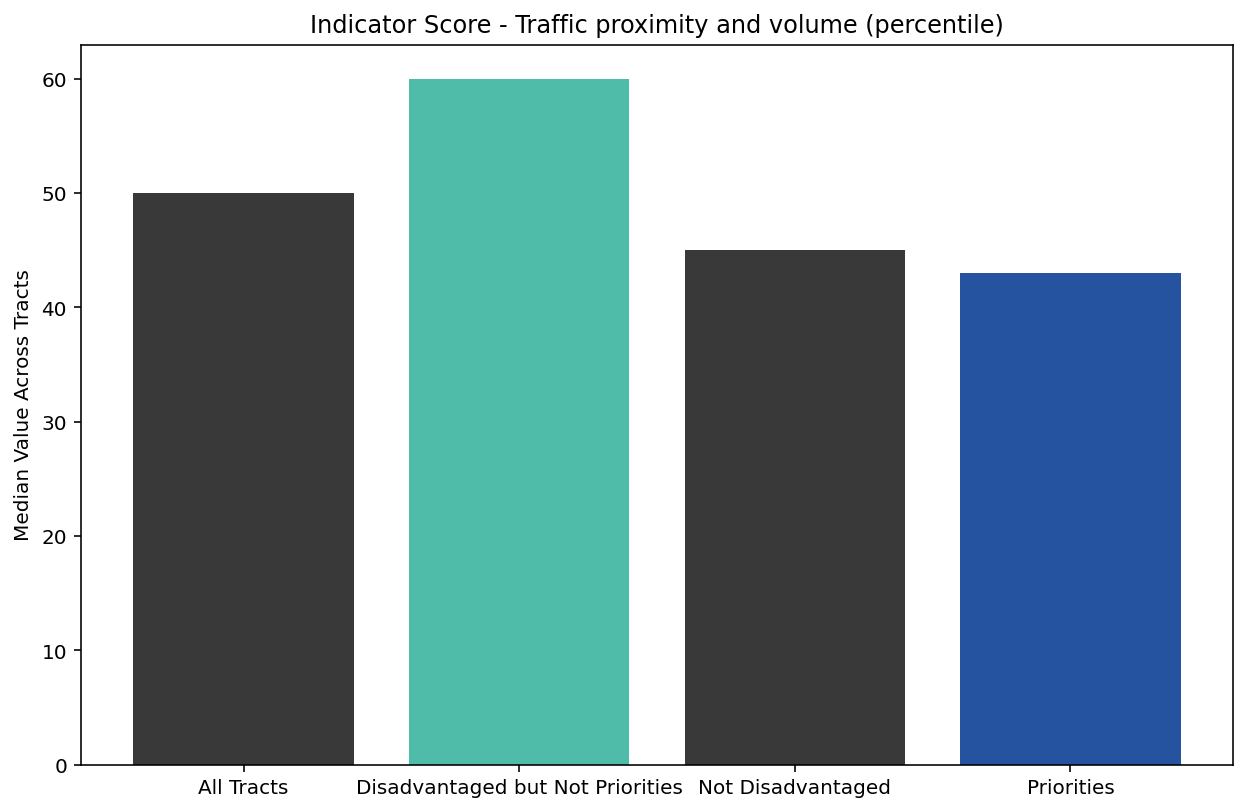

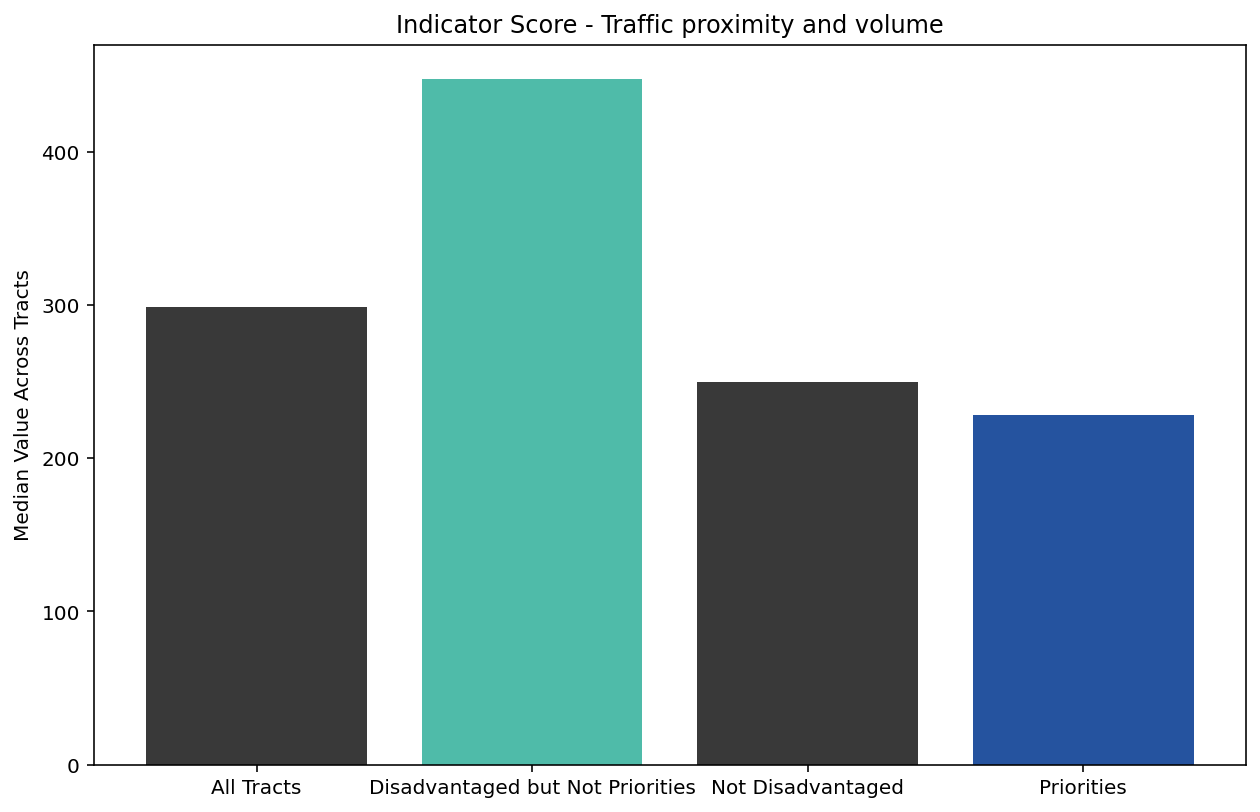

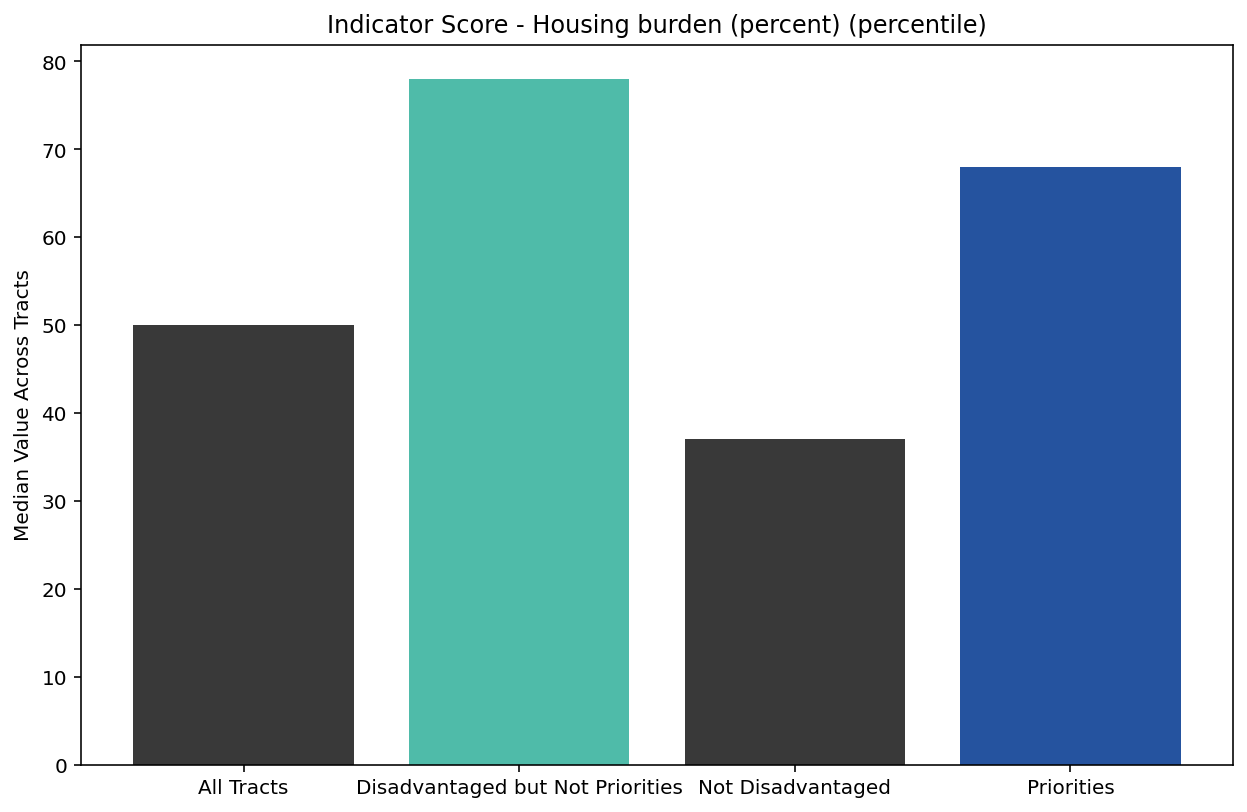

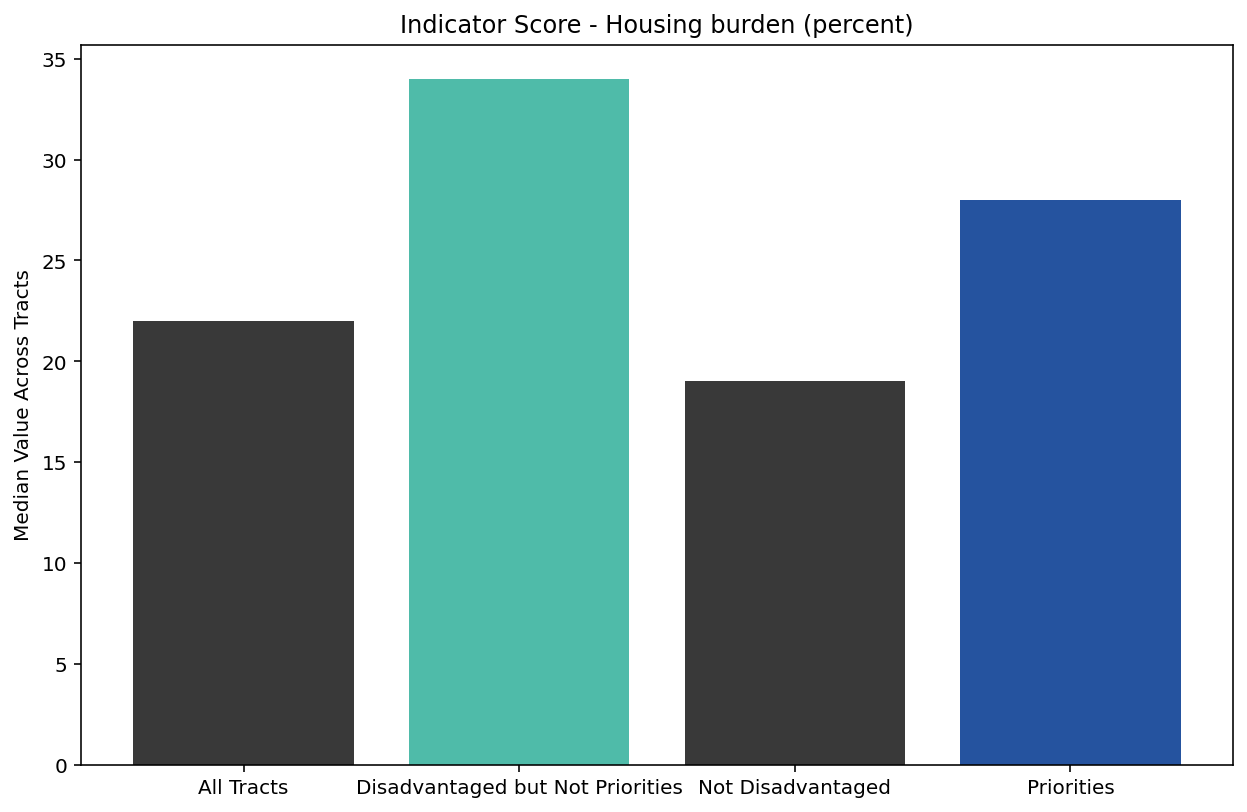

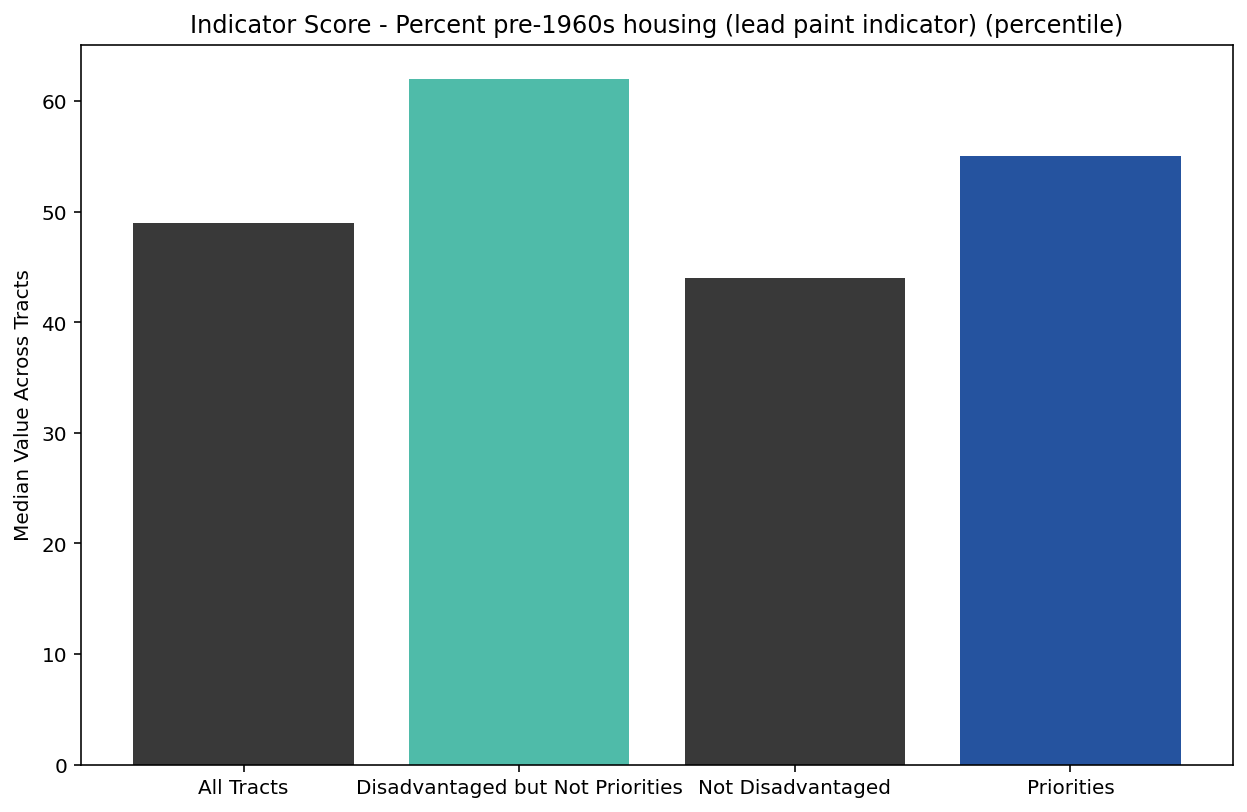

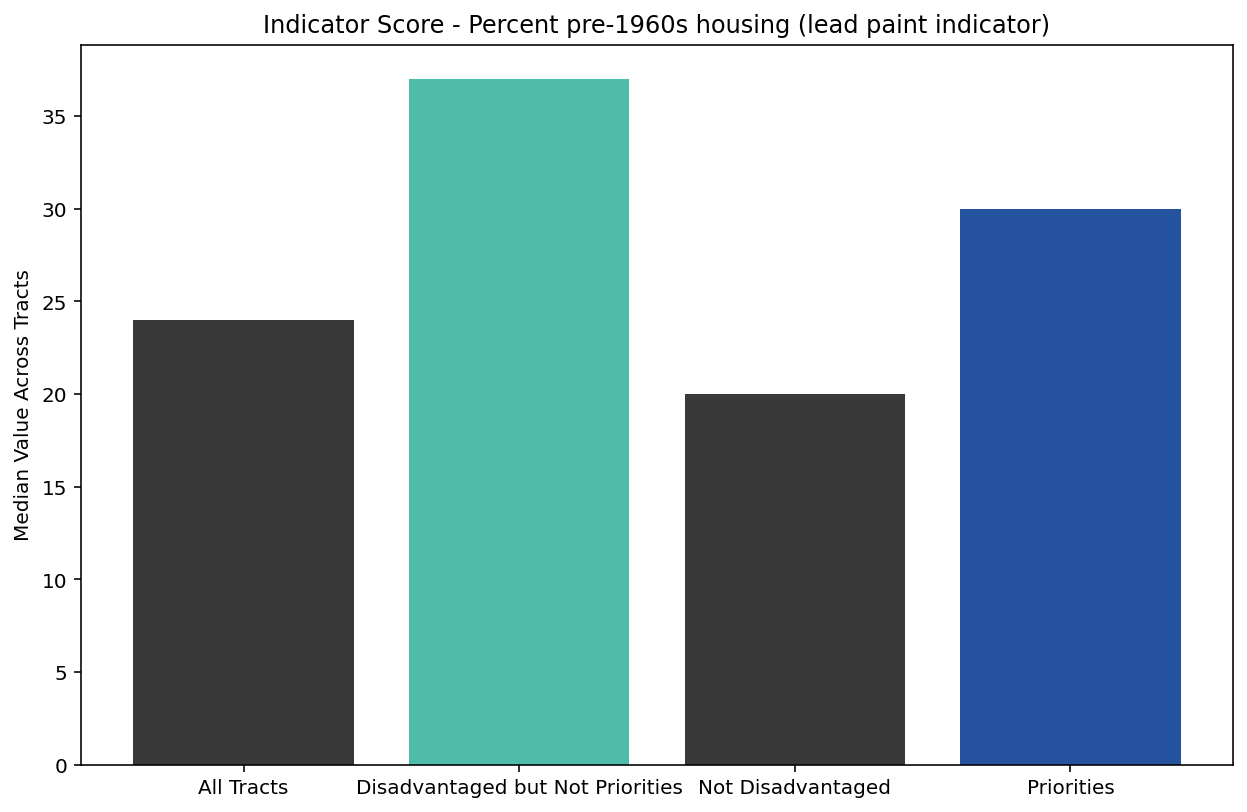

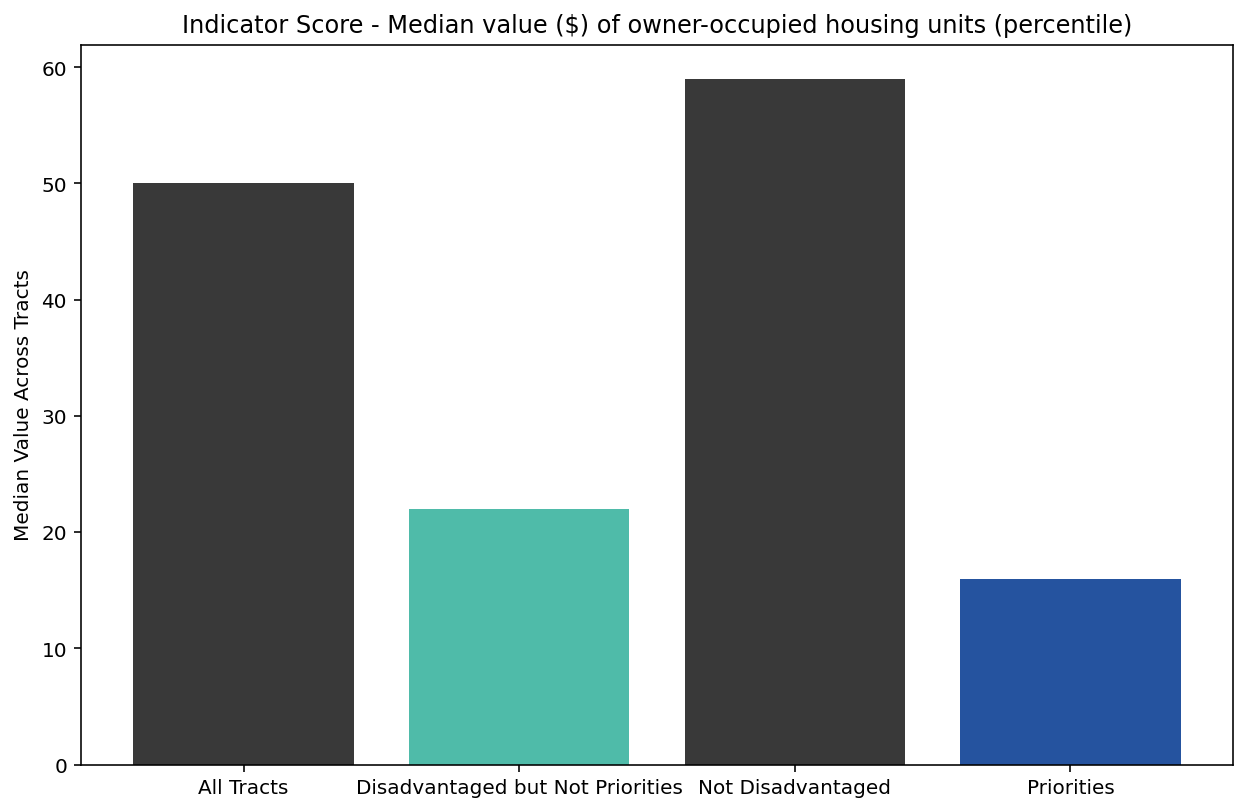

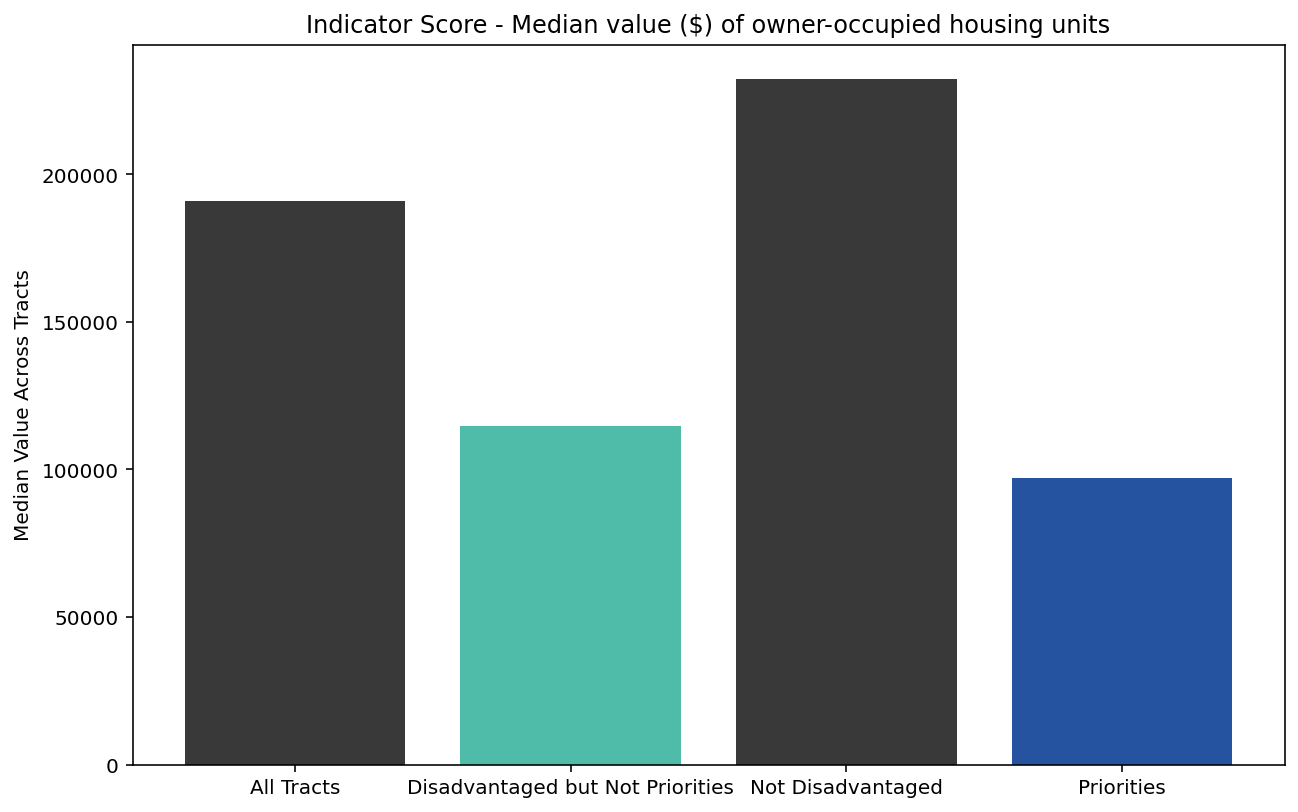

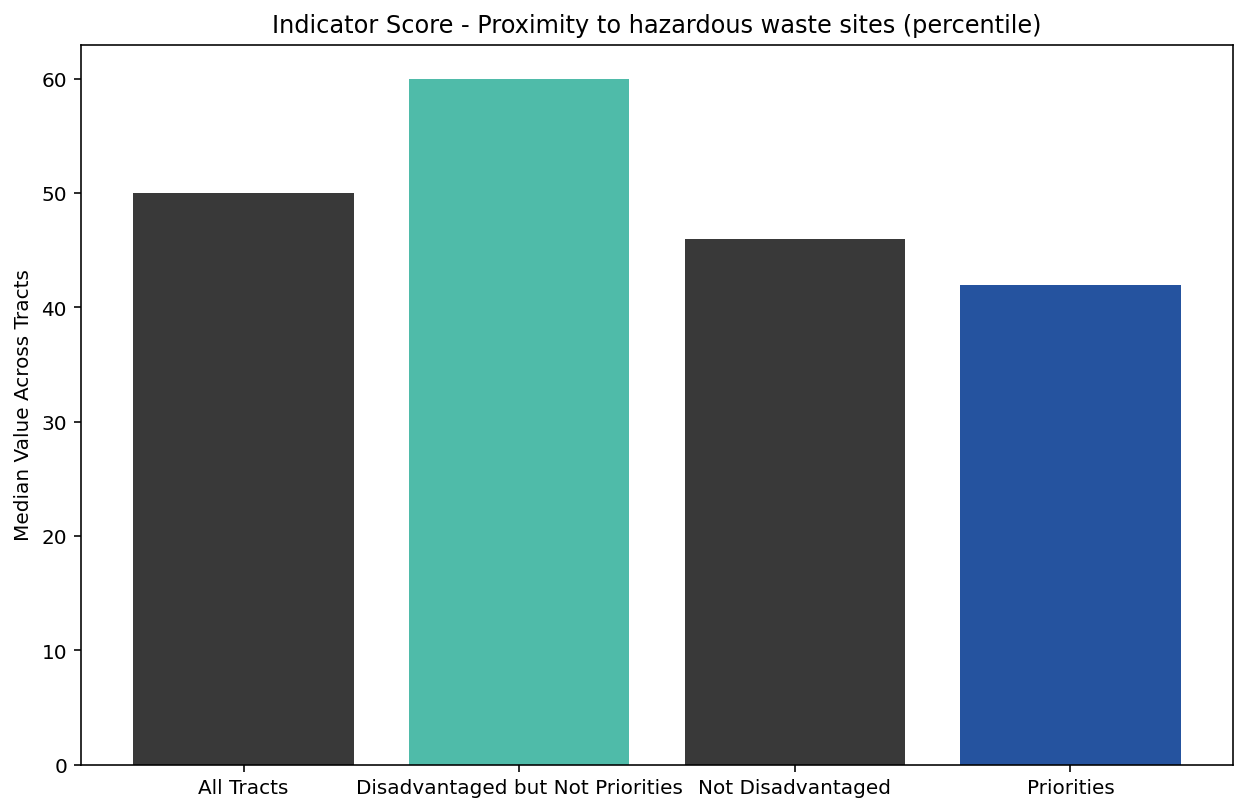

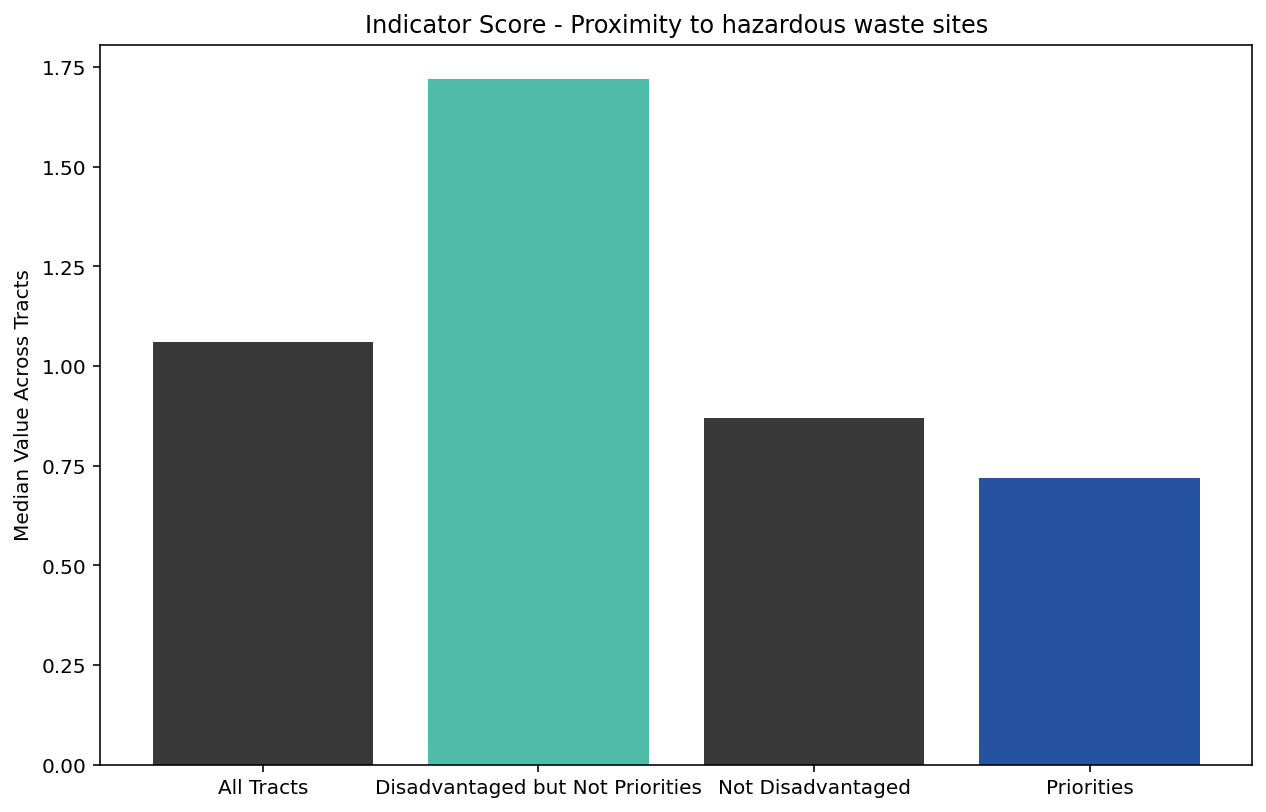

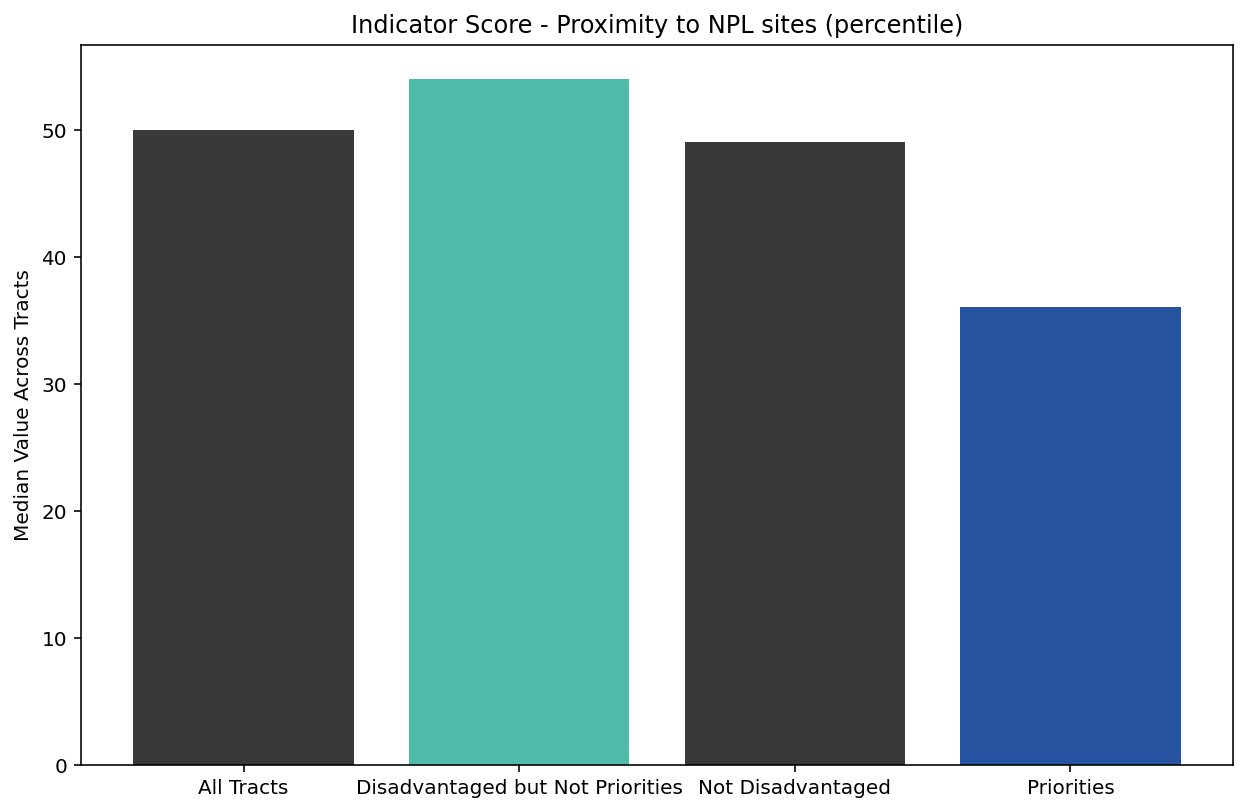

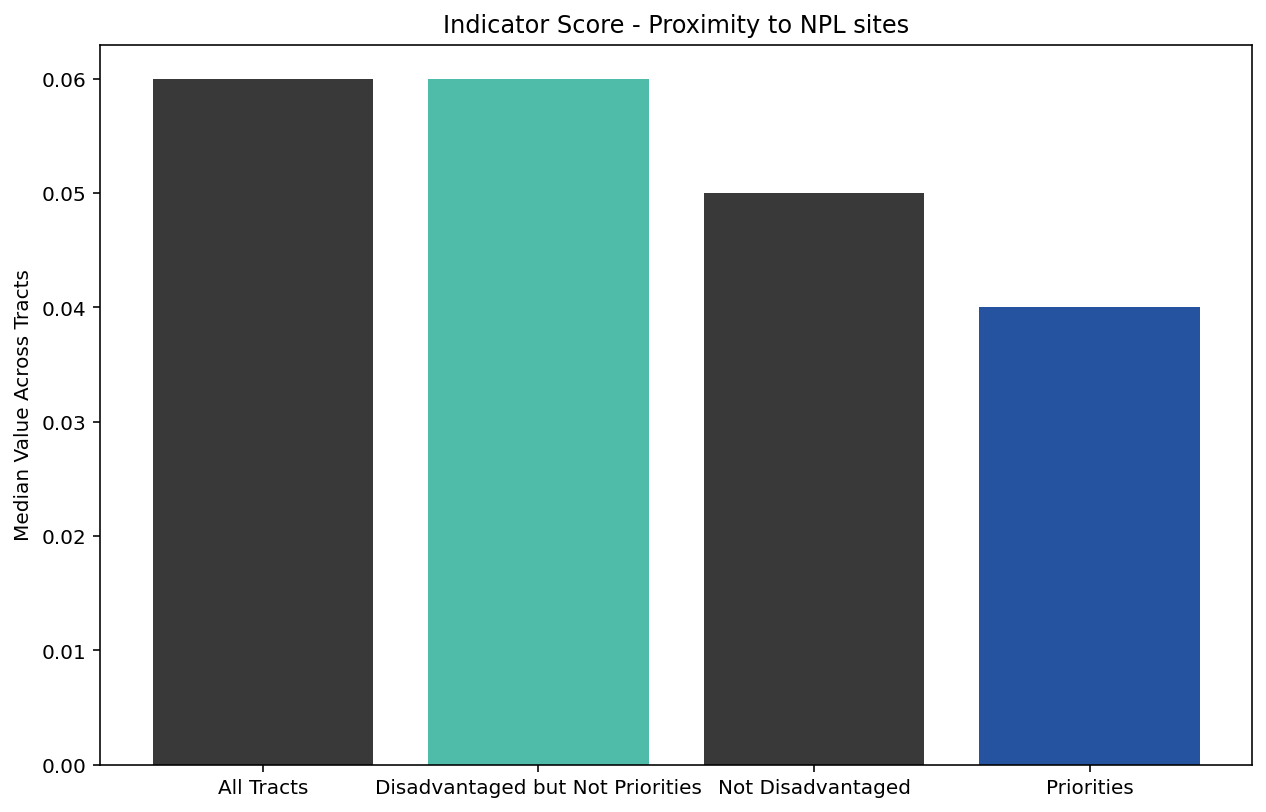

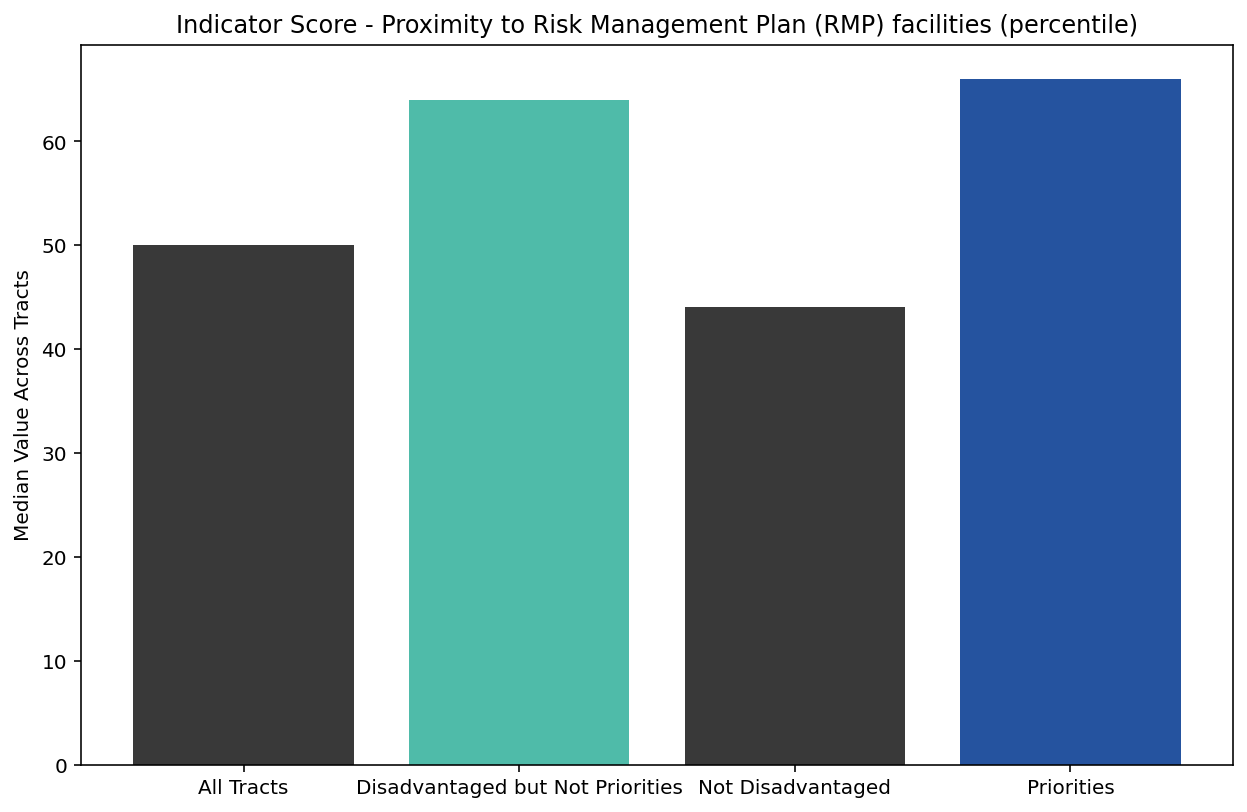

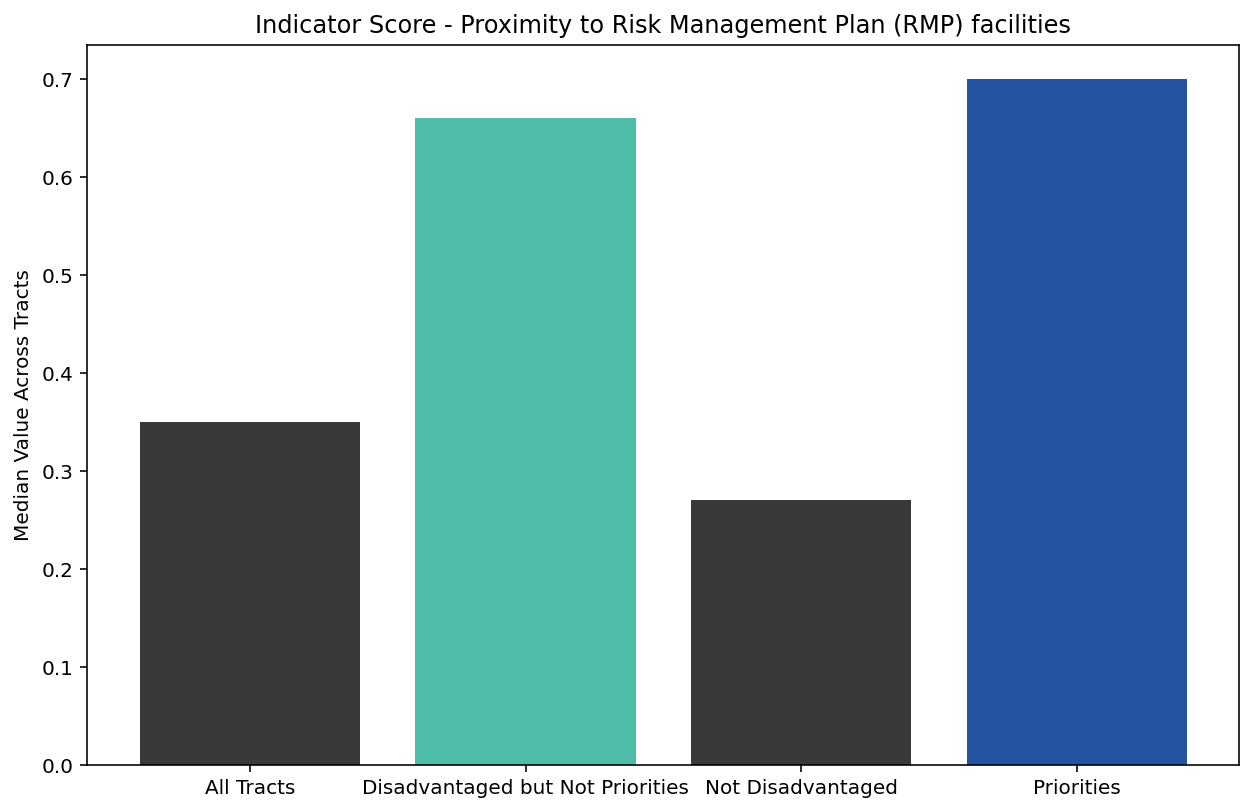

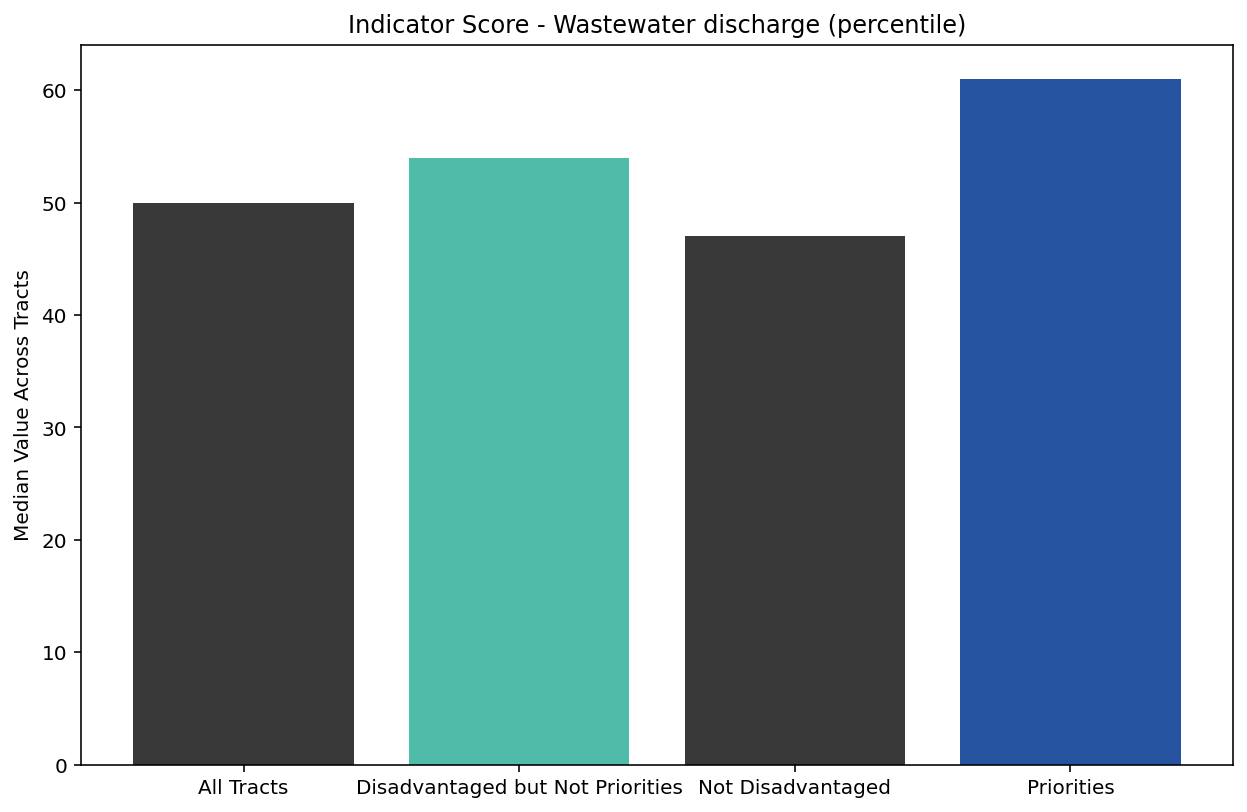

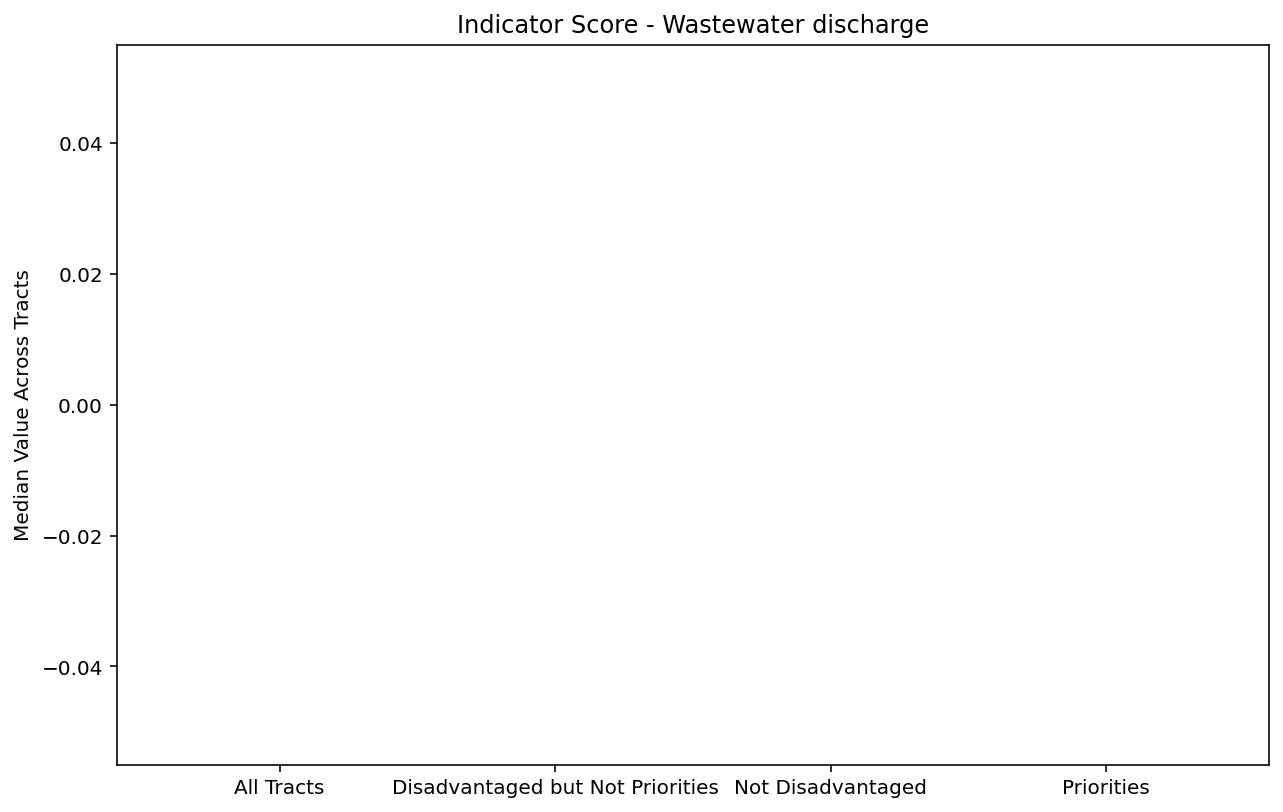

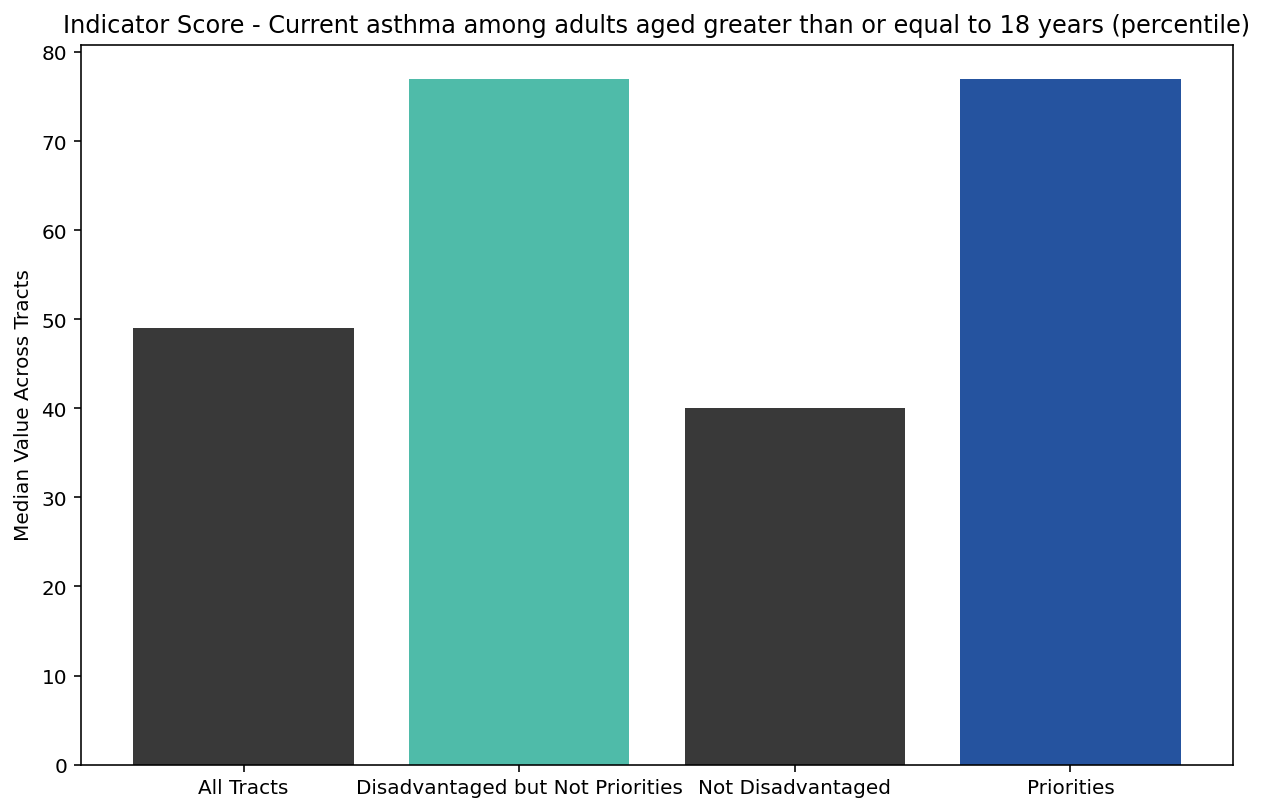

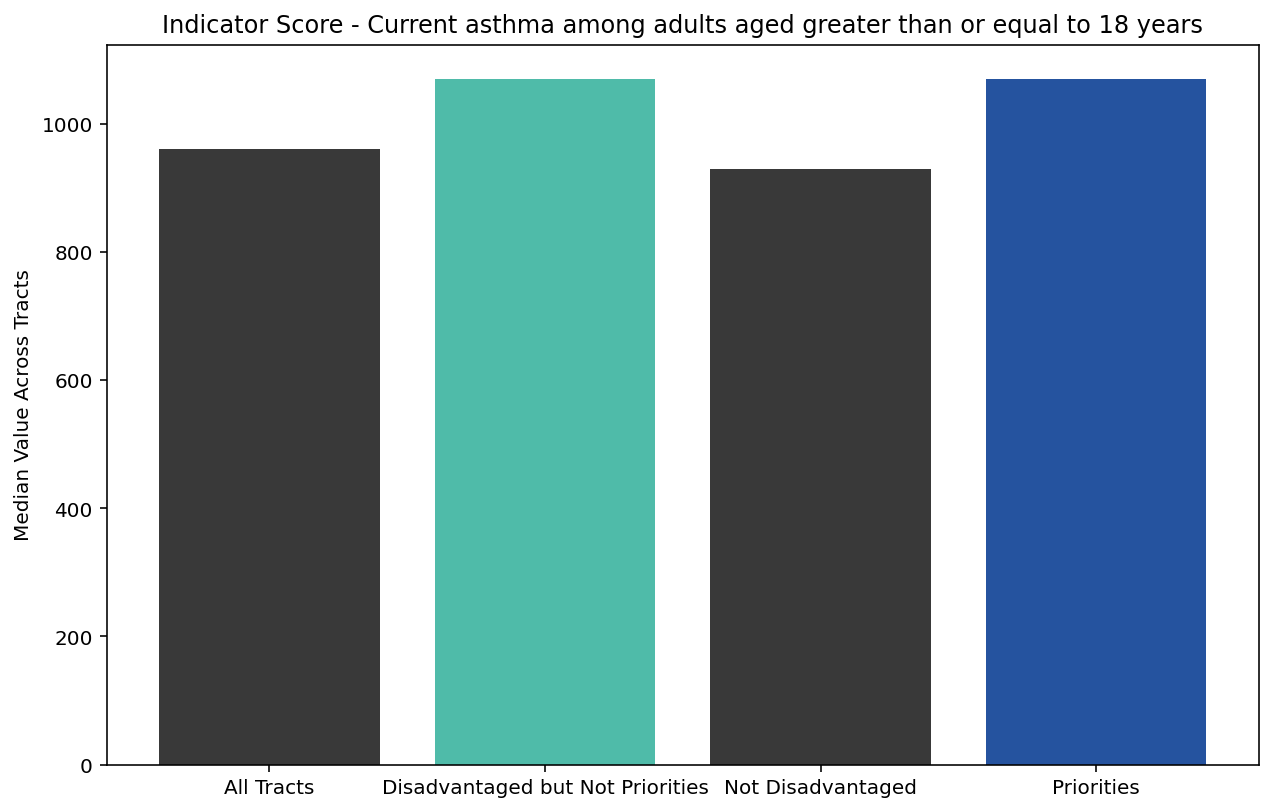

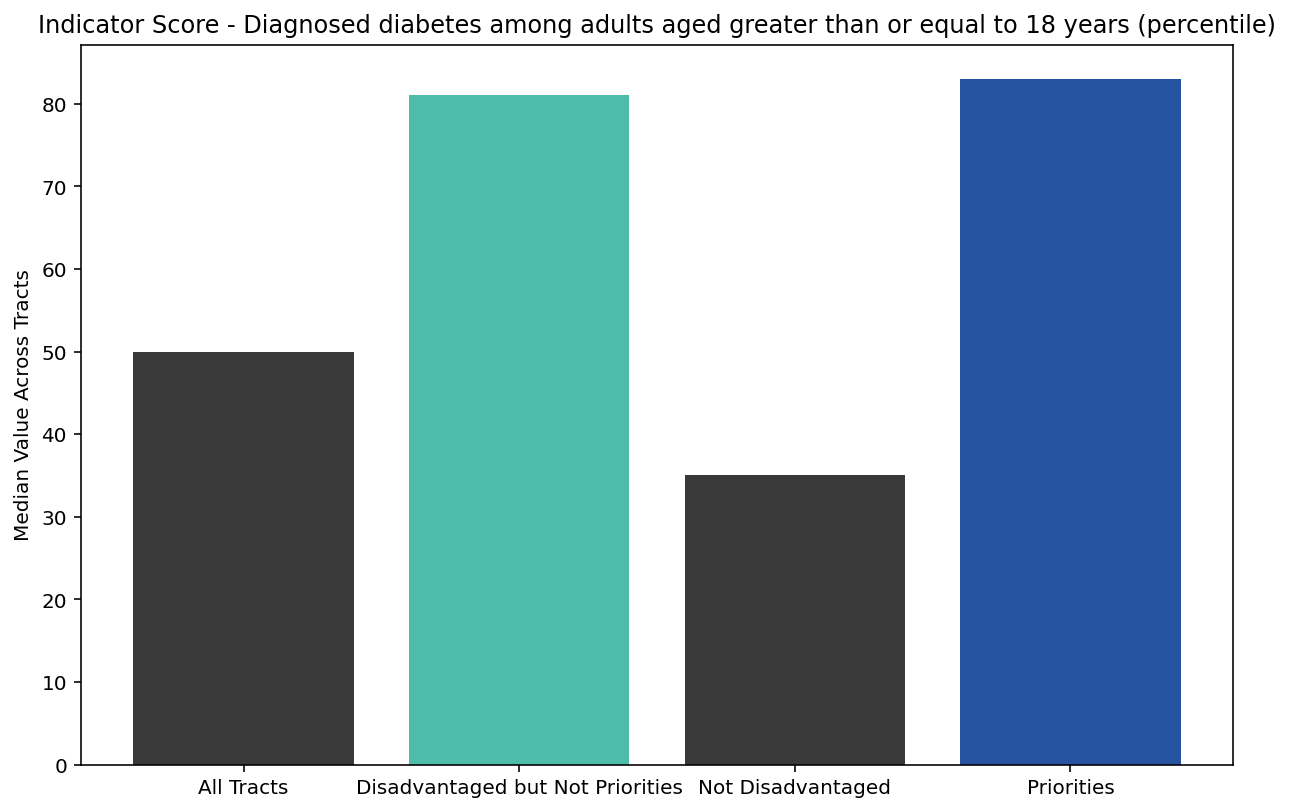

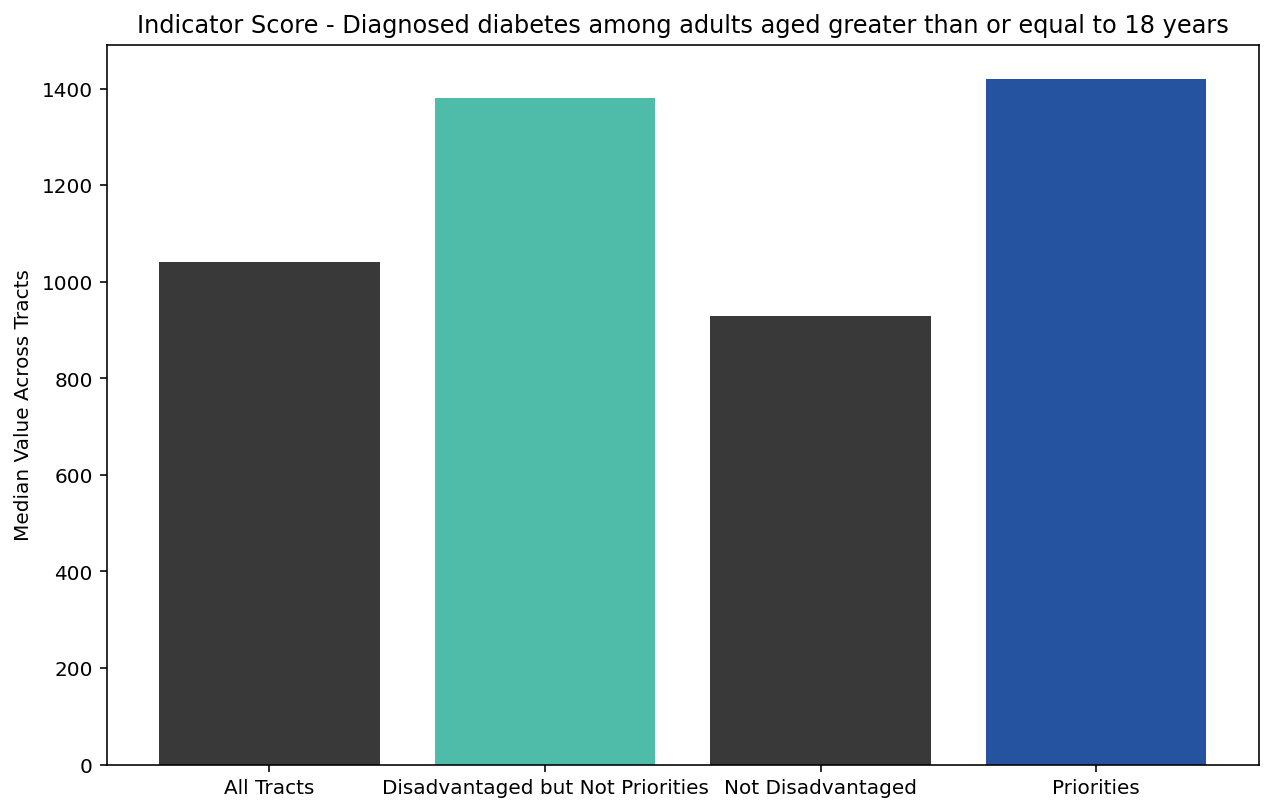

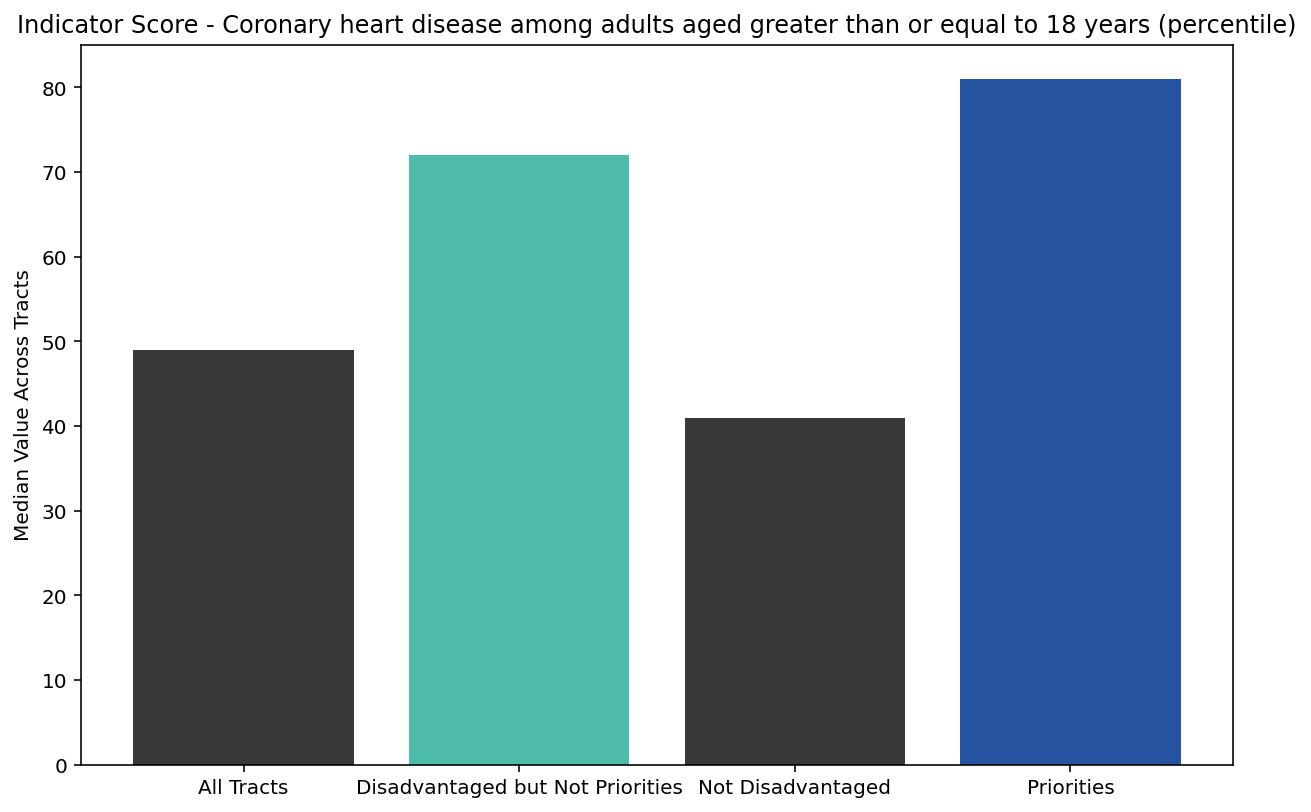

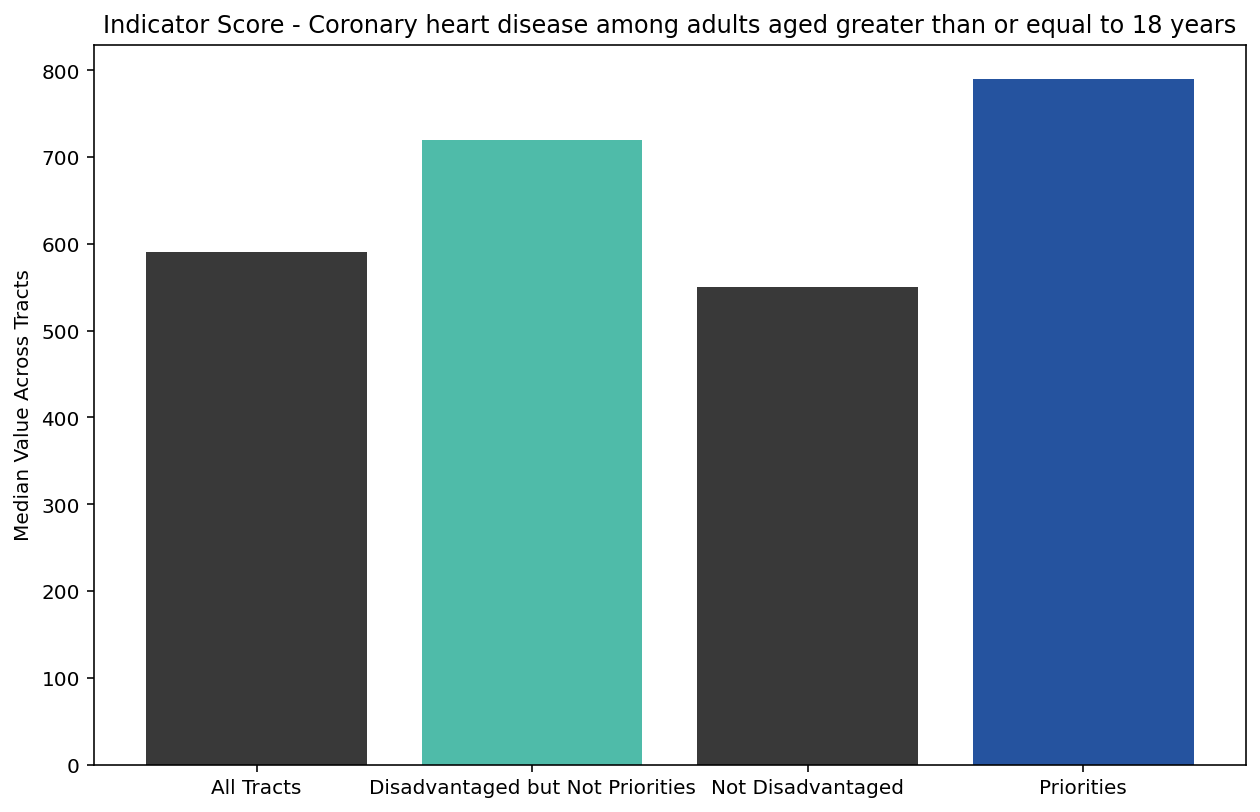

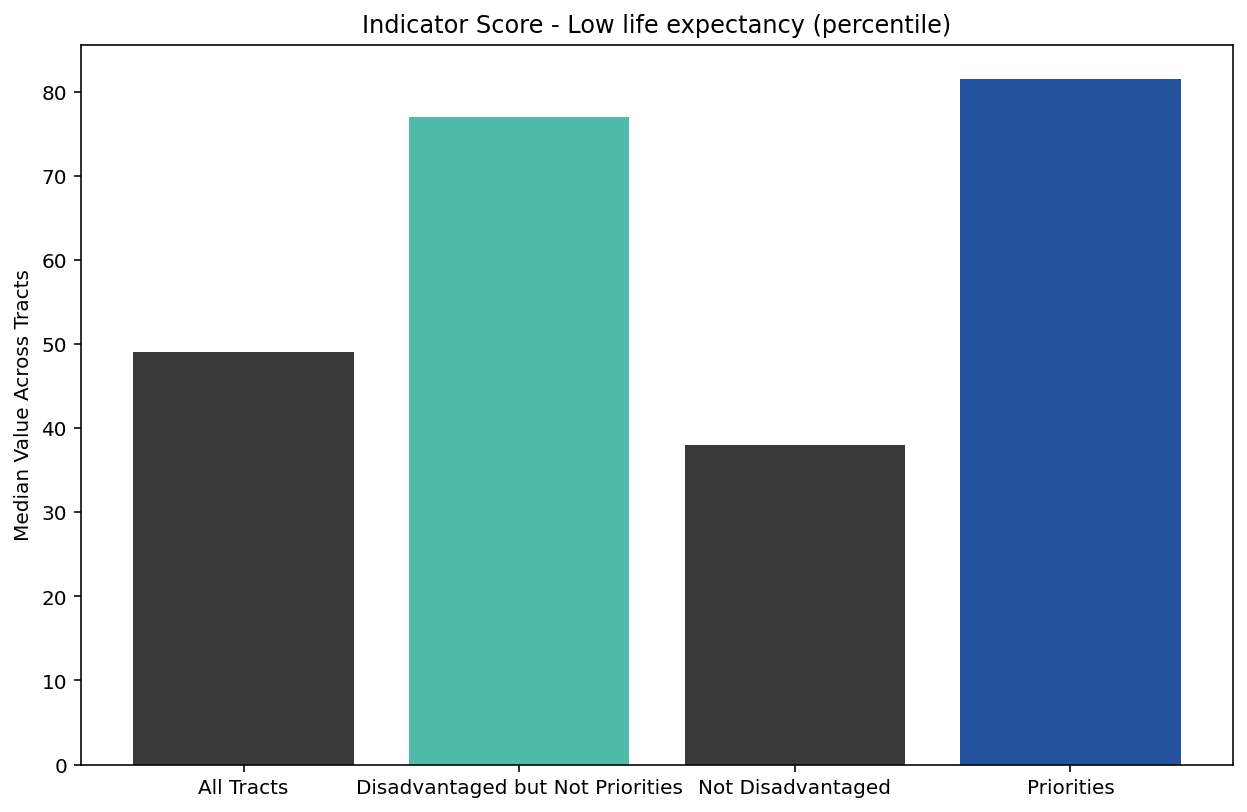

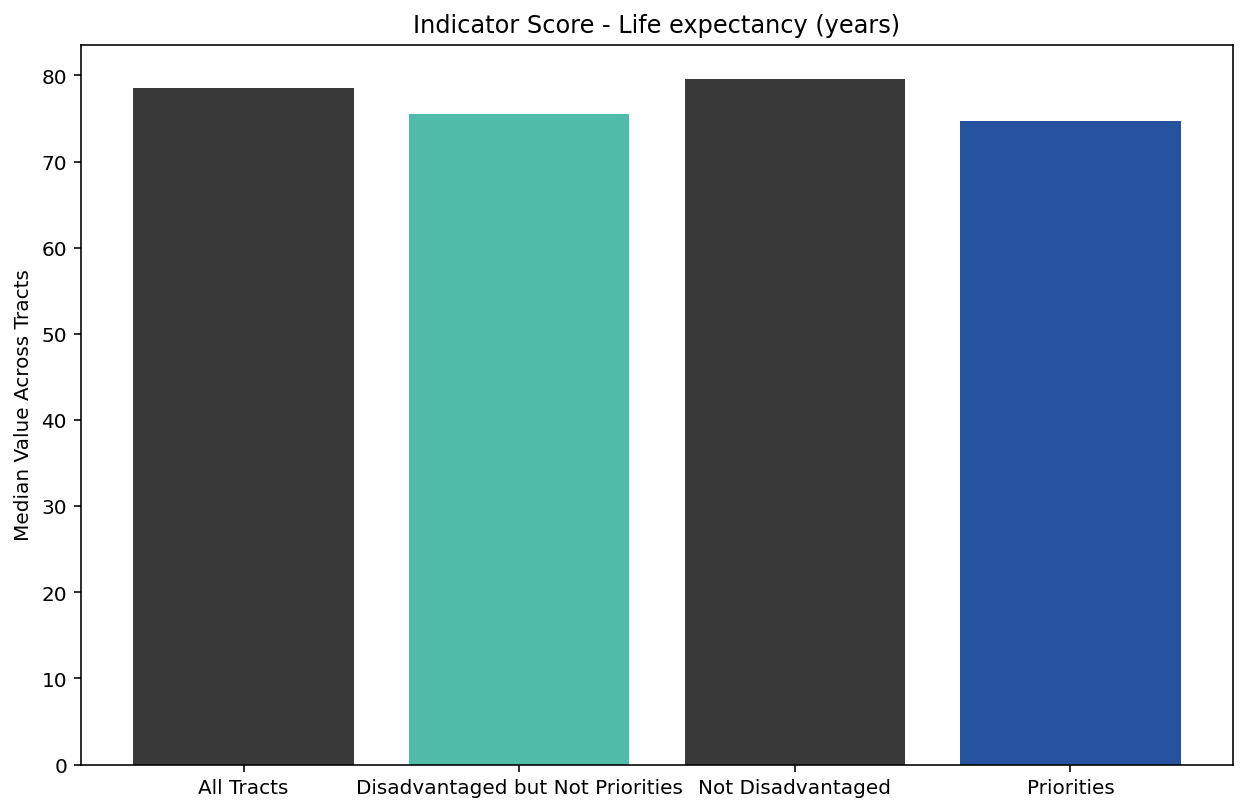

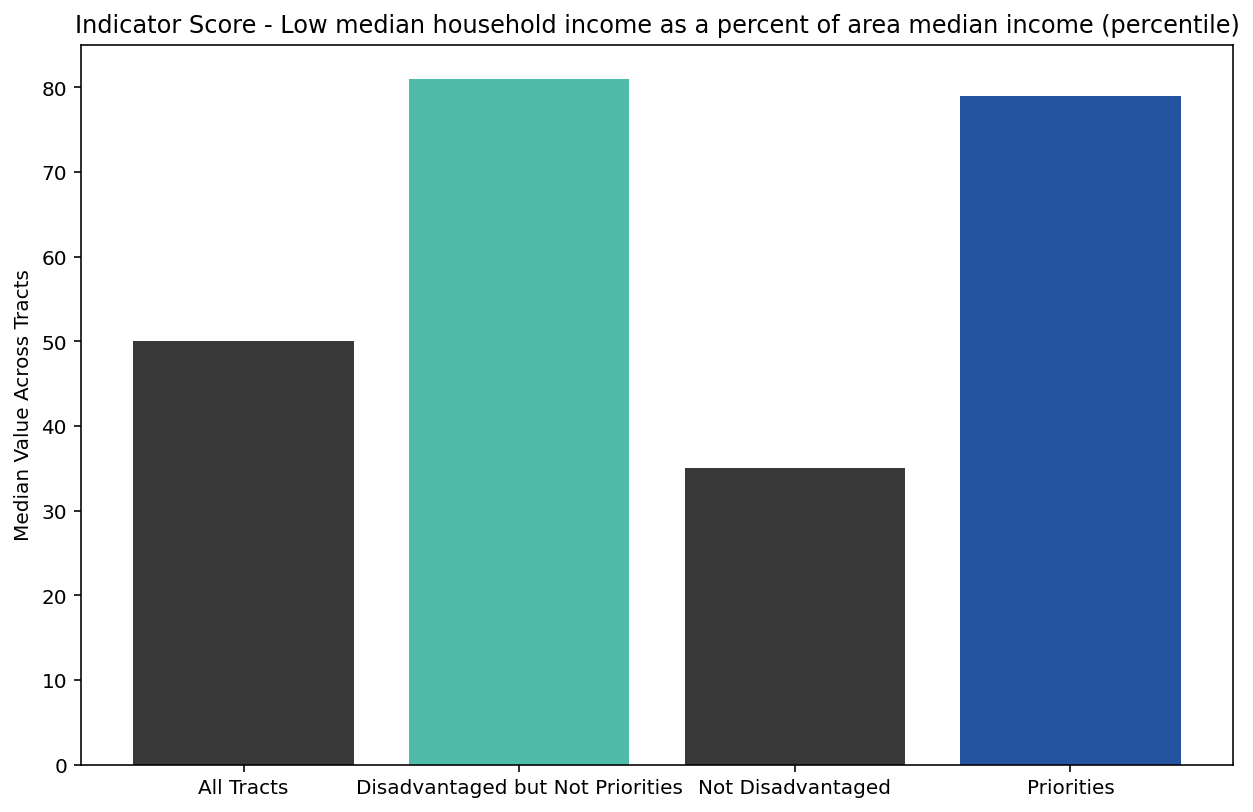

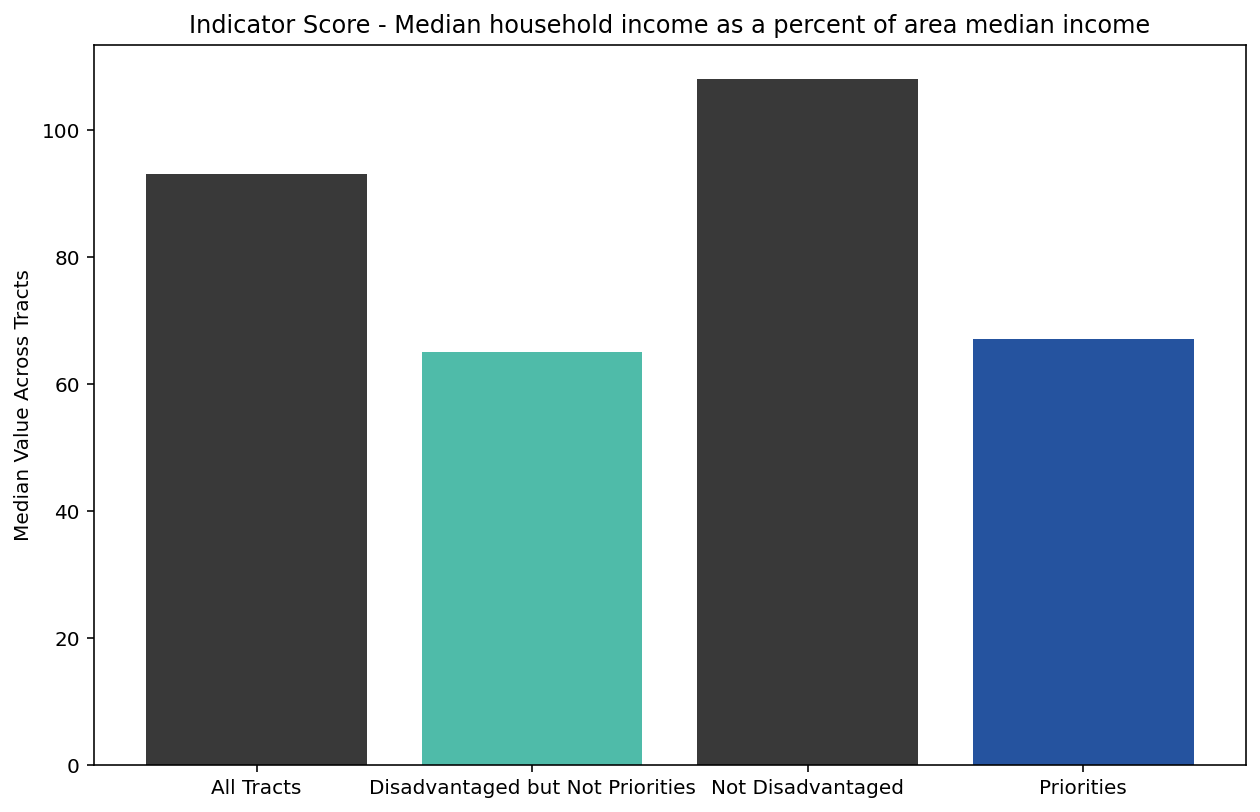

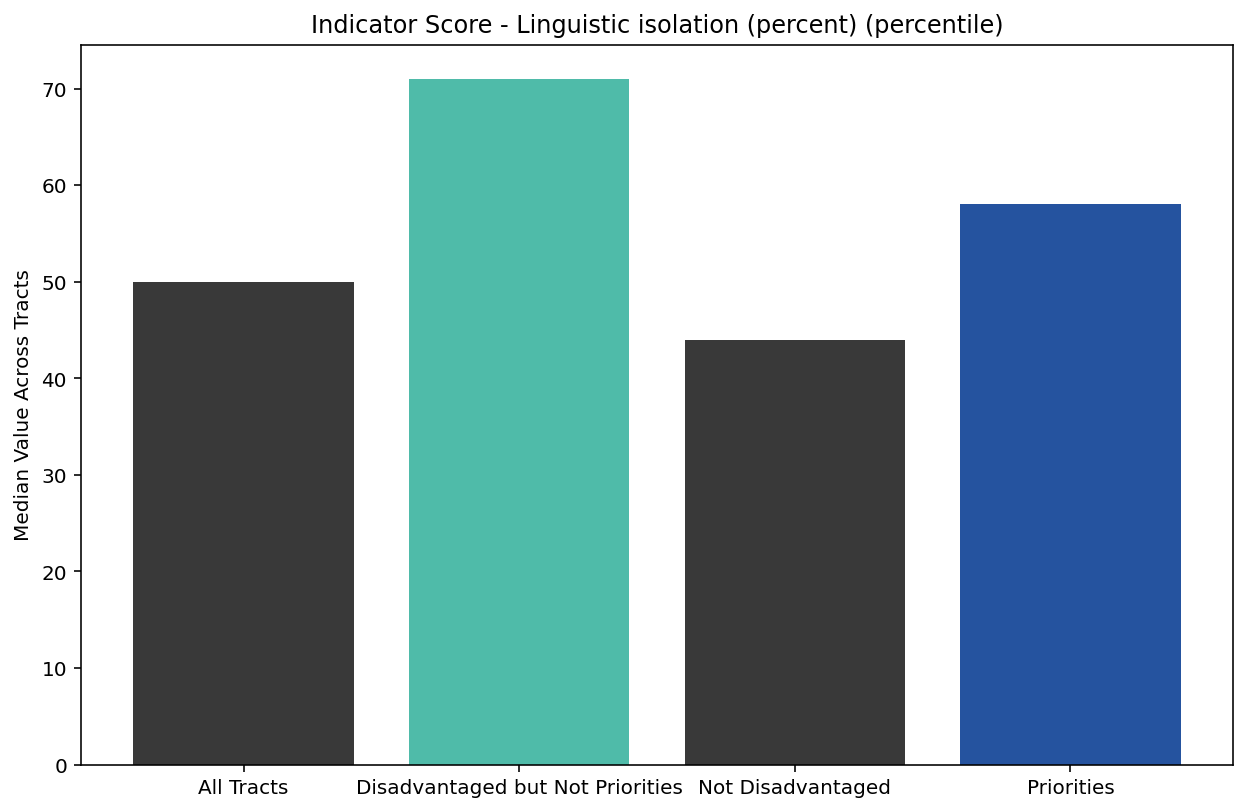

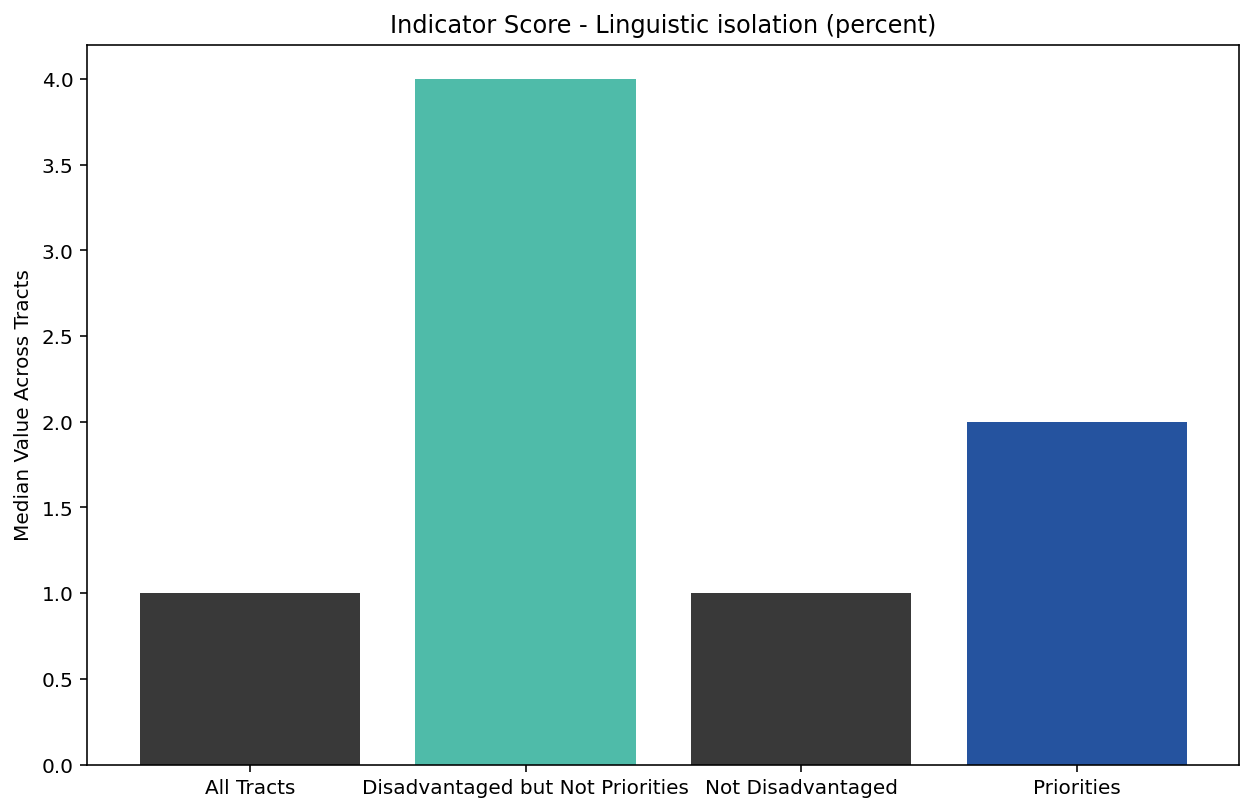

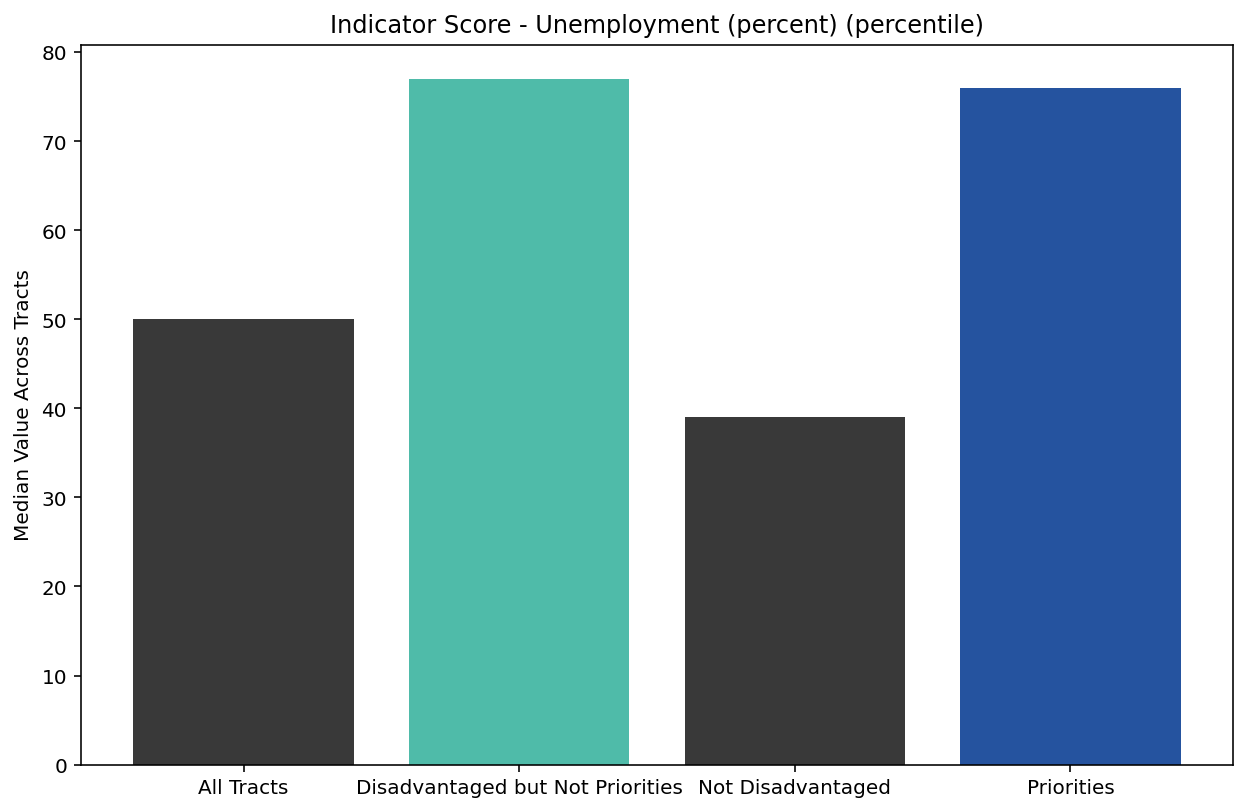

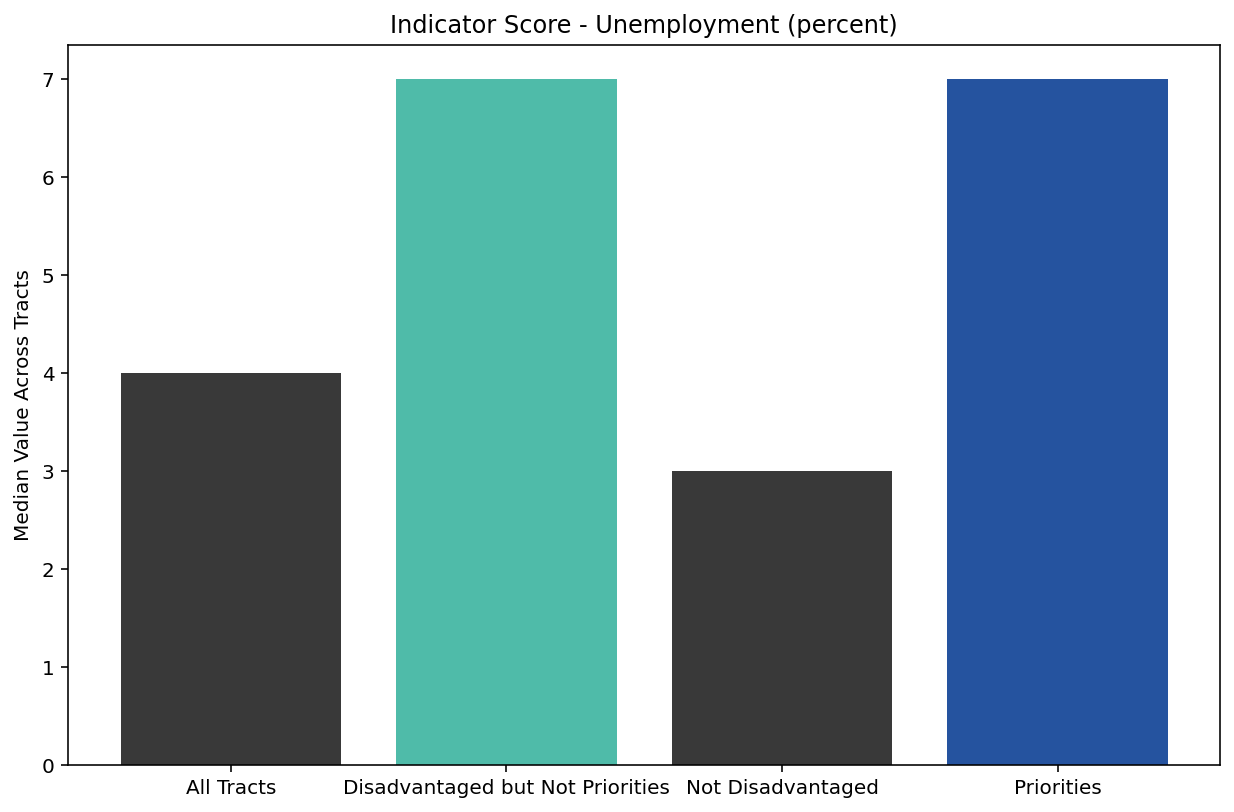

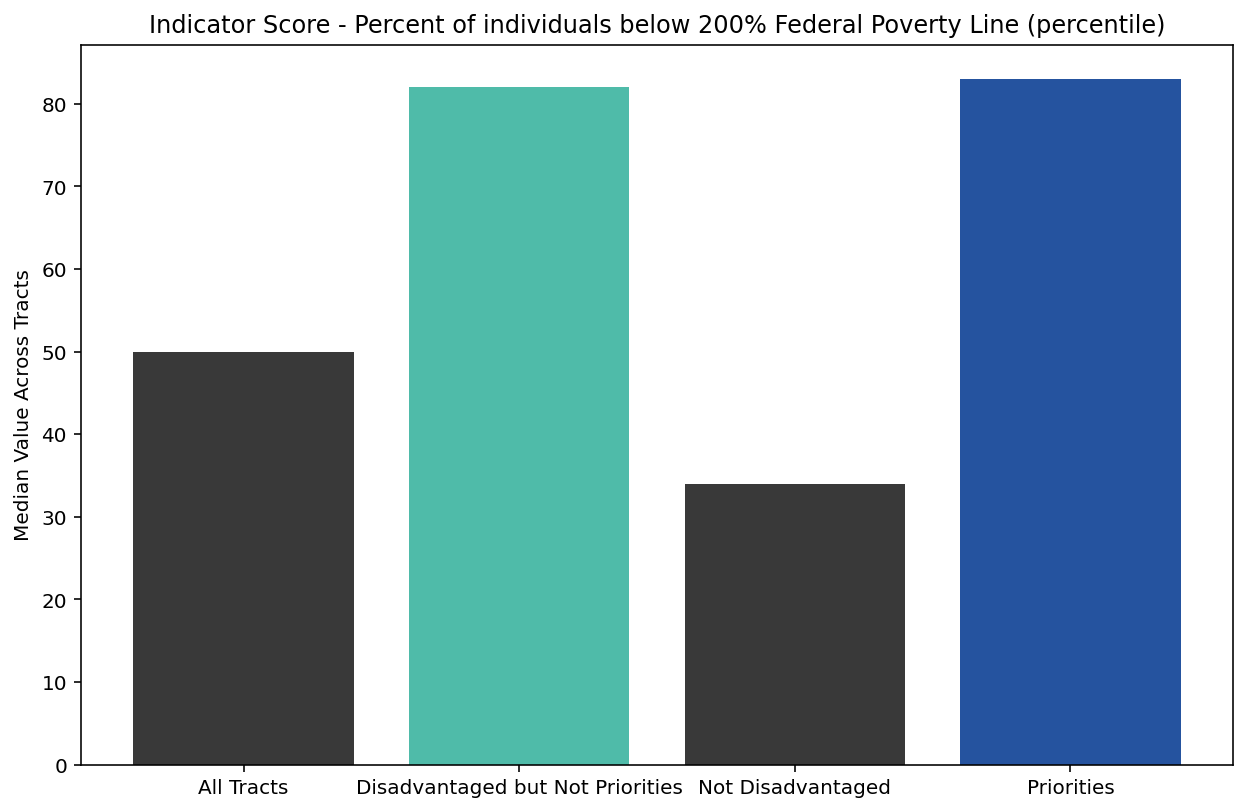

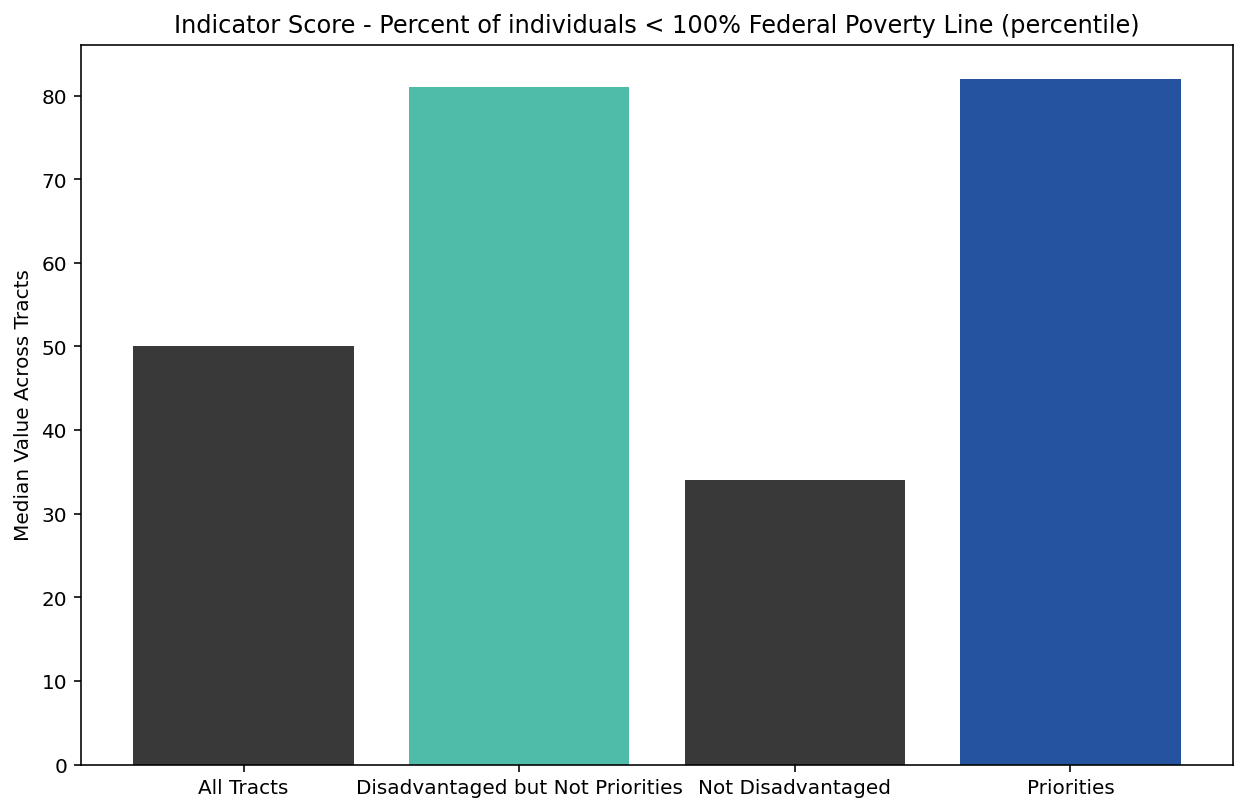

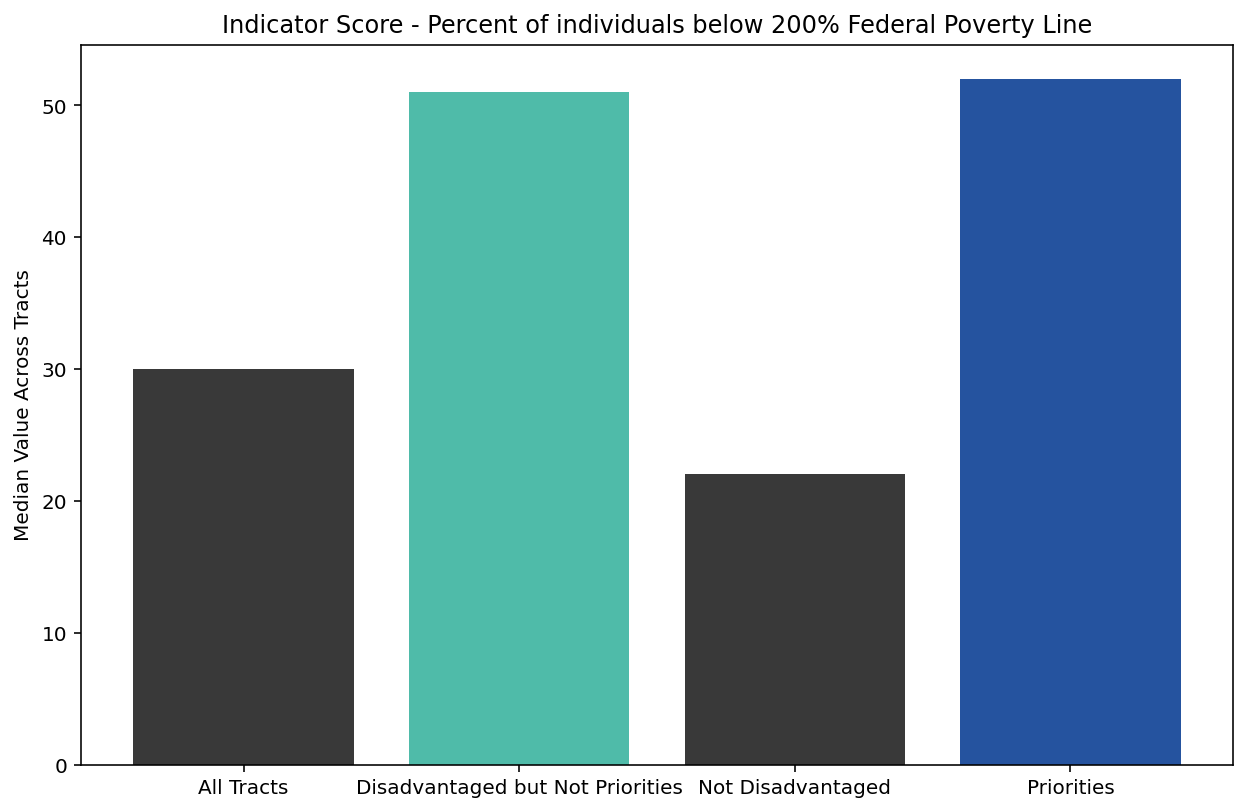

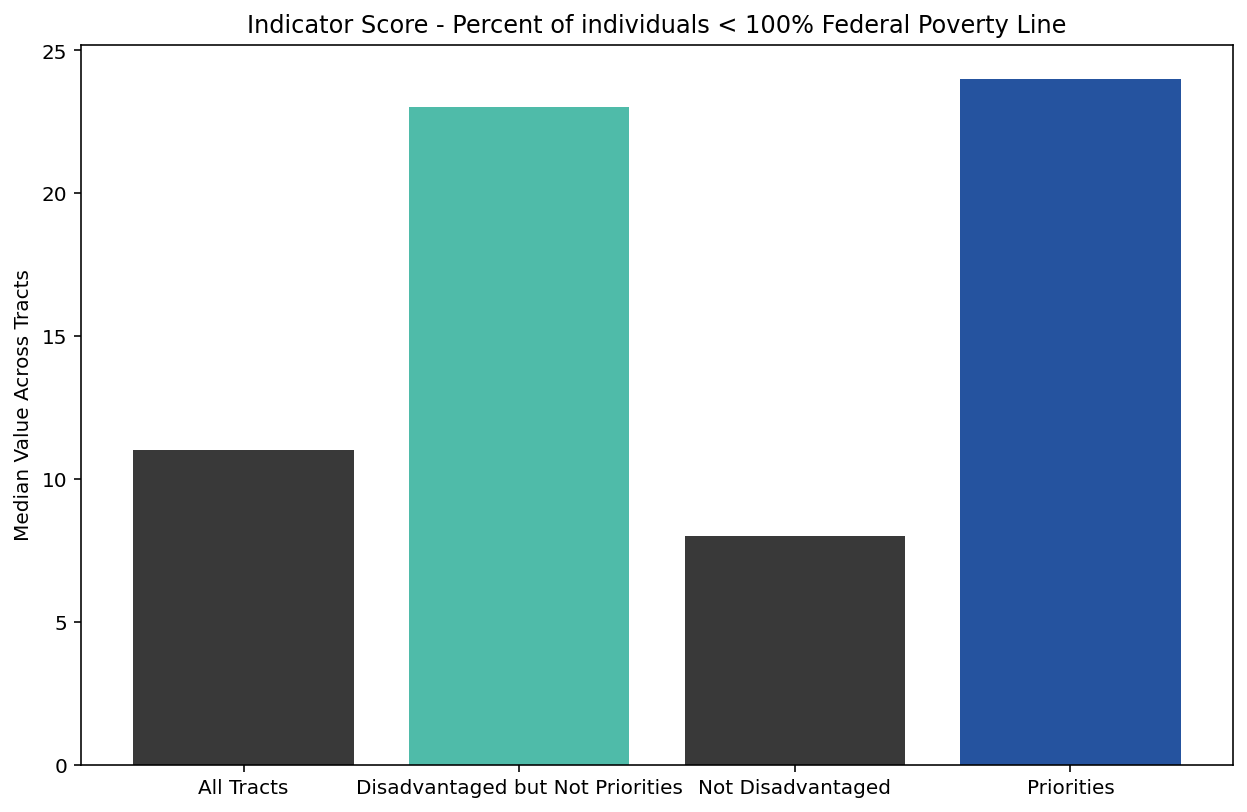

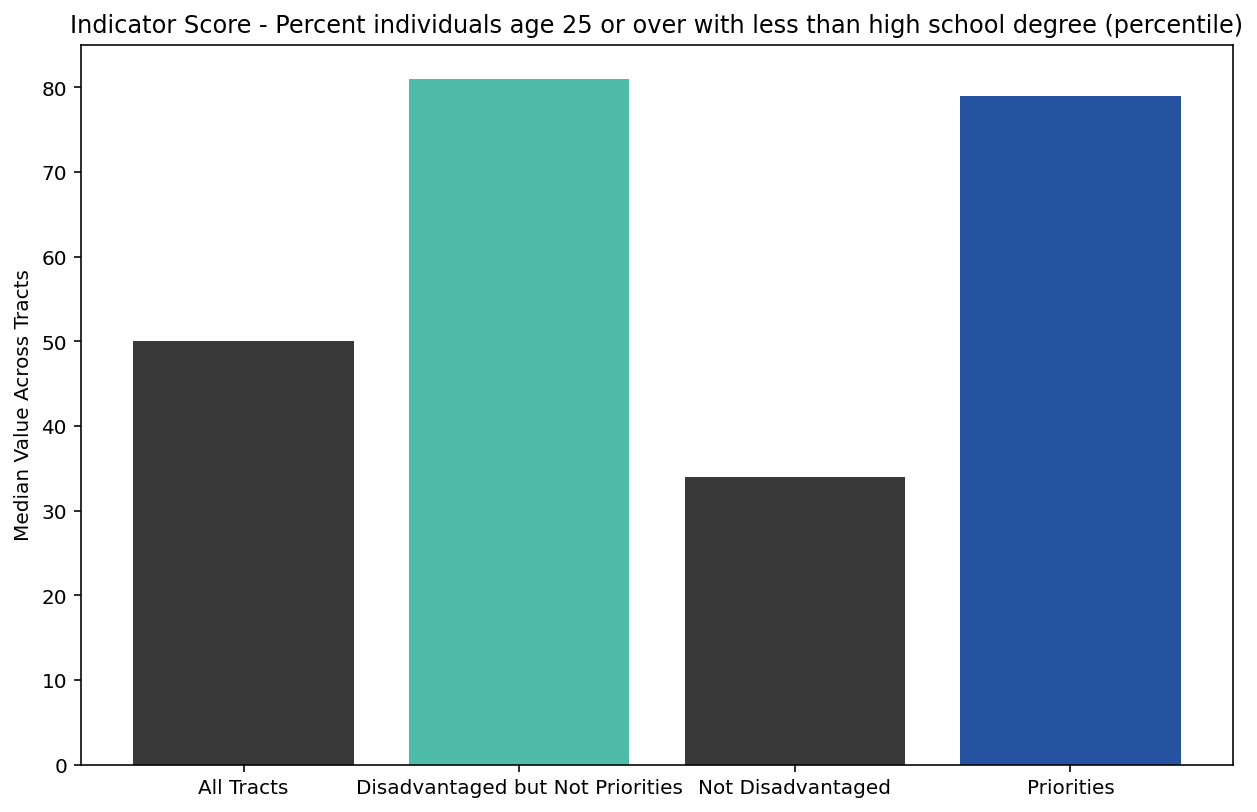

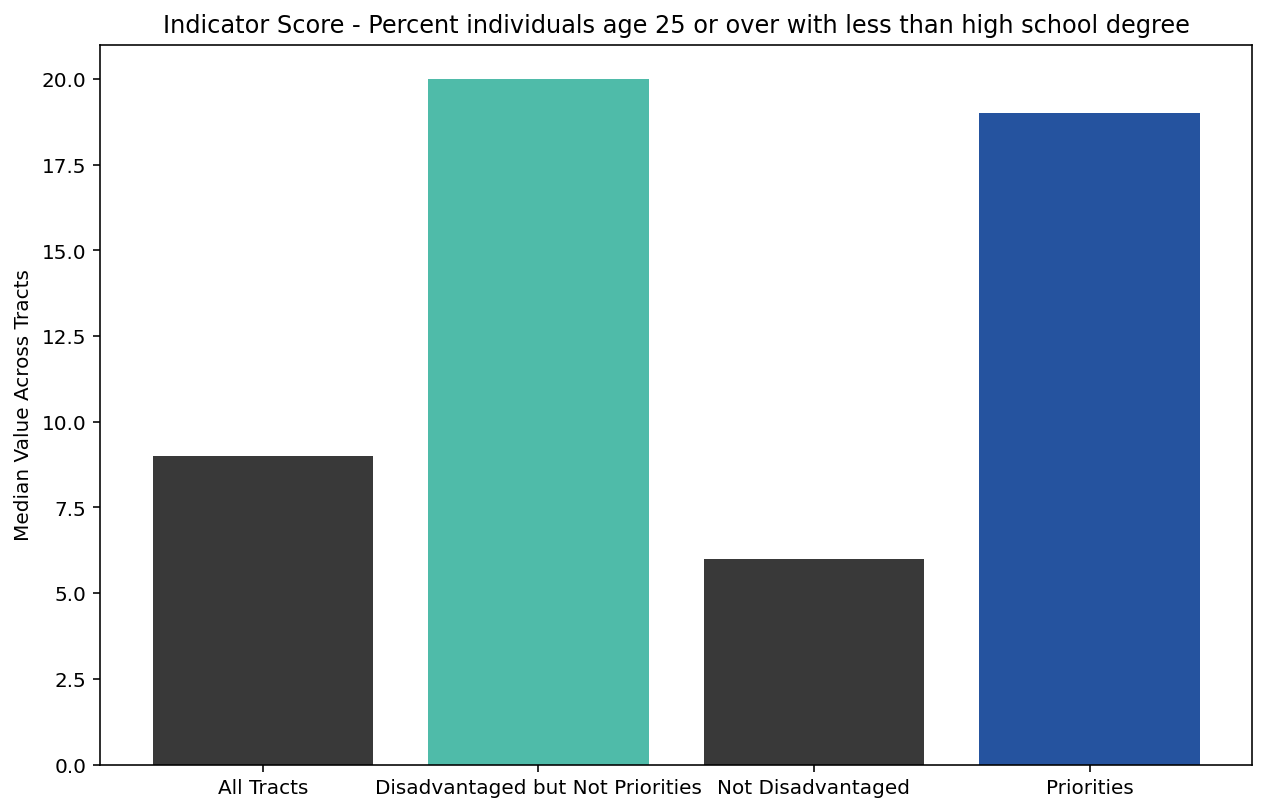

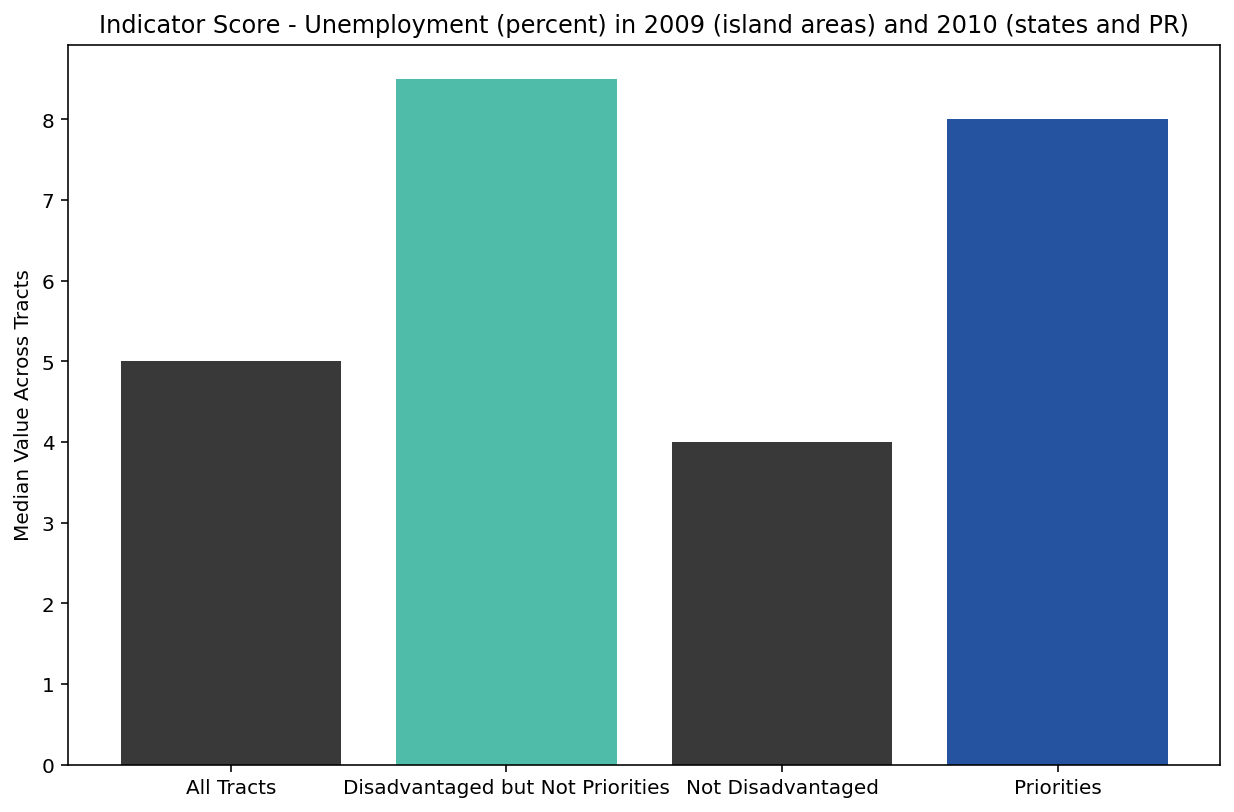

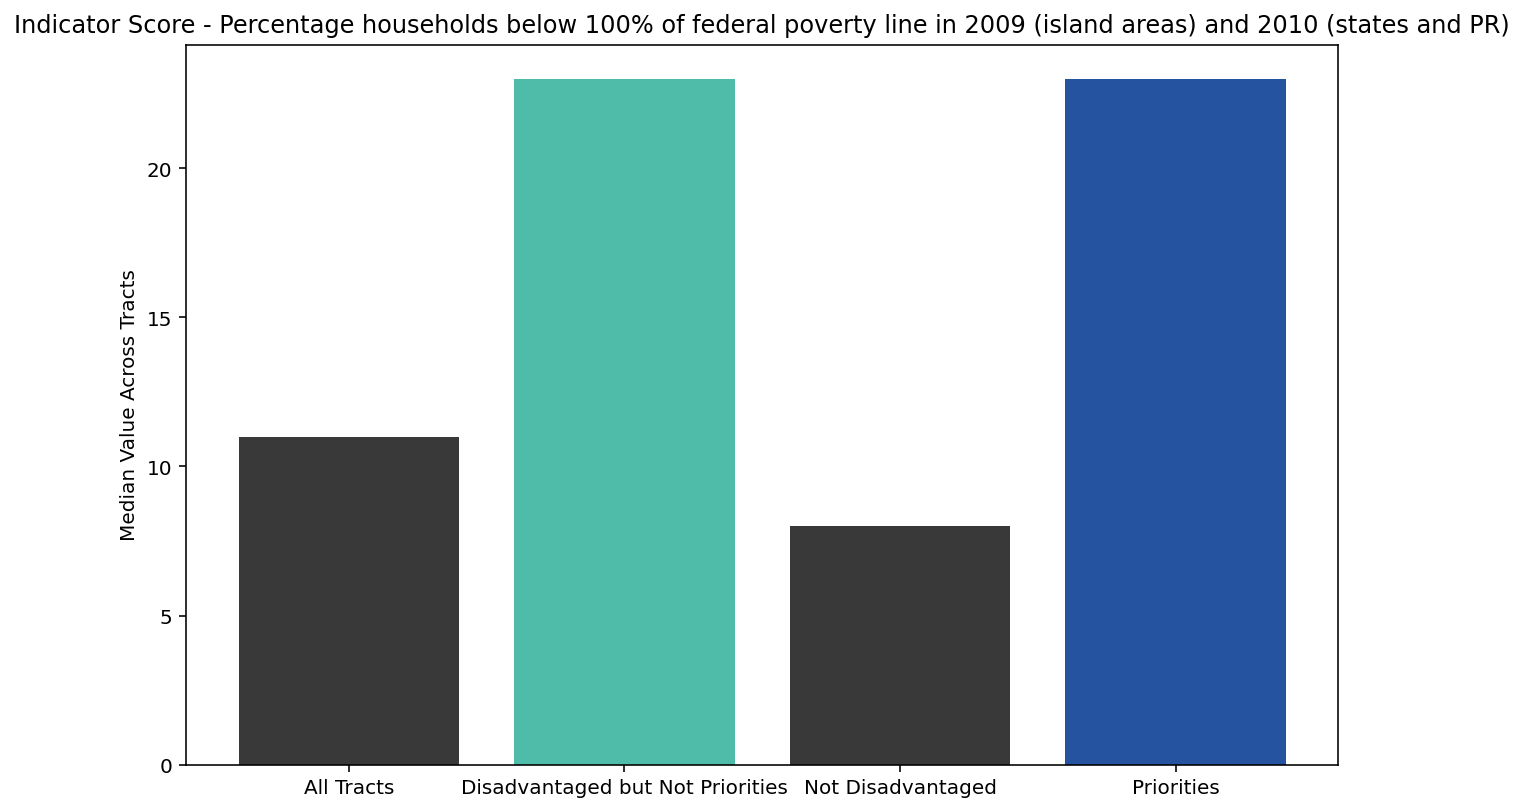

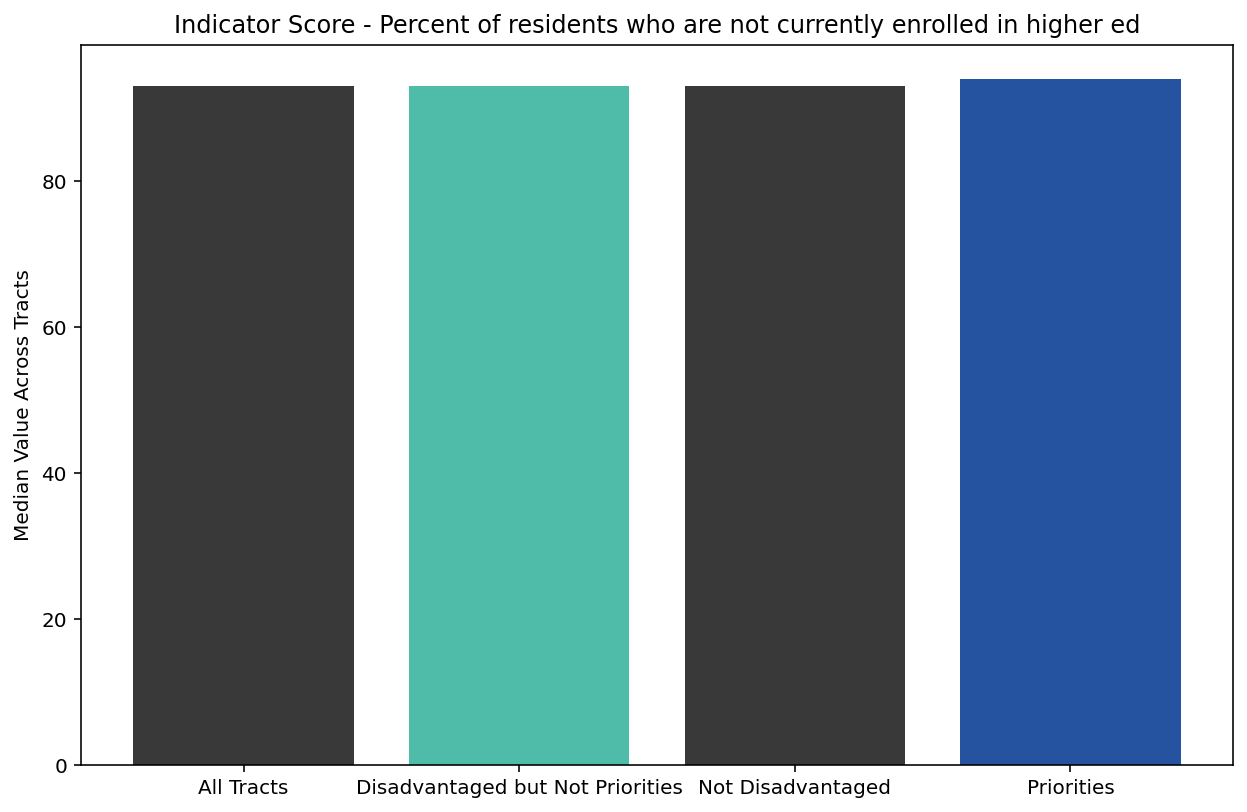

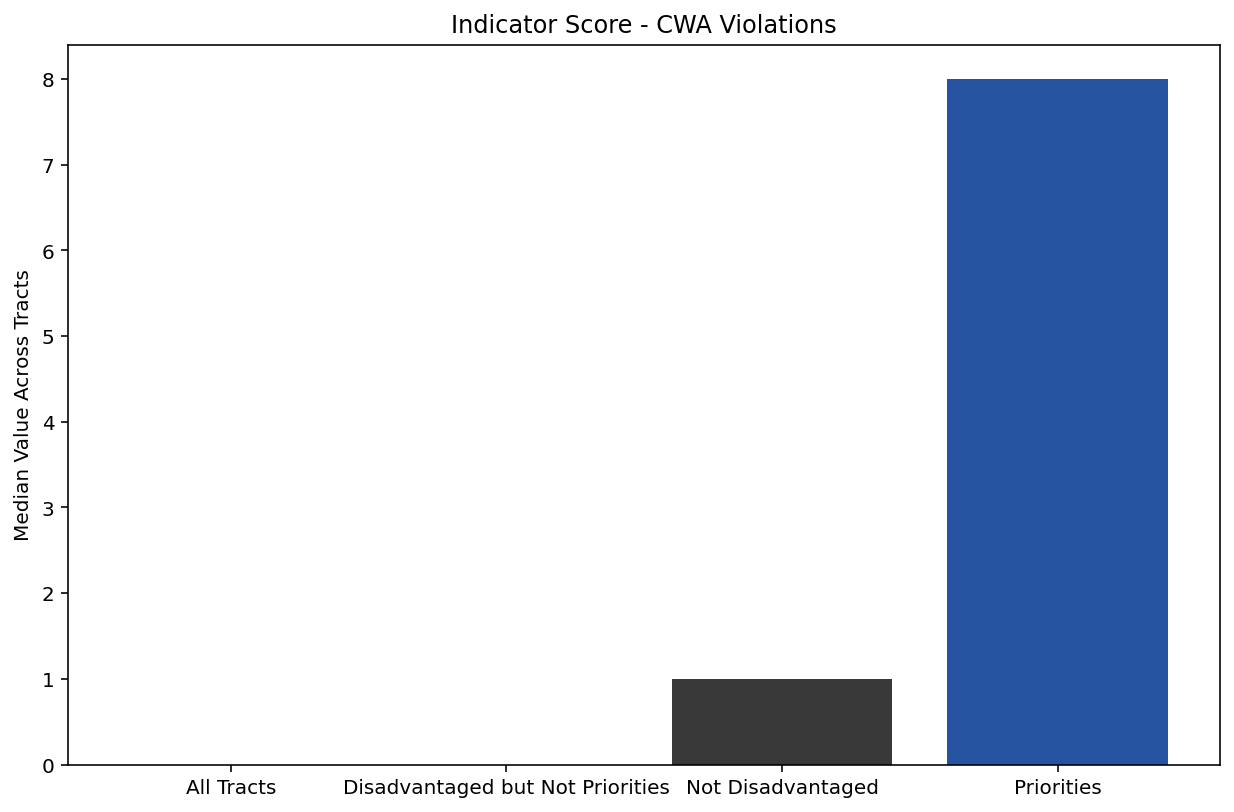

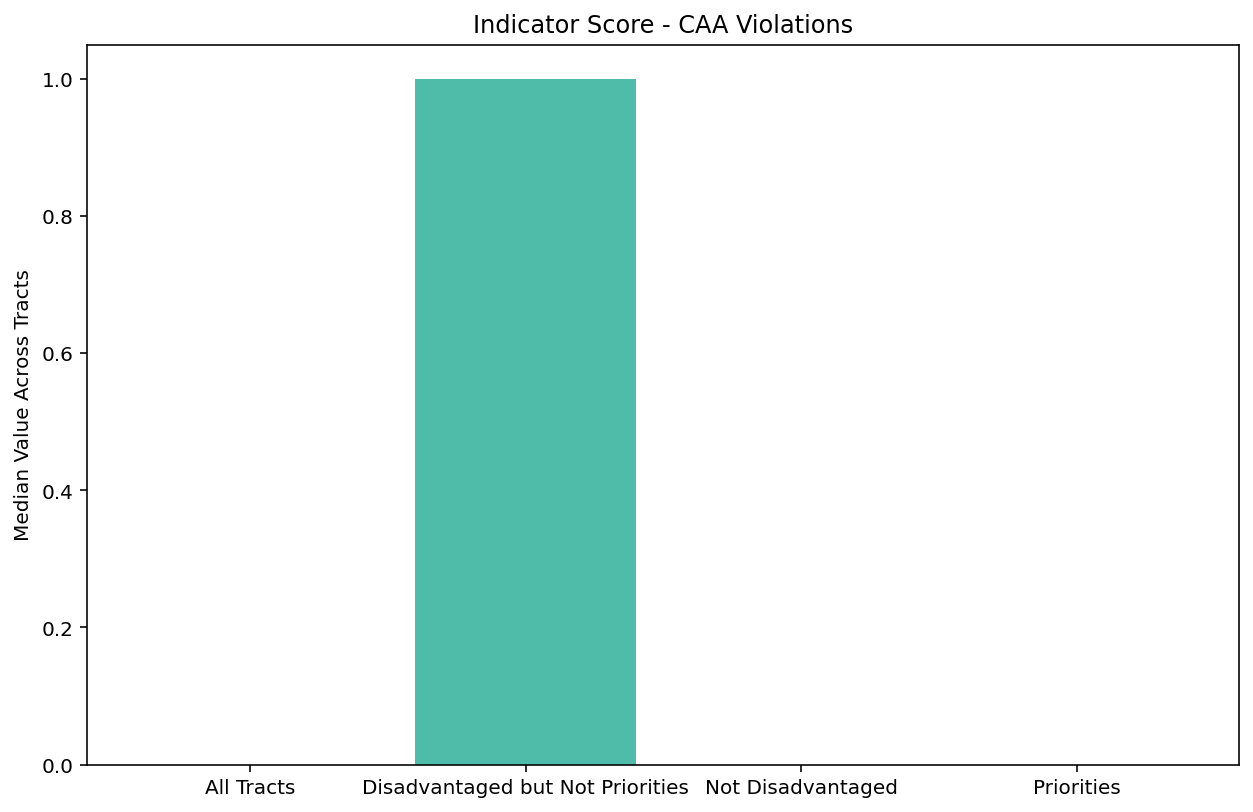

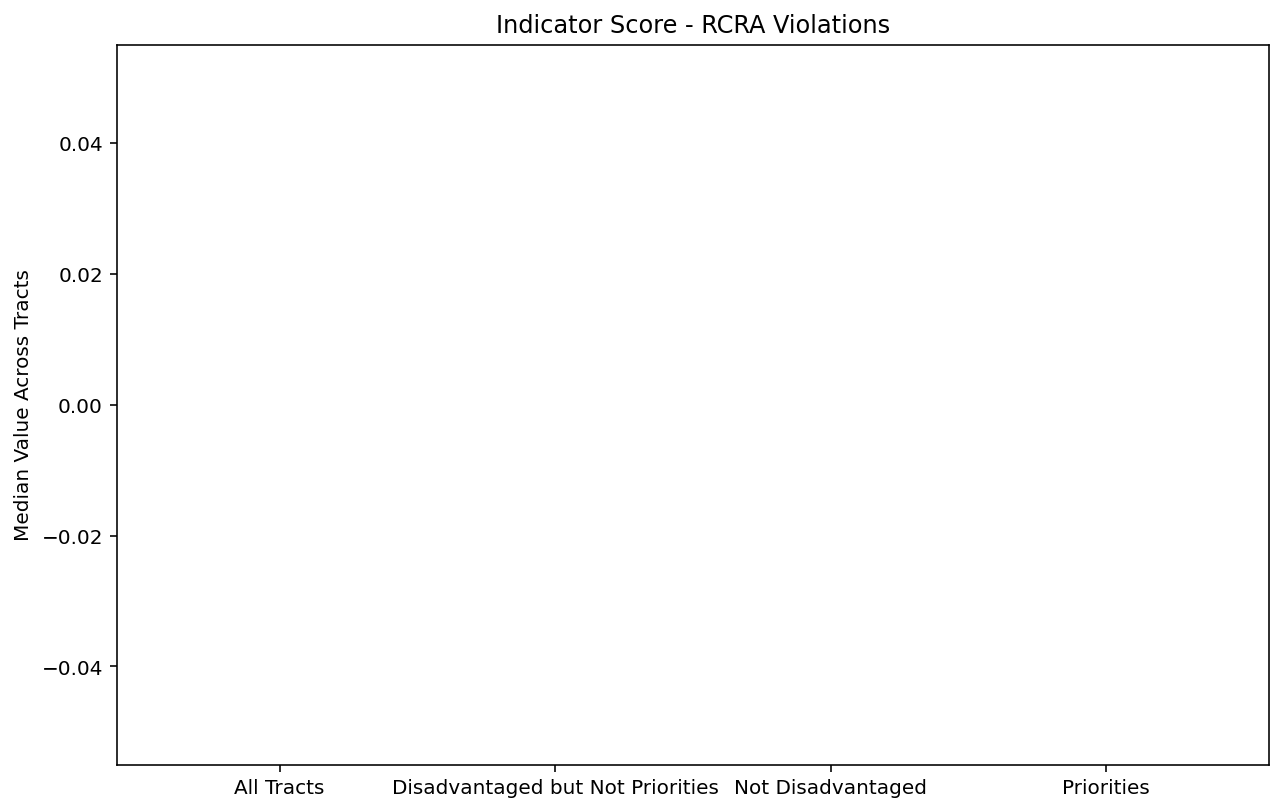

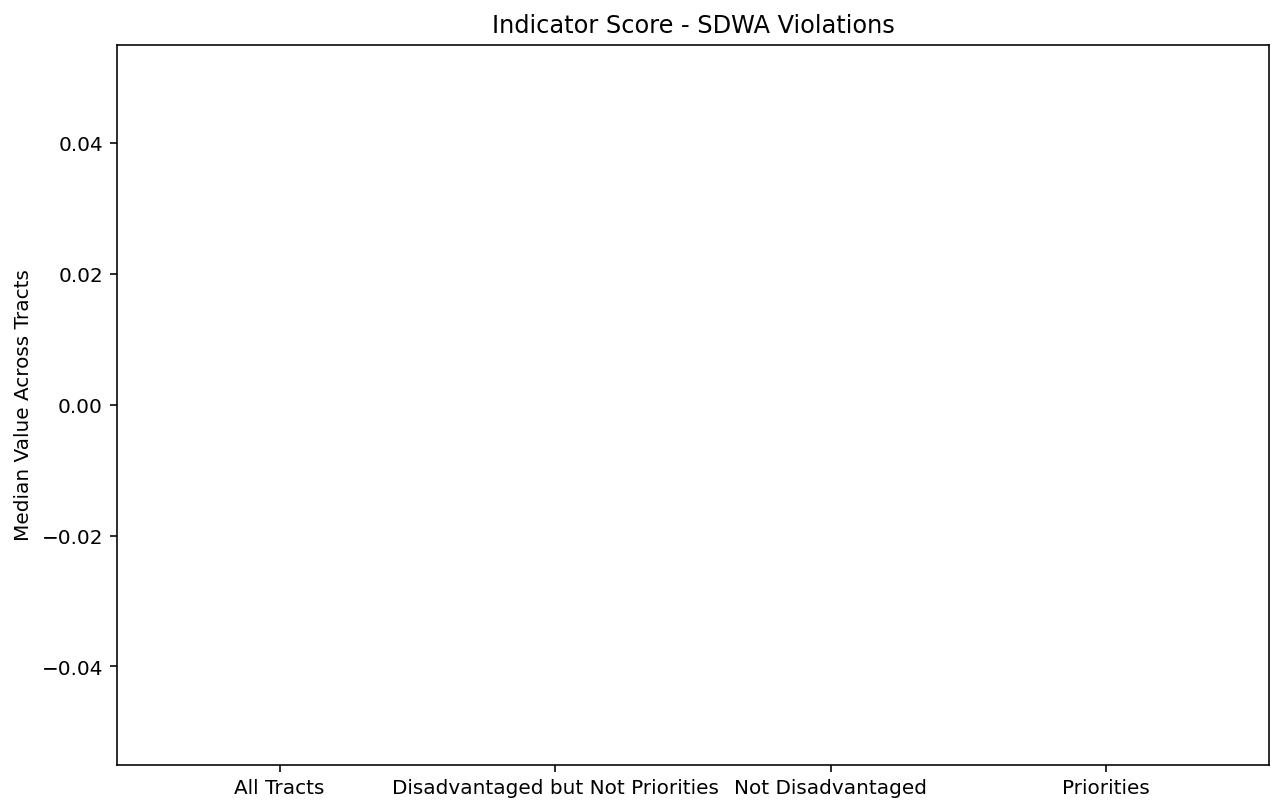

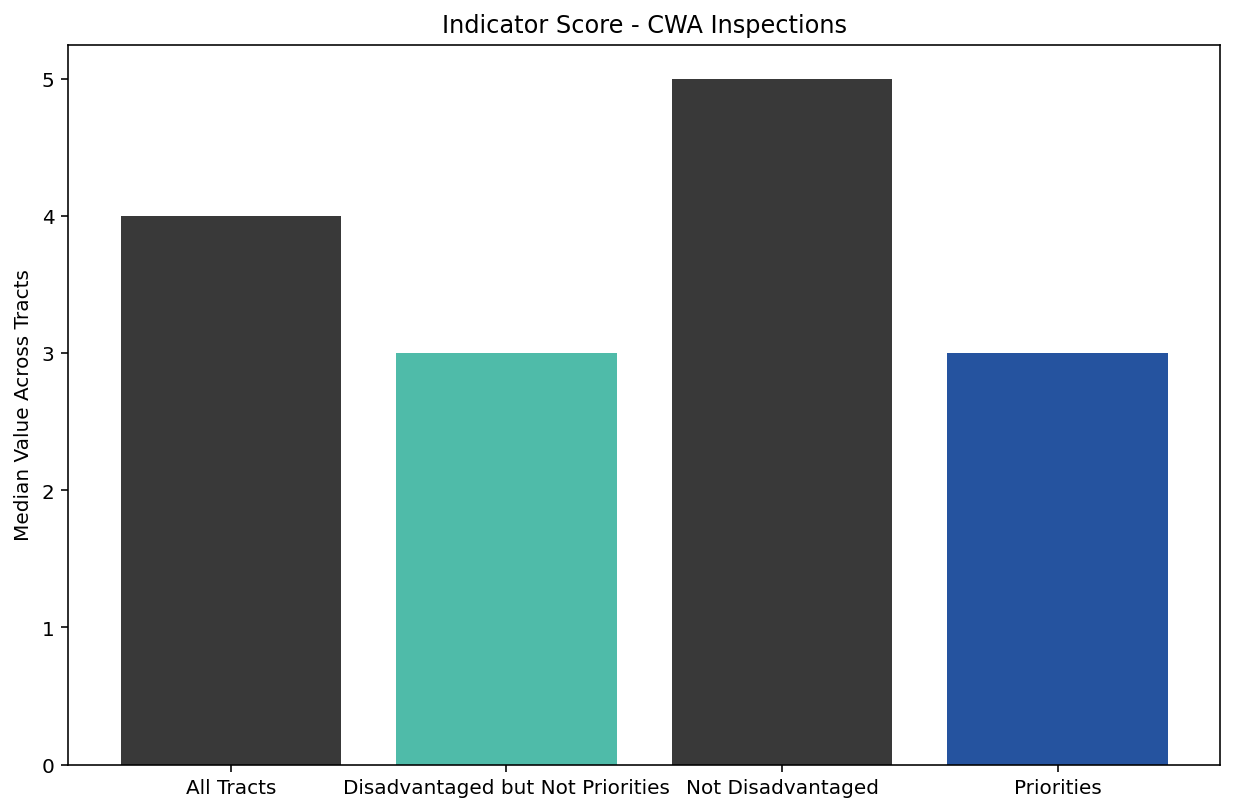

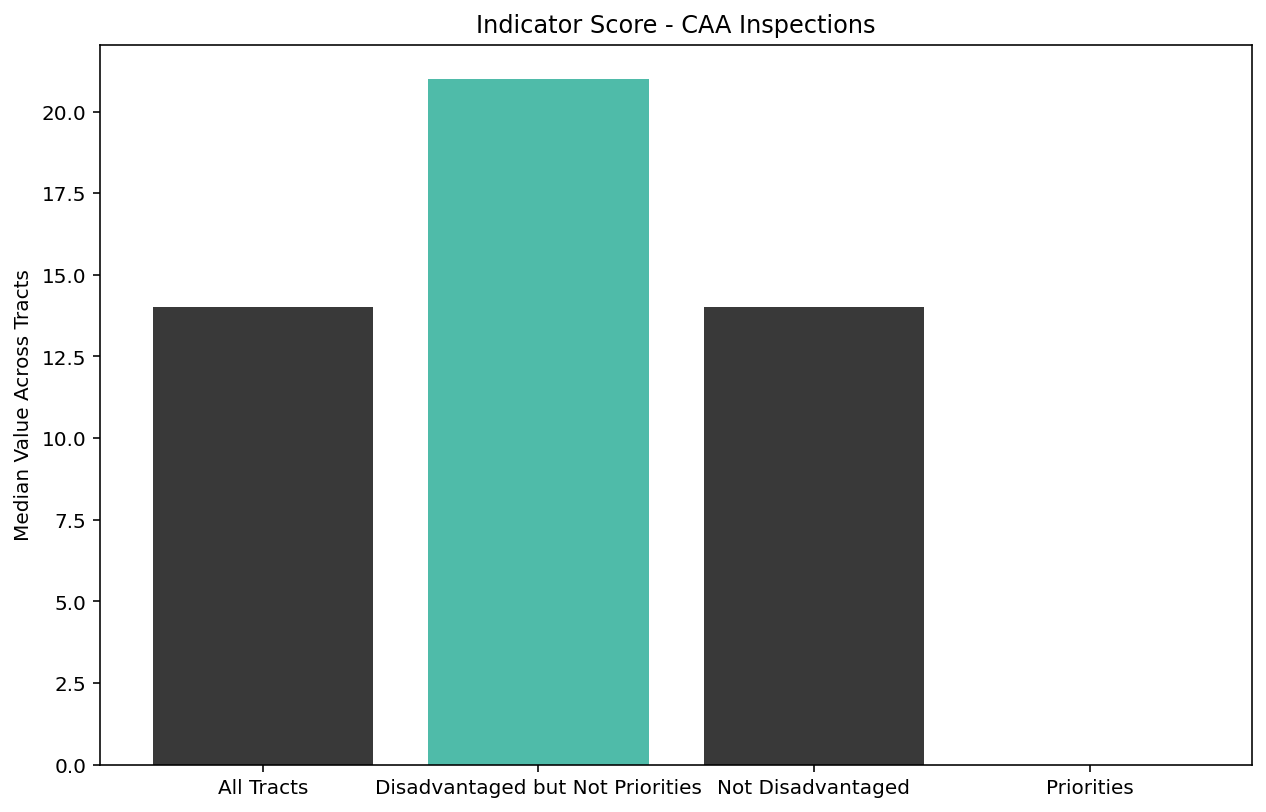

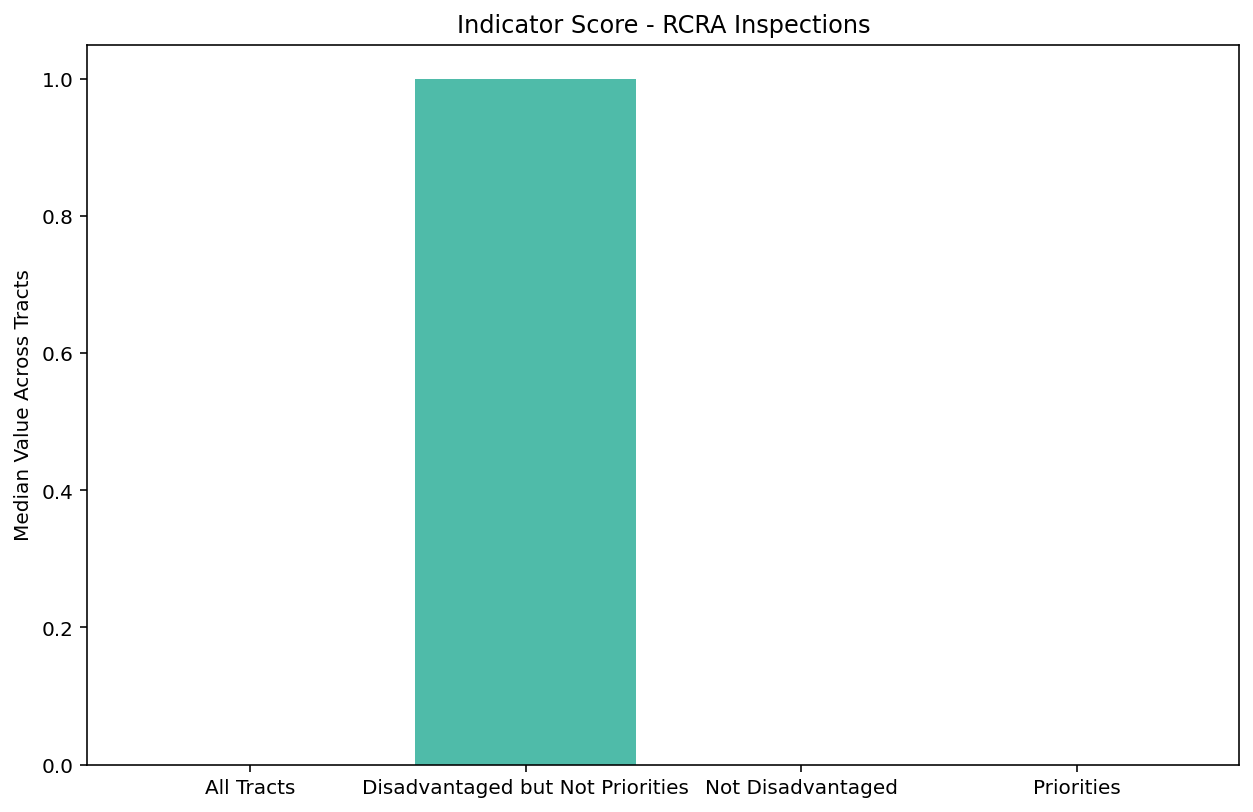

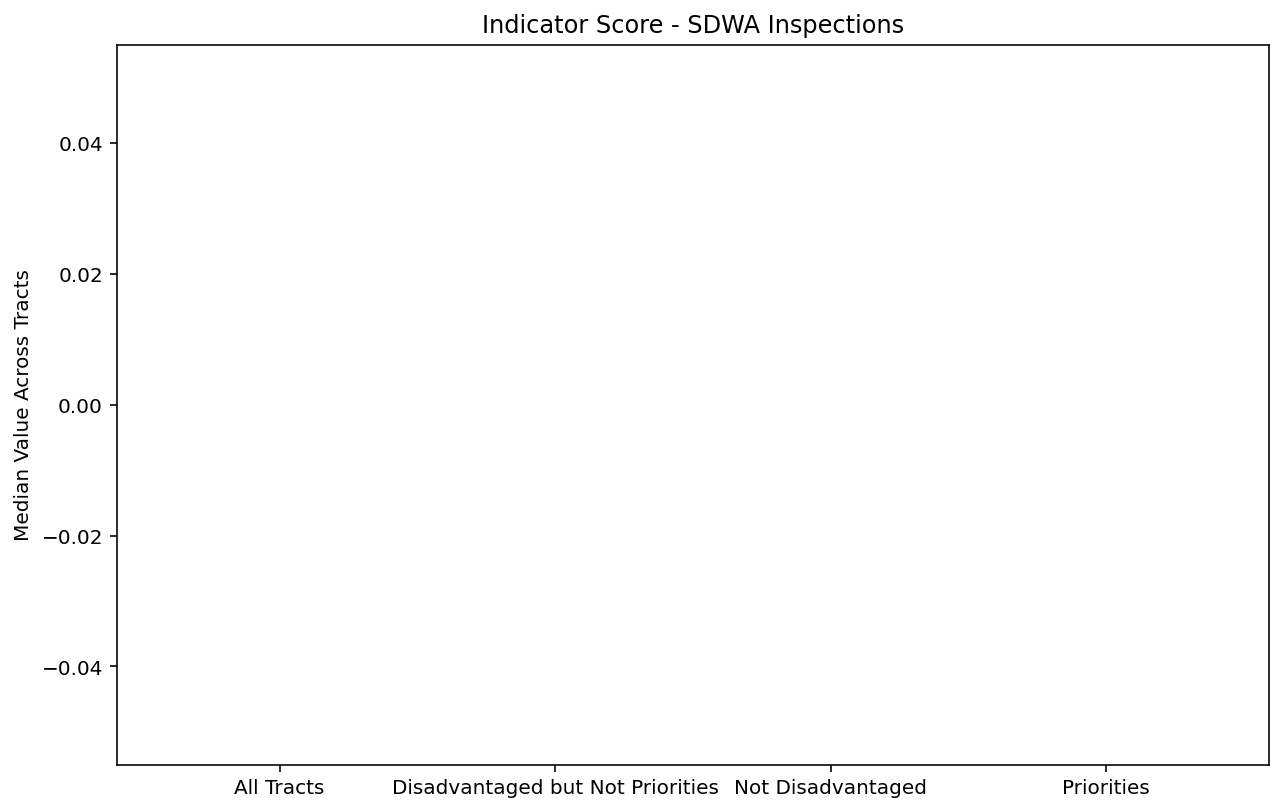

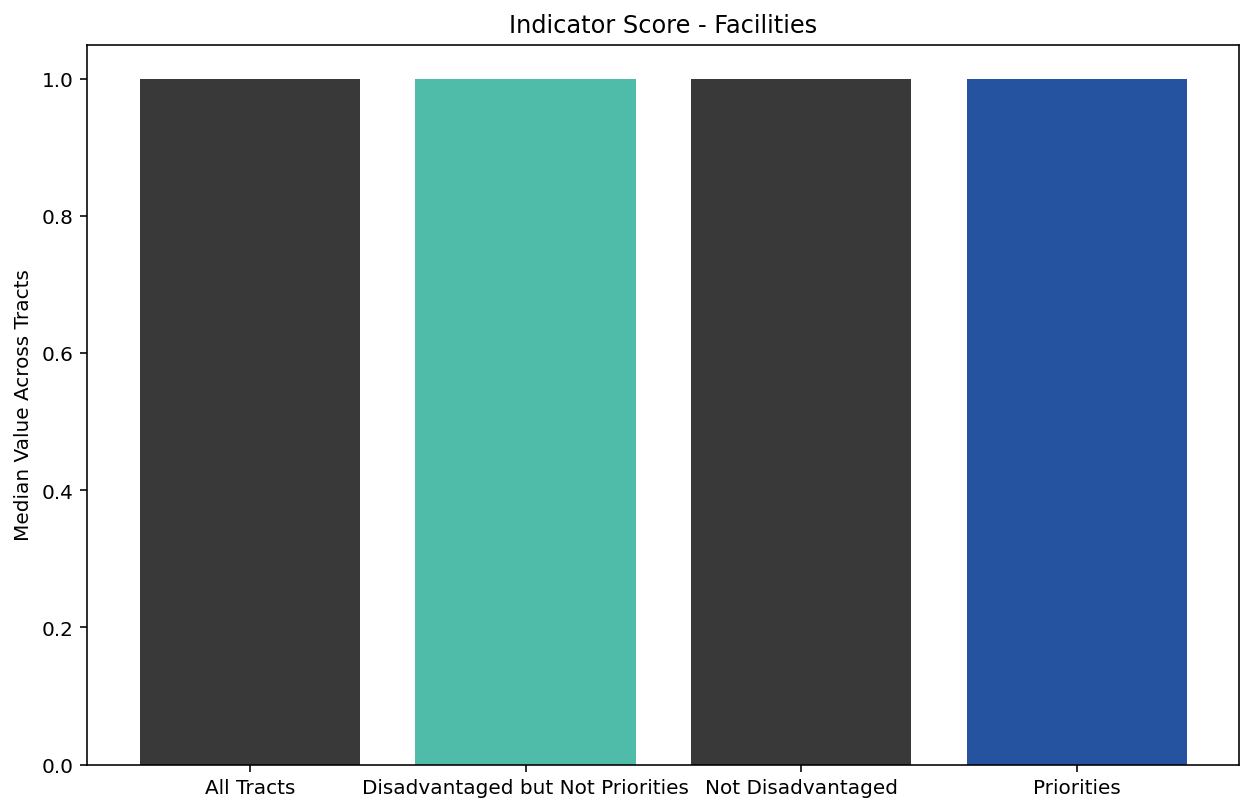

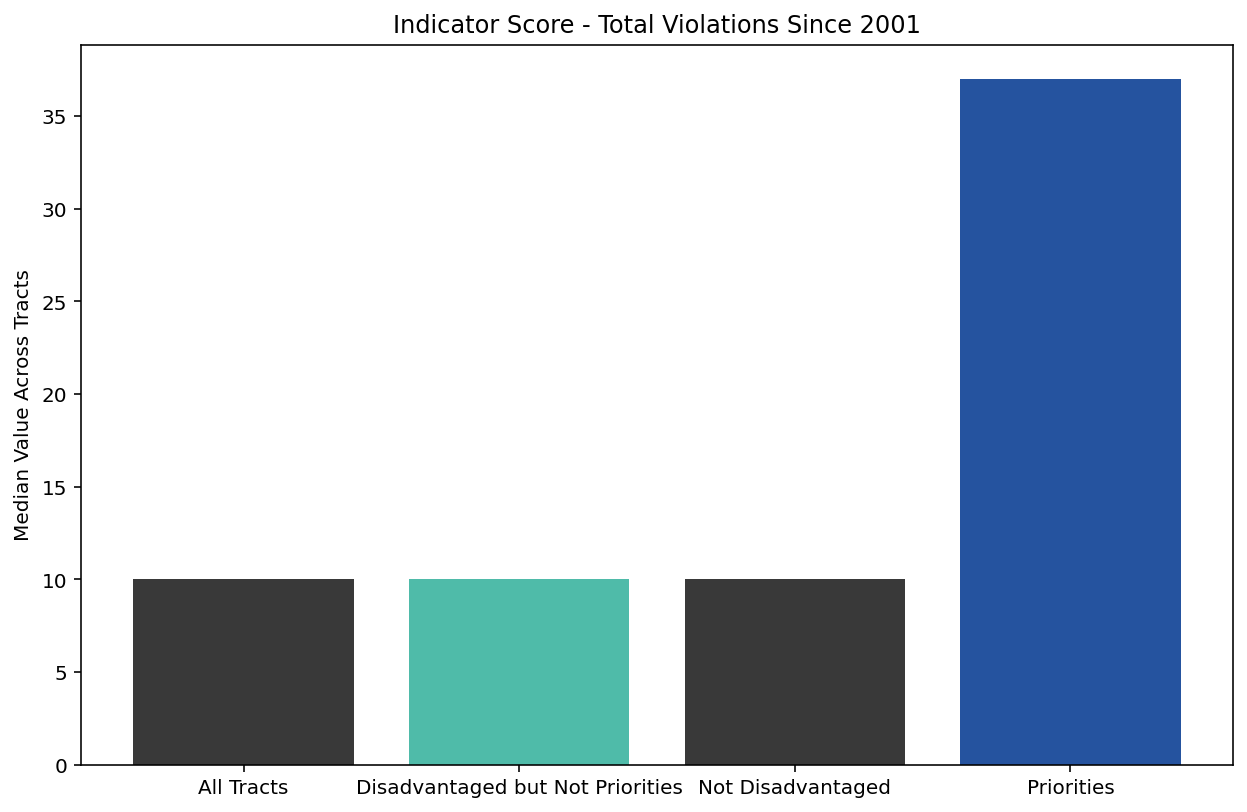

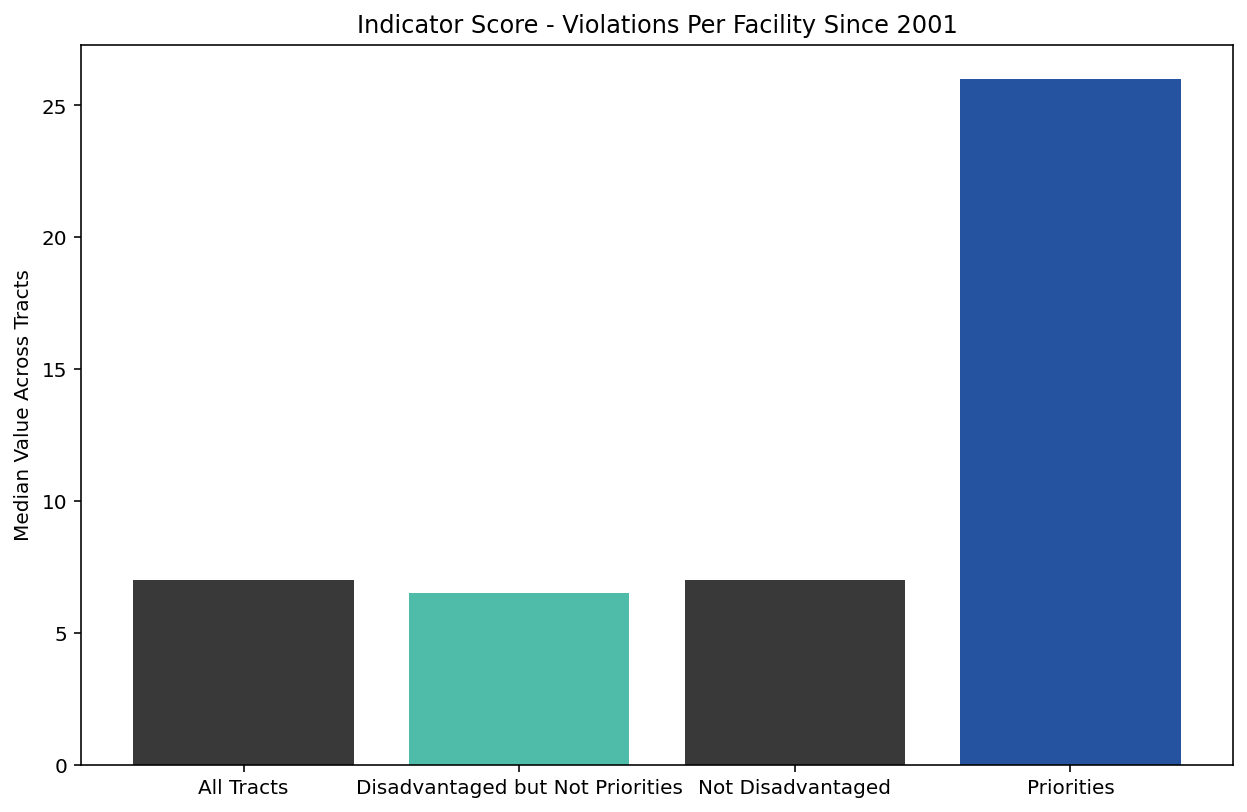

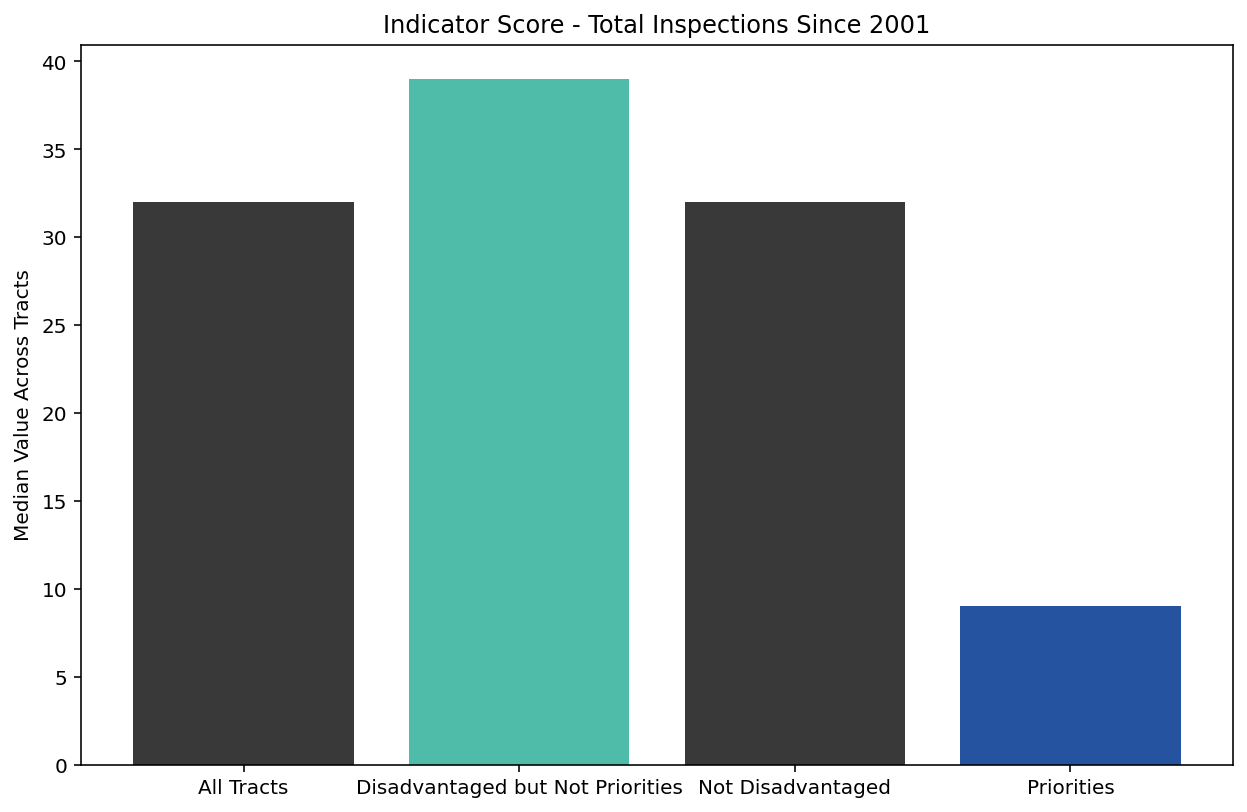

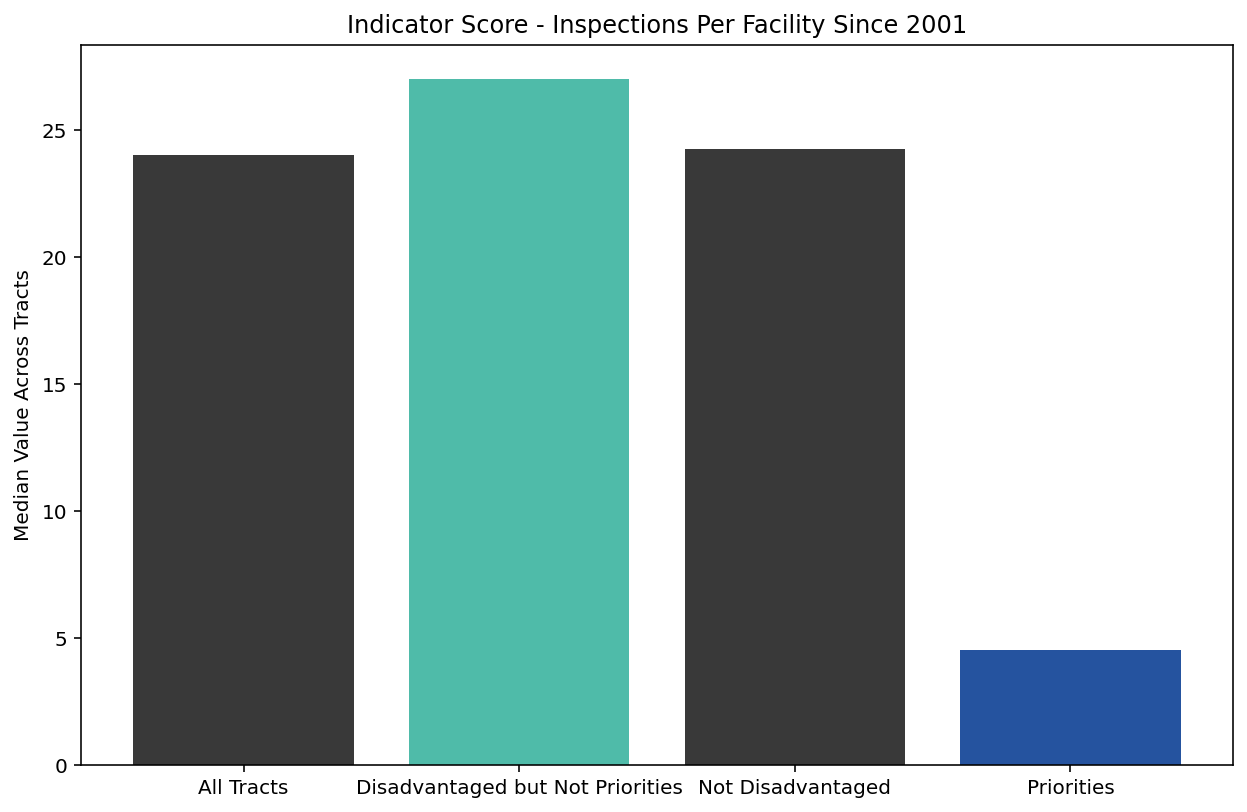

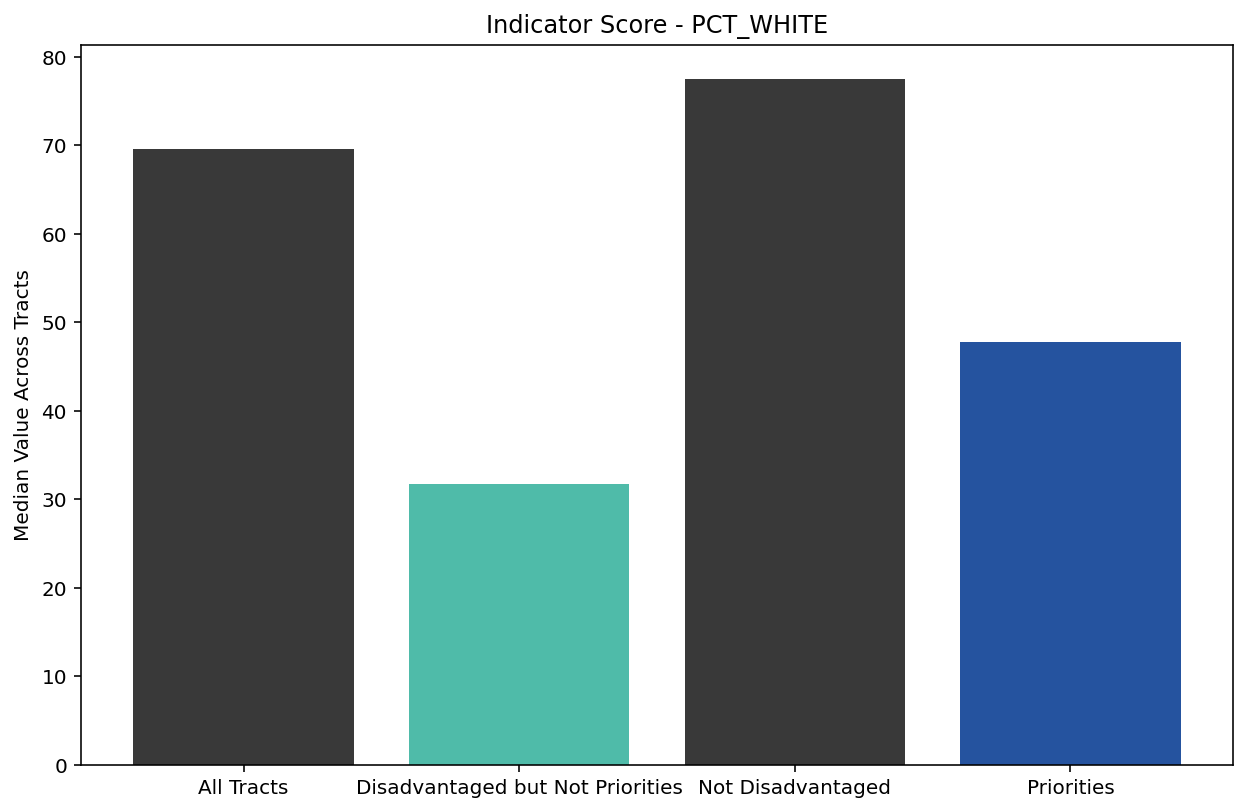

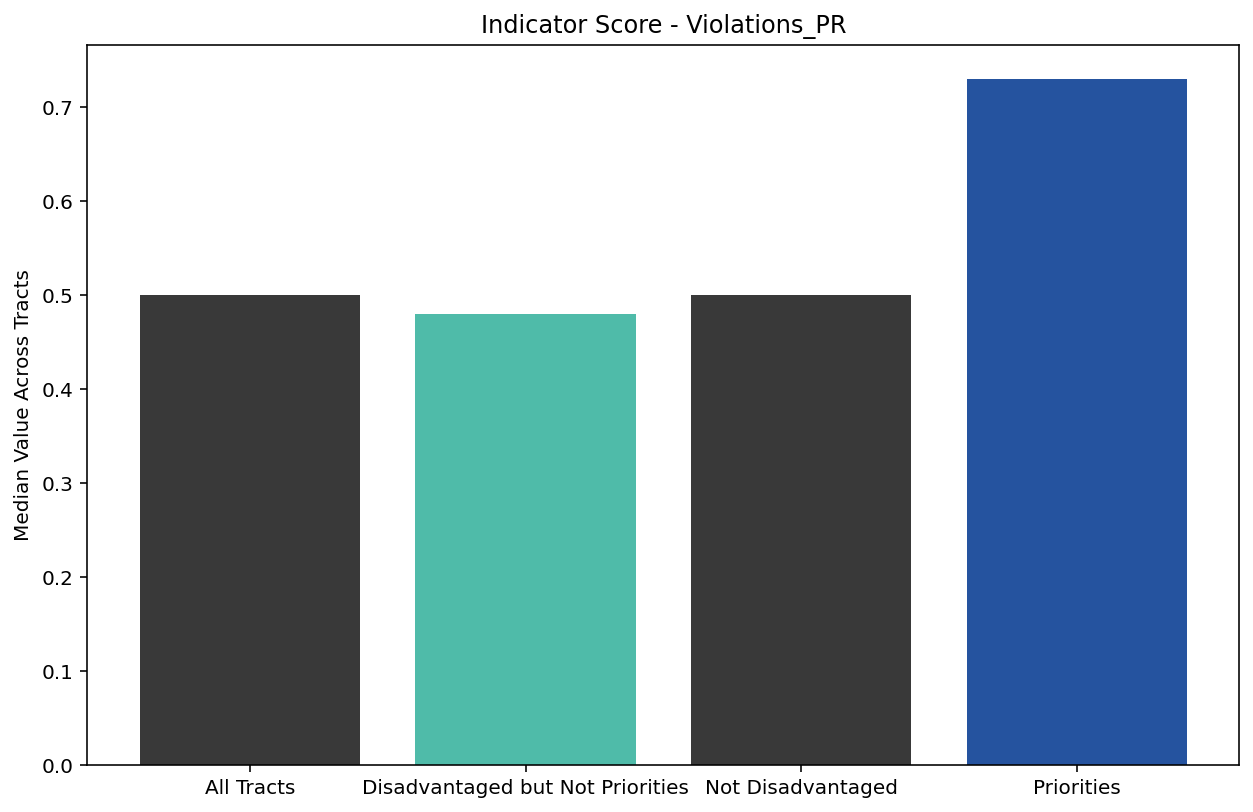

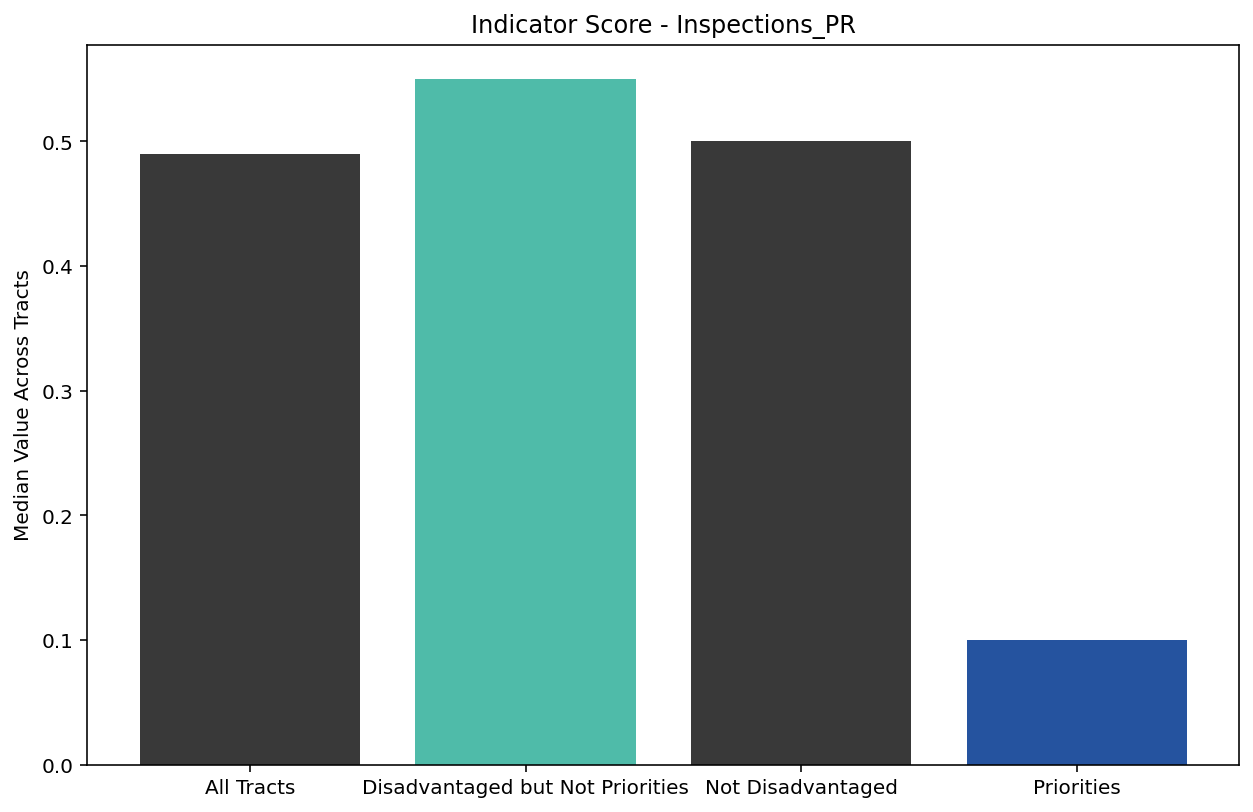

In [21]:
# Calculate the median values for different CEJST indicators
# Report on how these vary across all census tracts, OTHER already identified disadvantaged areas, not disdavantaged areas, and "priorities"
not_priorities = joined[(joined['Identified as disadvantaged']==True) & (~(joined.index.isin(list(priorities.index))))] # Tracts identified as disdvantaged and not targets we have identified as priorities
results = []
for c in joined.columns:
  if (joined[c].dtype != bool) & (joined[c].dtype != object): # Skip columns where values are just true/false
    j = round(joined[c].median(), 2) # Round numbers to 2 decimal places
    i = round(not_priorities[c].median(), 2)
    n = round(nots[c].median(), 2)
    p = round(priorities[c].median(),2 )
    results.append({"indicator": c, "All Tracts": j, "Disadvantaged but Not Priorities": i, "Not Disadvantaged": n, "Priorities": p})
results = pandas.DataFrame.from_records(results)
results.set_index("indicator", inplace=True)

for indicator in list(results.index.unique()):
  this = results[results.index == indicator]
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(this.columns, this.values.tolist()[0], color=['#393939', '#4fbba9', '#393939', '#25539f']) 
  plt.title("Indicator Score - {}".format(indicator))
  plt.ylabel("Median Value Across Tracts")
  plt.show()

In [22]:
# Show where there are significant differences between our approach and CEJST

differences = results.copy() # Make a copy of the results

# Calculate percent differences
for indicator in list(differences.index.unique()):
  differences.loc[differences.index == indicator, "All Tracts"] = round((differences.loc[differences.index == indicator, "Priorities"] / 
                                                                   differences.loc[differences.index == indicator, "All Tracts"]) * 100, 2)
  differences.loc[differences.index == indicator, "Disadvantaged but Not Priorities"] = round((differences.loc[differences.index == indicator, "Priorities"] / 
                                                                      differences.loc[differences.index == indicator, "Disadvantaged but Not Priorities"]) * 100, 2)
  differences.loc[differences.index == indicator, "Not Disadvantaged"] = round((differences.loc[differences.index == indicator, "Priorities"] / 
                                                                          differences.loc[differences.index == indicator, "Not Disadvantaged"]) * 100, 2)
  differences.loc[differences.index == indicator, "Priorities"] = round((differences.loc[differences.index == indicator, "Priorities"] / 
                                                                          differences.loc[differences.index == indicator, "Priorities"]) * 100, 2)
differences
# Output shows how much greater or less than the priority median is for each indicator in relation to the other kinds of tracts
# >100 = Priority  areas have a *higher* median than all US Census tracts or disadvantaged tracts or not disadvantaged tracts
# <100 = Priority  areas have a *lower* median 
# NaNs and infs represent situations with 0s as denominators i.e. indicators for which the priority areas have 0s as the median

# We'll first focus on indicators where priority areas have higher medians than already identified disadvantaged areas
differences[differences["Disadvantaged but Not Priorities"] > 100]

All Tracts  \
indicator                                                        
Total population                                         92.49   
Expected agricultural loss rate (Natural Hazard...      162.96   
Expected agricultural loss rate (Natural Hazard...      700.00   
Expected building loss rate (Natural Hazards Ri...      134.00   
Expected building loss rate (Natural Hazards Ri...      300.00   
Expected population loss rate (Natural Hazards ...      130.00   
Energy burden (percentile)                              163.27   
Proximity to Risk Management Plan (RMP) facilit...      132.00   
Proximity to Risk Management Plan (RMP) facilities      200.00   
Wastewater discharge (percentile)                       122.00   
Diagnosed diabetes among adults aged greater th...      166.00   
Diagnosed diabetes among adults aged greater th...      136.54   
Coronary heart disease among adults aged greate...      165.31   
Coronary heart disease among adults aged greate...      133.90   
Low life expectancy (percentile)                        166.33   
Median household income as a percent of area me...       72.04   
Percent of individuals below 200% Federal Pover...      166.00   
Percent of individuals < 100% Federal Poverty L...      164.00   
Percent of individuals below 200% Federal Pover...      173.33   
Percent of individuals < 100% Federal Poverty Line      218.18   
Percent of residents who are not currently enro...      101.08   
CWA Violations                                             inf   
Total Violations Since 2001                             370.00   
Violations Per Facility Since 2001                      371.43   
PCT_WHITE                                                68.72   
Violations_PR                                           146.00   

                                                    Disadvantaged but Not Priorities  \
indicator                                                                              
Total population                                                              101.92   
Expected agricultural loss rate (Natural Hazard...                            628.57   
Expected agricultural loss rate (Natural Hazard...                               inf   
Expected building loss rate (Natural Hazards Ri...                            136.73   
Expected building loss rate (Natural Hazards Ri...                            300.00   
Expected population loss rate (Natural Hazards ...                            132.65   
Energy burden (percentile)                                                    106.67   
Proximity to Risk Management Plan (RMP) facilit...                            103.12   
Proximity to Risk Management Plan (RMP) facilities                            106.06   
Wastewater discharge (percentile)                                             112.96   
Diagnosed diabetes among adults aged greater th...                            102.47   
Diagnosed diabetes among adults aged greater th...                            102.90   
Coronary heart disease among adults aged greate...                            112.50   
Coronary heart disease among adults aged greate...                            109.72   
Low life expectancy (percentile)                                              105.84   
Median household income as a percent of area me...                            103.08   
Percent of individuals below 200% Federal Pover...                            101.22   
Percent of individuals < 100% Federal Poverty L...                            101.23   
Percent of individuals below 200% Federal Pover...                            101.96   
Percent of individuals < 100% Federal Poverty Line                            104.35   
Percent of residents who are not currently enro...                            101.08   
CWA Violations                                                                   inf   
Total Violations Since 2001                                                   370.00   
Vio

In [23]:
# Indicators where the priorities have a *lower* median than already identified disadvantaged areas
differences[differences["Disadvantaged but Not Priorities"] < 100]

All Tracts  \
indicator                                                        
PM2.5 in the air (percentile)                           106.00   
PM2.5 in the air                                        101.06   
Diesel particulate matter exposure (percentile)          72.00   
Diesel particulate matter exposure                       74.36   
Traffic proximity and volume (percentile)                86.00   
Traffic proximity and volume                             76.52   
Housing burden (percent) (percentile)                   136.00   
Housing burden (percent)                                127.27   
Percent pre-1960s housing (lead paint indicator...      112.24   
Percent pre-1960s housing (lead paint indicator)        125.00   
Median value ($) of owner-occupied housing unit...       32.00   
Median value ($) of owner-occupied housing units         50.89   
Proximity to hazardous waste sites (percentile)          84.00   
Proximity to hazardous waste sites                       67.92   
Proximity to NPL sites (percentile)                      72.00   
Proximity to NPL sites                                   66.67   
Life expectancy (years)                                  95.22   
Low median household income as a percent of are...      158.00   
Linguistic isolation (percent) (percentile)             116.00   
Linguistic isolation (percent)                          200.00   
Unemployment (percent) (percentile)                     152.00   
Percent individuals age 25 or over with less th...      158.00   
Percent individuals age 25 or over with less th...      211.11   
Unemployment (percent) in 2009 (island areas) a...      160.00   
CAA Violations                                             NaN   
CAA Inspections                                           0.00   
RCRA Inspections                                           NaN   
Total Inspections Since 2001                             28.12   
Inspections Per Facility Since 2001                      18.75   
Inspections_PR                                           20.41   

                                                    Disadvantaged but Not Priorities  \
indicator                                                                              
PM2.5 in the air (percentile)                                                  94.64   
PM2.5 in the air                                                               99.08   
Diesel particulate matter exposure (percentile)                                61.02   
Diesel particulate matter exposure                                             63.04   
Traffic proximity and volume (percentile)                                      71.67   
Traffic proximity and volume                                                   51.02   
Housing burden (percent) (percentile)                                          87.18   
Housing burden (percent)                                                       82.35   
Percent pre-1960s housing (lead paint indicator...                             88.71   
Percent pre-1960s housing (lead paint indicator)                               81.08   
Median value ($) of owner-occupied housing unit...                             72.73   
Median value ($) of owner-occupied housing units                               84.75   
Proximity to hazardous waste sites (percentile)                                70.00   
Proximity to hazardous waste sites                                             41.86   
Proximity to NPL sites (percentile)                                            66.67   
Proximity to NPL sites                                                         66.67   
Life expectancy (years)                                                        99.01   
Low median household income as a percent of are...                             97.53   
Linguistic isolation (percent) (percentile)                                    81.69   
Linguistic isolation (percent)                                                 50.00   
Une

In [24]:
# Mark each tract and export
joined["Label"] = None
joined.loc[joined.index.isin(list(potentials.index.unique())), "Label"] = "Potentially_DA"
joined.loc[joined.index.isin(list(idd.index.unique())), "Label"] = "DA"
joined.loc[joined.index.isin(list(nots.index.unique())), "Label"] = "Not_DA"
joined.loc[joined.index.isin(list(priorities.index.unique())), "Label"] = "Priorities"
joined.to_csv("final_cejst_data.csv")